# Python GIS

In [2]:
!pip install ..

Processing /home/mchistya/code/eangelid/trampact
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


  Created wheel for trampact: filename=trampact-1.0-py3-none-any.whl size=6551 sha256=67aa38a36ef655f9a4663d64dd8d26915306283acae1bda1880e1f940d5acfb8
  Stored in directory: /tmp/pip-ephem-wheel-cache-rexzs5mk/wheels/b6/f0/5d/362f8659db93d8f74f59897caf74d1ecf9bb36172c76b17d01
Successfully built trampact
  Attempting uninstall: trampact
    Found existing installation: trampact 1.0
    Uninstalling trampact-1.0:
      Successfully uninstalled trampact-1.0


In [3]:
!pwd

/home/mchistya/code/eangelid/trampact/notebooks


In [4]:
!pip install ipyleaflet

In [127]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd
import ipyleaflet

from trampact.iris_coord import Iris

from ipyleaflet import Map, GeoData, basemaps, LayersControl,Polyline
import geopandas
import json

from branca.colormap import linear

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
iris=Iris()

In [5]:
df=pd.read_csv('../raw_data/bpe_t2_clean.csv')
df.iris_id=df.iris_id.map(lambda x: str(0)+str(x))
df.drop(columns='Unnamed: 0',inplace=True)

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_commerce_spec')","('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE
11417,061230101,A,0,1,2018,7.197679,43.659326,0,0,0,...,1,0,0,0,0,0.0,1.0,0.0,Psychologue,Santé
11418,061230101,A,0,1,2018,7.197874,43.659079,0,0,0,...,1,0,0,0,0,1.0,0.0,0.0,Hôtel,Tourisme


In [6]:
points =[]
for i in range(len(df)):
    t=Point(df.loc[i,'latitude'],df.loc[i,'longitude'])
    points.append(t)
print(points[0])

POINT (43.6586357455608 7.178601702949741)


In [7]:
df['dots']=points

In [8]:
df.head(2)

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE,dots
0,061230102,H,0,1,2018,7.178602,43.658636,0,1,0,...,0,0,0,0,0.0,1.0,0.0,Électricien,Services a,POINT (43.6586357455608 7.178601702949741)
1,061230102,H,0,1,2018,7.178602,43.658636,0,0,1,...,0,0,0,0,0.0,1.0,0.0,Agence immobilière,Services a,POINT (43.6586357455608 7.178601702949741)


In [10]:
iris_list_bpe_t1=list(pd.unique(df.iris_id))
len(iris_list_bpe_t1)

100

In [11]:
line_t1 = pd.read_csv('gs://trampact_storage/data/coord_T1.csv')
line_t1.drop(columns='Unnamed: 0',inplace=True)

In [12]:
points_t1 =[]
for i in range(len(line_t1)):
    t=[line_t1.loc[i,'y'],line_t1.loc[i,'x']]
    points_t1.append(t)
line_t1['points_t1']=points_t1

In [14]:
line_t1.head(2)

,y,x,points_t1
0,43.723348,7.285484,"[43.723348, 7.285484]"
1,43.722790,7.290817,"[43.72279, 7.290817]"


In [15]:
type(line_t1)

pandas.core.frame.DataFrame

In [16]:
print(line_t1['points_t1'][0])

[43.723348, 7.285484]


## Trace Line1

In [17]:
line=[]

for i in range(len(line_t1)):
    t=(line_t1.loc[i,'x'],line_t1.loc[i,'y'])
    line.append(t)
line[0]

(7.285484, 43.723348)

In [18]:
line_t1=LineString(line)

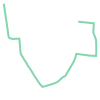

In [19]:
line_t1

In [20]:
type(line_t1)

shapely.geometry.linestring.LineString

## Make forms out of dict values

In [23]:
agg_t2=pd.read_csv('../raw_data/bpe_t2_agg_iris_clean.csv')
agg_t2.columns=agg_t2.iloc[0]
agg_t2.drop(agg_t2.index[[0,1]],inplace=True)
agg_t2.rename(columns={list(agg_t2)[0]:'iris_id',list(agg_t2)[-2]:'iris_with_t1',list(agg_t2)[-1]:'iris_with_t2'},inplace=True)
agg_t2.head()

,iris_id,count_sport,count_leasure,count_medical,count_socio_med,count_tourist,count_general_service,count_commerce,count_commerce_spec,count_grande_surface,count_high_educ,count_schools,count_transport,iris_with_t1,iris_with_t2
2,060880101,0,1,27,1,7,2,35,190,6,2,4,1,0.0,1.0
3,060880102,0,1,17,0,2,0,40,226,2,0,0,1,1.0,1.0
4,060880103,6,0,17,1,3,0,37,115,3,0,2,2,1.0,1.0
5,060880201,2,2,68,1,4,1,50,121,10,0,4,7,1.0,1.0
6,060880202,1,0,21,0,8,1,21,83,11,2,3,7,0.0,1.0


In [103]:
zipfile = "../raw_data/iris_geo/iris-geo-2018-frtot.zip"
gdf = gpd.read_file(zipfile)
gdf.drop(columns=['INSEE_COM','NOM_COM','IRIS','NOM_IRIS'],inplace=True)

In [104]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [105]:
gdf.head(2)

,CODE_IRIS,TYP_IRIS,geometry
0,721910000,Z,"POLYGON ((0.30241 47.79701, 0.30303 47.79657, ..."
1,772480000,Z,"POLYGON ((2.80560 48.91735, 2.80567 48.91716, ..."


In [106]:
gdf.shape

(49764, 3)

In [107]:
mask = gdf[['CODE_IRIS']].apply(
    lambda x: x.str.contains(
        '^06\d*5',
        regex=True
    )
).any(axis=1)
gdf[mask]

,CODE_IRIS,TYP_IRIS,geometry
148,060882905,H,"POLYGON ((7.21943 43.67236, 7.21937 43.67232, ..."
500,060880205,H,"POLYGON ((7.28650 43.70286, 7.28781 43.70246, ..."
753,060881503,H,"POLYGON ((7.26530 43.71101, 7.26475 43.71092, ..."
993,060880605,H,"POLYGON ((7.28812 43.72309, 7.28774 43.72313, ..."
1504,060881105,H,"POLYGON ((7.26078 43.72866, 7.26088 43.72867, ..."
...,...,...,...
47359,060520000,Z,"POLYGON ((7.05007 43.91031, 7.05002 43.91022, ..."
48011,060850108,H,"POLYGON ((7.04401 43.59141, 7.04397 43.59131, ..."
48035,060850103,H,"POLYGON ((6.99727 43.58578, 6.99703 43.58574, ..."
48270,060880505,H,"POLYGON ((7.28949 43.71555, 7.28954 43.71553, ..."


In [118]:
df_evan=pd.read_csv("../raw_data/data_BD_GENT_2006.csv")
df_evan.iris_id=df_evan.iris_id.map(lambda x: str(0)+str(x))
df_evan.head()

,iris_id,t_actifs_2006,t_chom_2006,empl_2006,ouvrier_2006,TP_2006,Int_2006,app_stage_2006,cdd_2006,rev_2006,...,tx_TC_2006,tx_HH_moins2ans_2006,tx_HH_2_4ans_2006,tx_HH_5_9ans_2006,tx_HH_plus10ans_2006,tx_HH_with_park_2006,tx_HH_with_voit_2006,tx_HH_1voit_2006,tx_HH_2voit_2006,tx_empl_prec_2006
0,060010000,32.377778,2.088889,8.355556,0.000000,6.266667,0.000000,0.000000,8.355556,17465.0,...,12.903226,12.903226,29.032258,22.580645,83.870969,80.645160,122.580645,74.193547,48.387097,25.806453
1,060020000,12.008551,3.002138,4.002850,4.002850,1.000713,0.000000,0.973333,0.000000,NaN,...,0.000000,25.000002,33.333331,16.666665,58.333333,66.666669,133.333331,108.333328,25.000002,8.105335
2,060030000,232.021978,24.725275,51.282051,80.586081,32.967033,0.915751,3.622305,28.388278,13866.0,...,0.000000,24.111964,22.533232,20.918190,28.058792,58.413059,86.544473,56.081273,30.463200,14.191041
3,060040101,558.359852,79.552998,189.506664,142.278837,104.191062,0.000000,9.724609,43.918480,20108.0,...,12.450518,3.569231,13.748829,9.705411,36.637534,48.238210,61.290878,30.845691,30.445187,9.607261
4,060040102,1322.676650,95.706717,453.856986,188.318276,203.919192,11.170277,17.151069,81.122892,18178.0,...,5.740664,5.073478,11.192460,16.480261,42.846445,52.077781,70.229033,33.934914,36.294119,8.274451


In [135]:
iris_list = list(pd.unique(df_evan.iris_id))

In [136]:
iris_dict={}
for i in iris_list:
    iris_dict[i]=iris.get_poly_coord(i)

In [139]:
json.dump( iris_dict, open( "../raw_data/iris_dict_500.json", 'w' ) )



In [120]:
join_evan_df=gdf.merge(df_evan,how='inner',right_on='iris_id',left_on='CODE_IRIS')

In [108]:
join_df=gdf.merge(agg_t2,how='inner',right_on='iris_id',left_on='CODE_IRIS')

In [109]:
join_df.dtypes

CODE_IRIS                  object
TYP_IRIS                   object
geometry                 geometry
iris_id                    object
count_sport                object
count_leasure              object
count_medical              object
count_socio_med            object
count_tourist              object
count_general_service      object
count_commerce             object
count_commerce_spec        object
count_grande_surface       object
count_high_educ            object
count_schools              object
count_transport            object
iris_with_t1              float64
iris_with_t2              float64
dtype: object

In [111]:
join_df.drop(columns='CODE_IRIS',inplace=True)

In [112]:
join_df.head(2)

,TYP_IRIS,geometry,iris_id,count_sport,count_leasure,count_medical,count_socio_med,count_tourist,count_general_service,count_commerce,count_commerce_spec,count_grande_surface,count_high_educ,count_schools,count_transport,iris_with_t1,iris_with_t2
0,H,"POLYGON ((7.21943 43.67236, 7.21937 43.67232, ...",060882905,0,0,12,0,0,0,6,7,0,0,0,6,0.0,1.0
1,H,"POLYGON ((7.28650 43.70286, 7.28781 43.70246, ...",060880205,0,0,32,1,0,0,23,36,9,0,0,6,0.0,1.0


In [113]:
type(join_df)

geopandas.geodataframe.GeoDataFrame

In [130]:
geo_json_df=df_evan.to_json()

In [141]:
def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)
    
geo_json_data = geo_json_df

center=(43.723348,7.285484) 
zoom = 11

#m = Map(basemap=basemaps.Esri.WorldStreetMap, center=center, zoom=zoom)
m = ipyleaflet.Map(center = center, zoom = zoom)

geo_data = GeoData(geo_dataframe = join_evan_df,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Countries')

feature_df_csv = pd.read_csv('../raw_data/data_BD_GENT_2006.csv')

dict(zip(feature_df_csv['iris_id'].tolist(), feature_df_csv['t_actifs_2006'].tolist()))

line = Polyline(
    locations=points_t1,
    style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':9, 'dashArray':'2', 'fillOpacity':0.6},
    color="red" ,
    fill=False
)

layer = ipyleaflet.Choropleth(
    geo_data=iris_dict,
    choro_data=feature_df_csv.to_json(),
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m.add_layer(line)
m.add_layer(layer)

m.add_layer(geo_data)
m.add_control(LayersControl())

m

TraitError: The 'choro_data' trait of a Choropleth instance expected a dict, not the str '{"iris_id":{"0":60010000,"1":60020000,"2":60030000,"3":60040101,"4":60040102,"5":60040103,"6":60040104,"7":60040105,"8":60040106,"9":60040107,"10":60040108,"11":60040109,"12":60040110,"13":60040111,"14":60040112,"15":60040113,"16":60040114,"17":60040115,"18":60040116,"19":60040117,"20":60040118,"21":60040119,"22":60040120,"23":60040121,"24":60040122,"25":60040123,"26":60040124,"27":60040125,"28":60040126,"29":60050000,"30":60060000,"31":60070000,"32":60080000,"33":60090000,"34":60100000,"35":60110000,"36":60120101,"37":60120102,"38":60120103,"39":60120104,"40":60120105,"41":60130000,"42":60140000,"43":60150000,"44":60160000,"45":60170000,"46":60180101,"47":60180102,"48":60180103,"49":60190000,"50":60200000,"51":60210000,"52":60220000,"53":60230000,"54":60240000,"55":60250000,"56":60260000,"57":60270101,"58":60270102,"59":60270103,"60":60270104,"61":60270105,"62":60270106,"63":60270107,"64":60270108,"65":60270109,"66":60270110,"67":60270111,"68":60270112,"69":60270113,"70":60270114,"71":60270115,"72":60270116,"73":60270117,"74":60280000,"75":60290101,"76":60290102,"77":60290103,"78":60290104,"79":60290105,"80":60290106,"81":60290107,"82":60290108,"83":60290109,"84":60290110,"85":60290111,"86":60290112,"87":60290113,"88":60290114,"89":60290115,"90":60290116,"91":60290117,"92":60290118,"93":60290119,"94":60290120,"95":60290121,"96":60290122,"97":60290123,"98":60290124,"99":60290125,"100":60290126,"101":60290127,"102":60290128,"103":60290130,"104":60290131,"105":60290132,"106":60300101,"107":60300102,"108":60300103,"109":60300104,"110":60300105,"111":60300106,"112":60300107,"113":60300108,"114":60300109,"115":60300110,"116":60300111,"117":60300112,"118":60300113,"119":60300114,"120":60300115,"121":60300116,"122":60300117,"123":60310000,"124":60320000,"125":60330101,"126":60330102,"127":60330103,"128":60330104,"129":60330105,"130":60340000,"131":60350000,"132":60360000,"133":60370000,"134":60380000,"135":60390000,"136":60400000,"137":60410000,"138":60420000,"139":60430000,"140":60440101,"141":60440102,"142":60440103,"143":60450000,"144":60460000,"145":60470000,"146":60480101,"147":60480102,"148":60490000,"149":60500000,"150":60510000,"151":60520000,"152":60530000,"153":60540000,"154":60550000,"155":60560000,"156":60570000,"157":60580000,"158":60590000,"159":60600000,"160":60610000,"161":60620000,"162":60630000,"163":60640000,"164":60650101,"165":60650102,"166":60660000,"167":60670000,"168":60680000,"169":60690101,"170":60690102,"171":60690103,"172":60690104,"173":60690105,"174":60690106,"175":60690107,"176":60690108,"177":60690109,"178":60690110,"179":60690111,"180":60690112,"181":60690113,"182":60690114,"183":60690115,"184":60690116,"185":60690117,"186":60700000,"187":60710000,"188":60720000,"189":60730000,"190":60740000,"191":60750000,"192":60760000,"193":60770000,"194":60780000,"195":60790101,"196":60790102,"197":60790103,"198":60790104,"199":60790105,"200":60790106,"201":60790107,"202":60790108,"203":60790109,"204":60800000,"205":60810000,"206":60820000,"207":60830101,"208":60830102,"209":60830103,"210":60830104,"211":60830105,"212":60830106,"213":60830201,"214":60830202,"215":60830203,"216":60830204,"217":60830205,"218":60830206,"219":60840101,"220":60840102,"221":60840103,"222":60840104,"223":60850101,"224":60850102,"225":60850103,"226":60850104,"227":60850105,"228":60850107,"229":60850108,"230":60860000,"231":60870000,"232":60880101,"233":60880102,"234":60880103,"235":60880201,"236":60880202,"237":60880203,"238":60880204,"239":60880205,"240":60880206,"241":60880301,"242":60880302,"243":60880303,"244":60880304,"245":60880305,"246":60880401,"247":60880402,"248":60880403,"249":60880404,"250":60880501,"251":60880502,"252":60880503,"253":60880504,"254":60880505,"255":60880506,"256":60880507,"257":60880508,"258":60880509,"259":60880601,"260":60880602,"261":60880603,"262":60880604,"263":60880605,"264":60880701,"265":60880702,"266":60880801,"267":60880901,"268":60880902,"269":60880903,"270":60880904,"271":60880905,"272":60881001,"273":60881002,"274":60881003,"275":60881004,"276":60881005,"277":60881101,"278":60881102,"279":60881103,"280":60881104,"281":60881105,"282":60881201,"283":60881202,"284":60881203,"285":60881204,"286":60881301,"287":60881302,"288":60881303,"289":60881304,"290":60881305,"291":60881306,"292":60881307,"293":60881308,"294":60881309,"295":60881401,"296":60881402,"297":60881403,"298":60881404,"299":60881501,"300":60881502,"301":60881503,"302":60881504,"303":60881505,"304":60881506,"305":60881601,"306":60881602,"307":60881603,"308":60881604,"309":60881605,"310":60881606,"311":60881701,"312":60881702,"313":60881703,"314":60881704,"315":60881705,"316":60881801,"317":60881802,"318":60881803,"319":60881804,"320":60881805,"321":60881901,"322":60881902,"323":60881903,"324":60882001,"325":60882002,"326":60882101,"327":60882102,"328":60882103,"329":60882104,"330":60882201,"331":60882202,"332":60882203,"333":60882301,"334":60882302,"335":60882303,"336":60882304,"337":60882401,"338":60882402,"339":60882501,"340":60882502,"341":60882503,"342":60882504,"343":60882601,"344":60882602,"345":60882603,"346":60882701,"347":60882702,"348":60882703,"349":60882704,"350":60882705,"351":60882801,"352":60882802,"353":60882803,"354":60882804,"355":60882805,"356":60882901,"357":60882902,"358":60882903,"359":60882904,"360":60882905,"361":60882906,"362":60883001,"363":60883002,"364":60883003,"365":60883101,"366":60883102,"367":60883201,"368":60883202,"369":60883301,"370":60883401,"371":60883402,"372":60883403,"373":60883501,"374":60883601,"375":60883602,"376":60883701,"377":60883801,"378":60890000,"379":60900101,"380":60900102,"381":60910000,"382":60920000,"383":60930000,"384":60940000,"385":60950101,"386":60950102,"387":60950103,"388":60960000,"389":60970000,"390":60980000,"391":60990000,"392":61000000,"393":61010000,"394":61020000,"395":61030000,"396":61040101,"397":61040102,"398":61040103,"399":61040104,"400":61040105,"401":61050101,"402":61050102,"403":61060000,"404":61070000,"405":61080000,"406":61090000,"407":61100000,"408":61110000,"409":61120000,"410":61130000,"411":61140000,"412":61150000,"413":61160000,"414":61170000,"415":61180000,"416":61190000,"417":61200000,"418":61210000,"419":61220000,"420":61230101,"421":61230102,"422":61230103,"423":61230104,"424":61230105,"425":61230106,"426":61230107,"427":61230108,"428":61230109,"429":61230110,"430":61230111,"431":61240000,"432":61250000,"433":61260000,"434":61270000,"435":61280000,"436":61290000,"437":61300000,"438":61310000,"439":61320000,"440":61330000,"441":61340000,"442":61350000,"443":61360000,"444":61370000,"445":61380000,"446":61390000,"447":61400000,"448":61410000,"449":61420000,"450":61430000,"451":61440000,"452":61450000,"453":61460000,"454":61470000,"455":61480000,"456":61490101,"457":61490102,"458":61490103,"459":61490104,"460":61500000,"461":61510000,"462":61520101,"463":61520102,"464":61520103,"465":61520104,"466":61530000,"467":61540000,"468":61550101,"469":61550102,"470":61550103,"471":61550104,"472":61550105,"473":61550106,"474":61550107,"475":61550108,"476":61550109,"477":61550110,"478":61560000,"479":61570101,"480":61570102,"481":61570103,"482":61570104,"483":61570105,"484":61570106,"485":61570107,"486":61580000,"487":61590101,"488":61590102,"489":61590103,"490":61600000,"491":61610101,"492":61610102,"493":61610103,"494":61610104,"495":61610105,"496":61610106,"497":61610107,"498":61620000,"499":61630000},"t_actifs_2006":{"0":32.377778,"1":12.008551,"2":232.021978,"3":558.359852,"4":1322.67665,"5":511.499066,"6":1074.154553,"7":1709.443351,"8":1311.750278,"9":1357.00856,"10":944.526678,"11":2436.476921,"12":673.457431,"13":1229.651054,"14":1111.568767,"15":23.0,"16":822.808162,"17":1572.126285,"18":1856.152081,"19":1813.725917,"20":1151.588281,"21":1198.124219,"22":707.255123,"23":574.96821,"24":1514.008305,"25":1901.57017,"26":1642.673858,"27":1703.816138,"28":1655.090739,"29":44.889782,"30":1023.667059,"31":1320.343588,"32":33.0,"33":49.328775,"34":1248.364347,"35":1603.41633,"36":1081.143101,"37":1384.296702,"38":1106.916345,"39":1165.740152,"40":1724.83336,"41":255.0,"42":435.238678,"43":549.87958,"44":234.686098,"45":84.0,"46":1400.32349,"47":1171.640268,"48":1761.948993,"49":682.120739,"50":257.0,"51":346.085672,"52":218.0,"53":822.0,"54":64.0,"55":603.76249,"56":653.952688,"57":1620.070735,"58":2054.353554,"59":1081.635287,"60":1189.027719,"61":1050.782041,"62":9.0,"63":1529.169129,"64":690.69423,"65":1367.071996,"66":1594.684786,"67":962.022404,"68":1598.876565,"69":2289.546443,"70":1924.339554,"71":925.147887,"72":606.574099,"73":1257.909441,"74":145.581818,"75":586.178802,"76":712.044414,"77":969.601809,"78":649.584542,"79":852.70544,"80":631.851197,"81":1214.908752,"82":1176.475795,"83":1519.605684,"84":801.578088,"85":495.684944,"86":949.162676,"87":943.214441,"88":1061.507133,"89":959.454278,"90":901.13253,"91":676.614309,"92":816.538592,"93":723.827236,"94":904.205805,"95":665.857751,"96":1058.772574,"97":1683.218726,"98":178.243597,"99":962.990698,"100":846.696747,"101":1003.904541,"102":802.688204,"103":1770.785313,"104":1330.589317,"105":596.252301,"106":715.334882,"107":1031.942807,"108":1595.722886,"109":973.782572,"110":1330.326981,"111":936.797852,"112":1513.420382,"113":1278.070246,"114":840.286787,"115":1234.109549,"116":1088.500752,"117":1173.411413,"118":1239.208849,"119":965.641431,"120":847.910909,"121":866.385165,"122":772.285702,"123":536.975298,"124":2363.823763,"125":1285.014955,"126":1556.797111,"127":809.867019,"128":234.818051,"129":1704.310895,"130":694.840909,"131":471.388771,"132":173.510162,"133":108.065502,"134":1329.017678,"135":370.0,"136":19.117647,"137":166.031831,"138":225.543986,"139":368.208505,"140":1045.285676,"141":1212.629314,"142":1058.031979,"143":37.0,"144":1469.255063,"145":38.975309,"146":1185.41875,"147":1924.778075,"148":54.954545,"149":219.503311,"150":29.012048,"151":88.0,"152":45.74231,"153":2104.0,"154":74.802169,"155":58.0,"156":942.865209,"157":238.535266,"158":1364.0,"159":809.0,"160":34.776177,"161":107.946942,"162":20.3,"163":1881.0,"164":1836.025426,"165":1342.540659,"166":718.89234,"167":607.920385,"168":215.0,"169":1460.709608,"170":1559.182466,"171":1262.227878,"172":1621.812127,"173":1307.106908,"174":1328.60382,"175":1641.975241,"176":1379.723445,"177":1377.712656,"178":880.667353,"179":1503.18157,"180":1119.093289,"181":2014.483338,"182":1560.374463,"183":729.338862,"184":963.765728,"185":1101.593753,"186":245.327103,"187":309.198651,"188":67.668726,"189":315.286204,"190":485.943542,"191":2072.0,"192":16.0,"193":590.0,"194":112.102115,"195":185.788107,"196":1089.020798,"197":811.608761,"198":1044.752465,"199":1183.415833,"200":882.003715,"201":1174.369475,"202":1175.823406,"203":1165.671067,"204":40.19379,"205":44.441662,"206":61.51938,"207":763.808914,"208":1029.61301,"209":670.332691,"210":866.167335,"211":562.881793,"212":801.077342,"213":1231.989524,"214":1438.44974,"215":654.668227,"216":1225.331741,"217":1120.529507,"218":1594.175471,"219":1367.409882,"220":1187.901787,"221":1199.731629,"222":1079.302637,"223":1423.521049,"224":1058.121776,"225":1153.911444,"226":1516.495321,"227":1695.887563,"228":978.728877,"229":1858.931819,"230":95.04478,"231":22.941057,"232":777.309682,"233":985.033211,"234":1049.22588,"235":1106.78632,"236":1036.810464,"237":1048.621553,"238":1105.851409,"239":1029.140457,"240":1477.289485,"241":973.621019,"242":807.822425,"243":755.679721,"244":1553.880767,"245":1398.684665,"246":633.867235,"247":565.23711,"248":1089.093046,"249":707.320129,"250":1847.812216,"251":1457.387831,"252":798.85745,"253":1716.373055,"254":937.088572,"255":1064.496958,"256":1091.311718,"257":1093.211207,"258":683.951572,"259":930.670024,"260":621.836067,"261":1120.614151,"262":1180.605526,"263":594.328319,"264":777.771249,"265":1248.688988,"266":595.154607,"267":919.83487,"268":952.094232,"269":565.36862,"270":497.759956,"271":804.593923,"272":832.273396,"273":842.653749,"274":803.802777,"275":1072.609782,"276":1470.578748,"277":1374.322217,"278":1456.709049,"279":1015.32955,"280":883.267373,"281":912.95416,"282":1149.537665,"283":537.117788,"284":831.41428,"285":1474.99085,"286":1108.64587,"287":902.842287,"288":951.5628,"289":761.31531,"290":1020.048724,"291":731.019166,"292":1089.498391,"293":887.866508,"294":1132.896763,"295":1046.575796,"296":897.358212,"297":1059.820185,"298":781.652806,"299":834.868662,"300":741.824796,"301":985.48906,"302":936.133164,"303":1016.378372,"304":775.734388,"305":906.108717,"306":743.423523,"307":1414.037961,"308":1094.411309,"309":769.53438,"310":994.70166,"311":910.557839,"312":915.652316,"313":1004.262757,"314":1040.474746,"315":777.294627,"316":22.715542,"317":1052.405399,"318":1029.803399,"319":1016.827621,"320":950.191701,"321":1020.048866,"322":856.383134,"323":977.108127,"324":925.151883,"325":912.080453,"326":1096.780401,"327":1022.397182,"328":1276.397954,"329":690.476346,"330":746.991632,"331":1086.509348,"332":1352.793739,"333":736.109389,"334":740.03401,"335":870.395341,"336":924.976583,"337":807.589521,"338":1194.942931,"339":672.961416,"340":828.661427,"341":767.012865,"342":1376.037868,"343":783.633713,"344":703.325681,"345":905.521132,"346":594.225382,"347":943.735038,"348":765.242236,"349":1841.506297,"350":693.951178,"351":1490.749427,"352":1839.082721,"353":1075.109528,"354":1585.851374,"355":1327.158383,"356":815.199206,"357":1490.703219,"358":1371.647619,"359":917.522497,"360":903.316869,"361":1539.980349,"362":250.288375,"363":985.5659,"364":1353.048702,"365":1674.430782,"366":1173.682189,"367":1291.584849,"368":1325.078426,"369":1207.239475,"370":1104.699578,"371":824.012437,"372":823.173994,"373":981.753091,"374":1446.857804,"375":1262.834055,"376":1690.539807,"377":1447.94903,"378":896.337969,"379":1495.471842,"380":1682.786133,"381":1030.127983,"382":677.821856,"383":112.0,"384":404.8,"385":1414.685755,"386":952.777007,"387":945.913449,"388":46.0,"389":120.564706,"390":51.962264,"391":771.075838,"392":82.882873,"393":81.316772,"394":45.0,"395":647.324503,"396":844.387015,"397":1152.454758,"398":1589.064776,"399":1148.221994,"400":1296.866598,"401":1405.769386,"402":1126.667271,"403":188.884816,"404":23.332112,"405":2418.711937,"406":449.619718,"407":52.07387,"408":90.570819,"409":1687.0,"410":622.662469,"411":2106.462867,"412":39.0,"413":84.968037,"414":488.253672,"415":1513.284244,"416":55.925606,"417":640.0,"418":984.395669,"419":1554.56875,"420":36.706816,"421":968.900587,"422":1160.032221,"423":1128.54175,"424":1032.3841,"425":1278.648812,"426":1316.227862,"427":1254.454042,"428":3510.702495,"429":1374.179928,"430":1479.00099,"431":18.0,"432":31.369048,"433":1238.769776,"434":551.236654,"435":1379.433987,"436":154.0,"437":1526.804765,"438":24.0,"439":179.0,"440":43.590476,"441":174.84141,"442":83.774038,"443":1452.45856,"444":452.471679,"445":695.832189,"446":35.663043,"447":1377.827686,"448":128.546816,"449":120.150103,"450":222.0,"451":193.577608,"452":42.0,"453":78.771287,"454":2159.0,"455":1824.760108,"456":977.931605,"457":1390.952837,"458":1079.89485,"459":1389.649343,"460":1540.399018,"461":313.138686,"462":1155.412739,"463":1056.775754,"464":2516.096888,"465":1256.71384,"466":387.044024,"467":153.140501,"468":1197.004115,"469":606.236535,"470":1181.58433,"471":1071.254228,"472":1517.743947,"473":1664.901978,"474":1335.876683,"475":1434.308916,"476":1104.434687,"477":1410.424238,"478":64.0,"479":1107.456223,"480":1018.614311,"481":1236.026243,"482":882.332096,"483":1636.321999,"484":1074.68031,"485":1181.453321,"486":277.0,"487":1043.007582,"488":1091.314889,"489":423.268147,"490":21.463415,"491":184.445354,"492":826.924518,"493":1425.383407,"494":856.304727,"495":1070.14314,"496":1645.359183,"497":1213.893134,"498":257.0,"499":828.0},"t_chom_2006":{"0":2.088889,"1":3.002138,"2":24.725275,"3":79.552998,"4":95.706717,"5":35.06024,"6":98.408417,"7":121.543939,"8":144.091157,"9":177.857273,"10":110.929198,"11":208.179959,"12":75.610306,"13":180.840561,"14":111.783637,"15":9.0,"16":74.756237,"17":301.835792,"18":177.353054,"19":190.126382,"20":182.044895,"21":135.750006,"22":69.15323,"23":80.727245,"24":175.36782,"25":307.092,"26":290.583578,"27":360.748395,"28":263.576632,"29":7.980406,"30":72.318767,"31":132.921801,"32":0.0,"33":1.897261,"34":97.084109,"35":149.757478,"36":81.316017,"37":119.831179,"38":92.639792,"39":103.121922,"40":217.661653,"41":30.0,"42":34.700122,"43":41.837782,"44":6.374962,"45":9.0,"46":128.010738,"47":89.900671,"48":126.056376,"49":43.913352,"50":33.0,"51":15.598227,"52":18.008696,"53":84.0,"54":7.0,"55":33.278248,"56":51.788179,"57":195.755664,"58":287.624168,"59":107.803629,"60":97.285929,"61":101.009022,"62":0.0,"63":199.872863,"64":85.067447,"65":131.860073,"66":169.793399,"67":97.153067,"68":108.800489,"69":190.954133,"70":161.98886,"71":61.078166,"72":57.667159,"73":122.024683,"74":12.054545,"75":102.257574,"76":134.294312,"77":123.853604,"78":94.225493,"79":123.462964,"80":83.954068,"81":202.846972,"82":220.968729,"83":298.162543,"84":153.071801,"85":65.009521,"86":143.631888,"87":101.448789,"88":112.091187,"89":154.069507,"90":180.947492,"91":126.897955,"92":66.44283,"93":99.537672,"94":100.218833,"95":48.50426,"96":117.423329,"97":248.197845,"98":23.605836,"99":137.838779,"100":113.385733,"101":129.638523,"102":170.765441,"103":332.239413,"104":187.928886,"105":125.672067,"106":92.339391,"107":158.808684,"108":213.43889,"109":78.689361,"110":159.177563,"111":115.565265,"112":176.555376,"113":128.231023,"114":103.187842,"115":166.529848,"116":148.250192,"117":152.364542,"118":201.111958,"119":107.911136,"120":92.541652,"121":83.768113,"122":80.833234,"123":33.309199,"124":181.796183,"125":74.515212,"126":217.000103,"127":134.491135,"128":8.686331,"129":143.846612,"130":40.068182,"131":48.221398,"132":13.11414,"133":10.519651,"134":97.315877,"135":28.0,"136":1.911765,"137":21.390604,"138":19.78456,"139":31.253772,"140":60.104597,"141":74.865823,"142":83.746436,"143":7.0,"144":97.908501,"145":5.703704,"146":75.74875,"147":94.44,"148":6.340909,"149":14.940397,"150":3.108434,"151":9.0,"152":0.994398,"153":259.0,"154":3.836009,"155":3.0,"156":87.651087,"157":34.957754,"158":100.0,"159":48.0,"160":1.98721,"161":10.088499,"162":5.8,"163":140.0,"164":139.942987,"165":115.334218,"166":44.254658,"167":49.348393,"168":18.0,"169":243.594505,"170":129.28034,"171":110.89148,"172":115.519078,"173":153.747452,"174":173.713018,"175":194.413643,"176":150.345993,"177":243.64977,"178":77.637097,"179":368.420391,"180":89.381681,"181":346.189911,"182":125.437257,"183":60.300652,"184":65.336862,"185":66.819713,"186":31.401869,"187":16.063087,"188":5.126419,"189":15.813142,"190":54.786061,"191":156.0,"192":0.0,"193":57.0,"194":17.856974,"195":14.407088,"196":149.385632,"197":95.296013,"198":114.488572,"199":119.655623,"200":84.813351,"201":143.240657,"202":126.285964,"203":124.748342,"204":1.057731,"205":8.888332,"206":2.976744,"207":83.747959,"208":121.006981,"209":65.592441,"210":117.112948,"211":58.043087,"212":103.809077,"213":113.697938,"214":145.439073,"215":59.73263,"216":124.833939,"217":136.918362,"218":212.90792,"219":113.041252,"220":133.357105,"221":86.343056,"222":102.1384,"223":185.512068,"224":131.48067,"225":93.400563,"226":107.319003,"227":108.056128,"228":75.708429,"229":112.273135,"230":3.801791,"231":2.085551,"232":102.765319,"233":201.969897,"234":143.451086,"235":157.410527,"236":190.976787,"237":153.88562,"238":143.270096,"239":109.187573,"240":181.804694,"241":93.612017,"242":128.735743,"243":106.989142,"244":151.479777,"245":162.617395,"246":78.885059,"247":69.676934,"248":71.102246,"249":33.328539,"250":251.193743,"251":153.748799,"252":67.635012,"253":159.721609,"254":87.577162,"255":128.370515,"256":148.80795,"257":247.036719,"258":181.324089,"259":120.142437,"260":67.711027,"261":120.054471,"262":183.821889,"263":122.953536,"264":160.981837,"265":333.097391,"266":31.07713,"267":196.991275,"268":171.407287,"269":199.076221,"270":161.978218,"271":194.013672,"272":84.627258,"273":74.871395,"274":40.314537,"275":77.118407,"276":113.341941,"277":150.445686,"278":156.890469,"279":59.26968,"280":59.446362,"281":106.985551,"282":127.531921,"283":36.758966,"284":42.005509,"285":178.428125,"286":112.374351,"287":104.936475,"288":93.704718,"289":66.793969,"290":91.90125,"291":77.899845,"292":70.711614,"293":91.741946,"294":92.690932,"295":153.624419,"296":85.43131,"297":79.662754,"298":68.089049,"299":78.899722,"300":121.720389,"301":102.282146,"302":146.075472,"303":102.809011,"304":81.144711,"305":109.930432,"306":90.724863,"307":107.233256,"308":86.574827,"309":90.662008,"310":81.539509,"311":93.436695,"312":95.032873,"313":126.759725,"314":131.618635,"315":146.175905,"316":3.245077,"317":198.135804,"318":202.553095,"319":123.78394,"320":75.642188,"321":184.704403,"322":122.696898,"323":103.762452,"324":81.358995,"325":103.691936,"326":175.40553,"327":144.971346,"328":154.344965,"329":86.055379,"330":94.383741,"331":148.643718,"332":222.429676,"333":59.587821,"334":102.962709,"335":109.886852,"336":179.215939,"337":113.756881,"338":176.923646,"339":150.53845,"340":116.551622,"341":113.31007,"342":217.655474,"343":146.947956,"344":96.832605,"345":144.119934,"346":102.361495,"347":95.243921,"348":76.011021,"349":188.162978,"350":105.728291,"351":212.653079,"352":114.028932,"353":84.60067,"354":116.792597,"355":84.935135,"356":131.749901,"357":366.51751,"358":427.085714,"359":80.759566,"360":135.746715,"361":124.748455,"362":15.656882,"363":119.950817,"364":190.494996,"365":114.127858,"366":72.394822,"367":85.572304,"368":68.084538,"369":57.306209,"370":74.639106,"371":71.435179,"372":100.450027,"373":65.671299,"374":87.19406,"375":108.511335,"376":115.348951,"377":77.952563,"378":98.328068,"379":134.959635,"380":148.390788,"381":84.854969,"382":47.497006,"383":8.0,"384":18.0,"385":135.133649,"386":94.736571,"387":79.456469,"388":4.0,"389":7.905882,"390":3.056604,"391":68.612625,"392":11.396395,"393":9.629618,"394":5.0,"395":56.245033,"396":128.850576,"397":89.589981,"398":123.26107,"399":114.545707,"400":112.960737,"401":102.95915,"402":74.522813,"403":30.654891,"404":2.028879,"405":170.192567,"406":19.732394,"407":7.009944,"408":11.194146,"409":153.0,"410":38.607053,"411":181.934613,"412":3.0,"413":9.452055,"414":33.88215,"415":171.807861,"416":2.033658,"417":23.0,"418":71.278561,"419":115.379261,"420":5.36654,"421":80.779257,"422":89.119182,"423":83.984189,"424":114.277651,"425":106.112044,"426":128.377175,"427":84.353307,"428":283.602097,"429":79.02695,"430":119.348593,"431":4.0,"432":1.011905,"433":69.789847,"434":48.15809,"435":110.798811,"436":9.0,"437":143.7819,"438":2.0,"439":42.0,"440":2.980952,"441":10.273128,"442":11.826923,"443":128.719876,"444":49.927909,"445":63.606447,"446":1.050395,"447":92.700871,"448":9.812734,"449":12.80288,"450":21.0,"451":14.819338,"452":5.0,"453":10.315288,"454":168.0,"455":193.487514,"456":89.25387,"457":114.862407,"458":112.688357,"459":100.553879,"460":118.905021,"461":20.233577,"462":97.717807,"463":67.477552,"464":223.839828,"465":115.899784,"466":47.374527,"467":25.382586,"468":160.279814,"469":360.617246,"470":440.933735,"471":198.386287,"472":192.357373,"473":312.33787,"474":214.10919,"475":238.403064,"476":174.340594,"477":156.114079,"478":6.0,"479":174.087279,"480":83.813213,"481":98.015251,"482":50.667857,"483":119.092053,"484":91.103045,"485":96.771355,"486":32.0,"487":95.315356,"488":114.321953,"489":30.820858,"490":0.97561,"491":24.113437,"492":57.204904,"493":136.163646,"494":128.72369,"495":121.898065,"496":123.637177,"497":147.245491,"498":12.0,"499":49.0},"empl_2006":{"0":8.355556,"1":4.00285,"2":51.282051,"3":189.506664,"4":453.856986,"5":165.810711,"6":323.90432,"7":436.723969,"8":373.229191,"9":452.490634,"10":321.897865,"11":724.235721,"12":225.799241,"13":466.618716,"14":355.210101,"15":4.0,"16":294.05605,"17":473.629952,"18":607.619201,"19":498.680654,"20":434.244623,"21":393.38376,"22":215.692494,"23":121.522814,"24":455.185305,"25":816.232211,"26":543.97834,"27":637.672596,"28":618.165964,"29":3.990203,"30":260.754992,"31":386.425618,"32":8.0,"33":11.383563,"34":274.581317,"35":632.974939,"36":484.328074,"37":657.813282,"38":437.293515,"39":528.677815,"40":811.815203,"41":64.0,"42":206.21787,"43":163.366578,"44":106.24936,"45":20.0,"46":418.233557,"47":234.52349,"48":347.87651,"49":218.590909,"50":56.0,"51":105.288035,"52":56.869565,"53":345.0,"54":20.0,"55":235.800154,"56":235.58544,"57":564.74192,"58":779.355709,"59":298.084779,"60":375.263474,"61":289.447344,"62":1.125,"63":611.785566,"64":258.898091,"65":459.030985,"66":559.424473,"67":354.671761,"68":434.234364,"69":748.693694,"70":598.628883,"71":285.423432,"72":252.764886,"73":457.213631,"74":40.8,"75":234.221984,"76":258.685793,"77":296.345726,"78":239.316089,"79":366.078432,"80":188.782628,"81":464.449535,"82":432.807322,"83":579.643476,"84":358.628582,"85":190.363308,"86":341.234531,"87":310.639697,"88":408.107117,"89":418.402093,"90":324.319429,"91":244.086051,"92":318.89502,"93":289.540651,"94":307.503512,"95":208.64091,"96":400.091814,"97":659.065516,"98":39.678667,"99":402.85195,"100":348.988506,"101":611.915853,"102":405.333058,"103":786.636322,"104":559.235318,"105":248.397332,"106":308.022657,"107":421.420101,"108":656.787681,"109":361.187123,"110":565.689594,"111":299.897943,"112":578.337845,"113":389.177717,"114":332.044556,"115":442.748912,"116":374.626681,"117":386.880262,"118":382.295653,"119":291.976464,"120":301.584263,"121":211.220316,"122":155.509727,"123":161.499148,"124":1026.288879,"125":428.365338,"126":463.149163,"127":263.866745,"128":55.124663,"129":405.664322,"130":212.068182,"131":141.711864,"132":40.3512,"133":49.729258,"134":302.760507,"135":108.0,"136":7.647059,"137":44.818408,"138":47.482944,"139":121.108368,"140":228.537775,"141":303.403598,"142":248.239307,"143":8.0,"144":431.9565,"145":11.407407,"146":515.485,"147":593.20502,"148":0.0,"149":85.907285,"150":16.578313,"151":32.0,"152":23.865553,"153":756.0,"154":23.016052,"155":12.0,"156":323.203505,"157":78.140863,"158":493.0,"159":168.0,"160":3.97442,"161":44.389397,"162":0.0,"163":456.0,"164":539.850209,"165":333.085976,"166":216.356108,"167":225.028671,"168":60.0,"169":486.151962,"170":475.294499,"171":359.509511,"172":474.404229,"173":517.425065,"174":520.755115,"175":560.9131,"176":517.536215,"177":564.293068,"178":260.525965,"179":462.24496,"180":240.533992,"181":759.137682,"182":395.484289,"183":169.340026,"184":241.171259,"185":193.93629,"186":82.429907,"187":136.536239,"188":16.40454,"189":76.100747,"190":215.086019,"191":605.0,"192":12.0,"193":188.0,"194":59.523247,"195":69.424829,"196":404.83758,"197":236.342053,"198":225.50715,"199":349.110721,"200":324.314227,"201":424.99382,"202":436.112092,"203":443.926048,"204":12.692776,"205":39.5037,"206":19.844961,"207":300.803153,"208":413.165292,"209":267.150817,"210":331.577139,"211":221.274951,"212":289.803104,"213":526.417535,"214":630.827922,"215":252.596774,"216":452.278125,"217":534.394515,"218":685.725172,"219":390.358371,"220":356.186042,"221":332.909122,"222":350.117207,"223":464.76583,"224":274.992564,"225":277.777231,"226":560.032654,"227":461.081344,"228":214.622086,"229":360.373403,"230":26.612538,"231":0.0,"232":216.975379,"233":321.852605,"234":360.323936,"235":447.078985,"236":361.679352,"237":396.158041,"238":441.849402,"239":391.828519,"240":684.992413,"241":367.409661,"242":296.742822,"243":266.899019,"244":693.788474,"245":540.646912,"246":160.371945,"247":136.663975,"248":323.768551,"249":161.046501,"250":715.040732,"251":657.815051,"252":288.747172,"253":858.026525,"254":372.517376,"255":471.382745,"256":555.369016,"257":475.218317,"258":310.217588,"259":353.983075,"260":254.520663,"261":478.894267,"262":489.596439,"263":242.436689,"264":338.764932,"265":503.41133,"266":127.869525,"267":429.49413,"268":336.647508,"269":183.463058,"270":203.533164,"271":303.637507,"272":172.980995,"273":181.040242,"274":213.913567,"275":249.44304,"276":401.867581,"277":547.845306,"278":450.509778,"279":299.178137,"280":367.98819,"281":407.096775,"282":453.746396,"283":224.763643,"284":220.511646,"285":597.864366,"286":510.158863,"287":350.291763,"288":397.998724,"289":227.427504,"290":426.193494,"291":257.547021,"292":299.395601,"293":308.769833,"294":465.239051,"295":377.646236,"296":326.147337,"297":375.503264,"298":285.389742,"299":361.467818,"300":262.025599,"301":371.943116,"302":322.082486,"303":368.500913,"304":270.587622,"305":167.198574,"306":242.533946,"307":446.495547,"308":221.23683,"309":221.698278,"310":209.596053,"311":265.322176,"312":248.399669,"313":350.504878,"314":302.846316,"315":269.271749,"316":12.98031,"317":418.054932,"318":324.632622,"319":341.198422,"320":346.568216,"321":366.465041,"322":257.909107,"323":291.601906,"324":245.122676,"325":231.696914,"326":349.28422,"327":371.461977,"328":436.409219,"329":264.152711,"330":247.375974,"331":342.947254,"332":459.703366,"333":225.130464,"334":168.199245,"335":299.740442,"336":320.650172,"337":235.586616,"338":366.075209,"339":225.571865,"340":268.716,"341":316.809984,"342":516.845316,"343":348.67049,"344":237.74348,"345":285.546226,"346":225.984568,"347":332.166488,"348":272.201484,"349":625.575631,"350":175.005365,"351":659.663939,"352":689.680749,"353":448.120873,"354":409.421858,"355":330.961927,"356":310.46078,"357":701.168989,"358":551.12381,"359":349.917211,"360":333.459584,"361":457.222378,"362":122.158022,"363":393.239998,"364":545.78767,"365":525.522621,"366":377.392493,"367":312.035329,"368":317.760639,"369":300.059789,"370":388.661454,"371":291.356789,"372":303.95855,"373":263.083257,"374":554.770577,"375":428.848269,"376":459.295582,"377":346.348006,"378":231.847234,"379":456.48112,"380":552.483887,"381":360.140276,"382":217.694611,"383":56.0,"384":128.0,"385":452.351853,"386":259.01122,"387":253.30574,"388":12.0,"389":35.576471,"390":24.45283,"391":323.605812,"392":29.009006,"393":8.55966,"394":20.0,"395":217.086093,"396":313.64494,"397":550.096258,"398":610.663493,"399":428.238734,"400":545.680616,"401":259.076096,"402":235.3352,"403":55.376577,"404":4.057759,"405":639.467591,"406":149.859155,"407":8.011365,"408":16.282394,"409":344.0,"410":201.944584,"411":807.997611,"412":8.0,"413":33.607306,"414":151.457174,"415":519.885524,"416":4.067317,"417":248.0,"418":413.076957,"419":314.294318,"420":12.691119,"421":300.590401,"422":378.390892,"423":418.393153,"424":403.235063,"425":432.695168,"426":378.543439,"427":421.722698,"428":1345.253939,"429":378.417252,"430":414.596426,"431":12.0,"432":4.047619,"433":383.844156,"434":200.740107,"435":350.427009,"436":44.0,"437":501.541413,"438":8.0,"439":48.0,"440":7.92381,"441":63.506608,"442":27.596154,"443":604.555814,"444":191.39032,"445":250.570853,"446":12.604743,"447":359.093901,"448":31.400749,"449":55.150867,"450":84.0,"451":70.391858,"452":4.0,"453":33.759123,"454":744.0,"455":455.948833,"456":402.26393,"457":583.604675,"458":394.804716,"459":527.106511,"460":587.685777,"461":84.788321,"462":241.632965,"463":201.11093,"464":792.064209,"465":216.940248,"466":116.924363,"467":35.145119,"468":331.926536,"469":198.359854,"470":354.112211,"471":397.855598,"472":560.126465,"473":539.221932,"474":377.67329,"475":517.273584,"476":373.01369,"477":459.612987,"478":36.0,"479":328.751779,"480":387.458651,"481":303.501252,"482":195.351375,"483":436.69315,"484":348.060634,"485":363.222009,"486":92.0,"487":274.063745,"488":442.377266,"489":170.681499,"490":0.0,"491":45.068377,"492":180.450513,"493":418.652452,"494":280.896569,"495":397.279573,"496":436.479269,"497":327.999513,"498":116.0,"499":340.0},"ouvrier_2006":{"0":0.0,"1":4.00285,"2":80.586081,"3":142.278837,"4":188.318276,"5":47.430174,"6":93.891538,"7":181.568816,"8":201.277161,"9":291.692338,"10":134.3814,"11":386.981738,"12":113.58817,"13":158.836466,"14":141.275961,"15":16.0,"16":118.785548,"17":301.445649,"18":239.815982,"19":252.256247,"20":153.520982,"21":203.539254,"22":102.695635,"23":75.409448,"24":197.232447,"25":332.107702,"26":289.508685,"27":349.247215,"28":316.554226,"29":11.970609,"30":93.708825,"31":261.399975,"32":0.0,"33":7.589042,"34":211.819873,"35":256.590946,"36":179.128381,"37":324.771372,"38":330.33275,"39":249.647962,"40":539.399686,"41":88.0,"42":118.971848,"43":103.598317,"44":38.24977,"45":25.0,"46":214.979866,"47":164.166443,"48":85.991946,"49":156.136364,"50":48.0,"51":101.388479,"52":72.034783,"53":144.0,"54":4.0,"55":102.687164,"56":109.669084,"57":350.802548,"58":530.549008,"59":189.086798,"60":205.109809,"61":124.903363,"62":0.0,"63":257.135842,"64":141.374623,"65":236.050418,"66":216.644993,"67":154.083729,"68":255.563601,"69":354.025136,"70":314.634592,"71":130.534932,"72":105.503634,"73":297.685919,"74":14.836364,"75":75.762602,"76":72.976829,"77":107.321918,"78":86.41321,"79":139.716493,"80":58.259274,"81":289.414387,"82":266.195677,"83":287.309181,"84":116.765049,"85":59.187172,"86":171.378846,"87":153.285032,"88":213.575584,"89":171.941424,"90":209.545703,"91":87.332128,"92":157.371591,"93":132.537932,"94":133.910983,"95":56.474344,"96":163.173498,"97":367.257343,"98":51.697207,"99":247.151744,"100":173.255094,"101":153.764791,"102":263.638588,"103":505.624446,"104":378.810717,"105":164.838988,"106":188.165906,"107":174.119207,"108":287.694831,"109":113.005372,"110":314.678876,"111":113.628425,"112":271.440966,"113":213.345428,"114":167.382193,"115":259.495361,"116":241.334462,"117":216.699187,"118":343.61481,"119":105.554197,"120":109.028716,"121":133.853615,"122":65.857617,"123":68.637138,"124":401.826412,"125":331.021808,"126":616.647546,"127":361.561829,"128":51.361264,"129":284.67799,"130":144.636364,"131":110.220339,"132":28.24584,"133":38.253275,"134":137.618412,"135":68.0,"136":3.823529,"137":44.818408,"138":43.526032,"139":82.041152,"140":106.388274,"141":126.089807,"142":122.1495,"143":20.0,"144":181.025205,"145":15.209877,"146":251.84,"147":370.750267,"148":21.136364,"149":48.556291,"150":0.0,"151":16.0,"152":7.955184,"153":628.0,"154":7.672017,"155":16.0,"156":221.950088,"157":82.25354,"158":141.0,"159":72.0,"160":3.97442,"161":36.318597,"162":0.0,"163":369.0,"164":260.838054,"165":137.955321,"166":196.687371,"167":94.748914,"168":32.0,"169":392.105001,"170":309.795038,"171":322.417993,"172":238.674853,"173":259.056859,"174":298.170261,"175":427.764816,"176":311.948357,"177":460.394845,"178":193.942329,"179":625.395889,"180":208.191844,"181":568.358951,"182":284.856393,"183":64.274942,"184":174.208361,"185":126.081448,"186":51.028037,"187":52.205032,"188":12.303405,"189":59.299284,"190":133.921483,"191":377.0,"192":0.0,"193":124.0,"194":43.650381,"195":38.461872,"196":227.774306,"197":91.369879,"198":70.303721,"199":203.830142,"200":120.464329,"201":228.730992,"202":159.549728,"203":217.915957,"204":4.230925,"205":7.90074,"206":19.844961,"207":136.495284,"208":268.088538,"209":115.094205,"210":176.818518,"211":158.449448,"212":134.73667,"213":238.929145,"214":320.951467,"215":106.439575,"216":308.98839,"217":207.445139,"218":444.260306,"219":151.00864,"220":179.251613,"221":150.925461,"222":190.382831,"223":187.225422,"224":127.277327,"225":185.809255,"226":310.737048,"227":120.063563,"228":87.283825,"229":183.9224,"230":15.207165,"231":4.171101,"232":99.323472,"233":192.603805,"234":160.515274,"235":166.249397,"236":190.536746,"237":204.149277,"238":193.102305,"239":152.279333,"240":238.67477,"241":203.580451,"242":207.134932,"243":147.081179,"244":233.503325,"245":220.366582,"246":41.632064,"247":58.461067,"248":135.157204,"249":63.604952,"250":454.867038,"251":330.242906,"252":166.156939,"253":283.298891,"254":202.36551,"255":196.392952,"256":337.29018,"257":370.988473,"258":219.227074,"259":208.110972,"260":158.262123,"261":254.24984,"262":364.581311,"263":157.314402,"264":268.051348,"265":490.993667,"266":91.452707,"267":330.821505,"268":392.469613,"269":208.811904,"270":175.056491,"271":310.20511,"272":61.112726,"273":76.376932,"274":51.819517,"275":98.669031,"276":133.775784,"277":206.749466,"278":205.587168,"279":86.418976,"280":148.148871,"281":207.049211,"282":264.730209,"283":96.320463,"284":95.656127,"285":268.041099,"286":146.161582,"287":130.455857,"288":175.677219,"289":139.246725,"290":177.537799,"291":131.713969,"292":110.719607,"293":130.973266,"294":173.722881,"295":161.528462,"296":125.602489,"297":113.972857,"298":143.544544,"299":190.896202,"300":99.930414,"301":117.029148,"302":139.176832,"303":188.971501,"304":94.936265,"305":81.107276,"306":121.014446,"307":196.029028,"308":61.451735,"309":90.710611,"310":70.92627,"311":88.933135,"312":127.792793,"313":179.192836,"314":136.944626,"315":194.995505,"316":6.490155,"317":357.21113,"318":354.925201,"319":211.428387,"320":161.680872,"321":206.809205,"322":155.118463,"323":142.395998,"324":143.248649,"325":113.417526,"326":165.278535,"327":223.701509,"328":271.424918,"329":172.858177,"330":83.356943,"331":168.21204,"332":125.239472,"333":36.454687,"334":81.566861,"335":149.335129,"336":171.862955,"337":106.214425,"338":131.578165,"339":121.54743,"340":115.078348,"341":145.637071,"342":321.523929,"343":172.804197,"344":113.585677,"345":126.864134,"346":140.235401,"347":133.876927,"348":105.944758,"349":124.486558,"350":47.259146,"351":393.168595,"352":187.307064,"353":171.613926,"354":119.381223,"355":85.621987,"356":304.555076,"357":545.474165,"358":594.590476,"359":271.381454,"360":197.011428,"361":251.317077,"362":18.028536,"363":214.767418,"364":401.734502,"365":226.743916,"366":145.972651,"367":119.369423,"368":132.444083,"369":469.022244,"370":217.988876,"371":155.383339,"372":187.006914,"373":138.175829,"374":168.468101,"375":185.324779,"376":217.366827,"377":95.314105,"378":95.222971,"379":258.011068,"380":309.197428,"381":165.763195,"382":193.946108,"383":12.0,"384":84.0,"385":310.035996,"386":162.515902,"387":148.846674,"388":0.0,"389":31.623529,"390":0.0,"391":147.46594,"392":20.720718,"393":17.119321,"394":4.0,"395":138.145695,"396":200.959329,"397":187.560661,"398":228.941765,"399":196.429939,"400":201.193158,"401":70.807936,"402":86.289573,"403":27.688289,"404":8.115517,"405":347.610039,"406":122.253521,"407":8.011365,"408":12.211796,"409":184.0,"410":95.032746,"411":444.422255,"412":4.0,"413":12.60274,"414":75.728587,"415":304.982038,"416":0.0,"417":108.0,"418":219.000795,"419":179.028409,"420":8.324578,"421":135.317669,"422":180.856864,"423":91.900159,"424":245.198689,"425":109.704393,"426":247.45204,"427":147.393183,"428":542.855618,"429":131.507904,"430":127.413641,"431":0.0,"432":4.047619,"433":310.177096,"434":65.546858,"435":91.337719,"436":28.0,"437":347.220979,"438":8.0,"439":44.0,"440":3.961905,"441":37.356828,"442":15.769231,"443":292.094439,"444":74.891864,"445":127.212895,"446":8.403162,"447":199.062924,"448":54.951311,"449":27.575434,"450":56.0,"451":44.458015,"452":12.0,"453":37.510136,"454":388.0,"455":253.619008,"456":241.885843,"457":297.045228,"458":221.383749,"459":263.794813,"460":200.022896,"461":92.49635,"462":99.40766,"463":81.987093,"464":403.942473,"465":108.899716,"466":116.924363,"467":35.040106,"468":197.603268,"469":296.159124,"470":577.087924,"471":348.575529,"472":430.695603,"473":255.739118,"474":258.075527,"475":317.979274,"476":167.913923,"477":326.243851,"478":12.0,"479":305.906131,"480":198.725293,"481":178.481663,"482":102.325765,"483":235.816849,"484":158.193268,"485":183.559273,"486":44.0,"487":127.229869,"488":178.885739,"489":51.595441,"490":3.902439,"491":17.412266,"492":62.601281,"493":251.811101,"494":191.297024,"495":178.515334,"496":108.13522,"497":187.25587,"498":48.0,"499":148.0},"TP_2006":{"0":6.266667,"1":1.000713,"2":32.967033,"3":104.191062,"4":203.919192,"5":56.410613,"6":163.047515,"7":200.136441,"8":161.626038,"9":139.202053,"10":112.351232,"11":335.617648,"12":88.510374,"13":163.879,"14":144.998814,"15":5.0,"16":109.363683,"17":165.517094,"18":248.977402,"19":205.373097,"20":137.551376,"21":110.673787,"22":85.835713,"23":54.922042,"24":200.180999,"25":251.128935,"26":202.001173,"27":260.858042,"28":209.626051,"29":7.980406,"30":160.934722,"31":177.808326,"32":3.0,"33":4.743151,"34":184.361742,"35":223.63945,"36":97.834668,"37":223.611528,"38":149.184309,"39":192.928992,"40":246.265261,"41":34.0,"42":64.443084,"43":64.752811,"44":29.749821,"45":12.0,"46":189.573154,"47":171.006711,"48":238.432215,"49":107.34375,"50":44.0,"51":51.669129,"52":27.486957,"53":100.0,"54":13.0,"55":87.474251,"56":103.576357,"57":228.334251,"58":265.368351,"59":111.565695,"60":140.208531,"61":100.391691,"62":2.25,"63":196.813786,"64":73.922036,"65":163.805587,"66":194.462607,"67":148.340355,"68":237.473707,"69":265.915543,"70":260.00022,"71":115.059744,"72":63.022798,"73":198.906544,"74":28.745455,"75":107.493891,"76":94.819278,"77":124.565525,"78":59.437544,"79":95.871531,"80":64.147755,"81":158.956866,"82":180.047695,"83":175.006464,"84":150.618955,"85":83.591109,"86":143.481688,"87":148.369986,"88":137.596944,"89":152.413792,"90":120.046882,"91":73.437677,"92":118.955768,"93":147.120597,"94":118.071986,"95":81.459603,"96":117.221177,"97":241.602148,"98":3.787425,"99":104.708433,"100":116.260296,"101":86.691988,"102":91.161539,"103":241.568083,"104":157.325949,"105":61.976383,"106":113.374361,"107":126.596278,"108":195.147032,"109":93.498013,"110":140.714683,"111":100.032587,"112":162.41409,"113":156.390092,"114":96.533652,"115":137.267556,"116":129.334878,"117":151.250317,"118":201.321606,"119":111.500233,"120":103.313731,"121":100.720785,"122":62.826715,"123":91.852641,"124":245.350933,"125":174.959688,"126":200.952295,"127":98.681682,"128":20.379339,"129":245.241479,"130":97.727273,"131":52.157839,"132":14.12292,"133":15.30131,"134":180.869913,"135":52.0,"136":3.823529,"137":28.520805,"138":35.612208,"139":58.600823,"140":157.642105,"141":190.119787,"142":142.836109,"143":6.0,"144":206.314271,"145":5.703704,"146":170.18875,"147":324.422798,"148":9.511364,"149":28.013245,"150":3.108434,"151":11.0,"152":5.966388,"153":275.0,"154":10.549024,"155":7.0,"156":127.271124,"157":26.7324,"158":155.0,"159":125.0,"160":5.96163,"161":18.159299,"162":1.933333,"163":231.0,"164":242.429814,"165":172.823847,"166":99.327122,"167":81.918332,"168":27.0,"169":181.045999,"170":180.849312,"171":131.64775,"172":208.229176,"173":135.18024,"174":164.478061,"175":214.698242,"176":165.877097,"177":235.789682,"178":105.04174,"179":220.000302,"180":175.754403,"181":263.836244,"182":207.805784,"183":72.558572,"184":93.407028,"185":118.856351,"186":34.345794,"187":52.197147,"188":15.379256,"189":31.626285,"190":63.917072,"191":289.0,"192":4.0,"193":73.0,"194":17.856974,"195":11.603019,"196":117.836526,"197":89.430772,"198":118.982171,"199":136.219749,"200":59.407167,"201":139.73889,"202":151.660422,"203":183.118503,"204":4.230925,"205":3.95037,"206":7.937984,"207":93.242545,"208":140.385456,"209":90.783781,"210":85.584496,"211":83.813911,"212":101.153972,"213":161.605828,"214":136.638368,"215":69.919016,"216":153.376089,"217":157.22684,"218":163.36877,"219":182.557647,"220":163.839594,"221":181.447188,"222":148.97243,"223":184.609901,"224":191.37558,"225":183.018142,"226":297.038048,"227":180.154451,"228":77.964285,"229":148.423898,"230":16.157613,"231":5.213877,"232":149.797846,"233":147.774164,"234":107.22698,"235":134.36141,"236":123.544015,"237":180.92803,"238":178.353913,"239":173.162172,"240":164.67247,"241":160.44319,"242":130.526054,"243":109.359155,"244":220.375688,"245":181.831082,"246":76.536452,"247":86.062315,"248":126.426386,"249":101.345213,"250":233.586044,"251":208.163205,"252":81.729849,"253":214.62186,"254":103.890591,"255":124.491943,"256":189.909447,"257":210.864851,"258":104.693078,"259":102.843807,"260":77.404107,"261":133.803106,"262":167.172849,"263":100.159317,"264":114.537096,"265":176.449338,"266":68.44259,"267":119.905153,"268":96.075314,"269":64.507052,"270":37.478249,"271":113.391661,"272":124.649285,"273":152.790818,"274":120.632468,"275":157.559078,"276":203.312483,"277":149.420192,"278":162.870653,"279":174.270371,"280":133.930385,"281":177.651332,"282":156.231308,"283":72.936727,"284":115.314136,"285":169.649551,"286":164.665322,"287":143.418136,"288":164.809777,"289":109.398045,"290":157.296261,"291":109.286867,"292":124.53145,"293":118.426261,"294":166.753063,"295":144.977755,"296":136.60997,"297":174.698467,"298":100.326389,"299":138.25754,"300":118.032062,"301":194.314734,"302":152.280589,"303":151.685062,"304":147.821745,"305":110.905998,"306":122.508517,"307":197.667616,"308":124.201047,"309":83.211114,"310":161.106088,"311":187.505157,"312":151.304112,"313":128.737284,"314":130.232963,"315":153.737682,"316":0.0,"317":186.083164,"318":179.298835,"319":142.878676,"320":107.393146,"321":179.448521,"322":115.867437,"323":135.248628,"324":127.220484,"325":95.362759,"326":203.461619,"327":124.593967,"328":237.561846,"329":115.214699,"330":139.875086,"331":167.854492,"332":201.946549,"333":111.756729,"334":101.536772,"335":138.851414,"336":110.780102,"337":103.861383,"338":242.937997,"339":108.207841,"340":146.061402,"341":153.301014,"342":211.025564,"343":154.986695,"344":110.629437,"345":114.974142,"346":119.619921,"347":128.510301,"348":132.023061,"349":157.89796,"350":72.017023,"351":206.900504,"352":244.676299,"353":192.585742,"354":149.393841,"355":108.961403,"356":90.603156,"357":253.973782,"358":197.333333,"359":136.39001,"360":126.661964,"361":191.619666,"362":33.151638,"363":142.631536,"364":187.480995,"365":182.424649,"366":116.483065,"367":154.305789,"368":173.219698,"369":162.906804,"370":158.004666,"371":107.757887,"372":98.295029,"373":129.660272,"374":204.47972,"375":176.526841,"376":225.959815,"377":203.499975,"378":109.713423,"379":189.5389,"380":204.712402,"381":112.482168,"382":97.962575,"383":22.0,"384":62.6,"385":202.193522,"386":113.796642,"387":123.640974,"388":4.0,"389":17.788235,"390":8.150943,"391":110.575386,"392":12.432431,"393":9.629618,"394":8.0,"395":95.715232,"396":97.92639,"397":154.171955,"398":105.761596,"399":119.133261,"400":153.587168,"401":196.631108,"402":182.38478,"403":25.710554,"404":1.01444,"405":305.869716,"406":68.042254,"407":8.011365,"408":13.229445,"409":239.0,"410":89.093199,"411":269.883094,"412":11.0,"413":13.652968,"414":64.767871,"415":180.078998,"416":9.151463,"417":93.0,"418":106.40133,"419":229.753125,"420":19.057659,"421":118.743683,"422":165.513114,"423":160.751395,"424":108.936548,"425":155.729342,"426":140.6833,"427":145.393771,"428":382.198496,"429":225.685468,"430":187.681616,"431":5.0,"432":7.083333,"433":164.781582,"434":78.893168,"435":182.427196,"436":25.0,"437":216.048609,"438":7.0,"439":36.0,"440":10.895238,"441":38.356828,"442":14.783654,"443":178.551989,"444":84.253347,"445":102.155809,"446":8.403162,"447":195.159729,"448":17.662921,"449":20.681575,"450":21.0,"451":13.89313,"452":4.0,"453":12.190794,"454":309.0,"455":278.959013,"456":134.405304,"457":191.63575,"458":152.673272,"459":190.685749,"460":180.820057,"461":30.832117,"462":134.237034,"463":168.342008,"464":359.885024,"465":146.884091,"466":56.446244,"467":19.498813,"468":178.48904,"469":39.382862,"470":167.060554,"471":189.709531,"472":156.569028,"473":166.963869,"474":137.775044,"475":132.853057,"476":126.966188,"477":181.869692,"478":12.0,"479":101.855111,"480":167.059348,"481":167.740272,"482":136.554842,"483":241.634346,"484":162.472497,"485":189.081566,"486":32.0,"487":118.215589,"488":130.190124,"489":39.74009,"490":0.97561,"491":21.534133,"492":110.25318,"493":207.462985,"494":137.78518,"495":143.177166,"496":192.168782,"497":168.828448,"498":30.0,"499":92.0},"Int_2006":{"0":0.0,"1":0.0,"2":0.915751,"3":0.0,"4":11.170277,"5":0.0,"6":0.0,"7":11.758795,"8":5.087677,"9":17.460588,"10":3.868576,"11":22.551791,"12":0.895398,"13":5.561273,"14":13.460065,"15":0.0,"16":9.099866,"17":34.354535,"18":16.678599,"19":13.084608,"20":17.615026,"21":7.594212,"22":2.930102,"23":4.604545,"24":25.672679,"25":22.162151,"26":9.491917,"27":26.049105,"28":45.682602,"29":0.0,"30":8.148594,"31":11.054457,"32":0.0,"33":0.0,"34":10.787123,"35":14.975748,"36":42.122299,"37":47.010427,"38":40.939769,"39":8.856173,"40":12.346332,"41":1.0,"42":3.965728,"43":7.969101,"44":0.0,"45":0.0,"46":9.771812,"47":2.931544,"48":15.657718,"49":5.855114,"50":7.0,"51":11.698671,"52":6.634783,"53":13.0,"54":1.0,"55":11.409685,"56":6.092727,"57":23.199912,"58":50.407811,"59":9.809114,"60":11.576304,"61":12.768028,"62":0.0,"63":20.961882,"64":13.627979,"65":19.416067,"66":3.090969,"67":4.444992,"68":13.281947,"69":24.854558,"70":15.60104,"71":6.48109,"72":6.78986,"73":17.475401,"74":1.854545,"75":0.0,"76":3.708966,"77":13.305304,"78":0.893566,"79":11.667644,"80":6.68613,"81":5.003765,"82":16.329294,"83":19.799208,"84":3.094131,"85":1.002514,"86":0.0,"87":7.573055,"88":11.146705,"89":9.682347,"90":8.899856,"91":4.207217,"92":5.915164,"93":11.243793,"94":0.0,"95":0.0,"96":7.412336,"97":16.500529,"98":7.808784,"99":20.278857,"100":10.423623,"101":9.32873,"102":8.391838,"103":46.023098,"104":13.5846,"105":3.636895,"106":10.698866,"107":16.916499,"108":8.937714,"109":6.140214,"110":24.400036,"111":5.947478,"112":5.302356,"113":7.528135,"114":5.79913,"115":29.992944,"116":6.225329,"117":10.260705,"118":6.934255,"119":3.795185,"120":10.224095,"121":4.869043,"122":12.1365,"123":6.056218,"124":26.383162,"125":10.520285,"126":70.552147,"127":14.748192,"128":3.722713,"129":15.206596,"130":11.727273,"131":2.952331,"132":2.01756,"133":0.0,"134":6.880921,"135":2.0,"136":0.0,"137":1.0186,"138":2.967684,"139":3.906722,"140":5.925383,"141":7.880613,"142":1.970153,"143":0.0,"144":21.269145,"145":0.0,"146":6.88625,"147":28.114907,"148":0.0,"149":0.933775,"150":0.0,"151":0.0,"152":1.988796,"153":52.0,"154":0.0,"155":0.0,"156":7.110179,"157":0.0,"158":14.0,"159":7.0,"160":2.980815,"161":1.00885,"162":0.0,"163":25.0,"164":10.214311,"165":5.032639,"166":11.801242,"167":8.882711,"168":0.0,"169":23.300493,"170":19.112473,"171":14.807812,"172":22.004706,"173":31.591597,"174":17.606694,"175":9.259007,"176":29.555989,"177":32.330958,"178":21.906636,"179":42.456226,"180":8.010186,"181":30.561626,"182":29.093914,"183":0.0,"184":12.736016,"185":13.130674,"186":0.981308,"187":1.003943,"188":0.0,"189":0.0,"190":3.04367,"191":16.0,"192":1.0,"193":2.0,"194":1.984108,"195":0.0,"196":15.14253,"197":0.0,"198":10.023331,"199":4.262638,"200":22.259893,"201":15.767262,"202":1.095257,"203":12.495396,"204":1.057731,"205":0.987592,"206":0.992248,"207":8.919742,"208":14.150813,"209":10.070775,"210":11.10762,"211":10.017319,"212":15.364542,"213":30.894102,"214":29.657357,"215":13.710324,"216":38.079823,"217":22.284873,"218":45.353878,"219":5.961426,"220":8.970477,"221":17.852335,"222":6.915902,"223":9.703799,"224":9.171062,"225":6.462247,"226":5.851076,"227":2.287014,"228":1.190945,"229":20.178249,"230":0.950448,"231":0.0,"232":20.351904,"233":20.487421,"234":31.471782,"235":22.450405,"236":18.615782,"237":15.302868,"238":6.052648,"239":3.314748,"240":15.407377,"241":32.494616,"242":9.590743,"243":16.377748,"244":13.128141,"245":10.903343,"246":4.666826,"247":8.027922,"248":6.046267,"249":8.538778,"250":26.148379,"251":13.678356,"252":2.085745,"253":12.657278,"254":12.216431,"255":3.669621,"256":24.017057,"257":34.611814,"258":30.653663,"259":17.01721,"260":10.600945,"261":40.726858,"262":47.836396,"263":13.246212,"264":7.510681,"265":34.382233,"266":3.434629,"267":12.210661,"268":21.943228,"269":12.357554,"270":21.379319,"271":13.828894,"272":5.2857,"273":7.065273,"274":0.0,"275":0.0,"276":21.380481,"277":7.369831,"278":17.936154,"279":8.284833,"280":4.057496,"281":15.280625,"282":37.401575,"283":10.938163,"284":5.800212,"285":11.813603,"286":15.607521,"287":10.592843,"288":27.103549,"289":5.898574,"290":16.899264,"291":12.18492,"292":7.894047,"293":19.654205,"294":10.332537,"295":9.598812,"296":9.129175,"297":21.556188,"298":3.75992,"299":4.335458,"300":0.925388,"301":11.038043,"302":21.483866,"303":24.300907,"304":11.379517,"305":7.251036,"306":1.288983,"307":27.563304,"308":0.0,"309":6.661833,"310":4.338415,"311":3.219263,"312":16.80574,"313":7.499449,"314":13.373025,"315":21.348587,"316":0.0,"317":36.221087,"318":28.395893,"319":44.288302,"320":8.817062,"321":24.025845,"322":23.746386,"323":21.07866,"324":1.336693,"325":6.925303,"326":3.934909,"327":21.106987,"328":20.388689,"329":0.0,"330":7.121606,"331":1.161988,"332":28.855936,"333":13.432683,"334":7.400606,"335":31.241018,"336":18.339816,"337":6.941157,"338":7.395138,"339":9.531142,"340":3.829088,"341":25.762139,"342":54.719322,"343":20.845511,"344":23.551588,"345":17.121382,"346":15.444528,"347":11.89381,"348":19.978163,"349":8.210138,"350":10.754322,"351":30.919301,"352":13.316469,"353":6.965048,"354":13.350835,"355":2.179941,"356":21.845496,"357":46.229979,"358":35.238095,"359":26.677774,"360":8.351601,"361":17.470338,"362":3.581102,"363":18.457474,"364":38.129603,"365":38.340468,"366":14.192672,"367":3.738756,"368":9.094328,"369":17.148897,"370":18.598293,"371":20.765992,"372":20.189292,"373":9.419732,"374":3.885483,"375":10.079676,"376":9.899674,"377":9.463643,"378":9.315291,"379":8.931152,"380":15.877604,"381":12.826914,"382":9.89521,"383":0.0,"384":3.0,"385":12.079987,"386":21.19434,"387":9.048313,"388":0.0,"389":1.976471,"390":1.018868,"391":6.144414,"392":2.072072,"393":0.0,"394":0.0,"395":2.960265,"396":14.245986,"397":7.684301,"398":12.960569,"399":0.0,"400":19.288487,"401":9.805633,"402":11.76676,"403":0.0,"404":0.0,"405":15.630794,"406":10.84507,"407":0.0,"408":0.0,"409":10.0,"410":9.899244,"411":24.329732,"412":1.0,"413":1.050228,"414":1.992858,"415":13.470929,"416":1.016829,"417":3.0,"418":1.033023,"419":19.892045,"420":0.0,"421":6.818153,"422":22.252735,"423":12.114092,"424":11.134303,"425":9.839327,"426":17.691462,"427":28.849808,"428":48.195989,"429":4.523457,"430":8.446046,"431":0.0,"432":0.0,"433":24.232586,"434":0.0,"435":6.039904,"436":1.0,"437":22.183563,"438":0.0,"439":0.0,"440":0.0,"441":0.0,"442":0.985577,"443":17.248558,"444":0.0,"445":1.927468,"446":0.0,"447":10.733785,"448":0.981273,"449":3.939348,"450":3.0,"451":3.704835,"452":1.0,"453":1.875507,"454":16.0,"455":11.1786,"456":12.002349,"457":7.424234,"458":14.373748,"459":7.328823,"460":12.995991,"461":3.854015,"462":7.921792,"463":6.260965,"464":33.484706,"465":12.637101,"466":0.0,"467":0.976253,"468":2.886469,"469":11.027201,"470":29.120334,"471":12.004065,"472":0.0,"473":2.233655,"474":18.200502,"475":26.870647,"476":11.033761,"477":17.859076,"478":0.0,"479":0.0,"480":14.346792,"481":3.696311,"482":16.693011,"483":7.152826,"484":12.704868,"485":19.434811,"486":2.0,"487":9.932787,"488":14.891634,"489":3.967737,"490":0.0,"491":0.0,"492":1.218609,"493":17.935566,"494":16.497255,"495":18.322224,"496":0.0,"497":23.063141,"498":0.0,"499":2.0},"app_stage_2006":{"0":0.0,"1":0.973333333,"2":3.622305031,"3":9.724608834,"4":17.15106877,"5":13.23603006,"6":17.13296366,"7":8.883862097,"8":6.863829157,"9":27.46004434,"10":23.0053832,"11":48.53831793,"12":4.421922637,"13":8.247146808,"14":14.07192617,"15":0.0,"16":6.374796392,"17":20.65192678,"18":21.58159846,"19":37.91704327,"20":7.141704415,"21":16.04140943,"22":10.60067928,"23":0.0,"24":35.32753369,"25":37.92983508,"26":1.06540023,"27":32.37116163,"28":42.83604127,"29":0.966459073,"30":14.62110986,"31":27.0872537,"32":0.0,"33":0.981132075,"34":25.71998096,"35":19.03073329,"36":8.692201993,"37":11.82078975,"38":12.13804138,"39":20.07643231,"40":11.70583299,"41":4.0,"42":11.04218933,"43":11.7378768,"44":1.987438068,"45":2.0,"46":45.37861957,"47":29.24956713,"48":28.24096136,"49":10.08721987,"50":6.0,"51":20.0,"52":1.842857143,"53":8.0,"54":2.0,"55":10.94543799,"56":7.810791173,"57":17.26414314,"58":42.12855237,"59":4.843007957,"60":46.79427742,"61":16.80337911,"62":0.0,"63":23.64207892,"64":3.273704637,"65":13.11038188,"66":38.8598949,"67":19.01405445,"68":33.8256217,"69":30.79889143,"70":39.67475805,"71":2.576030515,"72":3.257543593,"73":18.1959449,"74":0.0,"75":0.0,"76":4.827234109,"77":6.335915067,"78":7.147700179,"79":9.460955168,"80":6.562598405,"81":19.88089552,"82":14.76370898,"83":39.52677662,"84":3.664877862,"85":5.226585002,"86":15.72371156,"87":15.12987459,"88":10.37085151,"89":9.254637141,"90":22.99386211,"91":2.702871629,"92":7.862300284,"93":0.0,"94":11.53364392,"95":10.14531866,"96":6.199323894,"97":39.70058898,"98":6.154321851,"99":33.61835302,"100":31.46632567,"101":18.18793534,"102":8.95410828,"103":48.52367222,"104":24.09576324,"105":16.40514405,"106":15.12622841,"107":11.37654824,"108":22.73370541,"109":19.26609657,"110":4.729667971,"111":12.1701691,"112":30.2203541,"113":17.6756633,"114":6.548282415,"115":12.41305426,"116":15.26557283,"117":17.09927878,"118":14.88732865,"119":6.662245164,"120":8.608290544,"121":14.80937048,"122":17.15059958,"123":10.12251149,"124":16.07418957,"125":31.53172144,"126":35.33573756,"127":11.54022776,"128":4.639262565,"129":16.66438603,"130":4.87514279,"131":6.739090909,"132":1.898358157,"133":3.818815331,"134":17.28063919,"135":8.0,"136":0.841269841,"137":4.048180485,"138":1.854765507,"139":5.072727273,"140":9.038557788,"141":18.07711558,"142":28.11995756,"143":0.0,"144":41.97616603,"145":0.0,"146":30.08070479,"147":39.10491623,"148":3.024193548,"149":3.947663551,"150":2.020618557,"151":4.0,"152":0.0,"153":45.0,"154":0.0,"155":0.0,"156":20.81390034,"157":7.811674743,"158":12.0,"159":9.0,"160":1.0,"161":0.0,"162":0.0,"163":37.0,"164":24.60195455,"165":15.71618191,"166":9.823898858,"167":4.729553648,"168":0.0,"169":10.66198636,"170":37.08166005,"171":41.00869693,"172":26.30660908,"173":13.49219448,"174":22.30158109,"175":17.94712973,"176":40.00876394,"177":32.7343921,"178":8.230906826,"179":12.02164154,"180":19.10703911,"181":35.6167828,"182":19.88509901,"183":4.222882888,"184":11.6194275,"185":12.41066117,"186":5.086637994,"187":0.0,"188":0.0,"189":0.981911577,"190":6.978466833,"191":39.0,"192":1.0,"193":7.0,"194":3.029508197,"195":1.697646083,"196":19.63631966,"197":17.56380544,"198":17.52820047,"199":7.344870613,"200":14.27876624,"201":30.07902767,"202":19.64309756,"203":12.89882334,"204":0.0,"205":0.0,"206":2.019607843,"207":4.715870214,"208":2.158012612,"209":9.751869857,"210":14.32164159,"211":3.389291544,"212":5.207831994,"213":10.45857207,"214":29.17291708,"215":3.635812087,"216":7.239334052,"217":4.428839608,"218":35.44828985,"219":7.134711104,"220":21.51399597,"221":7.162683519,"222":15.55050577,"223":9.702265494,"224":12.13587358,"225":13.32320053,"226":35.31746184,"227":14.09271118,"228":9.677574108,"229":29.02501499,"230":1.048694368,"231":0.0,"232":11.48351549,"233":8.923434225,"234":31.32124471,"235":24.3066562,"236":20.3061778,"237":32.98370073,"238":9.338364375,"239":9.115354946,"240":6.720914697,"241":23.76729352,"242":24.28000602,"243":24.28015434,"244":33.81826852,"245":31.71091909,"246":6.795034078,"247":2.83750413,"248":12.8812944,"249":0.0,"250":44.12135444,"251":21.87035338,"252":7.108382959,"253":15.43062814,"254":25.15689336,"255":19.26404602,"256":25.71973735,"257":13.57738247,"258":27.70870205,"259":21.87083017,"260":26.96024836,"261":4.440594812,"262":5.013395213,"263":12.86632076,"264":8.357786103,"265":20.92808444,"266":17.9438485,"267":0.0,"268":3.173795966,"269":1.169126121,"270":1.258595948,"271":0.0,"272":27.05418621,"273":23.11384227,"274":16.8905123,"275":14.64704492,"276":15.26998458,"277":20.0153233,"278":21.69105791,"279":21.31386759,"280":28.73792258,"281":5.512469586,"282":16.96315925,"283":5.892860905,"284":3.250261488,"285":33.33354283,"286":28.00973927,"287":33.64275005,"288":5.127355,"289":12.18956199,"290":23.17135725,"291":10.11889489,"292":12.6918802,"293":19.33705943,"294":12.78759643,"295":19.31508946,"296":19.06387135,"297":22.50494569,"298":11.34344716,"299":36.89936914,"300":24.18463679,"301":24.38689963,"302":31.02210029,"303":14.40951715,"304":24.96305797,"305":19.97176652,"306":24.36631081,"307":21.24520959,"308":44.03653101,"309":24.33497129,"310":2.922892164,"311":12.60244302,"312":19.79365825,"313":29.52034591,"314":10.91859497,"315":20.19937134,"316":0.0,"317":5.831983527,"318":9.370992391,"319":22.22334754,"320":22.32922449,"321":18.56945585,"322":10.83335548,"323":16.96792962,"324":11.33682565,"325":1.030477586,"326":10.89190976,"327":31.96105968,"328":98.04117391,"329":15.62828553,"330":8.233106365,"331":42.30120386,"332":28.59393056,"333":4.162737722,"334":9.661397692,"335":17.65770777,"336":14.65177018,"337":21.19410607,"338":7.083708345,"339":15.4987573,"340":12.55147444,"341":14.1445453,"342":19.2207364,"343":0.0,"344":30.12167107,"345":14.87133976,"346":26.21673105,"347":29.76366707,"348":16.60637768,"349":9.332189806,"350":14.62128355,"351":11.70484052,"352":19.2534321,"353":9.12949939,"354":19.23696866,"355":15.11899871,"356":8.687715456,"357":25.29814997,"358":14.2761625,"359":24.22778147,"360":11.98040049,"361":6.794383746,"362":11.74362517,"363":3.135821353,"364":17.92069507,"365":21.91600658,"366":20.80647309,"367":5.730874733,"368":13.04427076,"369":31.65693481,"370":12.7307616,"371":7.496622419,"372":9.451830712,"373":12.72995784,"374":33.34226158,"375":12.61863181,"376":29.46785804,"377":12.69355489,"378":7.943659309,"379":27.77403192,"380":41.66104789,"381":13.94479666,"382":13.11607162,"383":1.0,"384":0.0,"385":16.95059333,"386":18.00017939,"387":9.942304168,"388":1.0,"389":2.846385542,"390":4.125984252,"391":16.14671072,"392":2.033016764,"393":3.014492754,"394":0.0,"395":7.91620066,"396":2.116238851,"397":11.14457752,"398":0.0,"399":9.370859906,"400":15.06147482,"401":23.74839,"402":26.71693874,"403":3.046136823,"404":1.0,"405":40.04493541,"406":7.855319149,"407":0.0,"408":0.0,"409":30.0,"410":3.828313253,"411":46.5226432,"412":1.0,"413":0.0,"414":9.979737019,"415":37.19746736,"416":0.0,"417":6.0,"418":6.898501407,"419":28.29315037,"420":0.0,"421":2.931859894,"422":2.963073891,"423":9.486296175,"424":6.013397364,"425":15.43409687,"426":15.04347885,"427":12.18014937,"428":50.67102796,"429":20.99674295,"430":18.98572357,"431":0.0,"432":0.0,"433":29.79405034,"434":1.000518871,"435":27.81249133,"436":2.101206908,"437":30.70673344,"438":0.0,"439":1.0,"440":0.0,"441":0.928440367,"442":0.0,"443":24.21997998,"444":4.044762869,"445":7.620320856,"446":0.0,"447":21.07737512,"448":5.895348837,"449":0.98615917,"450":5.0,"451":5.083014049,"452":3.0,"453":1.012345679,"454":48.0,"455":29.70232291,"456":9.012911204,"457":26.73105927,"458":9.158651969,"459":21.86343958,"460":16.78929001,"461":4.885452463,"462":11.70617429,"463":21.72562392,"464":134.865099,"465":12.08579183,"466":0.0,"467":0.974008405,"468":27.16896879,"469":5.36252191,"470":20.69278391,"471":9.688479634,"472":31.73560075,"473":25.605634,"474":7.669183855,"475":3.900963718,"476":18.28617459,"477":3.303345602,"478":0.0,"479":10.62646997,"480":21.09450267,"481":25.37404933,"482":16.31510017,"483":43.32445022,"484":19.18833724,"485":19.14210058,"486":4.0,"487":14.95128056,"488":19.90631746,"489":1.989221464,"490":0.0,"491":3.0191536,"492":3.398626122,"493":15.24559812,"494":6.522437771,"495":22.20644773,"496":22.5447853,"497":28.79464543,"498":3.0,"499":5.0},"cdd_2006":{"0":8.355556,"1":0.0,"2":28.388278,"3":43.91848,"4":81.122892,"5":40.904665,"6":64.449094,"7":85.169965,"8":70.451451,"9":104.065177,"10":80.806455,"11":137.009815,"12":51.146755,"13":97.601487,"14":47.974213,"15":3.0,"16":90.138963,"17":154.771011,"18":114.619899,"19":106.597246,"20":74.846027,"21":108.786269,"22":54.239116,"23":29.172123,"24":92.79536,"25":170.238938,"26":85.330268,"27":135.943142,"28":96.346861,"29":5.985304,"30":62.133025,"31":64.443264,"32":4.0,"33":1.897261,"34":92.180871,"35":92.849636,"36":105.010203,"37":192.330847,"38":187.821889,"39":92.570763,"40":235.980831,"41":16.0,"42":42.631579,"43":24.903442,"44":39.312263,"45":5.0,"46":90.900671,"47":61.562416,"48":124.102013,"49":50.744318,"50":13.0,"51":21.447563,"52":11.373913,"53":90.0,"54":8.0,"55":46.589547,"56":31.479089,"57":93.568639,"58":110.082586,"59":75.41315,"60":43.633868,"61":52.413153,"62":0.0,"63":131.800875,"64":29.945092,"65":53.125251,"66":69.301193,"67":47.205587,"68":97.565375,"69":96.284024,"70":106.116693,"71":36.12074,"72":76.201973,"73":91.39907,"74":15.763636,"75":26.296306,"76":68.254641,"77":60.868958,"78":46.586374,"79":60.186489,"80":38.036989,"81":65.250172,"82":46.045695,"83":127.94145,"84":91.796025,"85":14.344348,"86":39.041817,"87":69.289896,"88":48.675715,"89":88.895381,"90":78.675251,"91":53.039491,"92":66.765851,"93":71.283737,"94":52.513903,"95":29.206112,"96":54.638253,"97":133.667253,"98":14.41346,"99":77.95747,"100":55.685271,"101":46.662405,"102":35.125058,"103":89.487234,"104":68.122144,"105":30.3242,"106":39.103561,"107":42.038589,"108":87.121976,"109":55.681937,"110":62.583266,"111":68.922945,"112":118.437149,"113":88.837593,"114":75.245765,"115":113.546206,"116":90.790625,"117":121.339858,"118":114.485095,"119":94.606503,"120":68.819626,"121":66.469459,"122":43.967475,"123":25.224872,"124":229.693225,"125":105.531961,"126":118.833745,"127":73.084072,"128":4.963618,"129":108.69631,"130":35.181818,"131":28.539195,"132":13.11414,"133":12.432314,"134":75.690127,"135":19.0,"136":2.867647,"137":14.260403,"138":22.752244,"139":23.440329,"140":59.134444,"141":66.000133,"142":45.313524,"143":4.0,"144":75.496945,"145":2.851852,"146":68.8625,"147":115.083496,"148":1.056818,"149":9.337748,"150":1.036145,"151":3.0,"152":4.97199,"153":127.0,"154":1.918004,"155":10.0,"156":74.758182,"157":18.507046,"158":83.0,"159":37.0,"160":1.98721,"161":16.141599,"162":0.966667,"163":96.0,"164":105.213174,"165":77.80791,"166":33.436853,"167":41.45265,"168":20.0,"169":143.977505,"170":89.705573,"171":94.840409,"172":78.716345,"173":84.010266,"174":106.647201,"175":117.541686,"176":53.673718,"177":96.264988,"178":41.384186,"179":164.005805,"180":108.212431,"181":176.427011,"182":66.209763,"183":28.836204,"184":48.081092,"185":53.043567,"186":13.738318,"187":49.185318,"188":5.126419,"189":85.983961,"190":33.451257,"191":102.0,"192":4.0,"193":41.0,"194":5.952325,"195":6.714713,"196":43.808296,"197":38.227713,"198":45.48931,"199":57.068862,"200":72.487342,"201":127.124902,"202":75.536037,"203":74.619897,"204":3.173194,"205":4.937962,"206":0.992248,"207":106.828381,"208":88.841347,"209":63.451328,"210":64.992147,"211":53.899705,"212":71.472635,"213":71.636973,"214":113.982146,"215":64.144061,"216":58.725786,"217":111.159298,"218":167.141566,"219":70.455125,"220":70.551816,"221":76.466986,"222":68.432949,"223":74.171707,"224":84.736539,"225":102.850061,"226":150.496384,"227":101.940161,"228":41.802264,"229":153.793997,"230":4.752239,"231":5.213877,"232":82.719827,"233":98.095758,"234":108.164254,"235":87.13092,"236":92.417386,"237":135.027837,"238":110.675948,"239":68.172045,"240":119.232421,"241":77.873885,"242":72.772627,"243":49.673122,"244":138.052323,"245":126.987191,"246":45.219331,"247":38.32452,"248":42.563676,"249":42.129644,"250":133.836598,"251":67.379583,"252":63.926269,"253":171.572123,"254":28.945402,"255":81.996338,"256":65.1534,"257":91.660242,"258":67.949918,"259":45.071036,"260":45.4207,"261":67.538843,"262":97.382216,"263":54.964196,"264":61.205988,"265":131.144546,"266":29.397148,"267":82.29519,"268":62.004844,"269":27.424528,"270":31.231037,"271":34.649399,"272":63.664522,"273":56.274441,"274":25.448423,"275":62.802311,"276":80.810338,"277":98.266815,"278":123.886107,"279":87.671715,"280":41.088812,"281":57.572983,"282":68.880947,"283":26.294083,"284":42.628839,"285":101.61653,"286":62.768964,"287":55.308009,"288":70.160959,"289":43.642714,"290":105.428136,"291":65.36458,"292":55.312151,"293":41.712919,"294":70.127221,"295":85.475861,"296":94.302655,"297":82.59154,"298":70.109831,"299":80.585236,"300":64.322879,"301":139.70506,"302":62.481274,"303":96.619592,"304":73.0505,"305":49.622533,"306":53.740822,"307":92.947994,"308":63.630915,"309":51.992997,"310":67.497719,"311":82.526027,"312":131.048097,"313":99.524278,"314":69.409483,"315":58.76625,"316":0.0,"317":64.605182,"318":132.022535,"319":48.482556,"320":54.325974,"321":105.32153,"322":62.727628,"323":90.618095,"324":41.238552,"325":51.618789,"326":94.43856,"327":85.965468,"328":163.00442,"329":67.490162,"330":74.022934,"331":97.003497,"332":91.487093,"333":55.087046,"334":69.149802,"335":79.523473,"336":72.380559,"337":47.759937,"338":133.008726,"339":35.206026,"340":49.644558,"341":56.381804,"342":111.895601,"343":80.379204,"344":51.209288,"345":68.915582,"346":44.598023,"347":61.569689,"348":64.567312,"349":106.22671,"350":29.210417,"351":122.961007,"352":126.545571,"353":117.993689,"354":63.055967,"355":84.209102,"356":82.068782,"357":124.642848,"358":112.352381,"359":63.7146,"360":91.758668,"361":95.70084,"362":32.927275,"363":65.038919,"364":98.117355,"365":79.526291,"366":93.402919,"367":103.626585,"368":52.35127,"369":72.877956,"370":57.510553,"371":33.380627,"372":64.533173,"373":56.042469,"374":76.446164,"375":55.481578,"376":87.445491,"377":48.937966,"378":36.22613,"379":77.40332,"380":102.735026,"381":70.054684,"382":32.654192,"383":9.0,"384":70.6,"385":88.543514,"386":67.505864,"387":55.32373,"388":0.0,"389":4.941176,"390":3.056604,"391":54.251589,"392":8.288287,"393":5.349788,"394":7.0,"395":58.218543,"396":100.623746,"397":215.135074,"398":136.105632,"399":89.404365,"400":117.185919,"401":74.574657,"402":63.736617,"403":7.91094,"404":1.01444,"405":127.02328,"406":30.56338,"407":13.018467,"408":8.141197,"409":74.0,"410":36.627204,"411":117.30877,"412":2.0,"413":4.200913,"414":24.910719,"415":87.307271,"416":7.117804,"417":124.0,"418":66.047402,"419":66.638352,"420":0.0,"421":65.615159,"422":94.313112,"423":55.710396,"424":111.206092,"425":67.571514,"426":77.941791,"427":77.544264,"428":196.845703,"429":94.283275,"430":69.954616,"431":1.0,"432":5.059524,"433":72.697757,"434":36.884376,"435":91.39693,"436":19.0,"437":136.636872,"438":1.0,"439":20.0,"440":2.971429,"441":30.017621,"442":5.913462,"443":118.659373,"444":18.722966,"445":64.550121,"446":3.151186,"447":91.725073,"448":9.812734,"449":5.909021,"450":18.0,"451":10.188295,"452":2.0,"453":4.688767,"454":120.0,"455":138.367853,"456":36.80329,"457":91.38501,"458":57.345853,"459":102.30539,"460":122.003373,"461":20.233577,"462":75.030627,"463":80.758577,"464":219.61817,"465":56.35599,"466":50.398432,"467":8.78628,"468":89.688969,"469":31.50629,"470":85.697445,"471":82.934482,"472":88.956981,"473":113.882997,"474":84.630771,"475":110.79555,"476":62.770356,"477":93.677321,"478":5.0,"479":91.710876,"480":112.770815,"481":97.747641,"482":62.640649,"483":85.755356,"484":73.41117,"485":74.77601,"486":25.0,"487":50.635758,"488":90.478489,"489":27.824882,"490":2.926829,"491":17.437728,"492":60.7495,"493":93.084514,"494":57.954167,"495":115.237998,"496":56.40798,"497":75.451976,"498":36.0,"499":84.0},"rev_2006":{"0":17465.0,"1":null,"2":13866.0,"3":20108.0,"4":18178.0,"5":23662.0,"6":23586.0,"7":23126.0,"8":20041.0,"9":15700.0,"10":17612.0,"11":18504.0,"12":19873.0,"13":17343.0,"14":20009.0,"15":0.0,"16":16357.0,"17":13146.0,"18":19390.0,"19":20213.0,"20":17790.0,"21":18593.0,"22":17900.0,"23":20430.0,"24":21081.0,"25":16480.0,"26":19484.0,"27":15395.0,"28":15265.0,"29":12905.0,"30":23403.0,"31":19507.0,"32":null,"33":12532.0,"34":18607.0,"35":18334.0,"36":20175.0,"37":16481.0,"38":16237.0,"39":16918.0,"40":15385.0,"41":14397.0,"42":17484.0,"43":18808.0,"44":14350.0,"45":13709.0,"46":23094.0,"47":23094.0,"48":23094.0,"49":19697.0,"50":14766.0,"51":17089.0,"52":16031.0,"53":15405.0,"54":13046.0,"55":17541.0,"56":21408.0,"57":14193.0,"58":14666.0,"59":17533.0,"60":21731.0,"61":21308.0,"62":0.0,"63":16588.0,"64":17675.0,"65":18962.0,"66":19191.0,"67":19819.0,"68":20418.0,"69":20891.0,"70":19122.0,"71":21430.0,"72":15213.0,"73":16423.5,"74":14091.0,"75":21869.0,"76":19158.0,"77":23305.0,"78":19612.0,"79":16780.0,"80":23146.0,"81":16180.0,"82":12467.0,"83":13343.0,"84":14208.0,"85":15899.0,"86":16144.0,"87":18749.0,"88":16746.0,"89":17033.0,"90":13540.0,"91":13947.0,"92":14509.0,"93":16544.0,"94":19007.0,"95":23604.0,"96":18732.0,"97":15470.0,"98":17540.0,"99":14917.0,"100":16260.0,"101":13404.0,"102":9275.0,"103":12651.0,"104":16691.0,"105":16691.0,"106":14498.0,"107":17250.0,"108":16517.0,"109":19702.0,"110":16115.5,"111":17772.0,"112":16674.0,"113":18411.0,"114":15808.0,"115":16431.0,"116":13552.0,"117":17584.0,"118":15342.0,"119":17799.0,"120":18932.0,"121":16552.0,"122":27688.0,"123":20539.0,"124":20123.0,"125":17878.0,"126":13457.0,"127":12613.0,"128":20026.0,"129":21121.0,"130":19047.0,"131":20302.0,"132":18780.0,"133":17929.0,"134":22137.0,"135":21016.0,"136":null,"137":15133.0,"138":14447.0,"139":18503.0,"140":23189.0,"141":23189.0,"142":23189.0,"143":null,"144":21551.0,"145":null,"146":18856.0,"147":18856.0,"148":null,"149":14649.0,"150":9427.0,"151":11675.0,"152":15211.0,"153":15725.0,"154":18329.0,"155":12335.0,"156":16297.0,"157":14344.0,"158":22054.0,"159":24302.0,"160":null,"161":13324.0,"162":null,"163":null,"164":20815.0,"165":20815.0,"166":17727.0,"167":20130.0,"168":17633.0,"169":14831.0,"170":18625.0,"171":16405.0,"172":19904.0,"173":16228.0,"174":15385.5,"175":17084.5,"176":18545.0,"177":12517.0,"178":18772.0,"179":7056.0,"180":19168.0,"181":14936.0,"182":22488.0,"183":22534.0,"184":19729.0,"185":22573.0,"186":13819.0,"187":16053.0,"188":11939.0,"189":16637.0,"190":14163.0,"191":19357.0,"192":null,"193":15519.0,"194":15073.0,"195":0.0,"196":17900.0,"197":20139.0,"198":23895.0,"199":20161.0,"200":20759.0,"201":16424.0,"202":18421.0,"203":17956.0,"204":null,"205":14162.0,"206":14888.0,"207":18257.0,"208":17763.0,"209":18354.0,"210":16787.0,"211":13973.0,"212":17603.0,"213":18959.0,"214":17184.0,"215":20138.0,"216":17150.0,"217":16575.0,"218":15876.0,"219":21203.0,"220":21203.0,"221":21203.0,"222":21203.0,"223":20393.0,"224":21119.0,"225":23013.0,"226":19963.0,"227":23266.0,"228":21551.0,"229":21551.0,"230":11705.0,"231":null,"232":16324.5,"233":11928.0,"234":13354.0,"235":15979.0,"236":16361.0,"237":14464.0,"238":16440.0,"239":17077.0,"240":16221.0,"241":14073.0,"242":13515.0,"243":17108.5,"244":15798.0,"245":15976.0,"246":27738.0,"247":20181.0,"248":21249.0,"249":24600.0,"250":13421.0,"251":14671.0,"252":17105.0,"253":16291.0,"254":16452.0,"255":14731.0,"256":14269.0,"257":9744.0,"258":7430.0,"259":12567.0,"260":14967.0,"261":15017.0,"262":12086.0,"263":8536.0,"264":9197.0,"265":7698.0,"266":17659.0,"267":8006.0,"268":10495.0,"269":7721.0,"270":6451.0,"271":7746.0,"272":24019.0,"273":23855.0,"274":21164.0,"275":23751.0,"276":24585.0,"277":17998.0,"278":18543.0,"279":18709.0,"280":18129.0,"281":15775.0,"282":13051.0,"283":16896.5,"284":17678.0,"285":16557.0,"286":15880.0,"287":18030.0,"288":16936.5,"289":17895.0,"290":17031.0,"291":18646.5,"292":19315.5,"293":17253.0,"294":15720.0,"295":16246.0,"296":15946.0,"297":18774.0,"298":15239.0,"299":12077.0,"300":16549.0,"301":17456.0,"302":16434.0,"303":14230.0,"304":16132.0,"305":22546.0,"306":15369.0,"307":19893.0,"308":28145.0,"309":20094.0,"310":24844.0,"311":18405.0,"312":17281.0,"313":12273.0,"314":15260.0,"315":15411.0,"316":0.0,"317":10714.0,"318":9831.0,"319":12392.0,"320":15137.0,"321":12951.0,"322":18222.0,"323":15617.0,"324":22301.0,"325":19676.0,"326":17972.0,"327":14639.0,"328":11715.0,"329":16007.5,"330":17874.0,"331":11767.0,"332":17082.0,"333":21235.0,"334":18464.0,"335":16436.0,"336":13549.5,"337":15082.0,"338":18696.0,"339":14571.0,"340":15380.5,"341":16081.0,"342":14194.0,"343":12977.0,"344":16164.0,"345":16876.0,"346":13941.0,"347":19265.0,"348":20254.0,"349":23277.5,"350":27014.0,"351":13301.0,"352":20017.0,"353":18815.0,"354":24642.0,"355":24556.0,"356":7733.0,"357":8306.0,"358":6931.0,"359":14200.0,"360":16317.0,"361":19308.0,"362":13804.0,"363":13109.0,"364":13282.0,"365":21461.0,"366":20017.0,"367":21802.0,"368":23184.0,"369":5908.0,"370":17956.0,"371":15543.0,"372":14017.0,"373":22943.0,"374":20081.0,"375":19958.0,"376":23504.0,"377":27722.0,"378":25507.0,"379":18507.0,"380":18507.0,"381":18143.0,"382":19511.0,"383":12744.0,"384":15361.0,"385":20280.0,"386":20280.0,"387":20280.0,"388":null,"389":15415.0,"390":15686.0,"391":14514.0,"392":null,"393":14906.0,"394":null,"395":15091.0,"396":17560.0,"397":20414.0,"398":20716.0,"399":22635.0,"400":19335.5,"401":25973.0,"402":25973.0,"403":13426.0,"404":null,"405":20997.0,"406":16840.0,"407":12440.0,"408":10959.0,"409":22421.0,"410":20390.0,"411":16363.0,"412":null,"413":13556.0,"414":20141.0,"415":18237.0,"416":14188.5,"417":17306.0,"418":18990.0,"419":21582.0,"420":0.0,"421":17595.0,"422":19319.0,"423":20113.0,"424":14935.0,"425":19870.0,"426":16013.0,"427":20256.0,"428":18331.0,"429":20568.0,"430":23613.0,"431":null,"432":null,"433":17501.0,"434":16625.0,"435":22707.0,"436":17497.0,"437":17684.0,"438":null,"439":13735.0,"440":null,"441":13826.0,"442":13528.5,"443":16401.5,"444":21298.0,"445":17959.0,"446":null,"447":19927.0,"448":15106.0,"449":16639.0,"450":13252.0,"451":15713.0,"452":null,"453":16486.0,"454":19420.0,"455":21236.0,"456":16075.0,"457":17296.5,"458":18038.0,"459":17585.0,"460":23515.0,"461":16029.0,"462":20952.0,"463":27836.0,"464":16527.0,"465":25310.0,"466":15857.0,"467":14089.0,"468":20271.0,"469":8205.0,"470":9899.0,"471":12865.0,"472":15147.0,"473":18513.0,"474":18585.0,"475":16911.0,"476":17219.0,"477":16302.0,"478":14441.0,"479":11797.0,"480":15681.0,"481":21328.0,"482":23447.0,"483":20518.0,"484":18483.0,"485":19135.0,"486":14642.0,"487":20684.0,"488":20684.0,"489":20684.0,"490":null,"491":30581.0,"492":23764.0,"493":17986.0,"494":18892.0,"495":19142.0,"496":25920.0,"497":20366.0,"498":14347.0,"499":15359.0},"HLM_2006":{"0":0.0,"1":0.0,"2":56.776557,"3":0.0,"4":414.223503,"5":0.0,"6":0.0,"7":105.776727,"8":203.507092,"9":134.915252,"10":0.0,"11":434.613383,"12":5.474423,"13":23.6614,"14":0.0,"15":0.0,"16":130.676526,"17":20.359407,"18":258.736327,"19":115.334477,"20":471.23156,"21":0.0,"22":199.246907,"23":0.0,"24":0.0,"25":115.46796,"26":26.045014,"27":192.123826,"28":580.61899,"29":0.0,"30":0.0,"31":45.462684,"32":0.0,"33":0.0,"34":85.316338,"35":237.615198,"36":250.158651,"37":406.61031,"38":200.628455,"39":282.708789,"40":17.610983,"41":0.0,"42":56.511628,"43":21.915029,"44":52.062186,"45":0.0,"46":52.767785,"47":125.079195,"48":256.021477,"49":12.68608,"50":28.0,"51":30.221566,"52":0.0,"53":120.0,"54":0.0,"55":17.114527,"56":0.0,"57":376.56933,"58":928.533666,"59":6.692108,"60":131.031849,"61":46.427539,"62":0.0,"63":4.144373,"64":101.902109,"65":0.0,"66":66.248654,"67":716.082484,"68":0.0,"69":190.642513,"70":491.530618,"71":0.0,"72":22.057351,"73":29.669591,"74":0.0,"75":3.30519,"76":8.495259,"77":0.0,"78":19.493182,"79":237.574569,"80":44.908948,"81":529.997918,"82":258.417137,"83":178.425767,"84":94.262345,"85":16.658067,"86":0.0,"87":37.515062,"88":146.704329,"89":20.159135,"90":485.933121,"91":84.774136,"92":314.04266,"93":0.0,"94":329.074675,"95":0.0,"96":566.599949,"97":693.097738,"98":64.693737,"99":479.799742,"100":547.686663,"101":322.008106,"102":1557.165858,"103":2407.6689,"104":1950.016302,"105":569.060148,"106":776.896074,"107":982.453325,"108":1432.936026,"109":5.631704,"110":45.414377,"111":0.0,"112":161.044032,"113":0.90222,"114":0.0,"115":215.567704,"116":0.0,"117":6.71013,"118":710.264434,"119":9.884923,"120":0.0,"121":0.0,"122":31.707925,"123":8.074957,"124":741.860247,"125":35.816712,"126":1230.556657,"127":1291.86452,"128":0.0,"129":1.092475,"130":0.0,"131":0.0,"132":45.3951,"133":0.0,"134":28.506671,"135":0.0,"136":0.0,"137":6.111601,"138":40.558348,"139":1.953361,"140":71.910593,"141":22.656762,"142":41.373218,"143":0.0,"144":70.06618,"145":10.45679,"146":223.31125,"147":36.39875,"148":0.0,"149":15.874172,"150":2.072289,"151":26.0,"152":0.0,"153":857.0,"154":0.0,"155":22.0,"156":171.384119,"157":20.563385,"158":127.0,"159":0.0,"160":0.0,"161":22.194698,"162":0.0,"163":108.0,"164":3.152785,"165":0.0,"166":60.973085,"167":27.6351,"168":0.0,"169":146.705106,"170":114.020357,"171":0.0,"172":171.864351,"173":846.986634,"174":123.622315,"175":583.802914,"176":748.252176,"177":1060.360061,"178":76.953686,"179":129.626419,"180":0.0,"181":2132.379228,"182":335.166811,"183":0.0,"184":0.0,"185":13.058828,"186":25.514019,"187":32.126174,"188":0.0,"189":86.972283,"190":19.276577,"191":16.0,"192":14.0,"193":66.0,"194":0.0,"195":0.0,"196":131.504625,"197":56.174906,"198":16.471723,"199":20.271051,"200":90.500866,"201":448.62786,"202":0.0,"203":0.0,"204":0.0,"205":0.0,"206":0.0,"207":0.0,"208":289.601518,"209":72.512771,"210":3.545428,"211":21.637354,"212":0.0,"213":209.697935,"214":313.287322,"215":226.946145,"216":502.936514,"217":502.758276,"218":1328.460057,"219":106.670672,"220":25.770992,"221":0.0,"222":242.644586,"223":211.034398,"224":0.0,"225":0.0,"226":1173.853811,"227":238.362768,"228":0.0,"229":19.320253,"230":20.909852,"231":0.0,"232":11.334707,"233":68.786712,"234":36.117094,"235":123.406083,"236":356.348006,"237":3.068836,"238":9.280066,"239":0.0,"240":93.257616,"241":0.0,"242":2.789707,"243":0.0,"244":248.246822,"245":1.0657,"246":0.0,"247":97.213242,"248":218.759535,"249":0.0,"250":569.33493,"251":379.537618,"252":0.0,"253":1249.473417,"254":186.020314,"255":1031.260628,"256":1004.719411,"257":1975.725618,"258":1689.675528,"259":300.321509,"260":192.618221,"261":476.169274,"262":306.690823,"263":487.937861,"264":823.131182,"265":2548.701199,"266":148.359109,"267":2438.819069,"268":218.565664,"269":1599.793823,"270":1440.515155,"271":455.962678,"272":11.173794,"273":0.0,"274":2.766353,"275":0.0,"276":1.103955,"277":0.0,"278":13.855202,"279":0.0,"280":692.353292,"281":1135.204359,"282":697.070186,"283":131.167237,"284":24.061516,"285":1243.443209,"286":24.832015,"287":0.0,"288":0.0,"289":0.0,"290":0.0,"291":0.0,"292":0.0,"293":160.018515,"294":0.0,"295":3.286209,"296":0.0,"297":0.0,"298":157.023573,"299":56.499746,"300":102.254818,"301":3.238514,"302":33.162156,"303":93.617592,"304":0.0,"305":0.0,"306":65.409914,"307":426.355399,"308":53.770857,"309":0.0,"310":3.803902,"311":99.797152,"312":15.17813,"313":0.0,"314":52.523073,"315":0.0,"316":61.656472,"317":13.269751,"318":38.178351,"319":101.525185,"320":27.640792,"321":203.878745,"322":12.686014,"323":0.0,"324":0.0,"325":4.512437,"326":6.649247,"327":24.429754,"328":786.137875,"329":50.032583,"330":0.0,"331":109.959755,"332":13.935322,"333":0.0,"334":6.071621,"335":0.0,"336":3.832466,"337":10.354755,"338":8.489788,"339":33.119023,"340":46.637414,"341":6.176965,"342":106.293191,"343":151.986483,"344":64.093059,"345":2.0,"346":3.445677,"347":0.0,"348":0.0,"349":15.113571,"350":6.515187,"351":305.889876,"352":306.492661,"353":37.237606,"354":2.980221,"355":2.179941,"356":334.198085,"357":4069.626239,"358":3630.933333,"359":0.0,"360":392.119257,"361":103.006901,"362":0.0,"363":82.151679,"364":35.98041,"365":811.545222,"366":206.948691,"367":0.0,"368":10.025335,"369":157.920189,"370":181.728242,"371":16.505287,"372":340.360537,"373":0.0,"374":571.927061,"375":17.487663,"376":6.525873,"377":84.296312,"378":0.0,"379":59.541016,"380":32.747559,"381":212.137423,"382":56.402695,"383":0.0,"384":37.0,"385":222.44115,"386":89.608181,"387":0.0,"388":0.0,"389":3.952941,"390":10.188679,"391":226.319255,"392":0.0,"393":3.209873,"394":22.0,"395":29.602649,"396":152.940224,"397":0.0,"398":378.517348,"399":272.188316,"400":10.849214,"401":1.961127,"402":91.19239,"403":43.510168,"404":0.0,"405":288.192771,"406":94.647887,"407":20.028411,"408":0.0,"409":17.0,"410":59.395466,"411":1404.591399,"412":0.0,"413":10.502283,"414":0.0,"415":0.0,"416":0.0,"417":207.0,"418":306.807718,"419":3.978409,"420":0.0,"421":0.0,"422":59.038562,"423":85.230182,"424":639.514179,"425":76.205915,"426":70.903185,"427":9.187486,"428":1176.674693,"429":0.0,"430":0.0,"431":0.0,"432":0.0,"433":178.35183,"434":54.318804,"435":25.882636,"436":27.0,"437":137.923889,"438":0.0,"439":7.0,"440":0.0,"441":0.0,"442":0.0,"443":110.807412,"444":9.361483,"445":182.145735,"446":0.0,"447":104.410455,"448":24.531835,"449":0.0,"450":0.0,"451":25.007634,"452":0.0,"453":0.0,"454":86.0,"455":0.0,"456":440.180739,"457":405.690838,"458":419.409412,"459":0.0,"460":88.999468,"461":0.0,"462":55.960621,"463":3.27636,"464":2039.100004,"465":5.11089,"466":0.0,"467":20.501319,"468":0.0,"469":1573.739174,"470":62.394255,"471":0.0,"472":588.592151,"473":23.434465,"474":40.296239,"475":1.034661,"476":0.0,"477":193.008039,"478":3.0,"479":14.220525,"480":74.462395,"481":0.0,"482":0.0,"483":172.018792,"484":3.395851,"485":247.51525,"486":87.0,"487":89.38907,"488":86.29785,"489":1.991319,"490":0.0,"491":0.0,"492":0.0,"493":122.000384,"494":0.0,"495":0.0,"496":0.0,"497":0.0,"498":26.0,"499":225.0},"no_transp_2006":{"0":4.177778,"1":0.0,"2":22.315018,"3":41.480344,"4":27.683188,"5":90.91476,"6":11.283278,"7":75.374715,"8":50.943028,"9":63.396583,"10":6.693044,"11":62.101762,"12":24.956753,"13":26.321076,"14":14.476862,"15":8.0,"16":79.41578,"17":112.583975,"18":42.445784,"19":35.487217,"20":35.988704,"21":10.999993,"22":23.113532,"23":11.761494,"24":36.161443,"25":235.306744,"26":53.75572,"27":102.695066,"28":80.223389,"29":0.0,"30":36.668671,"31":32.186658,"32":0.0,"33":3.794521,"34":39.225902,"35":122.801132,"36":40.508743,"37":79.188045,"38":23.458067,"39":16.665585,"40":89.718083,"41":8.0,"42":7.931457,"43":0.0,"44":12.749923,"45":8.0,"46":58.630872,"47":66.448322,"48":46.904698,"49":23.420455,"50":20.0,"51":7.799114,"52":3.791304,"53":60.0,"54":4.0,"55":19.016141,"56":24.370908,"57":45.43262,"58":17.597367,"59":14.249833,"60":35.123873,"61":29.392975,"62":2.25,"63":59.869571,"64":18.299258,"65":29.259578,"66":17.850092,"67":8.889985,"68":43.93703,"69":47.751487,"70":49.477831,"71":22.982381,"72":19.968267,"73":26.728862,"74":3.709091,"75":76.503134,"76":61.787465,"77":64.701584,"78":45.680738,"79":56.347738,"80":62.925636,"81":16.017144,"82":55.134547,"83":90.844196,"84":52.081899,"85":38.109222,"86":44.720118,"87":39.927819,"88":34.027858,"89":7.691093,"90":36.307323,"91":56.302337,"92":22.511437,"93":64.543127,"94":14.14386,"95":72.184323,"96":18.777554,"97":25.724019,"98":2.441273,"99":38.133929,"100":28.211372,"101":98.249096,"102":2.842727,"103":13.768369,"104":18.915446,"105":20.500549,"106":9.192376,"107":6.038785,"108":23.642215,"109":23.816127,"110":52.421391,"111":43.667096,"112":18.25846,"113":22.573621,"114":25.131907,"115":41.312841,"116":33.412067,"117":23.395512,"118":61.518701,"119":46.79266,"120":18.58524,"121":52.735069,"122":32.883659,"123":8.074957,"124":121.507326,"125":20.079019,"126":41.304754,"127":22.933237,"128":3.722713,"129":55.471545,"130":15.636364,"131":11.809322,"132":8.07024,"133":7.650655,"134":55.047365,"135":8.0,"136":3.823529,"137":8.148802,"138":11.870736,"139":19.533608,"140":66.98521,"141":51.223984,"142":43.343371,"143":0.0,"144":16.423694,"145":3.802469,"146":31.48,"147":82.635,"148":0.0,"149":7.470199,"150":0.0,"151":0.0,"152":0.0,"153":72.0,"154":0.0,"155":8.0,"156":28.207439,"157":8.225354,"158":72.0,"159":12.0,"160":0.0,"161":4.0354,"162":3.866667,"163":44.0,"164":24.259139,"165":12.296424,"166":35.403727,"167":27.6351,"168":8.0,"169":34.454734,"170":49.476414,"171":36.990688,"172":56.254937,"173":24.239675,"174":42.883411,"175":45.547623,"176":94.742652,"177":16.454044,"178":46.110647,"179":31.420277,"180":46.914813,"181":48.944285,"182":52.456148,"183":15.905247,"184":9.152437,"185":27.591852,"186":31.401869,"187":8.031543,"188":4.101135,"189":33.602927,"190":24.349361,"191":80.0,"192":0.0,"193":36.0,"194":11.904649,"195":20.015225,"196":22.782102,"197":18.270892,"198":47.575917,"199":71.350885,"200":16.514941,"201":50.171096,"202":26.904859,"203":14.359101,"204":8.461851,"205":11.85111,"206":7.937984,"207":19.46942,"208":18.777454,"209":61.015234,"210":78.726901,"211":41.339168,"212":26.477722,"213":25.752069,"214":51.702706,"215":44.945354,"216":15.695502,"217":18.608726,"218":28.609775,"219":27.890045,"220":35.720284,"221":59.435314,"222":35.881914,"223":82.076699,"224":55.143916,"225":70.550992,"226":90.004027,"227":86.112466,"228":45.013963,"229":6.268799,"230":3.801791,"231":0.0,"232":68.293751,"233":36.805502,"234":34.151013,"235":35.411464,"236":51.045007,"237":32.492598,"238":20.489907,"239":29.917199,"240":109.610531,"241":35.779693,"242":20.315094,"243":12.569528,"244":29.148503,"245":14.91524,"246":34.923784,"247":14.458157,"248":18.274254,"249":13.659809,"250":56.908219,"251":34.938079,"252":10.421672,"253":74.930994,"254":28.443294,"255":17.266791,"256":14.868643,"257":8.590972,"258":12.986565,"259":57.814316,"260":15.690213,"261":31.141093,"262":3.389729,"263":4.08383,"264":14.171673,"265":9.519509,"266":14.915449,"267":7.1463,"268":58.185513,"269":3.519767,"270":14.8883,"271":35.201686,"272":26.902484,"273":24.015637,"274":20.099851,"275":41.196682,"276":34.054137,"277":54.632897,"278":26.547945,"279":13.918682,"280":20.705256,"281":24.93733,"282":14.213529,"283":4.86372,"284":14.826182,"285":30.276273,"286":26.968309,"287":10.96274,"288":28.241127,"289":25.144094,"290":22.005431,"291":5.492805,"292":10.106065,"293":11.694058,"294":38.209315,"295":16.545259,"296":26.289236,"297":14.804215,"298":0.888628,"299":19.430671,"300":10.671326,"301":23.536537,"302":31.08537,"303":24.182794,"304":3.310017,"305":27.155373,"306":22.889506,"307":27.744124,"308":29.635055,"309":12.188555,"310":38.123717,"311":65.640731,"312":31.858588,"313":52.467584,"314":37.225997,"315":45.522853,"316":3.245077,"317":19.829719,"318":12.191759,"319":36.047856,"320":30.487669,"321":27.587431,"322":44.330681,"323":37.998111,"324":26.247421,"325":21.280524,"326":39.875659,"327":12.58788,"328":22.670258,"329":13.822369,"330":48.063714,"331":85.568923,"332":53.920044,"333":46.616077,"334":54.272946,"335":66.29875,"336":40.612649,"337":64.586691,"338":46.28768,"339":35.337981,"340":23.117085,"341":24.502721,"342":46.61211,"343":34.952162,"344":58.722809,"345":24.34709,"346":14.476177,"347":38.620416,"348":31.306499,"349":6.901774,"350":42.851028,"351":33.762297,"352":93.983887,"353":76.026485,"354":27.808678,"355":50.059006,"356":9.398135,"357":26.137623,"358":18.095238,"359":27.254411,"360":15.788816,"361":17.002266,"362":32.180505,"363":15.342602,"364":18.202018,"365":30.742849,"366":58.233998,"367":26.033284,"368":10.674477,"369":35.231882,"370":25.669087,"371":22.607929,"372":13.480547,"373":28.816018,"374":15.931233,"375":30.300525,"376":16.052701,"377":31.46121,"378":70.382196,"379":35.724609,"380":39.224609,"381":11.840228,"382":3.958084,"383":0.0,"384":36.0,"385":28.248499,"386":24.206446,"387":12.033456,"388":8.0,"389":0.0,"390":4.075472,"391":32.770209,"392":0.0,"393":4.27983,"394":0.0,"395":31.576159,"396":24.186644,"397":88.159448,"398":19.472416,"399":6.290179,"400":10.510018,"401":47.481793,"402":23.53352,"403":11.91094,"404":0.0,"405":123.471508,"406":0.0,"407":0.0,"408":0.0,"409":52.0,"410":0.0,"411":60.895898,"412":0.0,"413":8.401826,"414":11.957145,"415":37.516713,"416":0.0,"417":60.0,"418":206.604524,"419":63.654545,"420":0.0,"421":11.754968,"422":18.737226,"423":14.772297,"424":18.87417,"425":19.495232,"426":43.479758,"427":21.010217,"428":53.720236,"429":42.633441,"430":23.013961,"431":8.0,"432":8.095238,"433":85.298701,"434":20.406344,"435":84.900174,"436":4.0,"437":57.870163,"438":8.0,"439":16.0,"440":0.0,"441":14.942731,"442":11.826923,"443":97.406276,"444":29.124614,"445":88.663533,"446":0.0,"447":62.451113,"448":7.850187,"449":0.0,"450":4.0,"451":0.0,"452":0.0,"453":7.502027,"454":60.0,"455":109.729599,"456":26.239402,"457":33.431178,"458":14.275599,"459":33.97932,"460":75.955735,"461":3.854015,"462":31.981694,"463":60.89705,"464":156.059005,"465":66.058987,"466":28.223122,"467":23.220053,"468":22.16745,"469":7.876572,"470":12.466616,"471":48.297361,"472":44.422918,"473":29.059332,"474":28.961755,"475":33.059599,"476":41.6141,"477":43.144745,"478":0.0,"479":52.873197,"480":80.060576,"481":43.442936,"482":35.447302,"483":52.672203,"484":44.168035,"485":26.511257,"486":24.0,"487":31.813471,"488":79.521902,"489":63.579127,"490":0.0,"491":17.412266,"492":1.218609,"493":47.029961,"494":47.106611,"495":26.942428,"496":40.880784,"497":37.10337,"498":4.0,"499":68.0},"walk_2006":{"0":4.177778,"1":0.0,"2":14.652015,"3":36.863236,"4":18.400696,"5":19.593585,"6":20.327455,"7":66.889764,"8":58.437567,"9":74.899268,"10":38.062984,"11":77.835938,"12":36.841847,"13":168.639566,"14":58.095261,"15":0.0,"16":198.217909,"17":355.23348,"18":77.258134,"19":42.143845,"20":168.766028,"21":16.469446,"22":35.96623,"23":39.719973,"24":51.670418,"25":381.660248,"26":255.204469,"27":318.134156,"28":144.935933,"29":7.980406,"30":20.371484,"31":40.184846,"32":4.0,"33":0.0,"34":50.993673,"35":327.469685,"36":191.523268,"37":413.245595,"38":413.208347,"39":383.824502,"40":613.436077,"41":12.0,"42":31.725826,"43":11.953652,"44":29.749821,"45":0.0,"46":62.539597,"47":27.361074,"48":93.809396,"49":11.710227,"50":24.0,"51":11.698671,"52":0.0,"53":188.0,"54":4.0,"55":53.245196,"56":28.432726,"57":232.328989,"58":177.32295,"59":80.631387,"60":54.22744,"61":46.728325,"62":0.0,"63":122.590508,"64":63.550757,"65":65.230535,"66":71.776208,"67":44.854242,"68":61.238798,"69":84.787536,"70":196.384774,"71":41.337759,"72":32.587155,"73":136.031797,"74":3.709091,"75":72.449659,"76":116.227543,"77":130.833547,"78":108.285722,"79":170.006704,"80":66.497121,"81":226.257989,"82":192.914051,"83":367.339834,"84":298.010883,"85":248.686086,"86":154.627263,"87":138.897176,"88":113.323481,"89":244.816203,"90":285.957031,"91":238.467478,"92":79.078847,"93":157.842415,"94":26.766216,"95":49.58166,"96":32.489816,"97":114.304588,"98":29.418842,"99":105.213893,"100":90.162817,"101":171.689127,"102":103.925555,"103":79.156163,"104":53.225287,"105":10.919055,"106":37.009351,"107":39.129068,"108":51.173291,"109":48.699856,"110":88.947544,"111":17.575867,"112":111.950334,"113":79.231881,"114":50.648965,"115":115.355432,"116":72.394099,"117":66.358206,"118":177.212942,"119":89.561682,"120":65.648895,"121":91.536873,"122":20.97738,"123":20.187394,"124":473.056055,"125":85.538224,"126":112.932966,"127":67.075535,"128":1.240904,"129":38.409271,"130":28.340909,"131":11.809322,"132":16.14048,"133":3.825328,"134":55.047365,"135":8.0,"136":0.0,"137":0.0,"138":19.78456,"139":11.720165,"140":19.761226,"141":98.507662,"142":43.343371,"143":8.0,"144":39.992223,"145":0.0,"146":90.505,"147":40.33375,"148":0.0,"149":11.205298,"150":0.0,"151":0.0,"152":0.0,"153":104.0,"154":3.836009,"155":8.0,"156":68.779379,"157":20.563385,"158":52.0,"159":12.0,"160":0.0,"161":16.141599,"162":0.0,"163":72.0,"164":56.742662,"165":24.499281,"166":31.469979,"167":23.557539,"168":16.0,"169":135.41623,"170":46.87181,"171":159.758591,"172":28.105901,"173":52.927993,"174":96.18375,"175":75.922756,"176":138.113038,"177":162.33209,"178":27.183762,"179":219.512483,"180":34.245973,"181":191.791921,"182":67.115191,"183":49.451467,"184":14.968304,"185":43.564238,"186":31.401869,"187":76.299663,"188":0.0,"189":130.458424,"190":32.465814,"191":46.0,"192":0.0,"193":28.0,"194":7.936433,"195":18.317732,"196":49.799017,"197":29.87865,"198":16.834085,"199":95.41621,"200":56.453636,"201":79.834384,"202":96.309849,"203":109.463304,"204":4.230925,"205":0.0,"206":0.0,"207":96.112373,"208":165.363999,"209":193.978154,"210":220.368462,"211":148.29109,"212":160.554934,"213":40.778152,"214":101.205244,"215":74.140978,"216":86.013172,"217":99.132099,"218":89.553034,"219":67.87063,"220":91.924684,"221":51.414588,"222":51.57439,"223":70.685454,"224":48.048922,"225":14.1465,"226":71.490399,"227":76.472428,"228":9.540695,"229":10.824558,"230":19.008956,"231":0.0,"232":237.930302,"233":322.20509,"234":281.283472,"235":289.678486,"236":185.943408,"237":322.333446,"238":294.132976,"239":230.342083,"240":327.86083,"241":260.507569,"242":163.536259,"243":168.274793,"244":338.616931,"245":307.477612,"246":47.150626,"247":61.374359,"248":82.89091,"249":50.165612,"250":281.83711,"251":276.171881,"252":81.170851,"253":266.810036,"254":148.381956,"255":124.886674,"256":104.358621,"257":76.379689,"258":65.458826,"259":135.802203,"260":66.222031,"261":121.512242,"262":156.794231,"263":44.357862,"264":73.705523,"265":70.921776,"266":11.628278,"267":79.482899,"268":30.251124,"269":43.052338,"270":41.981981,"271":55.742534,"272":79.640639,"273":84.933407,"274":40.116089,"275":91.453381,"276":69.327853,"277":177.764067,"278":180.167803,"279":117.915594,"280":65.335029,"281":61.259294,"282":87.838057,"283":42.354435,"284":37.02201,"285":49.719019,"286":170.293489,"287":161.06829,"288":92.947169,"289":77.863064,"290":125.167117,"291":59.36663,"292":70.269894,"293":70.712926,"294":90.35808,"295":166.806813,"296":200.942029,"297":143.405032,"298":72.520714,"299":240.240182,"300":200.163753,"301":234.708434,"302":172.58039,"303":197.360633,"304":192.576615,"305":179.709931,"306":151.741144,"307":166.119296,"308":129.041145,"309":132.812715,"310":150.335452,"311":318.988673,"312":258.890247,"313":286.296357,"314":332.777811,"315":214.523407,"316":6.490155,"317":266.127177,"318":262.953798,"319":153.557835,"320":272.239856,"321":207.39131,"322":186.529031,"323":169.444309,"324":70.238452,"325":127.543994,"326":124.373114,"327":133.791472,"328":76.356362,"329":62.849919,"330":235.607416,"331":351.659407,"332":488.114429,"333":179.502032,"334":213.723134,"335":272.596875,"336":257.810763,"337":225.589026,"338":306.627317,"339":183.627626,"340":164.418521,"341":185.678995,"342":318.507908,"343":62.534365,"344":115.915776,"345":121.475851,"346":71.444054,"347":66.822257,"348":32.317733,"349":10.352661,"350":24.278356,"351":120.949673,"352":146.808949,"353":47.255663,"354":33.258765,"355":28.914149,"356":108.778592,"357":153.715093,"358":98.666667,"359":79.448079,"360":62.248497,"361":74.981654,"362":80.452581,"363":103.044495,"364":119.659381,"365":35.609645,"366":32.859654,"367":16.273595,"368":18.457387,"369":59.530817,"370":79.969842,"371":43.989253,"372":67.019205,"373":10.477893,"374":54.759077,"375":16.077913,"376":30.716456,"377":34.56702,"378":37.261163,"379":47.632813,"380":27.316406,"381":74.988112,"382":31.664671,"383":8.0,"384":32.0,"385":48.366301,"386":28.155556,"387":4.057803,"388":0.0,"389":3.952941,"390":0.0,"391":180.236148,"392":12.432431,"393":4.27983,"394":8.0,"395":78.940397,"396":84.388006,"397":121.782552,"398":81.898994,"399":14.85323,"400":103.815215,"401":15.89639,"402":47.06704,"403":3.95547,"404":0.0,"405":56.666363,"406":3.943662,"407":0.0,"408":0.0,"409":48.0,"410":31.677582,"411":150.534579,"412":4.0,"413":4.200913,"414":15.94286,"415":65.660164,"416":4.067317,"417":188.0,"418":103.170171,"419":67.632955,"420":17.324578,"421":69.577832,"422":119.531357,"423":78.244862,"424":94.045594,"425":75.678374,"426":133.195134,"427":77.787257,"428":102.191245,"429":14.472861,"430":32.812521,"431":0.0,"432":4.047619,"433":62.035419,"434":77.891114,"435":121.00431,"436":52.0,"437":81.160217,"438":0.0,"439":36.0,"440":11.885714,"441":18.678414,"442":0.0,"443":259.440107,"444":4.160659,"445":107.938214,"446":0.0,"447":31.225557,"448":3.925094,"449":0.0,"450":36.0,"451":18.524173,"452":0.0,"453":3.751014,"454":112.0,"455":77.163383,"456":61.58591,"457":115.362288,"458":53.997767,"459":22.675763,"460":72.10952,"461":7.708029,"462":62.829865,"463":15.470715,"464":372.797789,"465":25.575066,"466":32.254997,"467":7.810026,"468":23.077859,"469":14.17783,"470":48.953288,"471":175.608347,"472":156.240654,"473":84.960726,"474":61.61721,"475":100.58186,"476":112.505207,"477":61.344796,"478":4.0,"479":239.619881,"480":254.961526,"481":127.627058,"482":63.989473,"483":59.462788,"484":126.163726,"485":34.866677,"486":20.0,"487":79.319531,"488":199.80599,"489":27.83094,"490":3.902439,"491":5.804089,"492":13.233914,"493":50.615536,"494":68.424327,"495":64.459088,"496":28.985366,"497":43.02283,"498":104.0,"499":208.0},"moto_2006":{"0":0.0,"1":0.0,"2":0.0,"3":17.28178,"4":78.692463,"5":18.004228,"6":32.785429,"7":89.60508,"8":80.240292,"9":80.163044,"10":51.203952,"11":166.83099,"12":44.182462,"13":54.632871,"14":59.169181,"15":0.0,"16":52.586335,"17":101.762285,"18":106.850327,"19":112.947641,"20":87.288204,"21":104.83755,"22":55.517016,"23":47.825183,"24":146.523784,"25":124.430154,"26":61.916674,"27":131.834765,"28":155.935749,"29":0.0,"30":24.445781,"31":52.140764,"32":0.0,"33":0.0,"34":23.535541,"35":183.702506,"36":298.025798,"37":231.458324,"38":220.187406,"39":312.965764,"40":220.556035,"41":8.0,"42":23.79437,"43":23.907304,"44":4.249974,"45":4.0,"46":97.718121,"47":93.809396,"48":62.539597,"49":23.420455,"50":4.0,"51":7.799114,"52":15.165217,"53":12.0,"54":4.0,"55":41.835511,"56":12.185454,"57":110.109906,"58":115.274385,"59":73.887975,"60":61.798887,"61":39.729057,"62":0.0,"63":110.640322,"64":56.550969,"65":93.365894,"66":112.543874,"67":86.27797,"68":120.987066,"69":169.388834,"70":113.383464,"71":30.200623,"72":70.778288,"73":67.616309,"74":7.418182,"75":42.875487,"76":76.04467,"77":75.934715,"78":78.937252,"79":81.935322,"80":72.387542,"81":115.005884,"82":133.079615,"83":138.724313,"84":44.705837,"85":18.745284,"86":76.18791,"87":96.728209,"88":98.386256,"89":60.20105,"90":67.494332,"91":23.705473,"92":64.610986,"93":34.692848,"94":88.265735,"95":64.690874,"96":67.088937,"97":149.082765,"98":1.220637,"99":103.172613,"100":42.362984,"101":46.680343,"102":59.025364,"103":125.805458,"104":83.460074,"105":38.490841,"106":42.428022,"107":83.611968,"108":174.09954,"109":96.448349,"110":96.686922,"111":83.818424,"112":142.456952,"113":113.262115,"114":73.796423,"115":97.309111,"116":93.971186,"117":73.073197,"118":133.428977,"119":58.3818,"120":79.530139,"121":108.390508,"122":45.548946,"123":20.187394,"124":586.3938,"125":44.382502,"126":59.309314,"127":27.512634,"128":9.927236,"129":59.602441,"130":16.613636,"131":47.237288,"132":0.0,"133":0.0,"134":39.319546,"135":20.0,"136":0.0,"137":4.074401,"138":0.0,"139":27.347051,"140":39.403065,"141":35.462758,"142":66.98521,"143":0.0,"144":52.532706,"145":0.0,"146":86.57,"147":90.505,"148":0.0,"149":3.735099,"150":0.0,"151":4.0,"152":0.0,"153":156.0,"154":0.0,"155":0.0,"156":32.212646,"157":0.0,"158":149.0,"159":36.0,"160":3.97442,"161":8.070799,"162":15.466667,"163":64.0,"164":52.1342,"165":32.016364,"166":43.271222,"167":63.165943,"168":12.0,"169":54.313015,"170":42.161714,"171":40.18386,"172":60.482222,"173":46.430006,"174":43.79831,"175":83.789738,"176":51.25931,"177":50.230695,"178":22.829534,"179":88.743976,"180":24.892196,"181":68.199115,"182":76.537723,"183":51.568908,"184":40.484343,"185":50.290157,"186":11.775701,"187":0.0,"188":4.101135,"189":0.0,"190":16.232907,"191":52.0,"192":0.0,"193":20.0,"194":0.0,"195":7.821289,"196":71.742991,"197":66.3428,"198":64.380752,"199":71.413624,"200":60.465275,"201":91.710793,"202":63.260911,"203":70.942255,"204":0.0,"205":0.0,"206":0.0,"207":109.219018,"208":115.704695,"209":77.677941,"210":102.478492,"211":66.600772,"212":114.650352,"213":252.675176,"214":278.805755,"215":51.648537,"216":180.548103,"217":148.14613,"218":181.384264,"219":59.565985,"220":19.900027,"221":39.605879,"222":63.643131,"223":73.754051,"224":51.075407,"225":56.193898,"226":74.539954,"227":78.464664,"228":60.430541,"229":87.095785,"230":11.405374,"231":0.0,"232":96.022226,"233":97.856495,"234":109.890981,"235":118.197502,"236":109.263713,"237":79.301994,"238":106.515695,"239":139.340502,"240":112.70596,"241":51.981514,"242":67.336849,"243":81.21304,"244":153.168305,"245":151.059664,"246":70.136197,"247":119.08805,"248":140.270114,"249":92.019243,"250":142.067467,"251":148.343945,"252":114.217827,"253":152.533928,"254":73.271935,"255":101.528713,"256":79.165663,"257":82.882921,"258":45.517909,"259":92.827861,"260":75.341499,"261":92.56903,"262":105.340502,"263":20.888921,"264":44.880647,"265":39.469395,"266":61.182773,"267":40.231868,"268":32.386087,"269":2.178644,"270":3.593194,"271":63.495542,"272":102.582186,"273":83.886997,"274":73.287829,"275":84.596364,"276":187.694524,"277":161.311975,"278":152.674543,"279":96.601123,"280":100.73274,"281":99.314943,"282":112.81823,"283":57.448612,"284":117.881825,"285":148.729654,"286":70.938976,"287":61.516928,"288":113.126579,"289":98.751258,"290":87.838744,"291":114.298186,"292":160.187298,"293":101.850131,"294":166.442273,"295":112.993746,"296":47.958419,"297":133.809038,"298":108.652995,"299":85.387323,"300":54.989055,"301":72.888835,"302":73.291471,"303":104.637258,"304":77.632909,"305":106.936597,"306":63.591726,"307":191.501228,"308":99.986787,"309":62.375931,"310":81.194707,"311":51.609802,"312":78.894848,"313":78.860966,"314":46.190068,"315":42.985431,"316":0.0,"317":79.153203,"318":61.503169,"319":87.738105,"320":86.081911,"321":71.627563,"322":74.785521,"323":75.666724,"324":121.564732,"325":68.443484,"326":74.980562,"327":98.651109,"328":108.2696,"329":58.438736,"330":47.513361,"331":60.3387,"332":81.352542,"333":61.328555,"334":39.340484,"335":52.593007,"336":56.383795,"337":58.168443,"338":83.694702,"339":39.927951,"340":57.778787,"341":49.336143,"342":93.111147,"343":84.439362,"344":62.341145,"345":66.744211,"346":28.629708,"347":98.105528,"348":56.025505,"349":141.010881,"350":30.074663,"351":114.463898,"352":136.677904,"353":66.922702,"354":133.403542,"355":127.742054,"356":38.31471,"357":71.010422,"358":47.695238,"359":39.534964,"360":58.286501,"361":108.045477,"362":1.790551,"363":53.670281,"364":94.899509,"365":150.630242,"366":94.172854,"367":86.075501,"368":103.938593,"369":32.951641,"370":93.509469,"371":96.730761,"372":116.363335,"373":48.119074,"374":159.124305,"375":164.099003,"376":191.349985,"377":157.346952,"378":37.261163,"379":55.571615,"380":127.543783,"381":51.307656,"382":63.329341,"383":4.0,"384":16.0,"385":28.170767,"386":44.464202,"387":20.102172,"388":0.0,"389":3.952941,"390":0.0,"391":12.288828,"392":0.0,"393":0.0,"394":0.0,"395":15.788079,"396":100.721829,"397":140.497235,"398":457.706196,"399":256.754961,"400":240.229407,"401":66.678307,"402":11.76676,"403":0.0,"404":0.0,"405":140.677149,"406":7.887324,"407":4.005682,"408":4.070599,"409":48.0,"410":91.073048,"411":130.702948,"412":0.0,"413":0.0,"414":15.94286,"415":25.060475,"416":0.0,"417":0.0,"418":66.113448,"419":67.632955,"420":0.0,"421":48.612232,"422":94.639024,"423":88.257271,"424":46.613813,"425":67.527928,"426":101.494754,"427":89.615517,"428":248.897435,"429":40.371744,"430":96.406239,"431":0.0,"432":4.047619,"433":31.01771,"434":12.298597,"435":47.395828,"436":0.0,"437":27.006076,"438":0.0,"439":0.0,"440":3.961905,"441":0.0,"442":0.0,"443":65.036741,"444":16.642636,"445":38.549362,"446":0.0,"447":39.031946,"448":3.925094,"449":3.939348,"450":4.0,"451":0.0,"452":4.0,"453":0.0,"454":112.0,"455":70.201757,"456":53.749224,"457":101.608223,"458":75.032271,"459":162.261308,"460":231.559644,"461":0.0,"462":45.25892,"463":30.043916,"464":139.444503,"465":36.007158,"466":4.031875,"467":0.0,"468":43.128368,"469":18.774002,"470":55.228719,"471":37.486644,"472":51.766105,"473":78.580159,"474":70.889734,"475":93.123569,"476":72.071487,"477":120.70552,"478":4.0,"479":38.594056,"480":29.821553,"481":49.600086,"482":25.484441,"483":52.455578,"484":36.207602,"485":67.972981,"486":0.0,"487":131.177058,"488":87.475422,"489":55.566465,"490":0.0,"491":5.82955,"492":59.14864,"493":107.91899,"494":82.192884,"495":62.307665,"496":120.925561,"497":53.561075,"498":4.0,"499":16.0},"voit_2006":{"0":25.066667,"1":8.005701,"2":164.835165,"3":317.798566,"4":1032.70778,"5":353.977391,"6":881.248169,"7":1282.633122,"8":901.477517,"9":866.800651,"10":649.925952,"11":1792.219179,"12":463.383148,"13":714.218815,"14":806.029684,"15":12.0,"16":330.147579,"17":516.446136,"18":1369.065208,"19":1342.514935,"20":565.482551,"21":873.619537,"22":505.284339,"23":390.200793,"24":1073.427453,"25":769.827076,"26":863.548511,"27":635.335679,"28":882.057475,"29":31.921623,"30":810.785054,"31":1050.337072,"32":24.0,"33":22.767127,"34":917.886118,"35":557.097817,"36":417.241351,"37":360.65367,"38":294.722575,"39":254.471426,"40":373.211268,"41":192.0,"42":352.949816,"43":482.146081,"44":169.998976,"45":69.0,"46":1031.903356,"47":875.554362,"48":1333.852349,"49":585.511364,"50":152.0,"51":296.366322,"52":197.147826,"53":485.0,"54":32.0,"55":452.584166,"56":597.087237,"57":892.222826,"58":1245.697386,"59":728.617771,"60":893.553921,"61":754.153534,"62":6.75,"63":929.641936,"64":403.784057,"65":931.505081,"66":1130.289485,"67":679.386204,"68":1203.63346,"69":1672.131864,"70":1274.424624,"71":761.094514,"72":336.104031,"73":819.344983,"74":114.981818,"75":256.996038,"76":304.231646,"77":555.283035,"78":314.372966,"79":381.285458,"80":334.154604,"81":561.559391,"82":488.312879,"83":493.006469,"84":189.088899,"85":131.634129,"86":414.175482,"87":509.238402,"88":597.056789,"89":363.040757,"90":272.737267,"91":180.243628,"92":477.677684,"93":320.135244,"94":608.582166,"95":404.049481,"96":770.999318,"97":975.953801,"98":101.892883,"99":460.595078,"100":441.099615,"101":502.560447,"102":357.351191,"103":960.111309,"104":813.806197,"105":359.79133,"106":488.199482,"107":682.752967,"108":1035.855152,"109":671.06163,"110":798.370532,"111":595.831478,"112":946.165462,"113":871.716448,"114":518.349994,"115":712.851745,"116":668.029668,"117":714.00305,"118":581.779688,"119":604.913285,"120":562.796926,"121":492.510559,"122":569.289841,"123":415.860307,"124":834.714955,"125":1007.599163,"126":953.990158,"127":464.304257,"128":200.788763,"129":1389.192015,"130":634.25,"131":322.788136,"132":125.088721,"133":107.10917,"134":1030.172115,"135":312.0,"136":11.470588,"137":130.380824,"138":193.888689,"139":265.657064,"140":776.240373,"141":890.50926,"142":835.34497,"143":20.0,"144":1222.086965,"145":41.82716,"146":877.505,"147":1488.41375,"148":50.727273,"149":209.165563,"150":29.012048,"151":76.0,"152":43.753514,"153":1332.0,"154":46.032104,"155":32.0,"156":670.731312,"157":217.971881,"158":942.0,"159":716.0,"160":15.897681,"161":72.637194,"162":7.733333,"163":1393.0,"164":1519.046708,"165":1066.235775,"166":570.393375,"167":461.900956,"168":160.0,"169":870.837329,"170":1259.749009,"171":835.499324,"172":1354.737141,"173":1011.512251,"174":877.823893,"175":1168.357977,"176":901.837681,"177":793.475194,"178":710.774668,"179":569.803699,"180":918.035305,"181":1263.730292,"182":1225.575715,"183":540.765795,"184":847.375306,"185":871.721949,"186":160.934579,"187":188.741271,"188":57.415889,"189":98.83214,"190":381.473316,"191":1604.0,"192":16.0,"193":436.0,"194":75.396113,"195":124.249111,"196":783.51742,"197":587.159131,"198":802.683198,"199":784.651429,"200":641.093893,"201":773.36448,"202":820.911938,"203":831.228801,"204":21.154626,"205":39.5037,"206":51.596899,"207":331.878588,"208":399.585792,"209":190.234193,"210":210.579594,"211":183.925298,"212":285.290451,"213":687.475004,"214":767.199781,"215":353.387451,"216":687.508337,"217":577.020629,"218":904.224156,"219":1085.615939,"220":900.098829,"221":972.60468,"222":794.942945,"223":1002.310363,"224":750.603937,"225":962.646779,"226":1167.210876,"227":1327.161452,"228":800.103779,"229":1622.170449,"230":53.225077,"231":16.684405,"232":233.945413,"233":160.881926,"234":272.295171,"235":312.659887,"236":349.058802,"237":260.501345,"238":346.08387,"239":330.661504,"240":408.846378,"241":344.891318,"242":217.524981,"243":274.205946,"244":557.92951,"245":452.16336,"246":395.738242,"247":242.300078,"248":695.484372,"249":471.677421,"250":799.257896,"251":552.933846,"252":376.497858,"253":723.244182,"254":465.587018,"255":493.151397,"256":495.133622,"257":432.911628,"258":181.192239,"259":368.702472,"260":299.776283,"261":500.037541,"262":486.261011,"263":269.131572,"264":317.699522,"265":526.522979,"266":435.004219,"267":338.630556,"268":518.936535,"269":208.007606,"270":140.847057,"271":298.443467,"272":464.56651,"273":501.380292,"274":545.140531,"275":651.777752,"276":929.094266,"277":557.053472,"278":730.235581,"279":644.991462,"280":493.163253,"281":452.218845,"282":584.380212,"283":297.872841,"284":528.722351,"285":866.560013,"286":522.866881,"287":382.548812,"288":424.352293,"289":391.991666,"290":506.270075,"291":357.629886,"292":674.41529,"293":494.907914,"294":508.025874,"295":423.310434,"296":332.134092,"297":494.069688,"298":420.257385,"299":282.806445,"300":223.494651,"301":377.271245,"302":360.700037,"303":370.191374,"304":268.210526,"305":424.519037,"306":295.371758,"307":766.115476,"308":662.412296,"309":380.073805,"310":581.404075,"311":274.942917,"312":296.043339,"313":268.722714,"314":354.920482,"315":184.835662,"316":9.735232,"317":289.207632,"318":230.093631,"319":378.051669,"320":348.296324,"321":305.652817,"322":306.153406,"323":450.163916,"324":566.539328,"325":463.106243,"326":489.755363,"327":479.153975,"328":687.723551,"329":286.609641,"330":187.993561,"331":296.23027,"332":312.431004,"333":269.969072,"334":194.352294,"335":237.488333,"336":262.331572,"337":255.578593,"338":356.369771,"339":174.523879,"340":339.0019,"341":230.239445,"342":447.556938,"343":224.785116,"344":263.42518,"345":403.338267,"346":208.339355,"347":558.74367,"348":401.685576,"349":1345.861191,"350":465.827927,"351":709.081715,"352":1198.227755,"353":663.438527,"354":1179.111982,"355":989.538231,"356":394.870471,"357":569.946334,"358":494.742857,"359":552.057379,"360":516.374817,"361":1043.450142,"362":87.787274,"363":515.37177,"364":611.283773,"365":1261.597942,"366":838.780104,"367":1010.609872,"368":1027.330795,"369":1012.076244,"370":737.315788,"371":513.160999,"372":400.168122,"373":818.334142,"374":990.970559,"375":872.199519,"376":1248.702545,"377":1085.789718,"378":720.382478,"379":1198.759115,"380":1268.330729,"381":732.12078,"382":538.299401,"383":96.0,"384":272.0,"385":1136.525145,"386":697.763889,"387":787.91833,"388":36.0,"389":83.011765,"390":48.90566,"391":500.769753,"392":62.162155,"393":55.637792,"394":20.0,"395":465.748344,"396":376.035201,"397":601.836806,"398":772.54572,"399":663.74629,"400":600.953922,"401":1125.686707,"402":935.457421,"403":106.797685,"404":32.462069,"405":1838.75679,"406":390.478873,"407":32.045458,"408":61.058979,"409":1352.0,"410":431.607053,"411":1404.537602,"412":32.0,"413":67.214612,"414":422.485802,"415":1226.373723,"416":20.336584,"417":388.0,"418":479.322495,"419":1183.576705,"420":28.382237,"421":710.909729,"422":708.559609,"423":798.819442,"424":647.891148,"425":909.617092,"426":779.22035,"427":901.0811,"428":2576.965004,"429":1160.757016,"430":1162.950009,"431":8.0,"432":8.095238,"433":915.022432,"434":364.812719,"435":1031.002229,"436":56.0,"437":1176.693316,"438":12.0,"439":56.0,"440":27.733333,"441":130.748899,"442":35.480769,"443":876.365216,"444":370.298662,"445":358.509066,"446":33.612648,"447":1186.571152,"448":98.127341,"449":106.362386,"450":148.0,"451":155.603053,"452":20.0,"453":71.269259,"454":1548.0,"455":1320.912204,"456":653.953854,"457":889.921256,"458":742.629731,"459":984.00436,"460":1035.983624,"461":273.635036,"462":878.157579,"463":856.699691,"464":1547.596036,"465":988.160298,"466":249.976225,"467":93.720317,"468":918.037304,"469":173.284594,"470":483.256568,"471":568.063402,"472":1027.359634,"473":1145.843593,"474":874.575039,"475":875.432266,"476":637.596239,"477":969.59239,"478":56.0,"479":568.721726,"480":544.86722,"481":881.270145,"482":701.354998,"483":1302.403629,"484":740.082824,"485":934.102777,"486":184.0,"487":719.20283,"488":457.318348,"489":266.205675,"490":3.902439,"491":132.014556,"492":651.04946,"493":1010.032502,"494":513.973287,"495":720.355249,"496":1265.142662,"497":902.429709,"498":96.0,"499":420.0},"TC_2006":{"0":4.177778,"1":0.0,"2":0.0,"3":69.518695,"4":75.930422,"5":15.941073,"6":46.519544,"7":91.933157,"8":84.337446,"9":110.070753,"10":88.657461,"11":152.994932,"12":34.869542,"13":98.199052,"14":70.657281,"15":0.0,"16":110.546846,"17":238.11048,"18":91.117783,"19":100.693965,"20":134.775122,"21":67.576416,"22":26.182346,"23":17.750465,"24":53.228335,"25":131.898947,"26":158.530728,"27":182.129042,"28":161.727145,"29":0.0,"30":28.520077,"31":68.204034,"32":4.0,"33":7.589042,"34":35.303312,"35":291.534357,"36":59.822137,"37":205.735929,"38":68.636304,"39":91.690952,"40":242.702311,"41":4.0,"42":11.897185,"43":19.922753,"44":16.999898,"45":4.0,"46":82.083221,"47":11.726174,"48":50.813423,"49":31.227273,"50":8.0,"51":11.698671,"52":7.582609,"53":68.0,"54":0.0,"55":11.409685,"56":24.370908,"57":168.86734,"58":229.511738,"59":79.561698,"60":61.994569,"61":87.067142,"62":0.0,"63":156.184182,"64":74.124784,"65":127.168699,"66":97.720292,"67":50.690153,"68":67.621466,"69":130.020733,"70":130.747705,"71":16.547809,"72":100.457017,"73":95.590407,"74":0.0,"75":53.742293,"76":57.215273,"77":50.495346,"78":27.728777,"79":53.612886,"80":30.636589,"81":103.630456,"82":96.245818,"83":146.506591,"84":79.364194,"85":38.724155,"86":137.478279,"87":82.006146,"88":125.932519,"89":137.264959,"90":90.40174,"91":77.622348,"92":110.982278,"93":63.09266,"94":78.248962,"95":58.244561,"96":73.332477,"97":187.570118,"98":19.664127,"99":121.262039,"100":143.608882,"101":59.582017,"102":117.620653,"103":268.045809,"104":174.465725,"105":43.303056,"106":46.166259,"107":66.953344,"108":100.989377,"109":55.067249,"110":137.19362,"111":76.073816,"112":134.164092,"113":81.197618,"114":83.539417,"115":118.980477,"116":100.008292,"117":152.584983,"118":95.267958,"119":73.305459,"120":36.061687,"121":60.44882,"122":25.464634,"123":8.074957,"124":257.239786,"125":56.439418,"126":182.791712,"127":93.550222,"128":11.693007,"129":34.140688,"130":27.363636,"131":11.809322,"132":8.07024,"133":0.0,"134":47.183456,"135":8.0,"136":0.0,"137":0.0,"138":7.913824,"139":3.906722,"140":19.701532,"141":35.462758,"142":27.582145,"143":0.0,"144":40.598822,"145":0.0,"146":39.35,"147":123.929533,"148":0.0,"149":3.735099,"150":0.0,"151":0.0,"152":0.0,"153":192.0,"154":0.0,"155":0.0,"156":36.450929,"157":0.0,"158":93.0,"159":4.0,"160":0.0,"161":0.0,"162":0.0,"163":60.0,"164":39.560784,"165":44.107091,"166":19.668737,"167":23.687228,"168":0.0,"169":116.63962,"170":39.909553,"171":89.209546,"172":22.071353,"173":32.534239,"174":72.998292,"175":80.969555,"176":77.196332,"177":118.831501,"178":17.174056,"179":236.20132,"180":9.595634,"181":118.30329,"182":30.808627,"183":16.908698,"184":10.09342,"185":58.296309,"186":3.925234,"187":12.047315,"188":4.101135,"189":0.0,"190":8.116454,"191":93.0,"192":0.0,"193":40.0,"194":11.904649,"195":0.977661,"196":19.371262,"197":14.661275,"198":9.740318,"199":54.796055,"200":30.115632,"201":57.608798,"202":47.427257,"203":31.038812,"204":0.0,"205":0.0,"206":3.968992,"207":149.569358,"208":212.943737,"209":108.775971,"210":151.552189,"211":71.055395,"212":111.597578,"213":115.506707,"214":111.061529,"215":101.719478,"216":135.869337,"217":145.154473,"218":185.896564,"219":11.906585,"220":12.003666,"221":31.983728,"222":47.760419,"223":32.098992,"224":41.711397,"225":14.374206,"226":45.252291,"227":49.236449,"228":3.572835,"229":21.490037,"230":0.0,"231":0.0,"232":51.350122,"233":175.782652,"234":224.595394,"235":205.302312,"236":159.320402,"237":206.177721,"238":202.506398,"239":203.125236,"240":348.152078,"241":195.613977,"242":241.151134,"243":130.643156,"244":344.180022,"245":323.806468,"246":43.598584,"247":71.209061,"248":103.141207,"249":54.058138,"250":336.2821,"251":296.447656,"252":148.914231,"253":330.26274,"254":140.66719,"255":200.73306,"256":254.169232,"257":259.844908,"258":200.597242,"259":164.209587,"260":104.373014,"261":268.94862,"262":260.888245,"263":146.882663,"264":168.302147,"265":270.854473,"266":44.573409,"267":269.039277,"268":154.395615,"269":109.534044,"270":134.471205,"271":173.203724,"272":77.882046,"273":113.106825,"274":90.15793,"275":139.937872,"276":156.798723,"277":304.967042,"278":213.171305,"279":109.510143,"280":149.87839,"281":177.242929,"282":239.231852,"283":105.39586,"284":105.104789,"285":210.08033,"286":213.747967,"287":192.564548,"288":206.851431,"289":112.722322,"290":189.69012,"291":131.087117,"292":115.660894,"293":130.503179,"294":240.463166,"295":186.27548,"296":210.600963,"297":208.494161,"298":120.906978,"299":137.388529,"300":139.606172,"301":188.691653,"302":155.624732,"303":219.884252,"304":156.768388,"305":81.486601,"306":129.849984,"307":189.555359,"308":115.917214,"309":103.427529,"310":90.018152,"311":140.096338,"312":175.159088,"313":198.572715,"314":144.827796,"315":153.057111,"316":0.0,"317":204.910157,"318":268.635786,"319":240.433165,"320":148.355915,"321":222.907113,"322":149.730083,"323":158.437773,"324":72.160986,"325":129.873125,"326":198.948355,"327":146.187587,"328":239.488709,"329":177.700301,"330":167.37809,"331":182.229978,"332":225.048957,"333":143.066726,"334":138.769167,"335":155.754655,"336":151.391508,"337":127.515162,"338":246.88182,"339":108.60112,"340":140.596769,"341":173.306122,"342":270.480473,"343":267.778645,"344":127.014869,"345":155.614622,"346":177.354626,"347":98.435785,"348":166.900029,"349":155.126359,"350":60.858962,"351":316.846965,"352":162.734818,"353":178.136206,"354":115.109035,"355":61.985251,"356":149.808413,"357":313.951162,"358":293.180952,"359":153.876118,"360":118.060853,"361":178.023586,"362":24.045582,"363":181.255032,"364":314.545265,"365":90.11962,"366":97.412856,"367":78.13155,"368":98.003203,"369":39.47065,"370":111.552442,"371":89.50532,"372":133.099358,"373":22.830885,"374":147.458582,"375":77.724097,"376":97.702982,"377":85.54646,"378":24.840775,"379":23.816406,"380":45.755208,"381":43.41417,"382":11.874251,"383":0.0,"384":12.0,"385":28.186517,"386":4.042173,"387":7.991283,"388":0.0,"389":7.905882,"390":4.075472,"391":8.192552,"392":4.144144,"393":4.27983,"394":0.0,"395":0.0,"396":149.205555,"397":133.832472,"398":141.633466,"399":99.3384,"400":243.218414,"401":43.144787,"402":39.222533,"403":3.95547,"404":0.0,"405":54.70778,"406":23.661972,"407":0.0,"408":0.0,"409":36.0,"410":19.798489,"411":158.987545,"412":0.0,"413":0.0,"414":3.985715,"415":12.603091,"416":0.0,"417":4.0,"418":61.981357,"419":43.7625,"420":1.0,"421":48.406903,"422":141.892197,"423":70.136179,"424":125.493863,"425":114.203703,"426":141.565397,"427":88.468284,"428":252.966237,"429":55.596666,"430":66.600506,"431":0.0,"432":8.095238,"433":73.66706,"434":20.497662,"435":43.515243,"436":4.0,"437":57.870163,"438":0.0,"439":4.0,"440":0.0,"441":11.207048,"442":7.884615,"443":81.243478,"444":12.481977,"445":23.129617,"446":4.201581,"447":15.612778,"448":0.0,"449":15.757391,"450":8.0,"451":7.409669,"452":4.0,"453":0.0,"454":72.0,"455":32.596224,"456":94.04779,"457":138.500176,"458":82.342317,"459":93.507111,"460":27.972406,"461":7.708029,"462":46.620567,"463":29.263554,"464":109.145775,"465":27.220551,"466":20.159373,"467":0.0,"468":48.955423,"469":31.50629,"470":156.266599,"471":59.844661,"472":48.815786,"473":31.383694,"474":99.328637,"475":103.960425,"476":81.291012,"477":49.522709,"478":0.0,"479":40.764004,"480":37.357362,"481":60.641052,"482":17.512119,"483":61.920161,"484":44.053376,"485":54.758339,"486":0.0,"487":63.650706,"488":151.119869,"489":3.982638,"490":0.0,"491":5.101007,"492":45.068991,"493":73.622773,"494":35.528222,"495":85.729837,"496":84.336155,"497":38.342571,"498":8.0,"499":16.0},"HH_2006":{"0":48.044444,"1":16.011401,"2":221.864469,"3":355.457492,"4":999.846244,"5":681.901642,"6":886.473749,"7":1756.598306,"8":1239.697383,"9":1603.155501,"10":898.69991,"11":2225.917395,"12":801.035922,"13":1863.955137,"14":1203.054353,"15":5.0,"16":1119.164233,"17":1953.838993,"18":1715.324799,"19":1820.909532,"20":1365.810417,"21":1127.249936,"22":964.288175,"23":789.693643,"24":1482.767168,"25":2640.365394,"26":2721.048508,"27":2540.049003,"28":2142.583054,"29":67.833449,"30":769.023512,"31":1014.0,"32":18.0,"33":49.328775,"34":1073.809081,"35":1860.989491,"36":1064.344666,"37":1202.79517,"38":948.912461,"39":1115.360987,"40":1576.978886,"41":351.0,"42":321.22399,"43":491.09587,"44":217.748694,"45":79.0,"46":1142.37047,"47":851.124832,"48":1560.649664,"49":517.201705,"50":242.0,"51":268.094535,"52":176.295652,"53":931.0,"54":101.0,"55":483.960799,"56":671.215414,"57":1751.993336,"58":1768.442856,"59":1049.063671,"60":1008.503714,"61":1073.953974,"62":6.75,"63":2345.798219,"64":1129.563316,"65":1410.862225,"66":1676.675164,"67":929.590423,"68":1310.548267,"69":1977.88499,"70":1926.156025,"71":793.290073,"72":823.105542,"73":1801.922767,"74":136.309091,"75":1163.370545,"76":1574.23418,"77":1552.889155,"78":1228.959256,"79":1008.328744,"80":1004.838642,"81":1556.831235,"82":1407.017734,"83":1675.028412,"84":1078.398152,"85":1080.536897,"86":1405.123239,"87":1254.170464,"88":1156.31712,"89":991.01908,"90":1212.465348,"91":905.968911,"92":974.35277,"93":1065.601285,"94":928.443133,"95":1175.30547,"96":1105.581782,"97":1947.982977,"98":358.842152,"99":1184.68012,"100":1127.131152,"101":833.256623,"102":687.220433,"103":1537.36451,"104":1198.390447,"105":475.484642,"106":733.808798,"107":942.939493,"108":1463.820538,"109":963.266622,"110":1282.430961,"111":975.347557,"112":1784.885172,"113":1609.570942,"114":1019.451339,"115":1422.455732,"116":1326.428743,"117":1380.939043,"118":1605.185694,"119":1332.853811,"120":1129.350543,"121":969.18762,"122":979.781387,"123":459.263203,"124":2154.229229,"125":886.931958,"126":1204.888914,"127":648.822167,"128":184.207161,"129":1280.527118,"130":595.159091,"131":391.675847,"132":134.167741,"133":93.720524,"134":1227.786858,"135":306.0,"136":29.632353,"137":155.845829,"138":244.339318,"139":324.257888,"140":994.942305,"141":1056.987209,"142":876.718188,"143":50.0,"144":1172.0,"145":40.876543,"146":964.075,"147":1551.37375,"148":41.215909,"149":186.821192,"150":42.481928,"151":88.0,"152":60.65828,"153":1549.0,"154":68.089154,"155":60.0,"156":826.962218,"157":217.971881,"158":1212.0,"159":680.0,"160":41.731413,"161":163.433687,"162":37.7,"163":1514.0,"164":1442.560478,"165":994.439522,"166":556.625259,"167":475.718506,"168":176.0,"169":1291.780304,"170":1438.530619,"171":1421.085159,"172":1432.326425,"173":1210.28126,"174":1142.864101,"175":1173.547983,"176":1169.153523,"177":1128.963114,"178":726.959306,"179":1426.059031,"180":960.349546,"181":1577.425293,"182":1361.148862,"183":711.182949,"184":995.290794,"185":1186.419573,"186":243.364486,"187":334.30511,"188":58.441173,"189":289.589847,"190":538.729603,"191":1655.0,"192":17.0,"193":535.0,"194":104.165682,"195":114.010498,"196":1029.382562,"197":944.183014,"198":1271.073867,"199":1354.588461,"200":1435.199797,"201":1294.727253,"202":1637.016772,"203":1385.387041,"204":34.905133,"205":61.230735,"206":63.503876,"207":1158.978652,"208":1216.646591,"209":1187.257838,"210":1235.141858,"211":704.456083,"212":1105.978027,"213":922.579762,"214":1328.472671,"215":971.764206,"216":840.87561,"217":1103.549222,"218":1530.380487,"219":1061.059837,"220":998.863712,"221":1003.578129,"222":927.498322,"223":1326.444577,"224":947.614065,"225":896.30314,"226":1243.844686,"227":1511.230308,"228":897.986314,"229":1301.465122,"230":117.855527,"231":21.898282,"232":976.140875,"233":1034.546412,"234":1164.665734,"235":1318.019744,"236":1280.348758,"237":1408.710498,"238":1175.239994,"239":1180.978012,"240":1596.570243,"241":1187.742132,"242":985.161301,"243":1027.858699,"244":1920.378902,"245":1695.351405,"246":1051.266206,"247":836.586757,"248":1325.623517,"249":789.919557,"250":1786.046751,"251":1400.728761,"252":960.569888,"253":1415.233166,"254":1130.574688,"255":1160.788219,"256":1237.420555,"257":1250.135963,"258":623.865749,"259":863.273898,"260":654.520991,"261":1248.410473,"262":1254.034111,"263":565.062955,"264":690.322312,"265":1079.911166,"266":586.530058,"267":983.715232,"268":863.415582,"269":505.089234,"270":684.972599,"271":742.621791,"272":1037.60474,"273":984.390474,"274":742.665108,"275":1236.202261,"276":1463.737896,"277":1663.105306,"278":1727.275926,"279":1262.98235,"280":1008.725034,"281":1032.098998,"282":1365.505532,"283":695.219866,"284":1049.548922,"285":1500.287663,"286":1211.016902,"287":1241.324238,"288":1183.144174,"289":1011.787433,"290":1285.373716,"291":968.010729,"292":1024.589015,"293":1051.615653,"294":1263.348479,"295":1218.420466,"296":1110.520968,"297":1273.058961,"298":788.663819,"299":935.270286,"300":1141.419176,"301":1173.478388,"302":1118.285203,"303":1202.808736,"304":1086.491579,"305":1057.019068,"306":885.399815,"307":1585.704266,"308":1290.936651,"309":872.678633,"310":1112.591741,"311":986.476444,"312":993.737598,"313":970.162064,"314":1116.250745,"315":1061.201176,"316":38.940929,"317":1269.8052,"318":1107.85375,"319":1306.934411,"320":1142.103097,"321":1244.636266,"322":1131.621246,"323":1306.695662,"324":968.486659,"325":964.589407,"326":1298.144131,"327":1228.784924,"328":1508.667406,"329":861.941214,"330":1094.522394,"331":1390.022548,"332":1887.753956,"333":954.665555,"334":1209.210351,"335":1259.913897,"336":1326.483402,"337":1243.695921,"338":1614.131975,"339":1052.54687,"340":1219.610968,"341":1200.957989,"342":1744.559157,"343":1209.528802,"344":1074.483444,"345":1219.065064,"346":903.490915,"347":1149.622683,"348":792.25883,"349":1609.954238,"350":1026.701366,"351":1836.561123,"352":1657.053705,"353":1128.319537,"354":1655.582706,"355":1625.277223,"356":689.552819,"357":1445.839006,"358":1187.409524,"359":784.521038,"360":926.784332,"361":1415.640932,"362":242.299555,"363":1161.191784,"364":1397.129509,"365":1189.107657,"366":891.936243,"367":1075.839447,"368":1002.867696,"369":806.039301,"370":937.435668,"371":836.7151,"372":848.957592,"373":797.177208,"374":1096.89251,"375":965.106931,"376":1301.660479,"377":1184.605522,"378":804.220094,"379":1165.019206,"380":1252.353678,"381":869.27009,"382":553.142216,"383":117.0,"384":369.2,"385":1425.455702,"386":1037.402599,"387":884.141699,"388":45.0,"389":110.682353,"390":48.90566,"391":720.920525,"392":67.342335,"393":86.66656,"394":65.0,"395":693.701987,"396":1426.836805,"397":1146.58511,"398":1564.586528,"399":965.490241,"400":1360.985668,"401":1206.092901,"402":1028.610937,"403":203.740093,"404":31.447629,"405":1801.44905,"406":367.746479,"407":56.079552,"408":95.659067,"409":1423.0,"410":464.274559,"411":1812.0,"412":43.0,"413":121.776256,"414":332.810783,"415":1324.0,"416":58.976094,"417":611.0,"418":957.60902,"419":1384.486364,"420":40.031394,"421":1236.111356,"422":1127.901452,"423":1150.3995,"424":1241.550954,"425":1172.111514,"426":1310.587346,"427":1207.904488,"428":2892.680577,"429":1014.379688,"430":1377.866413,"431":35.0,"432":49.583333,"433":983.842975,"434":626.110193,"435":1387.0,"436":172.0,"437":1185.622322,"438":28.0,"439":198.0,"440":54.47619,"441":183.048458,"442":97.572115,"443":1375.0,"444":433.748713,"445":743.075218,"446":48.267786,"447":1136.805421,"448":112.846442,"449":112.271408,"450":228.0,"451":151.898219,"452":56.0,"453":64.704985,"454":1614.0,"455":1738.0,"456":795.530308,"457":1224.237005,"458":839.729948,"459":973.290747,"460":1266.0,"461":320.846715,"462":1050.548912,"463":847.072641,"464":1574.638221,"465":892.317304,"466":394.099805,"467":171.82058,"468":1087.510905,"469":429.671541,"470":875.034672,"471":1062.637528,"472":1503.305731,"473":1903.118292,"474":1550.154247,"475":1951.517344,"476":1331.823138,"477":1558.813412,"478":74.0,"479":1122.271616,"480":1374.67906,"481":1373.265527,"482":885.991879,"483":1444.145424,"484":1112.902469,"485":1042.710857,"486":280.0,"487":1295.043107,"488":1305.380287,"489":518.576606,"490":48.780488,"491":135.172723,"492":588.50544,"493":1221.626494,"494":915.195855,"495":966.643785,"496":1511.294778,"497":1077.372701,"498":260.0,"499":862.0},"HH_moins_2ans_2006":{"0":4.177778,"1":3.002138,"2":55.945055,"3":19.929151,"4":67.105704,"5":67.538724,"6":80.799351,"7":273.203684,"8":170.818789,"9":343.790165,"10":152.784293,"11":287.745558,"12":118.055386,"13":303.797392,"14":193.549968,"15":0.0,"16":192.55284,"17":441.782702,"18":263.721583,"19":223.703323,"20":220.270088,"21":168.328299,"22":118.284403,"23":106.402268,"24":234.525094,"25":391.165094,"26":377.654255,"27":439.632963,"28":325.011856,"29":11.970609,"30":61.114451,"31":102.058306,"32":2.0,"33":0.94863,"34":111.793822,"35":203.67017,"36":135.424475,"37":100.489339,"38":169.173188,"39":128.84295,"40":146.946217,"41":41.0,"42":28.75153,"43":57.775985,"44":24.437353,"45":11.0,"46":154.394631,"47":71.334228,"48":356.716779,"49":50.744318,"50":36.0,"51":33.146233,"52":22.747826,"53":130.0,"54":5.0,"55":68.458109,"56":57.880906,"57":508.953267,"58":176.111513,"59":144.767073,"60":145.02116,"61":147.357919,"62":0.0,"63":399.465369,"64":134.986425,"65":275.227802,"66":180.25474,"67":68.368792,"68":105.95348,"69":226.006472,"70":242.37695,"71":62.051629,"72":117.036547,"73":246.592257,"74":34.309091,"75":204.405747,"76":198.749436,"77":189.458337,"78":138.618329,"79":87.508664,"80":130.552514,"81":189.500579,"82":192.842013,"83":318.491115,"84":188.000519,"85":117.898896,"86":209.169029,"87":159.88032,"88":157.492993,"89":220.836962,"90":123.121611,"91":159.339639,"92":86.761093,"93":172.21165,"94":125.775316,"95":159.33168,"96":146.985347,"97":209.744931,"98":39.098705,"99":190.862364,"100":96.518064,"101":67.156183,"102":38.38521,"103":149.393489,"104":149.595547,"105":59.09931,"106":37.724484,"107":71.555604,"108":164.689392,"109":64.651026,"110":153.505449,"111":102.938455,"112":281.12673,"113":215.257942,"114":129.051003,"115":175.301516,"116":169.761876,"117":257.442348,"118":375.228187,"119":176.857905,"120":157.888598,"121":161.981574,"122":98.074184,"123":35.327939,"124":237.512569,"125":74.911262,"126":109.122214,"127":34.710186,"128":17.89753,"129":132.030674,"130":60.590909,"131":61.998941,"132":11.09658,"133":21.995633,"134":139.58439,"135":49.0,"136":3.823529,"137":29.539405,"138":24.7307,"139":28.323731,"140":69.94044,"141":113.283811,"142":74.865823,"143":9.0,"144":120.381289,"145":6.654321,"146":89.52125,"147":119.03375,"148":4.227273,"149":21.476821,"150":3.108434,"151":12.0,"152":5.966388,"153":117.0,"154":6.713015,"155":8.0,"156":102.198065,"157":28.788739,"158":155.0,"159":57.0,"160":5.96163,"161":32.283197,"162":5.8,"163":146.0,"164":132.070119,"165":151.1799,"166":74.741201,"167":57.244136,"168":12.0,"169":209.95045,"170":150.848313,"171":189.743108,"172":209.719392,"173":136.909652,"174":174.266056,"175":107.666236,"176":139.001648,"177":156.275321,"178":61.615344,"179":384.795826,"180":122.54333,"181":125.778315,"182":71.429813,"183":123.929393,"184":106.32414,"185":158.495841,"186":38.271028,"187":52.201089,"188":1.025284,"189":62.264248,"190":57.829731,"191":209.0,"192":3.0,"193":79.0,"194":15.872866,"195":14.664917,"196":155.340458,"197":79.383845,"198":129.948072,"199":188.651049,"200":261.424661,"201":202.679329,"202":258.124753,"203":175.983719,"204":7.404119,"205":11.85111,"206":8.930233,"207":152.969969,"208":114.343772,"209":157.250574,"210":217.54796,"211":61.11705,"212":121.628659,"213":101.178575,"214":196.516625,"215":108.785028,"216":72.502525,"217":109.305855,"218":142.405645,"219":128.775624,"220":115.124881,"221":107.83132,"222":100.127176,"223":196.678777,"224":87.604953,"225":82.959518,"226":62.807215,"227":178.275036,"228":138.812575,"229":402.464814,"230":9.504478,"231":2.085551,"232":121.400732,"233":238.887663,"234":180.576871,"235":184.948308,"236":170.288622,"237":376.997221,"238":173.029251,"239":156.37184,"240":226.302841,"241":180.5974,"242":117.279081,"243":122.691501,"244":303.623157,"245":370.29214,"246":95.79295,"247":109.758297,"248":84.403939,"249":85.25052,"250":340.139268,"251":220.924903,"252":116.80696,"253":136.95742,"254":66.81168,"255":111.192034,"256":93.307251,"257":109.079403,"258":86.756685,"259":115.889129,"260":74.281306,"261":217.179631,"262":188.847453,"263":65.925697,"264":76.366006,"265":81.509623,"266":29.069769,"267":99.435552,"268":58.141505,"269":34.065274,"270":27.713447,"271":68.604119,"272":121.20964,"273":114.718351,"274":47.319583,"275":104.837804,"276":199.139809,"277":230.452209,"278":240.459969,"279":145.690105,"280":77.777638,"281":75.476066,"282":99.940799,"283":37.124453,"284":99.488614,"285":104.768292,"286":102.880083,"287":156.703594,"288":146.107422,"289":80.645126,"290":181.474559,"291":97.062322,"292":139.765627,"293":128.790666,"294":200.931509,"295":165.140276,"296":157.189604,"297":168.035395,"298":122.118625,"299":108.807083,"300":167.469172,"301":209.977689,"302":175.661629,"303":157.066635,"304":184.339518,"305":103.313988,"306":133.384993,"307":210.594057,"308":128.017668,"309":116.940434,"310":120.571975,"311":156.565601,"312":146.617105,"313":193.604949,"314":201.473959,"315":190.532103,"316":0.0,"317":227.20252,"318":205.056326,"319":192.302431,"320":166.695919,"321":194.960603,"322":177.175988,"323":157.676402,"324":71.642567,"325":169.987952,"326":309.40764,"327":158.727899,"328":469.487051,"329":133.593035,"330":218.910512,"331":190.190469,"332":456.885446,"333":108.847211,"334":212.071135,"335":193.865823,"336":227.630332,"337":205.032668,"338":241.300138,"339":225.270721,"340":218.7158,"341":235.790913,"342":338.400781,"343":316.260584,"344":212.563572,"345":140.443632,"346":169.773659,"347":115.043634,"348":127.938035,"349":362.451156,"350":140.763897,"351":334.337535,"352":193.04002,"353":102.981383,"354":260.736378,"355":221.37836,"356":113.829821,"357":85.515628,"358":78.933333,"359":92.786973,"360":74.844873,"361":159.29433,"362":55.489182,"363":164.702157,"364":219.191457,"365":211.034504,"366":108.279246,"367":124.508769,"368":87.01091,"369":66.281978,"370":77.89622,"371":102.838991,"372":76.168967,"373":60.950933,"374":157.740872,"375":67.987534,"376":103.359713,"377":70.79763,"378":69.347164,"379":152.82194,"380":185.569499,"381":121.36234,"382":46.507485,"383":29.0,"384":55.6,"385":179.645058,"386":211.404354,"387":82.581298,"388":2.0,"389":18.776471,"390":5.09434,"391":106.503179,"392":12.432431,"393":6.419745,"394":13.0,"395":83.874172,"396":172.355749,"397":146.313974,"398":165.126822,"399":73.617691,"400":263.814073,"401":126.49267,"402":79.42563,"403":25.710554,"404":3.043319,"405":160.215642,"406":38.450704,"407":14.019888,"408":7.123548,"409":164.0,"410":45.536524,"411":201.899122,"412":7.0,"413":12.552511,"414":32.88215,"415":165.313388,"416":10.168292,"417":76.0,"418":116.731556,"419":131.2875,"420":0.0,"421":172.775233,"422":165.39096,"423":116.424603,"424":181.874977,"425":178.381019,"426":254.61826,"427":160.3425,"428":319.772852,"429":66.973759,"430":172.808989,"431":8.0,"432":3.035714,"433":121.162928,"434":80.942934,"435":135.323755,"436":24.0,"437":235.551647,"438":4.0,"439":16.0,"440":7.92381,"441":30.819383,"442":19.711538,"443":178.17776,"444":45.76725,"445":124.357958,"446":4.151186,"447":120.999032,"448":17.662921,"449":13.787717,"450":29.0,"451":26.860051,"452":9.0,"453":6.564274,"454":163.0,"455":188.964281,"456":48.644136,"457":118.386982,"458":67.161981,"459":75.819423,"460":119.301533,"461":50.10219,"462":185.726167,"463":114.871383,"464":174.252439,"465":78.345649,"466":72.573743,"467":24.406332,"468":96.792947,"469":4.725943,"470":159.904131,"471":102.735448,"472":143.863165,"473":153.431488,"474":219.815407,"475":272.342259,"476":207.19075,"477":99.887586,"478":8.0,"479":211.030121,"480":258.098311,"481":216.062211,"482":91.097378,"483":185.900858,"484":199.880192,"485":123.290147,"486":45.0,"487":98.564804,"488":156.274573,"489":43.764396,"490":2.926829,"491":0.0,"492":74.196998,"493":160.425009,"494":224.196055,"495":196.212359,"496":197.568171,"497":164.26696,"498":34.0,"499":125.0},"HH_2_4ans_2006":{"0":9.4,"1":4.00285,"2":52.282051,"3":76.76794,"4":148.040057,"5":118.354994,"6":74.214003,"7":300.086792,"8":328.281712,"9":397.669292,"10":191.318831,"11":496.262012,"12":113.052254,"13":434.444176,"14":272.403437,"15":2.0,"16":203.507794,"17":471.409692,"18":488.251391,"19":424.186666,"20":201.720828,"21":232.139845,"22":189.408665,"23":181.667827,"24":288.67406,"25":550.072276,"26":593.631721,"27":612.920052,"28":437.711656,"29":6.982855,"30":117.136032,"31":169.826274,"32":1.0,"33":9.486303,"34":185.342389,"35":330.468068,"36":180.49702,"37":232.958047,"38":238.009,"39":160.948035,"40":274.052848,"41":89.0,"42":49.571603,"43":109.575143,"44":43.499744,"45":18.0,"46":234.52349,"47":147.554362,"48":391.849664,"49":64.40625,"50":52.0,"51":47.769572,"52":42.652174,"53":169.0,"54":6.0,"55":87.474251,"56":137.086355,"57":376.001046,"58":448.396084,"59":201.4512,"60":209.906241,"61":290.049624,"62":1.125,"63":578.837519,"64":212.733591,"65":388.435342,"66":330.965871,"67":138.451017,"68":244.973758,"69":410.474965,"70":398.358361,"71":134.439584,"72":192.305927,"73":405.980745,"74":34.309091,"75":209.399091,"76":367.480221,"77":257.508036,"78":274.274592,"79":242.307406,"80":224.559806,"81":350.287564,"82":318.256803,"83":371.092533,"84":186.182672,"85":239.467217,"86":404.809156,"87":227.031639,"88":236.311568,"89":139.285756,"90":186.675838,"91":192.856119,"92":186.350438,"93":194.852247,"94":167.065164,"95":206.175944,"96":213.935346,"97":427.983998,"98":67.390079,"99":289.303715,"100":242.538615,"101":135.313721,"102":107.671818,"103":300.667817,"104":291.760402,"105":119.925762,"106":141.773255,"107":147.073593,"108":336.330666,"109":278.23945,"110":180.152919,"111":166.463524,"112":311.837895,"113":318.76686,"114":205.348499,"115":376.898139,"116":267.449158,"117":309.790719,"118":268.286763,"119":298.810979,"120":182.053278,"121":183.774231,"122":198.623165,"123":42.393526,"124":409.538134,"125":174.045436,"126":234.586227,"127":107.512685,"128":53.883758,"129":263.449851,"130":81.113636,"131":61.998941,"132":37.32486,"133":16.257642,"134":212.359573,"135":51.0,"136":6.691176,"137":40.744008,"138":38.579892,"139":74.227709,"140":166.477948,"141":211.791472,"142":132.000266,"143":7.0,"144":187.475532,"145":8.555556,"146":158.38375,"147":232.165,"148":12.681818,"149":53.225166,"150":9.325301,"151":20.0,"152":9.94398,"153":288.0,"154":12.467028,"155":10.0,"156":176.005984,"157":46.267616,"158":188.0,"159":109.0,"160":9.936051,"161":28.247798,"162":3.866667,"163":239.0,"164":221.548051,"165":142.191002,"166":102.277433,"167":70.074718,"168":41.0,"169":343.586062,"170":333.913013,"171":423.891657,"172":329.676261,"173":278.688054,"174":318.892655,"175":214.405835,"176":250.160194,"177":361.133781,"178":119.392829,"179":394.941795,"180":161.751414,"181":331.235257,"182":282.597759,"183":144.593005,"184":198.384969,"185":259.660786,"186":65.747664,"187":60.236576,"188":4.101135,"189":60.287605,"190":120.732246,"191":354.0,"192":3.0,"193":105.0,"194":29.761623,"195":28.416718,"196":313.329593,"197":134.820721,"198":269.650997,"199":300.017726,"200":338.598283,"201":284.973345,"202":413.375532,"203":245.577932,"204":6.346388,"205":13.826295,"206":15.875969,"207":283.291592,"208":229.158035,"209":228.090796,"210":218.138757,"211":91.18929,"212":229.501972,"213":207.066975,"214":310.826867,"215":143.4852,"216":137.714812,"217":220.587002,"218":312.241485,"219":304.394773,"220":204.3199,"221":195.704958,"222":165.628861,"223":300.872011,"224":104.414541,"225":121.455163,"226":239.982304,"227":331.8162,"228":239.561999,"229":545.643353,"230":30.41433,"231":5.213877,"232":211.147194,"233":264.937343,"234":235.649484,"235":254.419824,"236":236.384554,"237":225.499632,"238":252.985302,"239":264.444889,"240":357.036678,"241":216.039832,"242":249.987657,"243":162.600693,"244":429.576194,"245":347.964446,"246":178.142314,"247":125.237867,"248":197.510176,"249":135.603261,"250":459.892972,"251":321.57267,"252":208.974773,"253":273.87443,"254":131.050282,"255":158.663546,"256":209.808899,"257":216.489935,"258":95.202062,"259":188.756809,"260":99.357701,"261":216.457458,"262":284.140632,"263":150.705985,"264":152.13052,"265":214.309674,"266":90.953523,"267":133.197912,"268":156.928216,"269":63.161289,"270":154.334927,"271":148.367021,"272":188.734002,"273":219.926928,"274":134.615015,"275":242.362868,"276":288.126243,"277":335.027823,"278":360.242447,"279":233.169214,"280":170.324842,"281":178.875438,"282":183.871813,"283":79.106004,"284":184.834854,"285":196.257454,"286":266.332172,"287":323.022078,"288":211.301168,"289":165.43654,"290":275.1538,"291":155.40169,"292":212.329815,"293":225.027817,"294":233.513701,"295":260.978411,"296":225.79144,"297":225.958121,"298":182.427618,"299":194.176095,"300":184.184737,"301":245.372077,"302":292.497641,"303":339.404819,"304":235.929912,"305":201.612051,"306":154.916155,"307":293.244255,"308":268.560016,"309":219.96402,"310":195.049428,"311":192.515822,"312":237.282139,"313":263.98565,"314":251.076012,"315":218.752717,"316":3.245077,"317":275.23124,"318":278.411808,"319":243.909456,"320":241.986181,"321":285.475141,"322":188.524612,"323":216.58439,"324":160.941287,"325":177.186941,"326":266.005899,"327":232.753816,"328":480.592183,"329":204.3421,"330":210.297365,"331":377.822204,"332":448.996684,"333":213.603135,"334":249.928814,"335":263.888655,"336":264.939248,"337":313.93507,"338":378.077587,"339":200.84494,"340":249.999079,"341":283.285558,"342":388.535297,"343":274.348297,"344":198.332578,"345":273.091069,"346":155.19692,"347":177.384399,"348":162.265801,"349":445.873094,"350":186.599022,"351":361.306051,"352":298.916578,"353":213.833945,"354":371.582968,"355":303.871362,"356":126.907444,"357":247.928515,"358":208.2,"359":151.401219,"360":150.190488,"361":294.386334,"362":64.688455,"363":221.35255,"364":289.713519,"365":161.034013,"366":174.669216,"367":180.729963,"368":189.191592,"369":94.350814,"370":161.497319,"371":157.28218,"372":124.515253,"373":85.658678,"374":148.832054,"375":173.89709,"376":239.582092,"377":155.198468,"378":166.6402,"379":194.500651,"380":233.209961,"381":157.86971,"382":88.067365,"383":22.0,"384":73.066667,"385":311.867494,"386":182.898268,"387":116.726543,"388":2.0,"389":17.788235,"390":11.207547,"391":167.94732,"392":26.936934,"393":14.979405,"394":17.0,"395":150.986755,"396":321.446153,"397":245.094283,"398":285.472349,"399":150.266767,"400":371.109367,"401":193.170977,"402":168.656893,"403":40.554698,"404":6.086638,"405":297.962018,"406":56.197183,"407":12.017047,"408":12.211796,"409":253.0,"410":61.375315,"411":383.367312,"412":10.0,"413":21.004566,"414":45.835724,"415":275.537806,"416":2.033658,"417":97.0,"418":159.082536,"419":239.699148,"420":14.649157,"421":269.560971,"422":284.2312,"423":325.279813,"424":224.585892,"425":291.04189,"426":321.544704,"427":254.847144,"428":623.711824,"429":179.71483,"430":337.713493,"431":2.0,"432":6.071429,"433":196.768595,"434":136.273152,"435":242.667081,"436":37.0,"437":300.960345,"438":5.0,"439":29.0,"440":3.961905,"441":39.22467,"442":17.740385,"443":279.607534,"444":73.851699,"445":136.850235,"446":1.050395,"447":215.6515,"448":21.588015,"449":23.636086,"450":55.0,"451":40.753181,"452":18.0,"453":17.817315,"454":297.0,"455":276.355293,"456":128.256803,"457":222.555732,"458":135.128245,"459":143.146648,"460":224.331509,"461":68.408759,"462":242.861563,"463":191.040777,"464":350.694795,"465":217.438089,"466":77.613586,"467":47.836412,"468":192.208232,"469":69.313838,"470":289.154098,"471":304.737019,"472":320.404201,"473":488.452961,"474":344.455232,"475":344.159388,"476":302.974073,"477":318.699172,"478":15.0,"479":254.254628,"480":346.112702,"481":272.718304,"482":176.725686,"483":216.590318,"484":265.34924,"485":182.89077,"486":61.0,"487":204.931019,"488":309.538286,"489":106.577734,"490":7.804878,"491":17.454096,"492":124.965009,"493":139.256608,"494":145.471496,"495":297.604347,"496":403.55514,"497":228.717552,"498":48.0,"499":170.0},"HH_5_9ans_2006":{"0":7.311111,"1":2.001425,"2":48.534799,"3":54.19112,"4":217.980563,"5":150.107353,"6":201.809869,"7":396.795579,"8":289.015892,"9":321.17482,"10":217.840079,"11":461.870298,"12":148.397373,"13":491.873433,"14":284.311429,"15":3.0,"16":226.14388,"17":328.565373,"18":356.964345,"19":401.204955,"20":309.152505,"21":243.949426,"22":217.219368,"23":141.42525,"24":279.094266,"25":633.730989,"26":592.869628,"27":563.805321,"28":543.094766,"29":14.963261,"30":154.823277,"31":240.830375,"32":3.0,"33":6.640412,"34":185.342389,"35":399.353274,"36":239.008774,"37":234.1038,"38":172.332284,"39":227.718232,"40":312.733082,"41":59.0,"42":64.443084,"43":119.53652,"44":32.937302,"45":16.0,"46":214.002685,"47":179.801342,"48":355.69396,"49":92.705966,"50":54.0,"51":56.543575,"52":41.704348,"53":185.0,"54":25.0,"55":108.392006,"56":107.638175,"57":343.69269,"58":523.32166,"59":191.143953,"60":147.049485,"61":236.092427,"62":2.25,"63":619.547745,"64":261.550051,"65":303.694479,"66":324.898591,"67":301.973574,"68":272.480588,"69":441.969301,"70":445.088243,"71":235.323427,"72":268.719102,"73":332.309577,"74":23.181818,"75":252.903418,"76":310.030672,"77":363.937522,"78":274.231538,"79":218.636517,"80":240.925022,"81":402.731665,"82":371.140916,"83":366.524619,"84":284.480349,"85":208.465395,"86":267.391896,"87":235.944147,"88":252.699904,"89":230.605335,"90":290.128117,"91":158.709809,"92":227.162143,"93":246.441472,"94":168.531882,"95":272.565722,"96":262.219699,"97":422.82796,"98":95.294357,"99":305.177674,"100":245.061926,"101":235.40542,"102":185.103622,"103":333.977652,"104":268.141515,"105":132.831589,"106":140.005284,"107":212.881482,"108":372.013956,"109":212.134019,"110":343.697577,"111":160.70273,"112":434.415281,"113":306.036195,"114":249.925366,"115":327.491469,"116":330.976367,"117":306.947082,"118":373.936142,"119":262.455344,"120":285.400574,"121":270.669453,"122":176.149878,"123":74.693356,"124":509.234768,"125":192.019416,"126":215.236225,"127":152.775123,"128":51.094853,"129":274.460635,"130":86.0,"131":64.951271,"132":32.28096,"133":23.908297,"134":227.07038,"135":65.0,"136":2.867647,"137":29.539405,"138":42.536804,"139":50.78738,"140":217.701932,"141":276.806529,"142":201.940706,"143":13.0,"144":212.295562,"145":13.308642,"146":191.83125,"147":288.23875,"148":4.227273,"149":38.284768,"150":6.216867,"151":22.0,"152":8.949582,"153":319.0,"154":11.508026,"155":11.0,"156":173.320482,"157":44.211278,"158":324.0,"159":121.0,"160":8.942446,"161":24.212398,"162":7.733333,"163":298.0,"164":295.238172,"165":183.878636,"166":118.012422,"167":99.683753,"168":33.0,"169":283.202211,"170":319.52722,"171":321.746425,"172":267.288406,"173":299.152949,"174":262.309292,"175":219.056965,"176":247.205175,"177":285.859125,"178":163.003838,"179":297.086397,"180":200.946638,"181":444.131869,"182":274.337077,"183":134.897967,"184":158.952352,"185":219.768131,"186":41.214953,"187":48.185318,"188":17.429823,"189":55.345998,"190":84.208205,"191":365.0,"192":2.0,"193":101.0,"194":22.817245,"195":37.484211,"196":222.649901,"197":191.975871,"198":329.107286,"199":371.839568,"200":334.805007,"201":297.514373,"202":307.785726,"203":309.631878,"204":4.230925,"205":10.863517,"206":10.914729,"207":222.041128,"208":321.179023,"209":300.372533,"210":239.647972,"211":162.960962,"212":231.318639,"213":237.0863,"214":288.93757,"215":176.152026,"216":152.116889,"217":353.667531,"218":305.415888,"219":281.285114,"220":188.294713,"221":193.140297,"222":205.614628,"223":240.347312,"224":219.989777,"225":180.085808,"226":278.549602,"227":407.975996,"228":152.38886,"229":260.251899,"230":23.761195,"231":2.085551,"232":199.495287,"233":151.877193,"234":211.656598,"235":302.907498,"236":276.397079,"237":255.18902,"238":287.698809,"239":211.003945,"240":317.967082,"241":214.904318,"242":219.507415,"243":204.979209,"244":405.321522,"245":358.981888,"246":197.513736,"247":137.609525,"248":289.895959,"249":158.324716,"250":317.430086,"251":355.614772,"252":214.426904,"253":490.819649,"254":273.724307,"255":234.676826,"256":236.652531,"257":304.385695,"258":171.321899,"259":170.035516,"260":119.246019,"261":249.709109,"262":289.658921,"263":117.441311,"264":179.588492,"265":329.903854,"266":116.953047,"267":273.873086,"268":161.033084,"269":109.551589,"270":162.389501,"271":143.69962,"272":249.968108,"273":210.311769,"274":114.899737,"275":293.099076,"276":309.903059,"277":349.555057,"278":365.000135,"279":235.965003,"280":177.499065,"281":241.883852,"282":335.369573,"283":110.828131,"284":204.836057,"285":272.415852,"286":366.149533,"287":235.040794,"288":238.273131,"289":136.416113,"290":236.321874,"291":191.611093,"292":206.425065,"293":199.027351,"294":287.800515,"295":217.978263,"296":216.596251,"297":226.159573,"298":220.604368,"299":287.64188,"300":315.079216,"301":238.386623,"302":247.952435,"303":251.252597,"304":190.857834,"305":244.824104,"306":222.361775,"307":333.69851,"308":314.508419,"309":196.540016,"310":301.912454,"311":233.347908,"312":223.400947,"313":158.131463,"314":248.043313,"315":226.82107,"316":3.245077,"317":273.179707,"318":241.726182,"319":349.65751,"320":263.996266,"321":258.437976,"322":267.433898,"323":263.138231,"324":175.982111,"325":209.500734,"326":224.286051,"327":255.666875,"328":259.732749,"329":178.94378,"330":248.182948,"331":359.404565,"332":323.235303,"333":240.626943,"334":309.213478,"335":302.617695,"336":326.193675,"337":256.569856,"338":316.301735,"339":195.492592,"340":234.79892,"341":250.22066,"342":387.826124,"343":185.810241,"344":222.20582,"345":242.419994,"346":213.146574,"347":261.509165,"348":169.458822,"349":416.48841,"350":189.985223,"351":414.46272,"352":335.905758,"353":240.07066,"354":357.926715,"355":322.961988,"356":163.315439,"357":372.113245,"358":352.380952,"359":121.040487,"360":204.593018,"361":237.984566,"362":44.641597,"363":216.828916,"364":301.938044,"365":236.793199,"366":290.754127,"367":281.411994,"368":230.280648,"369":187.083174,"370":243.966625,"371":169.814171,"372":174.577148,"373":145.725529,"374":187.291234,"375":198.139578,"376":268.139451,"377":211.932463,"378":155.254844,"379":228.24056,"380":242.133464,"381":163.789824,"382":103.899701,"383":9.0,"384":66.533333,"385":309.578684,"386":209.732512,"387":202.436606,"388":7.0,"389":21.741176,"390":11.207547,"391":130.032697,"392":7.252251,"393":20.329193,"394":12.0,"395":140.119205,"396":360.790958,"397":284.611325,"398":330.623254,"399":158.111218,"400":254.341793,"401":284.363367,"402":251.024213,"403":47.487903,"404":9.129957,"405":363.415969,"406":83.802817,"407":10.014206,"408":18.317694,"409":328.0,"410":101.962217,"411":360.897124,"412":7.0,"413":23.105023,"414":64.771442,"415":300.230663,"416":5.084146,"417":119.0,"418":174.580823,"419":231.74233,"420":7.324578,"421":305.085684,"422":225.751962,"423":263.434297,"424":229.455485,"425":274.4705,"426":205.61726,"427":333.582112,"428":766.144681,"429":198.603165,"430":265.80835,"431":6.0,"432":4.047619,"433":158.965762,"434":112.71431,"435":251.53707,"436":29.0,"437":250.770707,"438":5.0,"439":61.0,"440":10.895238,"441":42.026432,"442":19.711538,"443":307.988228,"444":92.574665,"445":155.161182,"446":9.453557,"447":225.409487,"448":24.531835,"449":25.60576,"450":52.0,"451":23.155216,"452":6.0,"453":15.004055,"454":392.0,"455":380.966903,"456":164.838515,"457":238.278465,"458":165.757933,"459":186.08045,"460":258.213989,"461":59.737226,"462":181.19337,"463":186.548993,"464":413.278801,"465":218.898578,"466":61.478119,"467":35.145119,"468":161.9211,"469":80.341039,"470":159.530153,"471":244.215573,"472":372.818051,"473":420.793823,"474":476.189726,"475":575.517863,"476":276.161159,"477":432.963136,"478":14.0,"479":274.771169,"480":293.613115,"481":280.926457,"482":204.046849,"483":304.301436,"484":210.365897,"485":191.455368,"486":53.0,"487":295.506335,"488":248.798101,"489":135.380462,"490":5.853659,"491":69.660292,"492":116.23004,"493":256.196655,"494":190.002288,"495":211.450188,"496":367.346867,"497":220.195548,"498":45.0,"499":154.0},"HH_plus_10ans_2006":{"0":27.155556,"1":7.004988,"2":65.102564,"3":204.569281,"4":566.719919,"5":345.90057,"6":529.650526,"7":786.512251,"8":451.58099,"9":540.521223,"10":336.756707,"11":980.039526,"12":421.530909,"13":633.840135,"14":452.789518,"15":0.0,"16":496.959718,"17":712.081227,"18":606.38748,"19":771.814588,"20":634.666994,"21":482.832365,"22":439.375739,"23":360.198298,"24":680.473748,"25":1065.397034,"26":1156.892904,"27":923.690667,"28":836.764776,"29":33.916724,"30":435.949753,"31":501.285044,"32":12.0,"33":32.25343,"34":591.33048,"35":927.497979,"36":509.414396,"37":635.243985,"38":369.397989,"39":597.85177,"40":843.246739,"41":162.0,"42":178.457772,"43":204.208222,"44":116.874296,"45":34.0,"46":539.449664,"47":452.434899,"48":456.389262,"49":309.34517,"50":100.0,"51":130.635155,"52":69.191304,"53":447.0,"54":65.0,"55":219.636434,"56":368.609978,"57":523.346332,"58":620.613599,"59":511.701445,"60":506.526829,"61":400.454005,"62":3.375,"63":747.947585,"64":520.293249,"65":443.504603,"66":840.555962,"67":420.797041,"68":687.140441,"69":899.434253,"70":840.332471,"71":361.475433,"72":245.043965,"73":817.040188,"74":44.509091,"75":496.662289,"76":697.973852,"77":741.985259,"78":541.834797,"79":459.876157,"80":408.8013,"81":614.311427,"82":524.778002,"83":618.920146,"84":419.734611,"85":514.705389,"86":523.753158,"87":631.314357,"88":509.812654,"89":400.291027,"90":612.539781,"91":395.063344,"92":474.079096,"93":452.095915,"94":467.070772,"95":537.232124,"96":482.44139,"97":887.426088,"98":157.059011,"99":399.336367,"100":543.012547,"101":395.3813,"102":356.059783,"103":753.325552,"104":488.892983,"105":163.627981,"106":414.305775,"107":511.428814,"108":590.786523,"109":408.242127,"110":605.075016,"111":545.242848,"112":757.505266,"113":769.509946,"114":435.126471,"115":542.764607,"116":558.241343,"117":506.758894,"118":587.734602,"119":594.729583,"120":504.008092,"121":352.762362,"122":506.934161,"123":306.848382,"124":997.943758,"125":445.955844,"126":645.944249,"127":353.824173,"128":61.331021,"129":610.585958,"130":367.454545,"131":202.726695,"132":53.465341,"133":31.558952,"134":648.772515,"135":141.0,"136":16.25,"137":56.02301,"138":138.491921,"139":170.919067,"140":540.821985,"141":455.105396,"142":467.911392,"143":21.0,"144":651.847618,"145":12.358025,"146":524.33875,"147":911.93625,"148":20.079545,"149":73.834437,"150":23.831325,"151":34.0,"152":35.798329,"153":825.0,"154":37.401085,"155":31.0,"156":375.437687,"157":98.704248,"158":545.0,"159":393.0,"160":16.891286,"161":78.690294,"162":20.3,"163":831.0,"164":793.704136,"165":517.189984,"166":261.594203,"167":248.715899,"168":90.0,"169":455.041581,"170":634.242073,"171":485.703969,"172":625.642366,"173":495.530605,"174":387.396098,"175":632.418948,"176":532.786506,"177":325.694887,"178":382.947296,"179":349.235013,"180":475.108165,"181":676.279851,"182":732.784212,"183":307.762585,"184":531.629332,"185":548.494815,"186":98.130841,"187":173.682127,"188":35.884931,"189":111.691996,"190":275.95942,"191":727.0,"192":9.0,"193":250.0,"194":35.713948,"195":33.444652,"196":338.06261,"197":538.002577,"198":542.367512,"199":494.080118,"200":500.371846,"201":509.560205,"202":657.730761,"203":654.193512,"204":16.923701,"205":24.689812,"206":27.782946,"207":500.675963,"208":551.965761,"209":501.543935,"210":559.80717,"211":389.18878,"212":523.528757,"213":377.247911,"214":532.191608,"215":543.341952,"216":478.541384,"217":419.988834,"218":770.317468,"219":346.604326,"220":491.12422,"221":506.901554,"222":456.127657,"223":588.546477,"224":535.604795,"225":511.80265,"226":662.505565,"227":593.163076,"228":367.22288,"229":93.105056,"230":54.175525,"231":12.513304,"232":444.097663,"233":378.844214,"234":536.782781,"235":575.744114,"236":597.278502,"237":551.024626,"238":461.526633,"239":549.157337,"240":695.263642,"241":576.200582,"242":398.387149,"243":537.587295,"244":781.858029,"245":618.112931,"246":579.817206,"247":463.981069,"248":753.813443,"249":410.741061,"250":668.584424,"251":502.616416,"252":420.361251,"253":513.581668,"254":658.988418,"255":656.255813,"256":697.651874,"257":620.180929,"258":270.585103,"259":388.592444,"260":361.635965,"261":565.064275,"262":491.387105,"263":230.989962,"264":282.237293,"265":454.188016,"266":349.55372,"267":477.208682,"268":487.312777,"269":298.311082,"270":340.534725,"271":381.951031,"272":477.69299,"273":439.433427,"274":445.830773,"275":595.902513,"276":666.568785,"277":748.070217,"278":761.573374,"279":648.158028,"280":583.123489,"281":535.863641,"282":746.323348,"283":468.161278,"284":560.389397,"285":926.846064,"286":475.655114,"287":526.557773,"288":587.462453,"289":629.289653,"290":592.423482,"291":523.935624,"292":466.068508,"293":498.769818,"294":541.102754,"295":574.323516,"296":510.943673,"297":652.905872,"298":263.513207,"299":344.645228,"300":474.686051,"301":479.742,"302":402.173499,"303":455.084684,"304":475.364316,"305":507.268925,"306":374.736892,"307":748.167444,"308":579.850547,"309":339.234163,"310":495.057884,"311":404.047112,"312":386.437406,"313":354.440002,"314":415.65746,"315":425.095286,"316":32.450775,"317":494.191733,"318":382.659433,"319":521.065014,"320":469.424731,"321":505.762546,"322":498.486749,"323":669.296639,"324":559.920694,"325":407.91378,"326":498.444541,"327":581.636335,"328":298.855423,"329":345.062299,"330":417.131569,"331":462.605309,"332":658.636523,"333":391.588266,"334":437.996923,"335":499.541724,"336":507.720146,"337":468.158327,"338":678.452515,"339":430.938617,"340":516.097169,"341":431.660858,"342":629.796955,"343":433.10968,"344":441.381473,"345":563.11037,"346":365.373762,"347":595.685486,"348":332.596172,"349":385.141577,"350":509.353224,"351":726.454817,"352":829.191349,"353":571.433549,"354":665.336645,"355":777.065513,"356":285.500114,"357":740.281618,"358":547.895238,"359":419.292359,"360":497.155953,"361":723.975703,"362":77.480321,"363":558.308161,"364":586.286488,"365":580.245941,"366":318.233653,"367":489.188721,"368":496.384547,"369":458.323335,"370":454.075505,"371":406.779759,"372":473.696225,"373":504.842069,"374":603.02835,"375":525.082729,"376":690.579224,"377":746.676961,"378":412.977886,"379":589.456055,"380":591.440755,"381":426.248217,"382":314.667665,"383":57.0,"384":174.0,"385":624.364465,"386":433.367465,"387":482.397251,"388":34.0,"389":52.376471,"390":21.396226,"391":316.437329,"392":20.720718,"393":44.938216,"394":23.0,"395":318.721854,"396":572.243946,"397":470.565528,"398":783.364103,"399":583.494565,"400":471.720435,"401":602.065887,"402":529.5042,"403":89.986938,"404":13.187715,"405":979.855422,"406":189.295775,"407":20.028411,"408":58.00603,"409":678.0,"410":255.400504,"411":865.836442,"412":19.0,"413":65.114155,"414":189.321468,"415":582.918143,"416":41.689997,"417":319.0,"418":507.214106,"419":781.757386,"420":18.057659,"421":488.689469,"422":452.527329,"423":445.260787,"424":605.6346,"425":428.218106,"426":528.807122,"427":459.132732,"428":1183.05122,"429":569.087933,"430":601.535581,"431":19.0,"432":36.428571,"433":506.945691,"434":296.179797,"435":757.472093,"436":82.0,"437":398.339623,"438":14.0,"439":92.0,"440":31.695238,"441":70.977974,"442":40.408654,"443":609.226478,"444":221.555098,"445":326.705843,"446":33.612648,"447":574.745402,"448":49.06367,"449":49.241846,"450":92.0,"451":61.129771,"452":23.0,"453":25.319342,"454":762.0,"455":891.713524,"456":453.790854,"457":645.015826,"458":471.681787,"459":568.244227,"460":664.15297,"461":142.59854,"462":440.767812,"463":354.611489,"464":636.412186,"465":377.634988,"466":182.434357,"467":64.432718,"468":636.588625,"469":275.290721,"470":266.446289,"471":410.949488,"472":666.220313,"473":840.440021,"474":509.693882,"475":759.497835,"476":545.497156,"477":707.263518,"478":37.0,"479":382.215699,"480":476.854932,"481":603.558556,"482":414.121965,"483":737.352811,"484":437.307139,"485":545.074571,"486":121.0,"487":696.040948,"488":590.769329,"489":232.854013,"490":32.195122,"491":48.058334,"492":273.113392,"493":665.748223,"494":355.526016,"495":261.376891,"496":542.824601,"497":464.192641,"498":133.0,"499":413.0},"HH_with_park_2006":{"0":26.111111,"1":8.005701,"2":135.531136,"3":269.342796,"4":688.820649,"5":624.119388,"6":759.589803,"7":1589.068822,"8":1055.983869,"9":1060.211654,"10":790.296338,"11":1785.418203,"12":559.228834,"13":1203.321589,"14":1051.958356,"15":5.0,"16":510.893698,"17":377.097492,"18":1540.441348,"19":1635.115312,"20":848.931239,"21":985.418188,"22":746.57379,"23":691.564587,"24":1320.492833,"25":1307.580131,"26":1587.973083,"27":1177.494766,"28":1262.306317,"29":30.924072,"30":627.4417,"31":874.170955,"32":10.0,"33":1.897261,"34":623.69185,"35":946.467259,"36":681.527538,"37":629.85766,"38":483.364063,"39":621.927398,"40":477.597381,"41":129.0,"42":196.30355,"43":338.686807,"44":99.811905,"45":52.0,"46":744.612081,"47":793.471141,"48":1263.563758,"49":389.365057,"50":127.0,"51":182.304284,"52":99.521739,"53":407.0,"54":51.0,"55":306.159877,"56":486.402698,"57":1025.152248,"58":1450.466434,"59":837.810185,"60":869.731101,"61":917.252556,"62":5.625,"63":1770.782472,"64":667.933868,"65":1172.996774,"66":1489.896722,"67":722.732111,"68":1201.094194,"69":1811.355705,"70":1506.471709,"71":728.236862,"72":408.063071,"73":1467.871876,"74":94.581818,"75":789.977271,"76":1031.199537,"77":1049.750987,"78":834.141062,"79":517.034227,"80":778.732063,"81":1053.148586,"82":679.326178,"83":517.770595,"84":279.320429,"85":428.216996,"86":608.843678,"87":662.290415,"88":664.650752,"89":304.529533,"90":404.266117,"91":207.19207,"92":665.420945,"93":484.441339,"94":698.334138,"95":885.111287,"96":833.531845,"97":1268.835369,"98":284.11934,"99":583.515975,"100":693.888141,"101":661.792641,"102":138.211984,"103":567.679936,"104":581.406789,"105":353.198256,"106":689.10178,"107":529.643003,"108":1023.255342,"109":916.925329,"110":1093.836479,"111":835.810514,"112":1526.352422,"113":1293.475926,"114":659.953793,"115":741.974211,"116":931.095131,"117":783.985889,"118":651.991912,"119":791.788331,"120":782.089177,"121":393.909314,"122":824.512646,"123":330.063884,"124":1397.707712,"125":699.574127,"126":707.552824,"127":189.517769,"128":162.627604,"129":1057.055719,"130":475.931818,"131":235.202331,"132":70.614601,"133":76.50655,"134":1016.427285,"135":245.0,"136":7.647059,"137":58.060211,"138":85.073609,"139":217.799726,"140":867.852498,"141":678.717788,"142":786.091139,"143":23.0,"144":1034.455779,"145":11.407407,"146":600.0875,"147":1307.40375,"148":25.363636,"149":98.046358,"150":14.506024,"151":34.0,"152":41.764718,"153":1058.0,"154":32.606074,"155":25.0,"156":455.615091,"157":94.591571,"158":1005.0,"159":539.0,"160":6.955235,"161":41.362847,"162":5.8,"163":1210.0,"164":1146.539189,"165":917.3176,"166":324.534161,"167":317.803649,"168":123.0,"169":521.364363,"170":1011.966245,"171":722.740832,"172":1259.002776,"173":1008.489267,"174":984.267962,"175":1039.509697,"176":875.006824,"177":681.341402,"178":526.546492,"179":252.605969,"180":823.912849,"181":757.454309,"182":1223.14774,"183":614.99108,"184":736.920514,"185":989.33673,"186":132.476636,"187":149.587497,"188":2.050567,"189":84.99564,"190":311.468904,"191":1142.0,"192":4.0,"193":244.0,"194":50.59476,"195":108.273445,"196":843.95578,"197":860.942288,"198":1154.49283,"199":1008.418125,"200":1118.170827,"201":1018.972865,"202":1264.10715,"203":1023.17722,"204":1.057731,"205":35.55333,"206":17.860465,"207":532.541339,"208":602.143014,"209":510.180946,"210":253.36844,"211":108.105783,"212":467.252843,"213":795.126887,"214":812.570605,"215":589.52807,"216":579.111156,"217":555.038289,"218":755.653716,"219":955.068054,"220":724.479156,"221":912.494058,"222":814.289077,"223":1096.614219,"224":913.546909,"225":833.844565,"226":1081.786182,"227":1392.157528,"228":787.21818,"229":1253.14843,"230":20.909852,"231":7.299427,"232":215.737821,"233":100.436535,"234":196.776042,"235":385.612107,"236":418.509725,"237":366.540766,"238":370.422681,"239":451.141489,"240":538.368358,"241":426.013053,"242":282.818514,"243":370.798617,"244":501.422528,"245":593.423771,"246":727.494832,"247":457.130131,"248":1002.417461,"249":490.39501,"250":847.734129,"251":700.51756,"252":408.861946,"253":867.854128,"254":747.065064,"255":657.130864,"256":754.735491,"257":490.17936,"258":143.384205,"259":523.628167,"260":395.299075,"261":598.067986,"262":706.290386,"263":116.030796,"264":191.373013,"265":546.413806,"266":439.628733,"267":590.831338,"268":701.198574,"269":142.267129,"270":221.666016,"271":450.529713,"272":718.516721,"273":591.942243,"274":618.970549,"275":990.405093,"276":1152.10229,"277":812.458119,"278":657.207562,"279":788.519647,"280":787.436992,"281":649.461067,"282":534.068167,"283":141.863193,"284":600.725935,"285":994.567151,"286":337.097711,"287":538.539826,"288":450.703783,"289":603.411157,"290":459.782715,"291":595.329174,"292":770.512676,"293":443.39875,"294":608.208061,"295":384.960491,"296":273.804027,"297":704.771133,"298":285.704943,"299":282.726799,"300":327.616331,"301":257.049203,"302":303.221187,"303":325.40037,"304":450.653477,"305":415.971071,"306":250.88443,"307":941.23965,"308":858.516365,"309":349.088951,"310":631.65029,"311":272.755969,"312":261.203562,"313":66.881051,"314":199.979022,"315":177.397185,"316":35.695852,"317":253.561241,"318":176.625315,"319":285.677458,"320":211.749477,"321":372.577304,"322":535.900848,"323":628.907922,"324":651.369855,"325":505.713511,"326":504.064587,"327":566.331554,"328":750.198342,"329":391.549061,"330":328.140253,"331":240.538552,"332":553.58102,"333":282.485056,"334":232.732743,"335":256.291229,"336":334.211941,"337":347.163381,"338":475.06705,"339":239.154969,"340":402.689494,"341":293.244671,"342":389.608593,"343":367.71666,"344":452.52215,"345":469.635258,"346":367.098074,"347":629.592621,"348":471.10413,"349":1321.05902,"350":786.726447,"351":683.463385,"352":1314.980535,"353":894.472601,"354":1305.922579,"355":1405.872278,"356":385.109183,"357":757.806876,"358":573.67619,"359":555.139186,"360":651.890831,"361":1042.541479,"362":103.083943,"363":565.439374,"364":669.68161,"365":1048.801744,"366":803.663171,"367":900.292713,"368":870.616306,"369":721.731679,"370":663.221775,"371":630.458534,"372":494.000058,"373":693.874735,"374":927.608419,"375":797.660263,"376":1166.291845,"377":1038.20339,"378":716.242349,"379":999.296712,"380":1081.661784,"381":560.43747,"382":392.83982,"383":81.0,"384":197.0,"385":1192.017561,"386":760.035673,"387":840.835735,"388":7.0,"389":79.058824,"390":28.528302,"391":296.955948,"392":26.936934,"393":34.238641,"394":15.0,"395":396.688742,"396":685.512313,"397":809.340983,"398":913.541539,"399":707.766478,"400":858.558976,"401":1079.600231,"402":927.612914,"403":110.764287,"404":17.245474,"405":1589.456402,"406":255.352113,"407":19.026991,"408":2.035299,"409":1252.0,"410":333.604534,"411":1378.655292,"412":25.0,"413":82.968037,"414":285.97863,"415":957.638527,"416":22.370243,"417":304.0,"418":593.985059,"419":1061.240625,"420":32.706816,"421":955.334037,"422":811.761036,"423":922.085999,"424":930.622927,"425":979.626882,"426":804.004168,"427":1086.346519,"428":2588.492751,"429":944.49565,"430":1189.411406,"431":17.0,"432":26.309524,"433":616.476978,"434":316.631799,"435":1126.375217,"436":50.0,"437":903.739047,"438":14.0,"439":25.0,"440":15.847619,"441":127.947137,"442":46.322115,"443":694.95426,"444":327.651906,"445":540.654802,"446":8.403162,"447":1047.031946,"448":52.007491,"449":44.317661,"450":113.0,"451":57.424936,"452":28.0,"453":51.576438,"454":1237.0,"455":1382.214198,"456":715.772672,"457":940.094085,"458":672.932521,"459":848.16213,"460":858.999867,"461":149.343066,"462":639.941673,"463":809.776721,"464":1248.269744,"465":840.672424,"466":202.601699,"467":119.102902,"468":996.470645,"469":31.116975,"470":225.096148,"471":347.523341,"472":1117.44257,"473":1484.664117,"474":1334.488731,"475":1142.706897,"476":999.692272,"477":1309.091726,"478":21.0,"479":391.949327,"480":755.292239,"481":1246.908396,"482":745.37626,"483":1316.672456,"484":772.26093,"485":946.677739,"486":109.0,"487":880.709244,"488":340.375258,"489":416.014235,"490":26.341463,"491":129.368634,"492":533.478958,"493":821.392745,"494":621.481908,"495":783.611665,"496":1394.854758,"497":881.559557,"498":88.0,"499":300.0},"HH_with_voit_2006":{"0":39.688889,"1":16.011401,"2":200.802198,"3":342.223655,"4":928.903026,"5":632.291431,"6":855.733349,"7":1587.996785,"8":1050.073352,"9":1249.024695,"10":792.65411,"11":1993.753587,"12":634.806224,"13":1313.884395,"14":1090.743617,"15":5.0,"16":694.91722,"17":1040.927135,"18":1509.746643,"19":1682.899744,"20":998.938075,"21":1035.91976,"22":817.213794,"23":672.686831,"24":1330.116417,"25":1804.458021,"26":1985.556513,"27":1521.658816,"28":1523.214775,"29":60.850594,"30":731.336267,"31":955.767462,"32":18.0,"33":44.585624,"34":979.666915,"35":1325.856103,"36":863.843032,"37":868.209579,"38":658.192282,"39":788.629034,"40":968.228902,"41":293.0,"42":291.481028,"43":445.273538,"44":181.623912,"45":70.0,"46":1023.108725,"47":822.786577,"48":1416.958389,"49":477.191761,"50":208.0,"51":256.395864,"52":165.869565,"53":719.0,"54":92.0,"55":427.863182,"56":627.550871,"57":1340.763391,"58":1454.494386,"59":881.191445,"60":951.244906,"61":977.645939,"62":6.75,"63":1706.997323,"64":760.662024,"65":1219.73863,"66":1456.970704,"67":823.382209,"68":1246.751702,"69":1818.958857,"70":1596.74531,"71":755.964712,"72":539.005535,"73":1420.422327,"74":121.472727,"75":905.842335,"76":1025.168698,"77":1281.832229,"78":920.24674,"79":695.607412,"80":823.837105,"81":1161.179764,"82":907.166152,"83":897.84338,"84":504.469853,"85":608.810047,"86":883.335897,"87":1005.897693,"88":910.786149,"89":672.317394,"90":664.272162,"91":494.287061,"92":669.290266,"93":745.882553,"94":794.709678,"95":997.280015,"96":950.784159,"97":1456.624761,"98":284.128986,"99":805.164684,"100":797.371148,"101":739.317812,"102":388.211592,"103":1133.708966,"104":916.889763,"105":398.095954,"106":652.41961,"107":836.324329,"108":1290.667706,"109":843.379314,"110":1056.481261,"111":854.511021,"112":1401.140379,"113":1366.421139,"114":763.241129,"115":1033.353069,"116":958.408507,"117":1059.408605,"118":1014.76876,"119":1008.254605,"120":949.009161,"121":769.186912,"122":849.921188,"123":424.944634,"124":1677.249254,"125":849.250988,"126":1018.764334,"127":468.40373,"128":175.872237,"129":1205.596694,"130":563.886364,"131":345.422669,"132":125.088721,"133":88.938865,"134":1152.062708,"135":281.0,"136":28.676471,"137":143.622627,"138":191.910233,"139":293.004115,"140":928.927249,"141":946.658628,"142":833.374817,"143":44.0,"144":1105.378764,"145":36.123457,"146":827.33375,"147":1410.6975,"148":41.215909,"149":169.07947,"150":33.156627,"151":80.0,"152":48.725504,"153":1332.0,"154":64.253145,"155":53.0,"156":698.215282,"157":206.662019,"158":1124.0,"159":640.0,"160":33.782572,"161":121.061991,"162":29.966667,"163":1407.0,"164":1361.990132,"165":954.648758,"166":517.287785,"167":426.370113,"168":169.0,"169":1090.873422,"170":1261.061021,"171":1042.522206,"172":1290.996595,"173":1078.945866,"174":988.338718,"175":1077.563431,"176":1043.687084,"177":868.062025,"178":702.146236,"179":711.454545,"180":906.415942,"181":1354.196569,"182":1227.419661,"183":618.402954,"184":898.268031,"185":1038.08559,"186":213.925234,"187":268.044877,"188":50.238903,"189":252.033634,"190":437.273934,"191":1513.0,"192":15.0,"193":471.0,"194":86.308708,"195":101.300903,"196":890.086569,"197":843.517405,"198":1194.242405,"199":1164.0736,"200":1254.504203,"201":1104.369379,"202":1330.070728,"203":1136.445347,"204":32.789671,"205":60.243142,"206":50.604651,"207":743.244693,"208":809.638333,"209":625.780777,"210":643.608862,"211":406.973325,"212":702.484692,"213":843.952,"214":1073.605963,"215":689.927253,"216":777.147042,"217":850.774788,"218":1189.359074,"219":999.555189,"220":891.985156,"221":928.962624,"222":817.585651,"223":1191.353816,"224":907.691105,"225":846.019137,"226":1169.581125,"227":1452.821762,"228":852.899831,"229":1278.41704,"230":86.49075,"231":19.812731,"232":457.248238,"233":404.082336,"234":565.932899,"235":655.021933,"236":764.675278,"237":539.616458,"238":708.94824,"239":740.084584,"240":945.21276,"241":656.743446,"242":479.117484,"243":557.421555,"244":998.080745,"245":957.530786,"246":925.933427,"247":579.893091,"248":1105.303392,"249":665.735716,"250":1160.331527,"251":976.363853,"252":631.417734,"253":1094.30721,"254":752.067306,"255":762.751446,"256":759.570839,"257":651.449607,"258":302.233326,"259":586.564239,"260":464.0634,"261":829.434892,"262":794.087307,"263":346.96295,"264":442.303294,"265":666.816609,"266":504.347898,"267":637.572268,"268":725.247731,"269":332.426476,"270":327.276582,"271":540.471809,"272":835.417893,"273":806.977434,"274":627.909404,"275":1023.043045,"276":1343.399523,"277":1114.146137,"278":1246.770713,"279":957.736527,"280":760.073952,"281":744.868716,"282":980.528761,"283":509.555053,"284":850.958406,"285":1100.731738,"286":806.23413,"287":740.116742,"288":746.302142,"289":735.304503,"290":790.796555,"291":649.735386,"292":852.369762,"293":720.152378,"294":871.934616,"295":765.07377,"296":651.078087,"297":870.483903,"298":589.797556,"299":491.449824,"300":546.987818,"301":651.891859,"302":671.396871,"303":670.211535,"304":606.746208,"305":747.037546,"306":548.221777,"307":1142.859826,"308":1050.903068,"309":615.806354,"310":903.336634,"311":592.390669,"312":605.58597,"313":506.353471,"314":642.266621,"315":457.199666,"316":9.735232,"317":539.199578,"318":503.248843,"319":644.008587,"320":629.734272,"321":772.596561,"322":693.888946,"323":875.314302,"324":813.311036,"325":762.753778,"326":857.822429,"327":800.017549,"328":957.026999,"329":516.339425,"330":552.900838,"331":596.192375,"332":931.455015,"333":536.301522,"334":539.057205,"335":566.637019,"336":657.007751,"337":632.126203,"338":821.2571,"339":498.010842,"340":624.542427,"341":596.075446,"342":863.252897,"343":596.920297,"344":549.177187,"345":813.086837,"346":481.977346,"347":928.880385,"348":642.133187,"349":1482.326442,"350":866.503171,"351":1091.246259,"352":1454.582958,"353":887.032614,"354":1457.155551,"355":1419.904691,"356":518.580815,"357":846.195294,"358":677.980952,"359":681.474188,"360":771.350781,"361":1180.298149,"362":172.54213,"363":811.429835,"364":930.35016,"365":1110.81779,"366":799.606822,"367":1011.824983,"368":926.487237,"369":718.779511,"370":777.572737,"371":670.644717,"372":559.365143,"373":738.220504,"374":998.359247,"375":878.708363,"376":1211.339064,"377":1145.44136,"378":752.46848,"379":1059.830078,"380":1171.965658,"381":783.428436,"382":494.760479,"383":105.0,"384":330.666667,"385":1259.257382,"386":873.13579,"387":845.635415,"388":36.0,"389":100.8,"390":42.792453,"391":538.636238,"392":60.090083,"393":73.82707,"394":61.0,"395":565.423841,"396":821.731853,"397":923.288363,"398":1317.752002,"399":855.912197,"400":1046.265378,"401":1157.064734,"402":974.679954,"403":169.129732,"404":23.332112,"405":1707.664284,"406":327.323944,"407":53.07529,"408":84.464921,"409":1353.0,"410":434.576826,"411":1526.956254,"412":37.0,"413":113.374429,"414":309.892921,"415":1214.132479,"416":49.824631,"417":489.0,"418":795.424469,"419":1305.912784,"420":25.382237,"421":1011.805207,"422":909.286534,"423":996.799375,"424":922.684298,"425":1015.837947,"426":1024.001283,"427":1071.152359,"428":2605.456161,"429":992.722927,"430":1284.922911,"431":31.0,"432":41.488095,"433":847.171192,"434":501.085872,"435":1291.58912,"436":123.0,"437":1101.568596,"438":23.0,"439":154.0,"440":48.533333,"441":174.643172,"442":85.745192,"443":1151.864983,"444":410.865088,"445":657.302888,"446":43.015809,"447":1091.918683,"448":104.014981,"449":104.392713,"450":190.0,"451":138.005089,"452":51.0,"453":60.016218,"454":1476.0,"455":1622.756804,"456":689.261654,"457":1030.247431,"458":728.277132,"459":924.736712,"460":1164.459792,"461":273.635036,"462":946.869422,"463":813.284195,"464":1507.963079,"465":858.453584,"466":349.749184,"467":158.153034,"468":1031.302397,"469":382.412106,"470":652.689189,"471":791.186232,"472":1241.20122,"473":1660.908042,"474":1379.696687,"475":1467.962239,"476":1084.320531,"477":1392.245947,"478":68.0,"479":780.202289,"480":861.683315,"481":1217.319333,"482":785.828711,"483":1327.689343,"484":938.023212,"485":967.276101,"486":217.0,"487":1069.586894,"488":964.229864,"489":466.724457,"490":42.926829,"491":135.172723,"492":570.622594,"493":1074.703808,"494":803.590973,"495":860.477737,"496":1463.254616,"497":981.466112,"498":210.0,"499":681.0},"HH_1voit_2006":{"0":24.022222,"1":13.009263,"2":130.120879,"3":172.229956,"4":448.849185,"5":324.776031,"6":317.413757,"7":835.876981,"8":604.168811,"9":879.699225,"10":533.436111,"11":1284.480473,"12":396.905283,"13":1009.528086,"14":755.630128,"15":3.0,"16":616.038434,"17":919.41827,"18":997.39904,"19":1065.193853,"20":735.341343,"21":698.445389,"22":610.191658,"23":434.916139,"24":752.650013,"25":1499.882704,"26":1526.454754,"27":1226.785329,"28":1291.243761,"29":40.899579,"30":266.866437,"31":426.307552,"32":6.0,"33":29.407539,"34":452.078526,"35":1061.284559,"36":651.268748,"37":765.363689,"38":577.357311,"39":666.192073,"40":786.193909,"41":193.0,"42":149.706242,"43":239.07304,"44":124.311751,"45":38.0,"46":526.700671,"47":282.405369,"48":705.547651,"49":201.025568,"50":112.0,"51":122.836041,"52":96.678261,"53":433.0,"54":62.0,"55":184.456572,"56":272.141802,"57":1065.168321,"58":1044.86794,"59":532.652636,"60":489.153893,"61":631.525084,"62":5.625,"63":1405.457204,"64":624.661442,"65":898.295694,"66":920.331462,"67":552.916191,"68":604.819732,"69":1088.721665,"70":1016.99167,"71":334.631735,"72":430.664413,"73":1100.061766,"74":60.272727,"75":770.508612,"76":841.612521,"77":903.479804,"78":759.915527,"79":513.354665,"80":619.659672,"81":919.523268,"82":772.935807,"83":774.980852,"84":457.547053,"85":527.976549,"86":734.986709,"87":789.954024,"88":645.145357,"89":537.386717,"90":560.217009,"91":433.045571,"92":499.192886,"93":581.564343,"94":506.146619,"95":709.057263,"96":592.214984,"97":1073.735036,"98":237.369837,"99":672.494985,"100":617.727399,"101":469.719601,"102":277.014618,"103":803.019644,"104":630.721312,"105":266.612038,"106":446.518497,"107":504.821337,"108":887.780367,"109":597.848131,"110":789.981809,"111":581.678193,"112":1037.106121,"113":1015.528293,"114":636.937234,"115":766.573989,"116":686.814646,"117":865.069451,"118":897.96416,"119":820.546603,"120":667.867747,"121":583.537672,"122":500.669497,"123":168.564736,"124":1346.881977,"125":421.61765,"126":677.553032,"127":299.283329,"128":63.448199,"129":459.841653,"130":258.0,"131":159.425847,"132":58.509241,"133":38.253275,"134":470.851568,"135":109.0,"136":18.161765,"137":76.395014,"138":109.804309,"139":137.711934,"140":400.926183,"141":485.642771,"142":325.075283,"143":35.0,"144":457.857636,"145":18.061728,"146":437.76875,"147":594.185,"148":25.363636,"149":77.569536,"150":16.578313,"151":47.0,"152":27.843145,"153":694.0,"154":34.524078,"155":35.0,"156":408.515683,"157":111.042279,"158":604.0,"159":246.0,"160":17.884891,"161":88.778793,"162":27.066667,"163":613.0,"164":527.696479,"165":322.332446,"166":263.561077,"167":219.106864,"168":71.0,"169":706.136839,"170":673.756159,"171":784.835091,"172":658.965709,"173":670.563629,"174":648.394307,"175":513.394699,"176":628.635202,"177":603.78056,"178":324.014569,"179":561.810382,"180":386.862273,"181":820.45985,"182":556.227999,"183":358.531215,"184":461.226942,"185":579.983988,"186":123.64486,"187":186.725499,"188":35.884931,"189":187.792744,"190":263.78474,"191":709.0,"192":8.0,"193":271.0,"194":52.578868,"195":54.29791,"196":625.924573,"197":500.345864,"198":609.881676,"199":797.193638,"200":1033.391246,"201":799.702229,"202":1004.986162,"203":692.827518,"204":19.039164,"205":47.40444,"206":36.713178,"207":653.228598,"208":624.495839,"209":532.704103,"210":563.181978,"211":350.959316,"212":579.749114,"213":552.296132,"214":794.605478,"215":522.788313,"216":432.963919,"217":631.922451,"218":860.838394,"219":472.150664,"220":415.190503,"221":402.226853,"222":423.11703,"223":678.558677,"224":422.957018,"225":284.375568,"226":563.022498,"227":770.794165,"228":369.04142,"229":729.101931,"230":55.125972,"231":13.556079,"232":369.248091,"233":367.736192,"234":503.399355,"235":571.504685,"236":657.326339,"237":463.037018,"238":634.53344,"239":628.986946,"240":802.979933,"241":534.820089,"242":422.05098,"243":485.269313,"244":866.22933,"245":803.220947,"246":644.692421,"247":482.628193,"248":764.805858,"249":433.942046,"250":964.861721,"251":749.326693,"252":528.401309,"253":824.73358,"254":543.888549,"255":587.042981,"256":611.909697,"257":564.417603,"258":256.484522,"259":472.015089,"260":353.306173,"261":672.011878,"262":650.945961,"263":296.027684,"264":379.334822,"265":533.743838,"266":235.827816,"267":555.508194,"268":588.044722,"269":244.64127,"270":272.000896,"271":444.085069,"272":602.991785,"273":579.02976,"274":384.359648,"275":706.578708,"276":933.098409,"277":927.907122,"278":1023.750621,"279":776.591692,"280":592.202211,"281":591.708941,"282":801.820034,"283":393.301045,"284":649.382952,"285":803.840977,"286":685.774529,"287":590.794009,"288":614.521202,"289":556.128995,"290":629.240345,"291":492.811755,"292":608.525259,"293":574.760297,"294":706.370673,"295":646.855567,"296":563.610028,"297":661.173247,"298":508.09687,"299":404.459024,"300":486.645664,"301":504.201299,"302":570.52834,"303":547.306279,"304":526.150096,"305":535.023854,"306":404.59486,"307":797.503097,"308":704.981681,"309":474.262796,"310":617.603494,"311":544.078701,"312":512.423236,"313":437.006795,"314":559.204683,"315":421.366952,"316":9.735232,"317":488.019188,"318":419.45475,"319":545.294743,"320":522.951891,"321":655.191587,"322":586.293409,"323":698.185802,"324":568.663631,"325":550.174141,"326":664.81945,"327":645.560901,"328":759.977582,"329":402.337466,"330":492.327721,"331":511.43466,"332":804.415853,"333":456.358192,"334":463.168246,"335":492.932916,"336":559.267131,"337":548.794471,"338":670.305414,"339":451.633833,"340":528.443175,"341":527.566462,"342":716.951882,"343":539.066939,"344":449.794128,"345":667.234465,"346":434.110247,"347":644.025284,"348":499.190231,"349":1035.606217,"350":579.148304,"351":936.120063,"352":1002.402453,"353":648.604554,"354":1018.858728,"355":981.159998,"356":428.058234,"357":730.170816,"358":558.171429,"359":483.351389,"360":564.555947,"361":781.119224,"362":124.819643,"363":686.910514,"364":785.790408,"365":544.08056,"366":446.831299,"367":513.652069,"368":450.941772,"369":300.329713,"370":393.747461,"371":520.558391,"372":373.550266,"373":324.954176,"374":614.531775,"375":492.506379,"376":585.972235,"377":486.715883,"378":252.54788,"379":520.983887,"380":551.746745,"381":385.794104,"382":226.600299,"383":65.0,"384":206.666667,"385":668.340666,"386":481.594753,"387":312.302911,"388":27.0,"389":47.435294,"390":23.433962,"391":380.929608,"392":30.045042,"393":42.798301,"394":50.0,"395":305.907285,"396":729.830276,"397":716.033154,"398":951.513137,"399":508.351606,"400":768.826322,"401":398.108714,"402":357.905617,"403":108.808817,"404":14.202155,"405":706.31652,"406":167.605634,"407":38.053982,"408":69.200176,"409":508.0,"410":204.914358,"411":925.537915,"412":18.0,"413":73.515982,"414":109.607166,"415":528.04729,"416":35.589022,"417":311.0,"418":533.039671,"419":556.977273,"420":25.382237,"421":745.756278,"422":606.648282,"423":712.579884,"424":703.306753,"425":636.672484,"426":792.165431,"427":706.554171,"428":1700.254252,"429":336.206083,"430":682.986008,"431":20.0,"432":31.369048,"433":409.046045,"434":336.113939,"435":567.209078,"436":88.0,"437":535.4055,"438":14.0,"439":118.0,"440":33.67619,"441":104.599119,"442":61.105769,"443":670.012567,"444":192.430484,"445":412.478173,"446":25.15909,"447":401.053243,"448":67.707865,"449":61.059889,"450":119.0,"451":75.022901,"452":30.0,"453":37.510136,"454":709.0,"455":684.074788,"456":441.471339,"457":638.56262,"458":413.775493,"459":502.77081,"460":618.783899,"461":144.525547,"462":514.081088,"463":312.482146,"464":876.184876,"465":312.937285,"466":222.745134,"467":96.649077,"468":499.769562,"469":239.188259,"470":540.533669,"471":642.556517,"472":868.511416,"473":1060.302392,"474":985.294569,"475":1229.867209,"476":749.028542,"477":963.2944,"478":47.0,"479":580.159315,"480":668.215109,"481":728.476631,"482":397.029767,"483":669.243695,"484":632.341081,"485":417.835706,"486":123.0,"487":749.723185,"488":766.61484,"489":242.128361,"490":34.146341,"491":38.928213,"492":239.934829,"493":560.822154,"494":573.503059,"495":564.699412,"496":698.035093,"497":591.400546,"498":126.0,"499":474.0},"HH_2voit_2006":{"0":15.666667,"1":3.002138,"2":70.681319,"3":169.993699,"4":480.05384,"5":307.515401,"6":538.319592,"7":752.119805,"8":445.904541,"9":369.32547,"10":259.217999,"11":709.273114,"12":237.900941,"13":304.356309,"14":335.113488,"15":2.0,"16":78.878787,"17":121.508865,"18":512.347603,"19":617.705891,"20":263.596732,"21":337.474371,"22":207.022136,"23":237.770692,"24":577.466404,"25":304.575317,"26":459.10176,"27":294.873486,"28":231.971014,"29":19.951014,"30":464.46983,"31":529.45991,"32":12.0,"33":15.178085,"34":527.588389,"35":264.571544,"36":212.574284,"37":102.84589,"38":80.834971,"39":122.436961,"40":182.034993,"41":100.0,"42":141.774786,"43":206.200497,"44":57.312161,"45":32.0,"46":496.408054,"47":540.381208,"48":711.410738,"49":276.166193,"50":96.0,"51":133.559823,"52":69.191304,"53":286.0,"54":30.0,"55":243.40661,"56":355.409069,"57":275.59507,"58":409.626446,"59":348.538809,"60":462.091013,"61":346.120855,"62":1.125,"63":301.540119,"64":136.000583,"65":321.442936,"66":536.639242,"67":270.466018,"68":641.931971,"69":730.237192,"70":579.75364,"71":421.332977,"72":108.341122,"73":320.360561,"74":61.2,"75":135.333723,"76":183.556177,"77":378.352425,"78":160.331213,"79":182.252748,"80":204.177432,"81":241.656496,"82":134.230345,"83":122.862528,"84":46.922801,"85":80.833498,"86":148.349188,"87":215.943669,"88":265.640792,"89":134.930678,"90":104.055153,"91":61.24149,"92":170.09738,"93":164.31821,"94":288.56306,"95":288.222752,"96":358.569175,"97":382.889725,"98":46.759149,"99":132.669699,"100":179.643749,"101":269.598211,"102":111.196973,"103":330.689322,"104":286.168451,"105":131.483917,"106":205.901113,"107":331.502992,"108":402.887339,"109":245.531184,"110":266.499452,"111":272.832829,"112":364.034258,"113":350.892846,"114":126.303895,"115":266.77908,"116":271.593861,"117":194.339154,"118":116.8046,"119":187.708001,"120":281.141415,"121":185.64924,"122":349.25169,"123":256.379898,"124":330.367277,"125":427.633339,"126":341.211302,"127":169.120401,"128":112.424038,"129":745.755041,"130":305.886364,"131":185.996822,"132":66.579481,"133":50.68559,"134":681.211141,"135":172.0,"136":10.514706,"137":67.227612,"138":82.105925,"139":155.292181,"140":528.001066,"141":461.015856,"142":508.299534,"143":9.0,"144":647.521129,"145":18.061728,"146":389.565,"147":816.5125,"148":15.852273,"149":91.509934,"150":16.578313,"151":33.0,"152":20.882359,"153":638.0,"154":29.729067,"155":18.0,"156":289.699598,"157":95.61974,"158":520.0,"159":394.0,"160":15.897681,"161":32.283197,"162":2.9,"163":794.0,"164":834.293653,"165":632.316312,"166":253.726708,"167":207.263249,"168":98.0,"169":384.736583,"170":587.304862,"171":257.687115,"172":632.030887,"173":408.382238,"174":339.944411,"175":564.168732,"176":415.051881,"177":264.281465,"178":378.131667,"179":149.644163,"180":519.553669,"181":533.736719,"182":671.191662,"183":259.871739,"184":437.041089,"185":458.101602,"186":90.280374,"187":81.319377,"188":14.353972,"189":64.240891,"190":173.489194,"191":804.0,"192":7.0,"193":200.0,"194":33.72984,"195":47.002993,"196":264.161996,"197":343.171541,"198":584.360729,"199":366.879962,"200":221.112957,"201":304.66715,"202":325.084566,"203":443.617828,"204":13.750507,"205":12.838702,"206":13.891473,"207":90.016095,"208":185.142494,"209":93.076674,"210":80.426884,"211":56.014009,"212":122.735579,"213":291.655868,"214":279.000485,"215":167.13894,"216":344.183123,"217":218.852337,"218":328.52068,"219":527.404525,"220":476.794652,"221":526.735772,"222":394.468621,"223":512.795139,"224":484.734087,"225":561.643569,"226":606.558627,"227":682.027597,"228":483.858412,"229":549.315109,"230":31.364777,"231":6.256652,"232":88.000147,"233":36.346144,"234":62.533544,"235":83.517248,"236":107.348939,"237":76.57944,"238":74.4148,"239":111.097638,"240":142.232827,"241":121.923357,"242":57.066504,"243":72.152243,"244":131.851415,"245":154.309839,"246":281.241006,"247":97.264898,"248":340.497534,"249":231.793669,"250":195.469806,"251":227.03716,"252":103.016424,"253":269.57363,"254":208.178757,"255":175.708465,"256":147.661142,"257":87.032004,"258":45.748804,"259":114.54915,"260":110.757226,"261":157.423014,"262":143.141345,"263":50.935266,"264":62.968472,"265":133.072771,"266":268.520082,"267":82.064073,"268":137.203009,"269":87.785207,"270":55.275686,"271":96.386739,"272":232.426108,"273":227.947674,"274":243.549756,"275":316.464336,"276":410.301115,"277":186.239016,"278":223.020092,"279":181.144835,"280":167.87174,"281":153.159776,"282":178.708728,"283":116.254007,"284":201.575454,"285":296.89076,"286":120.459601,"287":149.322733,"288":131.78094,"289":179.175508,"290":161.55621,"291":156.923631,"292":243.844503,"293":145.392081,"294":165.563942,"295":118.218203,"296":87.468059,"297":209.310657,"298":81.700686,"299":86.9908,"300":60.342154,"301":147.690559,"302":100.868531,"303":122.905256,"304":80.596112,"305":212.013692,"306":143.626917,"307":345.356729,"308":345.921387,"309":141.543558,"310":285.73314,"311":48.311968,"312":93.162735,"313":69.346677,"314":83.061938,"315":35.832715,"316":0.0,"317":51.18039,"318":83.794093,"319":98.713844,"320":106.782381,"321":117.404974,"322":107.595538,"323":177.1285,"324":244.647405,"325":212.579637,"326":193.002979,"327":154.456648,"328":197.049417,"329":114.00196,"330":60.573117,"331":84.757715,"332":127.039162,"333":79.94333,"334":75.88896,"335":73.704103,"336":97.74062,"337":83.331732,"338":150.951686,"339":46.377008,"340":96.099252,"341":68.508984,"342":146.301016,"343":57.853358,"344":99.383059,"345":145.852371,"346":47.8671,"347":284.855101,"348":142.942956,"349":446.720225,"350":287.354867,"351":155.126196,"352":452.180505,"353":238.428059,"354":438.296823,"355":438.744694,"356":90.522581,"357":116.024478,"358":119.809524,"359":198.122799,"360":206.794834,"361":399.178925,"362":47.722487,"363":124.519322,"364":144.559752,"365":566.73723,"366":352.775523,"367":498.172913,"368":475.545465,"369":418.449799,"370":383.825276,"371":150.086327,"372":185.814877,"373":413.266328,"374":383.827473,"375":386.201984,"376":625.366828,"377":658.725477,"378":499.920599,"379":538.846191,"380":620.218913,"381":397.634332,"382":268.16018,"383":40.0,"384":124.0,"385":590.916716,"386":391.541037,"387":533.332505,"388":9.0,"389":53.364706,"390":19.358491,"391":157.70663,"392":30.045042,"393":31.028768,"394":11.0,"395":259.516556,"396":91.901577,"397":207.25521,"398":366.238865,"399":347.560591,"400":277.439056,"401":758.95602,"402":616.774337,"403":60.320915,"404":9.129957,"405":1001.347764,"406":159.71831,"407":15.021309,"408":15.264745,"409":845.0,"410":229.662469,"411":601.418339,"412":19.0,"413":39.858447,"414":200.285756,"415":686.085189,"416":14.235609,"417":178.0,"418":262.384798,"419":748.935511,"420":0.0,"421":266.048929,"422":302.638252,"423":284.219491,"424":219.377545,"425":379.165464,"426":231.835852,"427":364.598188,"428":905.201909,"429":656.516844,"430":601.936902,"431":11.0,"432":10.119048,"433":438.125148,"434":164.971932,"435":724.380042,"436":35.0,"437":566.163096,"438":9.0,"439":36.0,"440":14.857143,"441":70.044053,"442":24.639423,"443":481.852416,"444":218.434604,"445":244.824715,"446":17.856719,"447":690.86544,"448":36.307116,"449":43.332824,"450":71.0,"451":62.982188,"452":21.0,"453":22.506082,"454":767.0,"455":938.682016,"456":247.790315,"457":391.684811,"458":314.501639,"459":421.965902,"460":545.675893,"461":129.109489,"462":432.788334,"463":500.802048,"464":631.778203,"465":545.516299,"466":127.00405,"467":61.503958,"468":531.532835,"469":143.223847,"470":112.155519,"471":148.629715,"472":372.689804,"473":600.605649,"474":394.402118,"475":238.09503,"476":335.291989,"477":428.951546,"478":21.0,"479":200.042974,"480":193.468206,"481":488.842702,"482":388.798943,"483":658.445648,"484":305.682131,"485":549.440395,"486":94.0,"487":319.863709,"488":197.615024,"489":224.596096,"490":8.780488,"491":96.244509,"492":330.687765,"493":513.881654,"494":230.087914,"495":295.778326,"496":765.219523,"497":390.065565,"498":84.0,"499":207.0},"pop_2006":{"0":94.0,"1":26.018527,"2":504.0,"3":1049.14674,"4":2577.408407,"5":1568.255871,"6":2410.038551,"7":3996.137329,"8":2952.311016,"9":3396.928009,"10":1814.277007,"11":4727.118033,"12":1615.269719,"13":3276.219993,"14":2409.772742,"15":38.0,"16":2228.058559,"17":3462.082425,"18":3569.108953,"19":3915.941168,"20":2854.033664,"21":2319.920453,"22":1836.127205,"23":1555.003984,"24":3369.956139,"25":4961.355578,"26":5150.776282,"27":4684.548836,"28":4082.652777,"29":152.62526,"30":2071.779899,"31":2710.0,"32":53.0,"33":103.400702,"34":2726.222222,"35":3714.0,"36":2371.470837,"37":2751.149748,"38":2112.557559,"39":2529.753485,"40":3651.28283,"41":683.0,"42":891.625,"43":1257.365202,"44":488.622068,"45":178.0,"46":2790.97047,"47":2430.249664,"48":3569.779866,"49":1374.0,"50":561.0,"51":660.0,"52":436.0,"53":2092.0,"54":194.0,"55":1237.0,"56":1557.707179,"57":3628.002208,"58":4179.113193,"59":2255.383346,"60":2829.645788,"61":2325.056692,"62":15.75,"63":3951.757699,"64":1924.206672,"65":2668.159481,"66":3670.204535,"67":2082.852538,"68":3395.015762,"69":4413.159282,"70":4296.64793,"71":1958.338222,"72":1459.895284,"73":3259.856005,"74":306.0,"75":1829.880136,"76":2361.814241,"77":2922.33731,"78":2234.748664,"79":1949.279651,"80":1833.460984,"81":3076.220437,"82":2736.958902,"83":3234.539756,"84":1808.929862,"85":1624.392185,"86":2515.612961,"87":2354.837204,"88":2514.757549,"89":2008.038915,"90":2352.531491,"91":1576.220169,"92":1944.537551,"93":1828.957113,"94":1963.726261,"95":2130.921064,"96":2342.708218,"97":4054.516763,"98":575.917721,"99":2283.251617,"100":2248.777251,"101":2191.066623,"102":1920.253281,"103":4308.178499,"104":2733.722452,"105":1148.922945,"106":1708.401784,"107":2241.211816,"108":3362.043045,"109":2045.311106,"110":3065.625372,"111":2232.318086,"112":3195.801072,"113":2930.799939,"114":1992.894936,"115":2893.411013,"116":2589.244366,"117":2504.202713,"118":3161.714814,"119":2395.882459,"120":2233.337549,"121":1856.967551,"122":2122.061255,"123":1186.0,"124":4886.888889,"125":2480.898161,"126":3270.168091,"127":1797.716417,"128":515.682122,"129":3314.784657,"130":1477.666667,"131":929.0,"132":326.844723,"133":219.0,"134":3117.969697,"135":822.0,"136":65.0,"137":348.361265,"138":551.0,"139":712.0,"140":2526.064757,"141":2590.751499,"142":2317.183744,"143":101.0,"144":3161.0,"145":77.0,"146":2605.244167,"147":4222.502747,"148":93.0,"149":425.0,"150":86.0,"151":198.0,"152":120.322163,"153":4453.0,"154":156.317353,"155":128.0,"156":2259.0,"157":504.831101,"158":2932.0,"159":1789.0,"160":89.424456,"161":299.628427,"162":58.0,"163":4018.0,"164":3873.417916,"165":2734.582084,"166":1425.0,"167":1279.375,"168":437.0,"169":3140.830166,"170":3629.708227,"171":2824.658559,"172":3553.082256,"173":2579.815802,"174":2653.95948,"175":3090.355679,"176":3044.978132,"177":2836.100161,"178":1916.565813,"179":2967.383578,"180":2237.193645,"181":4024.834498,"182":3307.40087,"183":2261.445916,"184":2358.665131,"185":2374.434455,"186":525.0,"187":696.586562,"188":132.261602,"189":571.261445,"190":1223.973103,"191":4427.0,"192":44.0,"193":1228.0,"194":220.236013,"195":242.438796,"196":2189.104869,"197":2050.271779,"198":2723.855537,"199":2611.408017,"200":2216.595115,"201":2919.796586,"202":2954.463865,"203":2942.303381,"204":82.503042,"205":128.387024,"206":128.0,"207":2087.352297,"208":2309.436937,"209":2049.618087,"210":2250.161277,"211":1364.680715,"212":2105.158572,"213":2409.149561,"214":2967.710304,"215":1901.124274,"216":2352.376012,"217":2357.499406,"218":3500.974572,"219":2755.254168,"220":2552.316954,"221":2562.753699,"222":2332.67518,"223":2895.432595,"224":2404.334216,"225":2481.938692,"226":3157.600093,"227":3765.272289,"228":2060.830829,"229":2596.014128,"230":223.355233,"231":56.309867,"232":1914.196891,"233":1943.688155,"234":2082.463528,"235":2519.086441,"236":2337.035877,"237":2412.175137,"238":2330.898675,"239":2310.024116,"240":3049.547114,"241":2330.241934,"242":1874.497377,"243":1938.1297,"244":3453.297472,"245":3129.447784,"246":1971.868997,"247":1524.141437,"248":2574.713182,"249":1664.872147,"250":3702.749431,"251":3097.998932,"252":1714.204197,"253":3501.602048,"254":2283.734524,"255":2461.91406,"256":2643.709487,"257":2798.798286,"258":1739.850787,"259":2727.985785,"260":1474.510242,"261":2558.474902,"262":2609.032546,"263":1675.987367,"264":1731.081363,"265":3405.458827,"266":1542.868574,"267":2660.294934,"268":2392.763837,"269":1897.127866,"270":1915.075102,"271":2201.864196,"272":2129.223458,"273":2123.542317,"274":1621.878879,"275":2800.625229,"276":3127.379977,"277":3200.40531,"278":3153.163733,"279":2427.128808,"280":2018.012998,"281":2207.904735,"282":3206.745691,"283":1505.797706,"284":2167.300079,"285":3340.939262,"286":2380.716441,"287":2213.865108,"288":2214.500844,"289":1898.052933,"290":2345.680454,"291":1767.542959,"292":2216.782117,"293":1890.118845,"294":2452.939681,"295":2373.600423,"296":2233.257765,"297":2449.131169,"298":1488.961494,"299":1955.661221,"300":1940.8958,"301":2299.090957,"302":2124.327919,"303":2318.159368,"304":1933.59318,"305":2160.248521,"306":2034.906322,"307":3237.056878,"308":2624.171659,"309":1642.03879,"310":2541.340355,"311":2096.77172,"312":1983.45092,"313":2127.79869,"314":2354.225203,"315":1877.828451,"316":61.656472,"317":2539.871205,"318":2546.835362,"319":2591.690519,"320":2097.607073,"321":2562.304396,"322":2155.521205,"323":2458.770087,"324":2211.33311,"325":1948.502088,"326":2518.556219,"327":2748.567373,"328":2929.787812,"329":1584.297448,"330":1831.233655,"331":2682.972033,"332":3393.782362,"333":1770.538493,"334":1917.344732,"335":2250.240878,"336":2388.258361,"337":2297.438708,"338":2977.689605,"339":1902.060918,"340":2163.018235,"341":2027.165613,"342":3432.948111,"343":2104.129556,"344":1886.172662,"345":2416.656856,"346":1616.336026,"347":2385.620259,"348":2343.18249,"349":3244.391655,"350":1895.476345,"351":3543.274196,"352":3569.279839,"353":3040.495203,"354":3131.487216,"355":3155.262652,"356":1971.127283,"357":4116.314335,"358":3738.982143,"359":2044.745459,"360":2112.417363,"361":2904.519035,"362":485.302623,"363":2388.098075,"364":2992.257782,"365":3294.432375,"366":2101.26642,"367":2855.241696,"368":2660.733883,"369":3085.566396,"370":2279.29985,"371":1719.977497,"372":1996.894558,"373":2197.284865,"374":2634.515159,"375":2463.310969,"376":3236.812856,"377":3154.745812,"378":2142.516854,"379":2874.838704,"380":3359.911296,"381":2243.125,"382":1322.0,"383":279.0,"384":799.0,"385":3237.733772,"386":2185.016957,"387":2310.249273,"388":110.0,"389":252.0,"390":108.0,"391":1835.52134,"392":197.1171,"393":196.872186,"394":115.0,"395":1613.875,"396":2275.621285,"397":2450.224487,"398":3276.070758,"399":2354.298259,"400":2710.503458,"401":3324.675692,"402":2733.324308,"403":500.400328,"404":61.880818,"405":4865.0,"406":915.0,"407":110.156263,"408":198.441682,"409":3763.0,"410":1179.0,"411":4561.0,"412":104.0,"413":232.0,"414":924.69662,"415":3420.0,"416":133.204626,"417":1323.0,"418":2172.368733,"419":3634.309942,"420":100.455594,"421":2194.180578,"422":2484.371427,"423":2314.148042,"424":2432.214873,"425":2579.611437,"426":2716.35358,"427":2509.216051,"428":6828.178678,"429":2782.914208,"430":3133.896675,"431":69.0,"432":85.0,"433":2463.0,"434":1331.158636,"435":3338.0,"436":346.0,"437":3030.5,"438":53.0,"439":431.0,"440":105.0,"441":432.0,"442":205.0,"443":3440.0,"444":1059.927911,"445":1498.666667,"446":100.787548,"447":3024.0,"448":262.0,"449":281.663357,"450":603.0,"451":408.444444,"452":114.0,"453":153.79156,"454":4639.0,"455":4272.0,"456":2041.563199,"457":2995.459434,"458":2220.687998,"459":2667.233622,"460":3155.0,"461":660.0,"462":2417.070711,"463":2310.850013,"464":4886.940217,"465":2498.866484,"466":802.327108,"467":374.75,"468":2745.734744,"469":1689.274274,"470":2487.214745,"471":2427.00362,"472":3598.853458,"473":4408.76655,"474":3286.719205,"475":3805.668795,"476":2585.583941,"477":3575.344364,"478":142.0,"479":2411.962683,"480":2536.047054,"481":2995.782032,"482":2148.263596,"483":3639.657961,"484":2489.41032,"485":2710.261963,"486":646.0,"487":2704.111411,"488":2694.527862,"489":1211.360727,"490":80.0,"491":374.345976,"492":1487.220406,"493":3074.620189,"494":1732.562985,"495":1882.419081,"496":3272.124145,"497":2281.124153,"498":630.0,"499":2025.0},"tx_chom_2006":{"0":6.451613202,"1":25.00000208,"2":10.65643661,"3":14.24762144,"4":7.235836287,"5":6.854409388,"6":9.161476505,"7":7.110147226,"8":10.98464848,"9":13.10656972,"10":11.7444219,"11":8.544302522,"12":11.22718416,"13":14.70665685,"14":10.0563852,"15":39.13043478,"16":9.085500175,"17":19.19920778,"18":9.554877309,"19":10.4826413,"20":15.808158,"21":11.33021133,"22":9.777692342,"23":14.04029711,"24":11.58301572,"25":16.1493909,"26":17.68966959,"27":21.17296503,"28":15.92520735,"29":17.77777847,"30":7.064676583,"31":10.06721297,"32":0.0,"33":3.846154704,"34":7.776904974,"35":9.339899763,"36":7.521300087,"37":8.656466408,"38":8.369177347,"39":8.846047022,"40":12.6192859,"41":11.76470588,"42":7.972665058,"43":7.608535309,"44":2.716378198,"45":10.71428571,"46":9.141511866,"47":7.673060875,"48":7.154371466,"49":6.437768197,"50":12.84046693,"51":4.507042118,"52":8.260869725,"53":10.2189781,"54":10.9375,"55":5.51181111,"56":7.919254703,"57":12.08315537,"58":14.00071411,"59":9.966726335,"60":8.181973174,"61":9.612747274,"62":0.0,"63":13.07068389,"64":12.31622378,"65":9.645437357,"66":10.64745839,"67":10.09883622,"68":6.804808538,"69":8.340260298,"70":8.4178938,"71":6.601989461,"72":9.50702628,"73":9.700593622,"74":8.280254475,"75":17.44477515,"76":18.86038418,"77":12.77365645,"78":14.50550112,"79":14.4789699,"80":13.28699991,"81":16.69647796,"82":18.78225884,"83":19.62104684,"84":19.09630556,"85":13.11508889,"86":15.13248378,"87":10.75564417,"88":10.55962636,"89":16.05803534,"90":20.08000888,"91":18.75484354,"92":8.13713285,"93":13.7515787,"94":11.08363079,"95":7.284477792,"96":11.0905148,"97":14.74543036,"98":13.24358148,"99":14.31361479,"100":13.39153993,"101":12.91343128,"102":21.27419341,"103":18.76226387,"104":14.12373327,"105":21.07699489,"106":12.90855421,"107":15.38929124,"108":13.37568646,"109":8.080793728,"110":11.96529615,"111":12.33620089,"112":11.66598376,"113":10.03317489,"114":12.28007433,"115":13.49392752,"116":13.61966831,"117":12.9847503,"118":16.22906084,"119":11.17507312,"120":10.91407729,"121":9.668691984,"122":10.46675263,"123":6.203115697,"124":7.690767216,"125":5.798781696,"126":13.9388814,"127":16.6065702,"128":3.699175154,"129":8.440162673,"130":5.766526047,"131":10.22964503,"132":7.558139448,"133":9.73451361,"134":7.322391463,"135":7.567567568,"136":10.00000157,"137":12.88343559,"138":8.771929747,"139":8.488063577,"140":5.750064158,"141":6.173842421,"142":7.915302908,"143":18.91891892,"144":6.663819201,"145":14.63414697,"146":6.390041494,"147":4.90653968,"148":11.53846147,"149":6.806456327,"150":10.7142867,"151":10.22727273,"152":2.173912948,"153":12.30988593,"154":5.128205574,"155":5.172413793,"156":9.29624788,"157":14.6551722,"158":7.331378299,"159":5.933250927,"160":5.714285386,"161":9.345794159,"162":28.57142857,"163":7.442849548,"164":7.622061493,"165":8.590743023,"166":6.155950695,"167":8.117574968,"168":8.372093023,"169":16.67644983,"170":8.291546552,"171":8.785377184,"172":7.122839697,"173":11.76242364,"174":13.07485462,"175":11.84022987,"176":10.89682092,"177":17.6850934,"178":8.815711941,"179":24.50937387,"180":7.986973193,"181":17.18504713,"182":8.038920142,"183":8.26785122,"184":6.779330298,"185":6.06573093,"186":12.79999992,"187":5.195070207,"188":7.575758113,"189":5.015488087,"190":11.27416176,"191":7.528957529,"192":0.0,"193":9.661016949,"194":15.92920348,"195":7.75458033,"196":13.71742691,"197":11.74161956,"198":10.95844,"199":10.11103787,"200":9.615985688,"201":12.19723946,"202":10.74021519,"203":10.70184768,"204":2.631578162,"205":19.9999991,"206":4.838709363,"207":10.9645171,"208":11.75266628,"209":9.78505776,"210":13.52082251,"211":10.31177198,"212":12.95868346,"213":9.228807209,"214":10.11082063,"215":9.124107072,"216":10.18776669,"217":12.21907689,"218":13.35536294,"219":8.266815495,"220":11.22627362,"221":7.196864191,"222":9.463369818,"223":13.03191605,"224":12.42585428,"225":8.094257448,"226":7.07677772,"227":6.371656374,"228":7.735383187,"229":6.039658574,"230":3.99999979,"231":9.090910676,"232":13.22064055,"233":20.50386675,"234":13.67208804,"235":14.22230508,"236":18.41964309,"237":14.67503882,"238":12.95563715,"239":10.60958903,"240":12.30663968,"241":9.614831148,"242":15.93614376,"243":14.15800094,"244":9.748481365,"245":11.62645156,"246":12.44504443,"247":12.3270275,"248":6.528574052,"249":4.711945502,"250":13.59411637,"251":10.54961457,"252":8.466468204,"253":9.305763018,"254":9.345665353,"255":12.05926556,"256":13.63569616,"257":22.597346,"258":26.51124676,"259":12.90924107,"260":10.88888705,"261":10.71327458,"262":15.57013625,"263":20.6878138,"264":20.6978385,"265":26.67576908,"266":5.221690236,"267":21.41593904,"268":18.00318511,"269":35.21175636,"270":32.54143208,"271":24.11324103,"272":10.16820415,"273":8.885190992,"274":5.015476203,"275":7.189791506,"276":7.707301711,"277":10.94690053,"278":10.77019938,"279":5.837482027,"280":6.730279394,"281":11.71861148,"282":11.09419246,"283":6.843743928,"284":5.05229583,"285":12.09689708,"286":10.13618091,"287":11.62290209,"288":9.847454945,"289":8.773496096,"290":9.009496099,"291":10.65633415,"292":6.490290815,"293":10.33285355,"294":8.181763337,"295":14.67876666,"296":9.520312943,"297":7.516629248,"298":8.710907001,"299":9.45055499,"300":16.40823947,"301":10.37882105,"302":15.60413386,"303":10.1152301,"304":10.46037307,"305":12.13214595,"306":12.20365783,"307":7.583477881,"308":7.910629787,"309":11.78141099,"310":8.197383424,"311":10.26147829,"312":10.37870722,"313":12.62216727,"314":12.64986349,"315":18.80572693,"316":14.2857124,"317":18.82694674,"318":19.66910336,"319":12.17354224,"320":7.960729179,"321":18.10740732,"322":14.32733704,"323":10.61934182,"324":8.794123051,"325":11.36872692,"326":15.99276663,"327":14.17955258,"328":12.09222911,"329":12.46319001,"330":12.6351805,"331":13.68085036,"332":16.44224612,"333":8.094968206,"334":13.91324015,"335":12.62493568,"336":19.3751866,"337":14.08597784,"338":14.80603311,"339":22.36955142,"340":14.06504734,"341":14.77290345,"342":15.81754972,"343":18.75212278,"344":13.76781875,"345":15.91568975,"346":17.22603882,"347":10.0922311,"348":9.932935929,"349":10.21788404,"350":15.23569587,"351":14.26484392,"352":6.200315554,"353":7.86902802,"354":7.36466222,"355":6.399773839,"356":16.16168171,"357":24.5868866,"358":31.13669343,"359":8.801916712,"360":15.02758552,"361":8.100652393,"362":6.255537038,"363":12.1707556,"364":14.07894599,"365":6.815919728,"366":6.168179315,"367":6.625372237,"368":5.138151574,"369":4.746879984,"370":6.756507152,"371":8.669186992,"372":12.20276973,"373":6.689186884,"374":6.026442941,"375":8.592683621,"376":6.8232023,"377":5.383653802,"378":10.96997688,"379":9.024552065,"380":8.818160852,"381":8.237322973,"382":7.007299275,"383":7.142857143,"384":4.446640316,"385":9.552202567,"386":9.943205,"387":8.399972438,"388":8.695652174,"389":6.55737675,"390":5.882353394,"391":8.898297887,"392":13.74999995,"393":11.84210559,"394":11.11111111,"395":8.688846589,"396":15.25965863,"397":7.773839309,"398":7.756831053,"399":9.975919953,"400":8.710281934,"401":7.324042693,"402":6.61444731,"403":16.22940989,"404":8.695650869,"405":7.03649593,"406":4.388685196,"407":13.46153839,"408":12.35955038,"409":9.069353883,"410":6.200317977,"411":8.636972237,"412":7.692307692,"413":11.12424782,"414":6.939456259,"415":11.35331063,"416":3.636362921,"417":3.59375,"418":7.240844636,"419":7.421946504,"420":14.62000954,"421":8.337207974,"422":7.682474709,"423":7.441832701,"424":11.06929591,"425":8.298763742,"426":9.753415705,"427":6.724304293,"428":8.078215041,"429":5.750844441,"430":8.069541116,"431":22.22222222,"432":3.225807171,"433":5.633802854,"434":8.736372963,"435":8.032193787,"436":5.844155844,"437":9.417176531,"438":8.333333333,"439":23.46368715,"440":6.838539685,"441":5.875683569,"442":14.11764704,"443":8.862206437,"444":11.03448267,"445":9.141061308,"446":2.945331951,"447":6.728045309,"448":7.633587751,"449":10.65573785,"450":9.459459459,"451":7.65550218,"452":11.9047619,"453":13.09523862,"454":7.781380269,"455":10.60344936,"456":9.126800846,"457":8.257821829,"458":10.4351231,"459":7.235917428,"460":7.71910522,"461":6.461538578,"462":8.457393943,"463":6.385229009,"464":8.896311945,"465":9.222448286,"466":12.24008745,"467":16.57470482,"468":13.39008045,"469":59.48457824,"470":37.3171617,"471":18.51906689,"472":12.67390151,"473":18.76013568,"474":16.02761638,"475":16.62145869,"476":15.78550511,"477":11.0685902,"478":9.375,"479":15.71956303,"480":8.228159775,"481":7.92986812,"482":5.74249279,"483":7.278032873,"484":8.477222868,"485":8.190874178,"486":11.55234657,"487":9.138510366,"488":10.47561562,"489":7.28163889,"490":4.545455604,"491":13.07348571,"492":6.917790289,"493":9.552773333,"494":15.03246285,"495":11.39081871,"496":7.514297077,"497":12.13002091,"498":4.6692607,"499":5.917874396},"tx_empl_2006":{"0":25.80645281,"1":33.33333056,"2":22.10223852,"3":33.93988005,"4":34.31352523,"5":32.41662048,"6":30.15434968,"7":25.54772984,"8":28.45276249,"9":33.34471479,"10":34.08033595,"11":29.7247109,"12":33.52836135,"13":37.94724646,"14":31.95574683,"15":17.39130435,"16":35.73810562,"17":30.12671161,"18":32.73542116,"19":27.49481878,"20":37.70832251,"21":32.83330341,"22":30.49712713,"23":21.13557096,"24":30.06491467,"25":42.92411734,"26":33.11541956,"27":37.42613899,"28":37.34937,"29":8.888889235,"30":25.4726368,"31":29.26704999,"32":24.24242424,"33":23.07692214,"34":21.99528669,"35":39.47664291,"36":44.79777687,"37":47.51967415,"38":39.50556128,"39":45.35125723,"40":47.06629764,"41":25.09803922,"42":47.38040997,"43":29.70951895,"44":45.27296713,"45":23.80952381,"46":29.86692432,"47":20.01668058,"48":19.74384681,"49":32.04577965,"50":21.78988327,"51":30.42253509,"52":26.08695642,"53":41.97080292,"54":31.25,"55":39.05511818,"56":36.02484466,"57":34.85909027,"58":37.93678588,"59":27.55871435,"60":31.56053202,"61":27.5458975,"62":12.5,"63":40.00771101,"64":37.48374892,"65":33.5776745,"66":35.08056751,"67":36.86730782,"68":27.15871716,"69":32.70052443,"70":31.10827721,"71":30.85165475,"72":41.67089996,"73":36.34710227,"74":28.02547774,"75":39.95742992,"76":36.33000806,"77":30.56365234,"78":36.84140763,"79":42.93140571,"80":29.87770363,"81":38.22917023,"82":36.78845955,"83":38.14433455,"84":44.74031755,"85":38.40409323,"86":35.9511114,"87":32.93415405,"88":38.44600797,"89":43.60834097,"90":35.99020324,"91":36.0746215,"92":39.05449456,"93":40.00134792,"94":34.00813292,"95":31.33415654,"96":37.78826764,"97":39.15507271,"98":22.26092138,"99":41.8334207,"100":41.2176505,"101":60.95358951,"102":50.49694962,"103":44.42302047,"104":42.02914535,"105":41.65976913,"106":43.05992407,"107":40.8375443,"108":41.15925683,"109":37.09114677,"110":42.52259798,"111":32.01309038,"112":38.21395905,"113":30.45041681,"114":39.51562266,"115":35.87598138,"116":34.41675904,"117":32.97055557,"118":30.84997765,"119":30.23653031,"120":35.56791873,"121":24.37949362,"122":20.13629497,"123":30.07571272,"124":43.41647186,"125":33.33543601,"126":29.75012991,"127":32.58149039,"128":23.47547932,"129":23.80224894,"130":30.52039384,"131":30.06263041,"132":23.25581369,"133":46.01769952,"134":22.7807735,"135":29.18918919,"136":40.00000105,"137":26.99386481,"138":21.05263139,"139":32.89124677,"140":21.86366658,"141":25.02030872,"142":23.46236332,"143":21.62162162,"144":29.3996945,"145":29.26829137,"146":43.48547718,"147":30.81939823,"148":0.0,"149":39.13712491,"150":57.14285665,"151":36.36363636,"152":52.17391295,"153":35.93155894,"154":30.76923077,"155":20.68965517,"156":34.27886637,"157":32.75862069,"158":36.14369501,"159":20.76637824,"160":11.42857077,"161":41.1214956,"162":0.0,"163":24.24242424,"164":29.40319896,"165":24.81012204,"166":30.09575926,"167":37.01614168,"168":27.90697674,"169":33.28190349,"170":30.48357132,"171":28.48213997,"172":29.25149104,"173":39.58551989,"174":39.19566594,"175":34.16087441,"176":37.51014139,"177":40.95869088,"178":29.58278902,"179":30.75110614,"180":21.49364976,"181":37.68398912,"182":25.34547305,"183":23.21829191,"184":25.02384677,"185":17.60506443,"186":33.60000016,"187":44.1580966,"188":24.24242478,"189":24.13703677,"190":44.26152432,"191":29.1988417,"192":75.0,"193":31.86440678,"194":53.09734522,"195":37.36774658,"196":37.17445808,"197":29.1201949,"198":21.58474448,"199":29.50025775,"200":36.77016564,"201":36.1891065,"202":37.08993117,"203":38.08330331,"204":31.57894789,"205":88.88888989,"206":32.25806404,"207":39.38199038,"208":40.12821206,"209":39.85346688,"210":38.2809563,"211":39.31108694,"212":36.17666969,"213":42.72905936,"214":43.85470722,"215":38.58393665,"216":36.91066753,"217":47.69124879,"218":43.01440992,"219":28.54728316,"220":29.98446891,"221":27.74863261,"222":32.43920611,"223":32.6490311,"224":25.98874442,"225":24.07266454,"226":36.92940204,"227":27.18820245,"228":21.92865573,"229":19.38604737,"230":27.99999958,"231":0.0,"232":27.91363391,"233":32.6742897,"234":34.34188413,"235":40.39433601,"236":34.88384469,"237":37.77893367,"238":39.95558521,"239":38.07337631,"240":46.3681912,"241":37.73641425,"242":36.73366978,"243":35.31906595,"244":44.64875869,"245":38.65395293,"246":25.30055762,"247":24.17816746,"248":29.72827273,"249":22.76854488,"250":38.69661245,"251":45.13658184,"252":36.14501836,"253":49.99067787,"254":39.75263248,"255":44.28220686,"256":50.89004423,"257":43.4699456,"258":45.35665984,"259":38.03529348,"260":40.9305083,"261":42.73498301,"262":41.46994303,"263":40.79171079,"264":43.55585687,"265":40.31518936,"266":21.4850937,"267":46.69252537,"268":35.35863328,"269":32.45016641,"270":40.8898228,"271":37.73798165,"272":20.78415528,"273":21.48453528,"274":26.6126932,"275":23.25571183,"276":27.32717181,"277":39.86294475,"278":30.92654489,"279":29.46611147,"280":41.66215138,"281":44.59115176,"282":39.47207732,"283":41.84624826,"284":26.52247517,"285":40.5334288,"286":46.01639503,"287":38.79877671,"288":41.82579689,"289":29.87297129,"290":41.78168003,"291":35.23122689,"292":27.48013246,"293":34.77660552,"294":41.06632362,"295":36.08398335,"296":36.34527802,"297":35.4308466,"298":36.51106218,"299":43.29636917,"300":35.32176336,"301":37.74198325,"302":34.40562715,"303":36.25627258,"304":34.88147827,"305":18.45237452,"306":32.62392681,"307":31.57592365,"308":20.21514472,"309":28.80940524,"310":21.07124794,"311":29.13842094,"312":27.12816477,"313":34.90171029,"314":29.10655133,"315":34.64217295,"316":57.1428584,"317":39.72375402,"318":31.52374738,"319":33.55518821,"320":36.47350483,"321":35.92622405,"322":30.11608902,"323":29.84336103,"324":26.49539827,"325":25.40312242,"326":31.84632217,"327":36.33245313,"328":34.19068619,"329":38.25659091,"330":33.11629788,"331":31.56413285,"332":33.98177806,"333":30.5838327,"334":22.72858311,"335":34.43727556,"336":34.66576105,"337":29.17157911,"338":30.63537174,"339":33.51928649,"340":32.42771912,"341":41.30438986,"342":37.56039917,"343":44.49406454,"344":33.8027583,"345":31.5339108,"346":38.03011027,"347":35.19700707,"348":35.57062995,"349":33.9708657,"350":25.21868549,"351":44.25049086,"352":37.50134462,"353":41.68141583,"354":25.8171645,"355":24.93763602,"356":38.08403857,"357":47.03612229,"358":40.17969356,"359":38.13718052,"360":36.91501791,"361":29.69014366,"362":48.80691003,"363":39.89991922,"364":40.33762193,"365":31.3851505,"366":32.15457272,"367":24.15910416,"368":23.98051563,"369":24.85503458,"370":35.18254752,"371":35.35829994,"372":36.92518863,"373":26.79729348,"374":38.34313057,"375":33.95919419,"376":27.16857539,"377":23.91990318,"378":25.86605076,"379":30.52422033,"380":32.83149749,"381":34.96073128,"382":32.11678837,"383":50.0,"384":31.62055336,"385":31.97542998,"386":27.18487307,"387":26.77895533,"388":26.08695652,"389":29.50819703,"390":47.0588233,"391":41.96809134,"392":35.00000054,"393":10.52631553,"394":44.44444444,"395":33.53589923,"396":37.1446901,"397":47.7325686,"398":38.42911266,"399":37.29581355,"400":42.07685022,"401":18.42948769,"402":20.88772844,"403":29.31764351,"404":17.39130602,"405":26.43835263,"406":33.33020083,"407":15.38461612,"408":17.97752762,"409":20.39122703,"410":32.43243235,"411":38.35802775,"412":20.51282051,"413":39.55288034,"414":31.02018125,"415":34.35478338,"416":7.27272763,"417":38.75,"418":41.96249232,"419":20.21746018,"420":34.57428451,"421":31.02386406,"422":32.61899843,"423":37.07378597,"424":39.05862779,"425":33.84003207,"426":28.75971934,"427":33.61802696,"428":38.31865391,"429":27.5376786,"430":28.03219395,"431":66.66666667,"432":12.9032255,"433":30.9859155,"434":36.41632057,"435":25.40368095,"436":28.57142857,"437":32.84908618,"438":33.33333333,"439":26.81564246,"440":18.17784692,"441":36.32240669,"442":32.94117684,"443":41.6229303,"444":42.29885071,"445":36.01024169,"446":35.34399182,"447":26.06232293,"448":24.42748096,"449":45.90163939,"450":37.83783784,"451":36.36363665,"452":9.523809524,"453":42.85714286,"454":34.46039833,"455":24.98678215,"456":41.13415784,"457":41.95718643,"458":36.5595517,"459":37.9309006,"460":38.15152893,"461":27.07692303,"462":20.91312973,"463":19.03061546,"464":31.47987714,"465":17.2625017,"466":30.20957714,"467":22.94959124,"468":27.72977401,"469":32.71987789,"470":29.96927109,"471":37.13923246,"472":36.9052017,"473":32.38760835,"474":28.27156839,"475":36.06430792,"476":33.77417374,"477":32.58686107,"478":56.25,"479":29.68530694,"480":38.03781734,"481":24.55459613,"482":22.14034556,"483":26.68748268,"484":32.38736495,"485":30.74366143,"486":33.21299639,"487":26.27629461,"488":40.53617067,"489":40.32467366,"490":0.0,"491":24.43454173,"492":21.82188447,"493":29.37121689,"494":32.8033421,"495":37.12396577,"496":26.52790184,"497":27.02046035,"498":45.13618677,"499":41.06280193},"tx_ouvr_2006":{"0":0.0,"1":33.33333056,"2":34.73208947,"3":25.4815665,"4":14.23766542,"5":9.272778222,"6":8.740971003,"7":10.62151699,"8":15.34416759,"9":21.49524672,"10":14.22738003,"11":15.88284029,"12":16.86642166,"13":12.91719838,"14":12.70960153,"15":69.56521739,"16":14.43660302,"17":19.17439152,"18":12.92006105,"19":13.90817899,"20":13.33123865,"21":16.98815956,"22":14.52030981,"23":13.11541172,"24":13.02717075,"25":17.46491964,"26":17.62423402,"27":20.49794031,"28":19.12609493,"29":26.66666771,"30":9.154228826,"31":19.79787514,"32":0.0,"33":15.38461476,"34":16.96779258,"35":16.00276492,"36":16.56842474,"37":23.46111,"38":29.842612,"39":21.4154039,"40":31.27256804,"41":34.50980392,"42":27.33485189,"43":18.84018261,"44":16.29826834,"45":29.76190476,"46":15.35215738,"47":14.01167641,"48":4.880501441,"49":22.88984267,"50":18.6770428,"51":29.29577478,"52":33.04347844,"53":17.51824818,"54":6.25,"55":17.00787407,"56":16.77018629,"57":21.6535328,"58":25.82559399,"59":17.48156706,"60":17.25021257,"61":11.88670515,"62":0.0,"63":16.81539583,"64":20.46848183,"65":17.26686076,"66":13.58544302,"67":16.01664664,"68":15.98394814,"69":15.46267546,"70":16.35026372,"71":14.10962872,"72":17.39336285,"73":23.66513115,"74":10.19108307,"75":12.92482801,"76":10.24891532,"77":11.06865901,"78":13.30284273,"79":16.38508287,"80":9.220410482,"81":23.82190321,"82":22.62653241,"83":18.90682458,"84":14.56689632,"85":11.9404821,"86":18.05579279,"87":16.2513449,"88":20.12003286,"89":17.92075224,"90":23.25359434,"91":12.90722452,"92":19.27301325,"93":18.31071358,"94":14.80979023,"95":8.481442758,"96":15.41157204,"97":21.8187534,"98":29.00368253,"99":25.66501883,"100":20.46247309,"101":15.31667452,"102":32.84445775,"103":28.55368419,"104":28.46939414,"105":27.64584518,"106":26.30458974,"107":16.87295127,"108":18.02912232,"109":11.60478481,"110":23.65425046,"111":12.12944978,"112":17.93559603,"113":16.69277793,"114":19.91965072,"115":21.02693081,"116":22.17127196,"117":18.46745179,"118":27.72856329,"119":10.93099298,"120":12.85851082,"121":15.44966608,"122":8.527623499,"123":12.78217792,"124":16.99900045,"125":25.76015218,"126":39.61001351,"127":44.64459232,"128":21.87279205,"129":16.70340727,"130":20.81575252,"131":23.38204594,"132":16.27906958,"133":35.39823005,"134":10.35489702,"135":18.37837838,"136":19.99999791,"137":26.99386481,"138":19.29824544,"139":22.28116703,"140":10.1779137,"141":10.39805038,"142":11.5449724,"143":54.05405405,"144":12.32088353,"145":39.02439106,"146":21.24481328,"147":19.26197476,"148":38.46153944,"149":22.12098341,"150":0.0,"151":18.18181818,"152":17.39130359,"153":29.84790875,"154":10.25640981,"155":27.5862069,"156":23.53995946,"157":34.48275862,"158":10.3372434,"159":8.899876391,"160":11.42857077,"161":33.64485953,"162":0.0,"163":19.61722488,"164":14.20666894,"165":10.27569035,"166":27.35978116,"167":15.58574385,"168":14.88372093,"169":26.84346011,"170":19.86906887,"171":25.54356457,"172":14.71655373,"173":19.81910259,"174":22.44237571,"175":26.05184325,"176":22.6094844,"177":33.41733438,"178":22.02220036,"179":41.60481352,"180":18.60361831,"181":28.21363375,"182":18.2556431,"183":8.812768022,"184":18.07579954,"185":11.44536701,"186":20.79999983,"187":16.88397793,"188":18.18181858,"189":18.8080808,"190":27.5590622,"191":18.19498069,"192":0.0,"193":21.01694915,"194":38.93805304,"195":20.70200974,"196":20.91551478,"197":11.25787244,"198":6.729222793,"199":17.22388161,"200":13.65802966,"201":19.47691905,"202":13.56919136,"203":18.69446392,"204":10.52631513,"205":17.77777798,"206":32.25806404,"207":17.87034447,"208":26.03779628,"209":17.16971387,"210":20.4138982,"211":28.14968435,"212":16.8194334,"213":19.39376434,"214":22.31231708,"215":16.25855214,"216":25.21671313,"217":18.51313488,"218":27.86771683,"219":11.0434071,"220":15.0897671,"221":12.57993516,"222":17.6394298,"223":13.15227633,"224":12.02860861,"225":16.10255761,"226":20.49047193,"227":7.079688867,"228":8.918080078,"229":9.893983099,"230":16.00000021,"231":18.18181699,"232":12.77785087,"233":19.55302652,"234":15.29844784,"235":15.02091181,"236":18.37720129,"237":19.46834646,"238":17.46186725,"239":14.79674926,"240":16.1562627,"241":20.90961956,"242":25.64114657,"243":19.46342808,"244":15.02710697,"245":15.75527262,"246":6.567946993,"247":10.34275103,"248":12.41006951,"249":8.992385398,"250":24.61651861,"251":22.65991927,"252":20.79932271,"253":16.50567108,"254":21.59513156,"255":18.44936714,"256":30.90685956,"257":33.93566318,"258":32.0530112,"259":22.36141346,"260":25.45077898,"261":22.68843739,"262":30.88087451,"263":26.46927581,"264":34.46403404,"265":39.32073332,"266":15.36621004,"267":35.96531462,"268":41.22171943,"269":36.93376261,"270":35.16885778,"271":38.55424471,"272":7.342866694,"273":9.063857141,"274":6.44679497,"275":9.198968036,"276":9.096811999,"277":15.04374036,"278":14.11312493,"279":8.511421341,"280":16.77282276,"281":22.67903692,"282":23.02927664,"283":17.93283804,"284":11.50523022,"285":18.17239063,"286":13.18379349,"287":14.44946242,"288":18.46196793,"289":18.29028304,"290":17.40483516,"291":18.0178544,"292":10.16243878,"293":14.75145924,"294":15.33439645,"295":15.43399557,"296":13.99691754,"297":10.75398059,"298":18.36423319,"299":22.86541712,"300":13.47089158,"301":11.87523563,"302":14.86720451,"303":18.59263304,"304":12.23824372,"305":8.951163859,"306":16.27799528,"307":13.86306686,"308":5.615049342,"309":11.78772688,"310":7.130406317,"311":9.766884781,"312":13.9564757,"313":17.84322228,"314":13.16174434,"315":25.08643418,"316":28.5714292,"317":33.94235058,"318":34.46533594,"319":20.79294294,"320":17.01560557,"321":20.27444095,"322":18.11320854,"323":14.57320782,"324":15.48379803,"325":12.43503527,"326":15.0694282,"327":21.88009835,"328":21.26491328,"329":25.03462689,"330":11.15901965,"331":15.48187692,"332":9.257839417,"333":4.952346424,"334":11.02204222,"335":17.15716089,"336":18.58024929,"337":13.1520311,"338":11.01125096,"339":18.06157487,"340":13.88725772,"341":18.98756561,"342":23.36592157,"343":22.05165425,"344":16.14979803,"345":14.01006885,"346":23.59969891,"347":14.18585955,"348":13.8446041,"349":6.760039768,"350":6.810154302,"351":26.37388872,"352":10.18480908,"353":15.96245978,"354":7.527894792,"355":6.451527421,"356":37.35958938,"357":36.59173456,"358":43.3486318,"359":29.57763487,"360":21.80978068,"361":16.31949896,"362":7.203105618,"363":21.7912793,"364":29.69106,"365":13.54155206,"366":12.43715312,"367":9.242089135,"368":9.99518824,"369":38.85080415,"370":19.73286497,"371":18.85691672,"372":22.71778693,"373":14.07439714,"374":11.64372204,"375":14.67530736,"376":12.85783547,"377":6.582697528,"378":10.62355655,"379":17.2528202,"380":18.37413691,"381":16.09151462,"382":28.61313873,"383":10.71428571,"384":20.75098814,"385":21.91553813,"386":17.0570764,"387":15.73576041,"388":0.0,"389":26.22950783,"390":0.0,"391":19.1246999,"392":24.9999997,"393":21.05263229,"394":8.888888889,"395":21.3410267,"396":23.79943384,"397":16.27488278,"398":14.40732741,"399":17.10731374,"400":15.5137898,"401":5.036952483,"402":7.658833732,"403":14.65882202,"404":34.78260776,"405":14.37170064,"406":27.19042696,"407":15.38461612,"408":13.48314627,"409":10.90693539,"410":15.2623212,"411":21.09803415,"412":10.25641026,"413":14.83233042,"414":15.51009062,"415":20.15365185,"416":0.0,"417":16.875,"418":22.24723268,"419":11.51627479,"420":22.67856193,"421":13.96610455,"422":15.59067591,"423":8.143266211,"424":23.75072311,"425":8.579712582,"426":18.80009132,"427":11.74958811,"428":15.46287727,"429":9.569918853,"430":8.614844876,"431":0.0,"432":12.9032255,"433":25.03912365,"434":11.89087437,"435":6.621391082,"436":18.18181818,"437":22.7416751,"438":33.33333333,"439":24.58100559,"440":9.088923461,"441":21.36612145,"442":18.82352979,"443":20.1103458,"444":16.55172411,"445":18.28212276,"446":23.56266121,"447":14.44759211,"448":42.74809187,"449":22.95082011,"450":25.22522523,"451":22.96650706,"452":28.57142857,"453":47.61904677,"454":17.971283,"455":13.8987589,"456":24.73443355,"457":21.3555212,"458":20.50049123,"459":18.98283292,"460":12.98513526,"461":29.53846143,"462":8.603649297,"463":7.758229945,"464":16.05432903,"465":8.665434607,"466":30.20957714,"467":22.88101826,"468":16.50815277,"469":48.85207455,"470":48.84018088,"471":32.53901081,"472":28.377356,"473":15.3606111,"474":19.31881365,"475":22.16951108,"476":15.20360823,"477":23.13090219,"478":18.75,"479":27.62241294,"480":19.50937571,"481":14.4399574,"482":11.59719401,"483":14.41139636,"484":14.72003037,"485":15.53673512,"486":15.88447653,"487":12.19836473,"488":16.39176197,"489":12.18977647,"490":18.18181776,"491":9.440338627,"492":7.570374277,"493":17.66620123,"494":22.33983043,"495":16.6814445,"496":6.57213459,"497":15.42605891,"498":18.6770428,"499":17.87439614},"tx_TP_2006":{"0":19.35483961,"1":8.333336803,"2":14.208582,"3":18.66019944,"4":15.41716125,"5":11.02848798,"6":15.17914853,"7":11.7076966,"8":12.32140299,"9":10.25800847,"10":11.89497709,"11":13.77471074,"12":13.14268281,"13":13.32727683,"14":13.04452035,"15":21.73913043,"16":13.29151655,"17":10.52823145,"18":13.4136316,"19":11.32327079,"20":11.94449251,"21":9.237254806,"22":12.13645688,"23":9.55218759,"24":13.22192212,"25":13.20639853,"26":12.2970955,"27":15.31022252,"28":12.66553223,"29":17.77777847,"30":15.72139306,"31":13.4668224,"32":9.090909091,"33":9.615383719,"34":14.76826396,"35":13.94768444,"36":9.049187652,"37":16.15343934,"38":13.47746916,"39":16.54991395,"40":14.27762627,"41":13.33333333,"42":14.80637803,"43":11.77581663,"44":12.67643088,"45":14.28571429,"46":13.53781147,"47":14.59549622,"48":13.53229951,"49":15.7367668,"50":17.12062257,"51":14.92957761,"52":12.60869587,"53":12.16545012,"54":20.3125,"55":14.48818906,"56":15.83850925,"57":14.09409145,"58":12.9173652,"59":10.31453914,"60":11.79186395,"61":9.553997602,"62":25.0,"63":12.87063558,"64":10.70257037,"65":11.98222094,"66":12.19442292,"67":15.41963621,"68":14.85253535,"69":11.61433278,"70":13.51114046,"71":12.43690286,"72":10.38995864,"73":15.81246929,"74":19.74522327,"75":18.33807204,"76":13.31648365,"77":12.84708051,"78":9.150085964,"79":11.24321794,"80":10.15235158,"81":13.08385224,"82":15.30398634,"83":11.51657077,"84":18.79030343,"85":16.86375792,"86":15.11665931,"87":15.73024962,"88":12.96241351,"89":15.88546693,"90":13.32177876,"91":10.85369848,"92":14.5682971,"93":20.32537458,"94":13.05808759,"95":12.2337846,"96":11.07142175,"97":14.35358009,"98":2.124858937,"99":10.87325487,"100":13.73104319,"101":8.63548121,"102":11.35702986,"103":13.64186168,"104":11.82377966,"105":10.39432182,"106":15.84913079,"107":12.26776108,"108":12.22938104,"109":9.601528687,"110":10.57745088,"111":10.67814009,"112":10.7315913,"113":12.23642382,"114":11.48817921,"115":11.12280155,"116":11.88192822,"117":12.88979426,"118":16.24597873,"119":11.54675322,"120":12.1845031,"121":11.62540508,"122":8.135164854,"123":17.10556172,"124":10.37940886,"125":13.61538146,"126":12.90805935,"127":12.18492415,"128":8.678778703,"129":14.38948021,"130":14.06469765,"131":11.06471817,"132":8.13953479,"133":14.15929202,"134":13.60929324,"135":14.05405405,"136":19.99999791,"137":17.17791391,"138":15.78947354,"139":15.91511934,"140":15.08124608,"141":15.67831033,"142":13.50016936,"143":16.21621622,"144":14.04210039,"145":14.63414697,"146":14.35684647,"147":16.85507551,"148":17.30769311,"149":12.7621059,"150":10.7142867,"151":12.5,"152":13.04347769,"153":13.07034221,"154":14.10256433,"155":12.06896552,"156":13.49833707,"157":11.20689634,"158":11.36363636,"159":15.45117429,"160":17.14285616,"161":16.82243023,"162":9.523807882,"163":12.28070175,"164":13.20405538,"165":12.87289482,"166":13.81668944,"167":13.47517438,"168":12.55813953,"169":12.39438681,"170":11.59898318,"171":10.42979261,"172":12.83929085,"173":10.34194213,"174":12.37976728,"175":13.07560776,"176":12.02248883,"177":17.11457618,"178":11.92751606,"179":14.63564392,"180":15.70507166,"181":13.09696829,"182":13.31768681,"183":9.948540491,"184":9.691881054,"185":10.78949029,"186":13.99999983,"187":16.88142779,"188":22.72727286,"189":10.03097649,"190":13.15318889,"191":13.94787645,"192":25.0,"193":12.37288136,"194":15.92920348,"195":6.245296961,"196":10.82041098,"197":11.01895104,"198":11.38855135,"199":11.51072558,"200":6.735478093,"201":11.89905673,"202":12.89823125,"203":15.70927753,"204":10.52631513,"205":8.888888989,"206":12.90322497,"207":12.20757486,"208":13.63477876,"209":13.54309319,"210":9.880827011,"211":14.89014426,"212":12.62724168,"213":13.11746771,"214":9.499001891,"215":10.68006864,"216":12.51710732,"217":14.031477,"218":10.2478537,"219":13.35061633,"220":13.79235184,"221":15.12398137,"222":13.80265598,"223":12.96854031,"224":18.08634737,"225":15.86067483,"226":19.5871391,"227":10.62301859,"228":7.965871533,"229":7.98436481,"230":17.00000042,"231":22.72727451,"232":19.27132126,"233":15.00194738,"234":10.21962783,"235":12.13977871,"236":11.91577625,"237":17.25389198,"238":16.12819874,"239":16.82590271,"240":11.14693306,"241":16.47901872,"242":16.15776561,"243":14.47162759,"244":14.18227786,"245":13.00014839,"246":12.07452409,"247":15.22587839,"248":11.60840999,"249":14.32805442,"250":12.64122198,"251":14.28330885,"252":10.23084269,"253":12.50438297,"254":11.08652844,"255":11.69490829,"256":17.40194336,"257":19.28857385,"258":15.30708932,"259":11.05051246,"260":12.44767087,"261":11.94015852,"262":14.15992432,"263":16.85252306,"264":14.72632167,"265":14.13076752,"266":11.49996811,"267":13.03550854,"268":10.09094591,"269":11.40973335,"270":7.529382094,"271":14.09302976,"272":14.97696377,"273":18.13209971,"274":15.00771974,"275":14.68931951,"276":13.82533804,"277":10.87228236,"278":11.18072639,"279":17.1639219,"280":15.16306263,"281":19.45895422,"282":13.59079504,"283":13.57927975,"284":13.86963621,"285":11.50173582,"286":14.85283321,"287":15.88518151,"288":17.31990542,"289":14.36961054,"290":15.42046544,"291":14.94993183,"292":11.43016374,"293":13.33829578,"294":14.71917552,"295":13.85258053,"296":15.22357161,"297":16.48378371,"298":12.83516009,"299":16.56039402,"300":15.91104296,"301":19.71759423,"302":16.26697941,"303":14.92407416,"304":19.0557164,"305":12.2398114,"306":16.478967,"307":13.97894692,"308":11.34866261,"309":10.81317692,"310":16.19642296,"311":20.592339,"312":16.52418821,"313":12.81908376,"314":12.51668659,"315":19.77855972,"316":0.0,"317":17.68169986,"318":17.4109772,"319":14.0514157,"320":11.302261,"321":17.59214945,"322":13.52985976,"323":13.84172583,"324":13.7513079,"325":10.45552053,"326":18.55080733,"327":12.18645446,"328":18.61189492,"329":16.68626299,"330":18.72512087,"331":15.44896897,"332":14.92811086,"333":15.18208172,"334":13.72055482,"335":15.95268351,"336":11.97653044,"337":12.86066502,"338":20.33051041,"339":16.07935291,"340":17.62618571,"341":19.98675915,"342":15.33573813,"343":19.77795141,"344":15.72947498,"345":12.69701368,"346":20.13039574,"347":13.61720142,"348":17.25245351,"349":8.574391532,"350":10.37782272,"351":13.87895915,"352":13.3042574,"353":17.91312764,"354":9.420418801,"355":8.210128075,"356":11.11423506,"357":17.03717942,"358":14.38659101,"359":14.8650317,"360":14.0218752,"361":12.44299423,"362":13.24537666,"363":14.47204454,"364":13.85618971,"365":10.89472619,"366":9.92458317,"367":11.94701139,"368":13.07241101,"369":13.49415815,"370":14.30295341,"371":13.07721609,"372":11.94097842,"373":13.20701439,"374":14.13267561,"375":13.97862532,"376":13.36613395,"377":14.05436039,"378":12.24018471,"379":12.67418715,"380":12.16508729,"381":10.91924206,"382":14.45255477,"383":19.64285714,"384":15.46442688,"385":14.29246893,"386":11.94368054,"387":13.07106629,"388":8.695652174,"389":14.7540981,"390":15.68627379,"391":14.34040344,"392":15.00000006,"393":11.84210559,"394":17.77777778,"395":14.78628285,"396":11.5973349,"397":13.37770129,"398":6.655587462,"399":10.37545541,"400":11.84294269,"401":13.98743705,"402":16.18798954,"403":13.61176327,"404":4.347827578,"405":12.64597538,"406":15.13328959,"407":15.38461612,"408":14.60674105,"409":14.16716064,"410":14.30842606,"411":12.81214581,"412":28.20512821,"413":16.06835756,"414":13.2652092,"415":11.89987927,"416":16.36363672,"417":14.53125,"418":10.80879705,"419":14.77921932,"420":51.91858373,"421":12.25550739,"422":14.26797558,"423":14.24416908,"424":10.55193973,"425":12.17921141,"426":10.6883697,"427":11.59020308,"428":10.88666717,"429":16.42328369,"430":12.68975594,"431":27.77777778,"432":22.58064382,"433":13.30203442,"434":14.31203231,"435":13.22478623,"436":16.23376623,"437":14.1503756,"438":29.16666667,"439":20.11173184,"440":24.9945378,"441":21.93806833,"442":17.6470591,"443":12.29308663,"444":18.62068963,"445":14.68109849,"446":23.56266121,"447":14.16430596,"448":13.7404578,"449":17.21311467,"450":9.459459459,"451":7.177033616,"452":9.523809524,"453":15.47618995,"454":14.31218157,"455":15.28743487,"456":13.74383477,"457":13.77730034,"458":14.13779055,"459":13.72186084,"460":11.73852066,"461":9.846153918,"462":11.6181023,"463":15.92977577,"464":14.30330548,"465":11.68795046,"466":14.58393374,"467":12.73262976,"468":14.91131382,"469":6.49628647,"470":14.13869072,"471":17.70910453,"472":10.31590528,"473":10.0284504,"474":10.31345526,"475":9.262513502,"476":11.49603408,"477":12.89467999,"478":18.75,"479":9.197213297,"480":16.40064804,"481":13.57093128,"482":15.47658105,"483":14.76691911,"484":15.1182166,"485":16.00415037,"486":11.55234657,"487":11.33410639,"488":11.92965709,"489":9.388868565,"490":4.545455604,"491":11.67507478,"492":13.33291946,"493":14.55488986,"494":16.09067142,"495":13.37925373,"496":11.67944264,"497":13.90801573,"498":11.67315175,"499":11.11111111},"tx_HLM_2006":{"0":0.0,"1":0.0,"2":11.26518988,"3":0.0,"4":16.07131807,"5":0.0,"6":0.0,"7":2.646974273,"8":6.893145434,"9":3.97168417,"10":0.0,"11":9.194045504,"12":0.338916958,"13":0.722216458,"14":0.0,"15":0.0,"16":5.865040013,"17":0.588068235,"18":7.249325543,"19":2.945255612,"20":16.51107224,"21":0.0,"22":10.85147622,"23":0.0,"24":0.0,"25":2.327346996,"26":0.505652208,"27":4.101223677,"28":14.22161084,"29":0.0,"30":0.0,"31":1.677589815,"32":0.0,"33":0.0,"34":3.129471153,"35":6.397824394,"36":10.54867077,"37":14.77965023,"38":9.496946208,"39":11.17534932,"40":0.482323167,"41":0.0,"42":6.338048843,"43":1.742932679,"44":10.65489862,"45":0.0,"46":1.890660814,"47":5.146763185,"48":7.17191218,"49":0.923295488,"50":4.991087344,"51":4.579025152,"52":0.0,"53":5.736137667,"54":0.0,"55":1.383551091,"56":0.0,"57":10.37952318,"58":22.21843781,"59":0.296717097,"60":4.630680262,"61":1.996834708,"62":0.0,"63":0.104874168,"64":5.295798548,"65":0.0,"66":1.805039838,"67":34.37989348,"68":0.0,"69":4.319864768,"70":11.43986256,"71":0.0,"72":1.510885831,"73":0.910150355,"74":0.0,"75":0.180623306,"76":0.35969209,"77":0.0,"78":0.872276257,"79":12.18781353,"80":2.449408435,"81":17.22886668,"82":9.441761687,"83":5.51626446,"84":5.210945265,"85":1.025495392,"86":0.0,"87":1.593106391,"88":5.833736499,"89":1.00392153,"90":20.65575415,"91":5.378318186,"92":16.14999206,"93":0.0,"94":16.75766534,"95":0.0,"96":24.18568154,"97":17.0944598,"98":11.23315617,"99":21.01387944,"100":24.35486497,"101":14.69640871,"102":81.09169105,"103":55.88600613,"104":71.33190498,"105":49.52987931,"106":45.47502123,"107":43.83580873,"108":42.62098988,"109":0.27534706,"110":1.481406613,"111":0.0,"112":5.039238312,"113":0.030784087,"114":0.0,"115":7.450296658,"116":0.0,"117":0.267954745,"118":22.46453193,"119":0.412579631,"120":0.0,"121":0.0,"122":1.49420404,"123":0.680856408,"124":15.1806244,"125":1.443699405,"126":37.62976773,"127":71.86141862,"128":0.0,"129":0.032957646,"130":0.0,"131":0.0,"132":13.88888876,"133":0.0,"134":0.914270303,"135":0.0,"136":0.0,"137":1.754385925,"138":7.360861706,"139":0.274348455,"140":2.846743845,"141":0.874524709,"142":1.785495782,"143":0.0,"144":2.216582727,"145":13.58024675,"146":8.571605411,"147":0.862018385,"148":0.0,"149":3.735099294,"150":2.409638372,"151":13.13131313,"152":0.0,"153":19.2454525,"154":0.0,"155":17.1875,"156":7.586725055,"157":4.073319762,"158":4.331514325,"159":0.0,"160":0.0,"161":7.407407309,"162":0.0,"163":2.68790443,"164":0.081395426,"165":0.0,"166":4.278812982,"167":2.160046898,"168":0.0,"169":4.670902222,"170":3.14130916,"171":0.0,"172":4.837049599,"173":32.83128328,"174":4.658033249,"175":18.8911237,"176":24.57331854,"177":37.38796237,"178":4.015186198,"179":4.368374212,"180":0.0,"181":52.98054439,"182":10.13384298,"183":0.0,"184":0.0,"185":0.549976352,"186":4.859813143,"187":4.61194283,"188":0.0,"189":15.22460228,"190":1.57491835,"191":0.361418568,"192":31.81818182,"193":5.374592834,"194":0.0,"195":0.0,"196":6.007232767,"197":2.739876078,"198":0.604720874,"199":0.776249857,"200":4.082877626,"201":15.36503817,"202":0.0,"203":0.0,"204":0.0,"205":0.0,"206":0.0,"207":0.0,"208":12.53991886,"209":3.537867443,"210":0.157563284,"211":1.585525007,"212":0.0,"213":8.704230671,"214":10.55653315,"215":11.93747027,"216":21.3799372,"217":21.32591316,"218":37.94543575,"219":3.871536544,"220":1.009709706,"221":0.0,"222":10.40198773,"223":7.288527399,"224":0.0,"225":0.0,"226":37.17550597,"227":6.330558581,"228":0.0,"229":0.744227575,"230":9.361702307,"231":0.0,"232":0.592139035,"233":3.538978813,"234":1.734344612,"235":4.898842731,"236":15.24786203,"237":0.127222769,"238":0.398132536,"239":0.0,"240":3.05808084,"241":0.0,"242":0.148824268,"243":0.0,"244":7.188689188,"245":0.034053931,"246":0.0,"247":6.378229713,"248":8.496462306,"249":0.0,"250":15.37600479,"251":12.2510571,"252":0.0,"253":35.68290742,"254":8.145443879,"255":41.88857137,"256":38.00415348,"257":70.59192611,"258":97.11611712,"259":11.00891033,"260":13.06319994,"261":18.61144988,"262":11.75496348,"263":29.11345698,"264":47.55011518,"265":74.84163892,"266":9.615796932,"267":91.67476274,"268":9.134443635,"269":84.32714798,"270":75.21977355,"271":20.70802908,"272":0.52478259,"273":0.0,"274":0.17056471,"275":0.0,"276":0.035299676,"277":0.0,"278":0.439406361,"279":0.0,"280":34.30866366,"281":51.41545924,"282":21.73761979,"283":8.710813974,"284":1.110206945,"285":37.21837218,"286":1.043047991,"287":0.0,"288":0.0,"289":0.0,"290":0.0,"291":0.0,"292":0.0,"293":8.466055742,"294":0.0,"295":0.138448282,"296":0.0,"297":0.0,"298":10.54584512,"299":2.889035452,"300":5.268434194,"301":0.14086063,"302":1.561065771,"303":4.038445039,"304":0.0,"305":0.0,"306":3.214394358,"307":13.17108148,"308":2.049060198,"309":0.0,"310":0.149680935,"311":4.759562095,"312":0.765238497,"313":0.0,"314":2.231013113,"315":0.0,"316":100.0,"317":0.522457634,"318":1.499050609,"319":3.917334429,"320":1.317729729,"321":7.95685108,"322":0.588535801,"323":0.0,"324":0.0,"325":0.23158492,"326":0.264010267,"327":0.888817725,"328":26.83258739,"329":3.15802964,"330":0.0,"331":4.098430906,"332":0.410613307,"333":0.0,"334":0.316668197,"335":0.0,"336":0.160471164,"337":0.450708651,"338":0.285113263,"339":1.741217786,"340":2.156126714,"341":0.304709441,"342":3.096265588,"343":7.223247379,"344":3.398048349,"345":0.082758957,"346":0.213178259,"347":0.0,"348":0.0,"349":0.465836823,"350":0.343722939,"351":8.632972191,"352":8.586960811,"353":1.224721748,"354":0.095169509,"355":0.06908905,"356":16.95466791,"357":98.86577914,"358":97.11020792,"359":0.0,"360":18.56258445,"361":3.546435735,"362":0.0,"363":3.44004628,"364":1.202450211,"365":24.63384066,"366":9.848760206,"367":0.0,"368":0.376788339,"369":5.118029196,"370":7.972985301,"371":0.959622264,"372":17.04449219,"373":0.0,"374":21.70900627,"375":0.709925106,"376":0.201614158,"377":2.672047671,"378":0.0,"379":2.071108056,"380":0.974655463,"381":9.457226994,"382":4.266467095,"383":0.0,"384":4.630788486,"385":6.870273026,"386":4.101029089,"387":0.0,"388":0.0,"389":1.568627381,"390":9.433962037,"391":12.32997133,"392":0.0,"393":1.630434987,"394":19.13043478,"395":1.834259097,"396":6.720811807,"397":0.0,"398":11.55400405,"399":11.56133531,"400":0.40026564,"401":0.058987017,"402":3.336317968,"403":8.695071839,"404":0.0,"405":5.923797965,"406":10.34403137,"407":18.18181777,"408":0.0,"409":0.451767207,"410":5.037783376,"411":30.79568952,"412":0.0,"413":4.526846121,"414":0.0,"415":0.0,"416":0.0,"417":15.6462585,"418":14.1231879,"419":0.109468071,"420":0.0,"421":0.0,"422":2.376398366,"423":3.683004737,"424":26.29349019,"425":2.95416255,"426":2.610234011,"427":0.366149658,"428":17.23262891,"429":0.0,"430":0.0,"431":0.0,"432":0.0,"433":7.241243605,"434":4.080565797,"435":0.775393529,"436":7.803468208,"437":4.551192509,"438":0.0,"439":1.62412993,"440":0.0,"441":0.0,"442":0.0,"443":3.221145698,"444":0.88321884,"445":12.15385242,"446":0.0,"447":3.452726687,"448":9.363295802,"449":0.0,"450":0.0,"451":6.122652509,"452":0.0,"453":0.0,"454":1.853847812,"455":0.0,"456":21.5609656,"457":13.54352636,"458":18.88646277,"459":0.0,"460":2.820902314,"461":0.0,"462":2.315224819,"463":0.141781595,"464":41.72549517,"465":0.204528334,"466":0.0,"467":5.47066551,"468":0.0,"469":93.16066658,"470":2.508599433,"471":0.0,"472":16.35499077,"473":0.531542433,"474":1.226032298,"475":0.027187363,"476":0.0,"477":5.398306271,"478":2.112676056,"479":0.589583127,"480":2.936159835,"481":0.0,"482":0.0,"483":4.726235098,"484":0.136411863,"485":9.132521261,"486":13.46749226,"487":3.3056726,"488":3.202707651,"489":0.164386954,"490":0.0,"491":0.0,"492":0.0,"493":3.967982271,"494":0.0,"495":0.0,"496":0.0,"497":0.0,"498":4.126984127,"499":11.11111111},"tx_no_transp_2006":{"0":12.9032264,"1":0.0,"2":9.617631137,"3":7.428962496,"4":2.092967166,"5":17.77417908,"6":1.050433382,"7":4.409313415,"8":3.883591935,"9":4.671789469,"10":0.708613547,"11":2.548834404,"12":3.70576548,"13":2.140532138,"14":1.302381142,"15":34.7826087,"16":9.651797791,"17":7.161255179,"18":2.286762191,"19":1.956592044,"20":3.125136352,"21":0.918101214,"22":3.268061446,"23":2.045590312,"24":2.388457374,"25":12.37433925,"26":3.272452395,"27":6.027356104,"28":4.847068932,"29":0.0,"30":3.582089575,"31":2.437748651,"32":0.0,"33":7.69230738,"34":3.142183778,"35":7.658717808,"36":3.746843777,"37":5.720453201,"38":2.119226724,"39":1.42961405,"40":5.201550775,"41":3.137254902,"42":1.822323567,"43":0.0,"44":5.43275597,"45":9.523809524,"46":4.186951974,"47":5.671392817,"48":2.662091706,"49":3.43347646,"50":7.782101167,"51":2.253521203,"52":1.739130275,"53":7.299270073,"54":6.25,"55":3.14960623,"56":3.726708132,"57":2.804360268,"58":0.856589021,"59":1.317434182,"60":2.953999511,"61":2.79724756,"62":25.0,"63":3.915170001,"64":2.649400734,"65":2.140309953,"66":1.119349238,"67":0.924093344,"68":2.74799387,"69":2.085630853,"70":2.571159071,"71":2.484184564,"72":3.291974885,"73":2.124863772,"74":2.547770766,"75":13.05116011,"76":8.677473453,"77":6.673005702,"78":7.032300655,"79":6.608112879,"80":9.958932783,"81":1.318382469,"82":4.686415754,"83":5.978142682,"84":6.497420498,"85":7.688194379,"86":4.711533558,"87":4.233164513,"88":3.205617461,"89":0.801611205,"90":4.029076944,"91":8.321186273,"92":2.756934849,"93":8.916924342,"94":1.56423017,"95":10.84080239,"96":1.773521005,"97":1.528263594,"98":1.36962732,"99":3.959947804,"100":3.331933434,"101":9.78669704,"102":0.354150838,"103":0.777528981,"104":1.421584087,"105":3.438233943,"106":1.285045121,"107":0.585186016,"108":1.481599043,"109":2.445733543,"110":3.940489199,"111":4.661314702,"112":1.206436772,"113":1.76622694,"114":2.990872567,"115":3.347582962,"116":3.06954928,"117":1.993803004,"118":4.964352946,"119":4.845759357,"120":2.19188594,"121":6.086792703,"122":4.257965532,"123":1.503785561,"124":5.140287017,"125":1.562551387,"126":2.653187991,"127":2.831728724,"128":1.585360659,"129":3.254778524,"130":2.25035167,"131":2.5052192,"132":4.651162737,"133":7.07964601,"134":4.141958825,"135":2.162162162,"136":19.99999791,"137":4.907975748,"138":5.263157848,"139":5.305039871,"140":6.408316075,"141":4.224207959,"142":4.096603114,"143":0.0,"144":1.117824564,"145":9.756097123,"146":2.65560166,"147":4.29322222,"148":0.0,"149":3.403228391,"150":0.0,"151":0.0,"152":0.0,"153":3.422053232,"154":0.0,"155":13.79310345,"156":2.991672482,"157":3.448275862,"158":5.278592375,"159":1.483312732,"160":0.0,"161":3.738318034,"162":19.04762069,"163":2.339181287,"164":1.321285569,"165":0.915907009,"166":4.924760639,"167":4.545841969,"168":3.720930233,"169":2.358766849,"170":3.173227963,"171":2.93058715,"172":3.468646958,"173":1.854452367,"174":3.22770493,"175":2.773953094,"176":6.866785684,"177":1.194301579,"178":5.235875594,"179":2.090251612,"180":4.192216454,"181":2.429619748,"182":3.36176663,"183":2.180776019,"184":0.949653711,"185":2.504721176,"186":12.79999992,"187":2.597534942,"188":6.060606195,"189":10.65791226,"190":5.010738675,"191":3.861003861,"192":0.0,"193":6.101694915,"194":10.61946869,"195":10.77314653,"196":2.091980432,"197":2.251194526,"198":4.553798014,"199":6.029231907,"200":1.872434404,"201":4.272173031,"202":2.288171749,"203":1.231831295,"204":21.05263276,"205":26.66666697,"206":12.90322497,"207":2.548990938,"208":1.823738999,"209":9.102231596,"210":9.0891099,"211":7.344200597,"212":3.305264125,"213":2.090283115,"214":3.594335246,"215":6.865363576,"216":1.280918585,"217":1.660708253,"218":1.794644035,"219":2.039625819,"220":3.007006504,"221":4.95405077,"222":3.324546125,"223":5.765752397,"224":5.211490516,"225":6.114073343,"226":5.935001958,"227":5.077722597,"228":4.599227024,"229":0.33722587,"230":3.99999979,"231":0.0,"232":8.78591282,"233":3.736473206,"234":3.25487711,"235":3.199485154,"236":4.923272746,"237":3.098601007,"238":1.852862585,"239":2.907008348,"240":7.419705624,"241":3.674909672,"242":2.514796986,"243":1.663340652,"244":1.875851971,"245":1.066376173,"246":5.509637046,"247":2.557892386,"248":1.677933219,"249":1.931206032,"250":3.079762029,"251":2.39730827,"252":1.304572174,"253":4.365658956,"254":3.035283414,"255":1.622061094,"256":1.362456093,"257":0.785847414,"258":1.898755048,"259":6.212117561,"260":2.523207294,"261":2.778930908,"262":0.287117833,"263":0.687133672,"264":1.822087538,"265":0.762360291,"266":2.506146945,"267":0.776911186,"268":6.111318717,"269":0.622561436,"270":2.991060213,"271":4.375087233,"272":3.232409462,"273":2.850000612,"274":2.500594869,"275":3.840789324,"276":2.315696255,"277":3.975261138,"278":1.822460361,"279":1.370853631,"280":2.344166289,"281":2.731498589,"282":1.236456136,"283":0.905522049,"284":1.783248419,"285":2.052641411,"286":2.432544939,"287":1.214247511,"288":2.967867912,"289":3.302717503,"290":2.157292145,"291":0.751390012,"292":0.927588795,"293":1.317096421,"294":3.372709345,"295":1.580894481,"296":2.929625611,"297":1.396861016,"298":0.113685769,"299":2.327392545,"300":1.438523767,"301":2.388310328,"302":3.320614117,"303":2.379310173,"304":0.426694633,"305":2.996922167,"306":3.078932169,"307":1.962049447,"308":2.707853506,"309":1.583886999,"310":3.832678534,"311":7.208848048,"312":3.479332433,"313":5.224487679,"314":3.577789576,"315":5.856576312,"316":14.2857124,"317":1.884228171,"318":1.183891897,"319":3.545129504,"320":3.208580855,"321":2.70452053,"322":5.176500942,"323":3.888833789,"324":2.837093182,"325":2.333184965,"326":3.635701273,"327":1.231212314,"328":1.77611206,"329":2.001859887,"330":6.434304207,"331":7.875580929,"332":3.985828914,"333":6.332764898,"334":7.333844832,"335":7.61708466,"336":4.390667801,"337":7.997465212,"338":3.873631016,"339":5.251115467,"340":2.789690004,"341":3.19456454,"342":3.387414771,"343":4.460267778,"344":8.349305391,"345":2.688737915,"346":2.436142487,"347":4.092294388,"348":4.091057384,"349":0.374789595,"350":6.17493411,"351":2.264786851,"352":5.110367572,"353":7.071510671,"354":1.753548816,"355":3.771893893,"356":1.152863611,"357":1.753375365,"358":1.319233727,"359":2.970435176,"360":1.747871267,"361":1.104057335,"362":12.85737102,"363":1.556730199,"364":1.345259633,"365":1.836017907,"366":4.961649631,"367":2.015607726,"368":0.805573224,"369":2.918383861,"370":2.323626035,"371":2.743639293,"372":1.637630331,"373":2.935159386,"374":1.101091825,"375":2.399406706,"376":0.949560663,"377":2.172811981,"378":7.852193975,"379":2.388852,"380":2.330932507,"381":1.149393881,"382":0.583941631,"383":0.0,"384":8.893280632,"385":1.996803806,"386":2.540620294,"387":1.272151909,"388":17.39130435,"389":0.0,"390":7.843137859,"391":4.249933325,"392":0.0,"393":5.263157765,"394":0.0,"395":4.877948981,"396":2.864402646,"397":7.649710098,"398":1.225401022,"399":0.547819066,"400":0.810416277,"401":3.377637433,"402":2.088772844,"403":6.305927735,"404":0.0,"405":5.104845522,"406":0.0,"407":0.0,"408":0.0,"409":3.082394784,"410":0.0,"411":2.890907737,"412":0.0,"413":9.888219496,"414":2.448961613,"415":2.47915837,"416":0.0,"417":9.375,"418":20.9879554,"419":4.094675453,"420":0.0,"421":1.213227462,"422":1.615233238,"423":1.308972132,"424":1.828212,"425":1.52467447,"426":3.30336101,"427":1.67484948,"428":1.530184801,"429":3.10246425,"430":1.556047708,"431":44.44444444,"432":25.806451,"433":6.885758973,"434":3.701920736,"435":6.154710903,"436":2.597402597,"437":3.790279172,"438":33.33333333,"439":8.938547486,"440":0.0,"441":8.546448464,"442":14.11764704,"443":6.706303277,"444":6.436781649,"445":12.74208558,"446":0.0,"447":4.532577886,"448":6.106870045,"449":0.0,"450":1.801801802,"451":0.0,"452":0.0,"453":9.523809101,"454":2.779064382,"455":6.013371211,"456":2.683153082,"457":2.403473152,"458":1.321943428,"459":2.445172242,"460":4.930912972,"461":1.230769359,"462":2.767988695,"463":5.762532852,"464":6.202424308,"465":5.256485995,"466":7.291966869,"467":15.16258132,"468":1.851910927,"469":1.299257228,"470":1.055076281,"471":4.508487317,"472":2.926904639,"473":1.745407981,"474":2.167996146,"475":2.304914836,"476":3.767909546,"477":3.05899061,"478":0.0,"479":4.774292284,"480":7.8597537,"481":3.514726022,"482":4.017455804,"483":3.218938756,"484":4.109876639,"485":2.24395298,"486":8.664259928,"487":3.050166801,"488":7.286797129,"489":15.0210044,"490":0.0,"491":9.440338627,"492":0.147366413,"493":3.299460396,"494":5.50115041,"495":2.517647125,"496":2.484611532,"497":3.056559837,"498":1.556420233,"499":8.212560386},"tx_walk_2006":{"0":12.9032264,"1":0.0,"2":6.314925477,"3":6.602057055,"4":1.391171153,"5":3.830619898,"6":1.892414359,"7":3.912955873,"8":4.454930788,"9":5.519439612,"10":4.029847424,"11":3.194610108,"12":5.470553194,"13":13.71442455,"14":5.226420778,"15":0.0,"16":24.09041599,"17":22.59573441,"18":4.162273921,"19":2.323606042,"20":14.65506647,"21":1.374602544,"22":5.08532619,"23":6.908203325,"24":3.412822626,"25":20.07079486,"26":15.53591833,"27":18.67185953,"28":8.756978067,"29":17.77777847,"30":1.990049775,"31":3.043514307,"32":12.12121212,"33":0.0,"34":4.084838943,"35":20.42324747,"36":17.71488601,"37":29.85238601,"38":37.32968158,"39":32.92539091,"40":35.56494739,"41":4.705882353,"42":7.289293807,"43":2.173867231,"44":12.67643088,"45":0.0,"46":4.466082119,"47":2.335279415,"48":5.324183411,"49":1.716738157,"50":9.338521401,"51":3.380281805,"52":0.0,"53":22.87104623,"54":6.25,"55":8.818897643,"56":4.347826153,"57":14.34066945,"58":8.631569267,"59":7.454581777,"60":4.560653981,"61":4.447004533,"62":0.0,"63":8.016805053,"64":9.200997234,"65":4.771550817,"66":4.500965246,"67":4.662494534,"68":3.830114178,"69":3.703245953,"70":10.20530777,"71":4.468232548,"72":5.372328798,"73":10.81411686,"74":2.547770766,"75":12.35965183,"76":16.3230749,"77":13.49353372,"78":16.66999674,"79":19.93733076,"80":10.52417425,"81":18.62345535,"82":16.39762176,"83":24.17336536,"84":37.17802264,"85":50.17019157,"86":16.29091271,"87":14.72593823,"88":10.67571545,"89":25.51619276,"90":31.7330716,"91":35.24422626,"92":9.684642927,"93":21.80664213,"94":2.960190684,"95":7.446284124,"96":3.068630299,"97":6.790833909,"98":16.50485206,"99":10.92574344,"100":10.64877329,"101":17.10213671,"102":12.94718852,"103":4.470116305,"104":4.000128839,"105":1.831280983,"106":5.173709815,"107":3.791786496,"108":3.20690337,"109":5.001101622,"110":6.686141473,"111":1.876164315,"112":7.397173669,"113":6.199336949,"114":6.027580795,"115":9.347260305,"116":6.650808359,"117":5.655152597,"118":14.30049036,"119":9.274838374,"120":7.742428397,"121":10.56537862,"122":2.716271963,"123":3.759464183,"124":20.01232336,"125":6.656593658,"126":7.254186509,"127":8.282289984,"128":0.528453411,"129":2.25365402,"130":4.078762294,"131":2.5052192,"132":9.302325474,"133":3.539823467,"134":4.141958825,"135":2.162162162,"136":0.0,"137":0.0,"138":8.771929747,"139":3.183023977,"140":1.890509595,"141":8.123476883,"142":4.096603114,"143":21.62162162,"144":2.721938757,"145":0.0,"146":7.634854772,"147":2.095501322,"148":0.0,"149":5.104842359,"150":0.0,"151":0.0,"152":0.0,"153":4.942965779,"154":5.128205574,"155":13.79310345,"156":7.294720215,"157":8.620689655,"158":3.812316716,"159":1.483312732,"160":0.0,"161":14.95327121,"162":0.0,"163":3.827751196,"164":3.090516133,"165":1.824844621,"166":4.377564936,"167":3.875102658,"168":7.441860465,"169":9.270578441,"170":3.006178624,"171":12.65687391,"172":1.732993639,"173":4.049247439,"174":7.239460594,"175":4.623867285,"176":10.01019722,"177":11.78272474,"178":3.08672303,"179":14.60319148,"180":3.060153549,"181":9.520650649,"182":4.301223366,"183":6.780314279,"184":1.553106068,"185":3.954655505,"186":12.79999992,"187":24.6765834,"188":0.0,"189":41.37777751,"190":6.680984763,"191":2.22007722,"192":0.0,"193":4.745762712,"194":7.079646089,"195":9.85947502,"196":4.572825156,"197":3.681410482,"198":1.611298902,"199":8.062779569,"200":6.400612043,"201":6.798063616,"202":8.190842988,"203":9.390582566,"204":10.52631513,"205":0.0,"206":0.0,"207":12.58330078,"208":16.06079152,"209":28.93759421,"210":25.44178857,"211":26.34497897,"212":20.04237613,"213":3.30994308,"214":7.035716382,"215":11.32496965,"216":7.019582463,"217":8.846897684,"218":5.617514234,"219":4.963444458,"220":7.738407754,"221":4.285507422,"222":4.778491985,"223":4.96553627,"224":4.540963346,"225":1.225960629,"226":4.714185267,"227":4.509286445,"228":0.97480469,"229":0.582299893,"230":20.0,"231":0.0,"232":30.60946075,"233":32.71007377,"234":26.80866698,"235":26.17293698,"236":17.93417548,"237":30.7387775,"238":26.59787505,"239":22.38198697,"240":22.19340443,"241":26.7565679,"242":20.24408508,"243":22.26800433,"244":21.7916933,"245":21.98334047,"246":7.438564954,"247":10.85816163,"248":7.611003514,"249":7.092348986,"250":15.25247574,"251":18.9497864,"252":10.160868,"253":15.54499095,"254":15.83435765,"255":11.73198975,"256":9.562677581,"257":6.986727588,"258":9.570681417,"259":14.59187462,"260":10.64943552,"261":10.84336137,"262":13.28083153,"263":7.463528252,"264":9.476503933,"265":5.679699003,"266":1.953824748,"267":8.640996508,"268":3.177324574,"269":7.614914673,"270":8.434182078,"271":6.928033186,"272":9.569047789,"273":10.07927718,"274":4.99078756,"275":8.526249018,"276":4.714324418,"277":12.93467171,"278":12.36813921,"279":11.61352922,"280":7.396970725,"281":6.710007653,"282":7.641163893,"283":7.885502202,"284":4.452895613,"285":3.37080186,"286":15.3604946,"287":17.84013579,"288":9.767843909,"289":10.22743967,"290":12.27069983,"291":8.121077088,"292":6.449747387,"293":7.964364616,"294":7.975844133,"295":15.93834041,"296":22.39262162,"297":13.53107197,"298":9.277867801,"299":28.77580546,"300":26.98261828,"301":23.81644237,"302":18.43545306,"303":19.41802762,"304":24.82507131,"305":19.83315331,"306":20.41113031,"307":11.74786679,"308":11.79091845,"309":17.25884099,"310":15.11362231,"311":35.03222523,"312":28.27385925,"313":28.50811254,"314":31.98326651,"315":27.59872506,"316":28.5714292,"317":25.28751537,"318":25.53436882,"319":15.10165851,"320":28.65104544,"321":20.33150733,"322":21.78102576,"323":17.34140821,"324":7.592099556,"325":13.98385346,"326":11.33983739,"327":13.08605641,"328":5.982175211,"329":9.102400012,"330":31.54083739,"331":32.3659808,"332":36.08195506,"333":24.38523875,"334":28.88017728,"335":31.31874243,"336":27.87213944,"337":27.93362471,"338":25.66041516,"339":27.28650137,"340":19.84145945,"341":24.20806788,"342":23.14674003,"343":7.980050368,"344":16.48109533,"345":13.41502111,"346":12.0230566,"347":7.080616307,"348":4.223202991,"349":0.562184393,"350":3.49856831,"351":8.113346939,"352":7.982726787,"353":4.395427793,"354":2.097218286,"355":2.178650971,"356":13.34380495,"357":10.31158255,"358":7.19329554,"359":8.658978854,"360":6.891103126,"361":4.869000702,"362":32.14395435,"363":10.45536326,"364":8.843686175,"365":2.126671666,"366":2.799706284,"367":1.259971036,"368":1.392927893,"369":4.931152289,"370":7.239057893,"371":5.338421002,"372":8.141560045,"373":1.067263561,"374":3.784689611,"375":1.273161183,"376":1.816961415,"377":2.387309172,"378":4.157043915,"379":3.185136066,"380":1.623284472,"381":7.279494707,"382":4.671532899,"383":7.142857143,"384":7.90513834,"385":3.418872412,"386":2.955104478,"387":0.428982483,"388":0.0,"389":3.278688375,"390":0.0,"391":23.37463309,"392":15.00000006,"393":5.263157765,"394":17.77777778,"395":12.19487238,"396":9.993996177,"397":10.56723061,"398":5.153911611,"399":1.293585219,"400":8.005080489,"401":1.130796428,"402":4.177545688,"403":2.094117507,"404":0.0,"405":2.342832238,"406":0.877110554,"407":0.0,"408":0.0,"409":2.845287493,"410":5.087440399,"411":7.146320087,"412":10.25641026,"413":4.944109748,"414":3.26528215,"415":4.338918102,"416":7.27272763,"417":29.375,"418":10.48055922,"419":4.350592729,"420":47.19716905,"421":7.181111554,"422":10.30414111,"423":6.933271365,"424":9.109554671,"425":5.918620757,"426":10.11945863,"427":6.200885357,"428":2.910848901,"429":1.053199854,"430":2.218559773,"431":0.0,"432":12.9032255,"433":5.007824715,"434":14.1302494,"435":8.772026146,"436":33.76623377,"437":5.315690576,"438":0.0,"439":20.11173184,"440":27.26676809,"441":10.68306072,"442":0.0,"443":17.86213488,"444":0.919540204,"445":15.51210417,"446":0.0,"447":2.266288979,"448":3.053435411,"449":0.0,"450":16.21621622,"451":9.569377983,"452":0.0,"453":4.761905185,"454":5.187586846,"455":4.228686426,"456":6.297568223,"457":8.293759855,"458":5.000280074,"459":1.631761503,"460":4.681223446,"461":2.4615384,"462":5.437871929,"463":1.463954386,"464":14.81651167,"465":2.035074747,"466":8.333676533,"467":5.099908874,"468":1.927968226,"469":2.338663076,"470":4.143021091,"471":16.39277983,"472":10.29426962,"473":5.103046733,"474":4.612492364,"475":7.012566043,"476":10.18667816,"477":4.349386117,"478":6.25,"479":21.6369619,"480":25.03023208,"481":10.32559452,"482":7.252311606,"483":3.63392951,"484":11.73965177,"485":2.951168394,"486":7.220216606,"487":7.604885369,"488":18.30873857,"489":6.575250275,"490":18.18181776,"491":3.146779723,"492":1.600377509,"493":3.551012012,"494":7.990651557,"495":6.023408046,"496":1.761643676,"497":3.544202434,"498":40.46692607,"499":25.12077295},"tx_moto_2006":{"0":0.0,"1":0.0,"2":0.0,"3":3.095097174,"4":5.949486067,"5":3.519894599,"6":3.052207795,"7":5.241769489,"8":6.117040213,"9":5.907335176,"10":5.421122896,"11":6.847222256,"12":6.560542651,"13":4.442957278,"14":5.323033784,"15":0.0,"16":6.391080865,"17":6.472907805,"18":5.756550236,"19":6.227381984,"20":7.579810028,"21":8.750140289,"22":7.849644943,"23":8.317883001,"24":9.677871879,"25":6.543547851,"26":3.769261543,"27":7.737616874,"28":9.421583079,"29":0.0,"30":2.388059749,"31":3.94902997,"32":0.0,"33":0.0,"34":1.885310251,"35":11.45694369,"36":27.56580491,"37":16.72028285,"38":19.89196446,"39":26.84695757,"40":12.78709237,"41":3.137254902,"42":5.46697047,"43":4.347734462,"44":1.810918515,"45":4.761904762,"46":6.978253361,"47":8.006672232,"48":3.549455589,"49":3.43347646,"50":1.556420233,"51":2.253521203,"52":6.95652156,"53":1.459854015,"54":6.25,"55":6.929133839,"56":1.863354066,"57":6.796611013,"58":5.61122426,"59":6.831135771,"60":5.197430305,"61":3.780903694,"62":0.0,"63":7.235322758,"64":8.187554861,"65":6.829625234,"66":7.057436992,"67":8.968395085,"68":7.567004774,"69":7.398357632,"70":5.892071582,"71":3.264410309,"72":11.6685312,"73":5.375292274,"74":5.095541533,"75":7.314404215,"76":10.67976498,"77":7.831536028,"78":12.15195974,"79":9.60886587,"80":11.45642239,"81":9.46621578,"82":11.31171721,"83":9.128967762,"84":5.577227929,"85":3.781693236,"86":8.026854819,"87":10.25516625,"88":9.26854403,"89":6.274509519,"90":7.489945125,"91":3.503542962,"92":7.912790238,"93":4.792973554,"94":9.76168639,"95":9.715419533,"96":6.336482324,"97":8.857004898,"98":0.68481394,"99":10.71377047,"100":5.003324289,"101":4.649878658,"102":7.353460996,"103":7.104500872,"104":6.272414255,"105":6.455462048,"106":5.931211111,"107":8.102383914,"108":10.91038686,"109":9.904505561,"110":7.267906566,"111":8.947333069,"112":9.412913536,"113":8.86196321,"114":8.782290064,"115":7.884965405,"116":8.63308416,"117":6.227414885,"118":10.76727116,"119":6.045908774,"120":9.379539543,"121":12.51066066,"122":5.897939827,"123":3.759464183,"124":24.80700165,"125":3.45385101,"126":3.809700929,"127":3.39717921,"128":4.227628991,"129":3.497157776,"130":2.390998542,"131":10.0208768,"132":0.0,"133":0.0,"134":2.958541986,"135":5.405405405,"136":0.0,"137":2.453987874,"138":0.0,"139":7.427055766,"140":3.769597719,"141":2.924451652,"142":6.331113929,"143":0.0,"144":3.575465372,"145":0.0,"146":7.302904564,"147":4.702100527,"148":0.0,"149":1.701613968,"150":0.0,"151":4.545454545,"152":0.0,"153":7.414448669,"154":0.0,"155":0.0,"156":3.41646353,"157":0.0,"158":10.92375367,"159":4.449938195,"160":11.42857077,"161":7.476635142,"162":76.19047783,"163":3.402445508,"164":2.839514054,"165":2.384759358,"166":6.019151908,"167":10.39049595,"168":5.581395349,"169":3.718262323,"170":2.704091081,"171":3.183566193,"172":3.729298912,"173":3.552120008,"174":3.296566617,"175":5.102984254,"176":3.715187285,"177":3.645948579,"178":2.592299342,"179":5.903742952,"180":2.224318227,"181":3.385439518,"182":4.905086876,"183":7.070637626,"184":4.200641486,"185":4.565218064,"186":4.800000023,"187":0.0,"188":6.060606195,"189":0.0,"190":3.340492382,"191":2.50965251,"192":0.0,"193":3.389830508,"194":0.0,"195":4.209789919,"196":6.587843972,"197":8.174234088,"198":6.16229721,"199":6.034533425,"200":6.855444481,"201":7.80936451,"202":5.380137075,"203":6.085958295,"204":0.0,"205":0.0,"206":0.0,"207":14.29925941,"208":11.23768774,"209":11.58796849,"210":11.83125799,"211":11.83210628,"212":14.31202032,"213":20.5095231,"214":19.38237724,"215":7.889268926,"216":14.73463038,"217":13.22108245,"218":11.37793595,"219":4.35611778,"220":1.67522494,"221":3.301228212,"222":5.896690031,"223":5.181100136,"224":4.826987608,"225":4.869862266,"226":4.915277546,"227":4.626760978,"228":6.174390316,"229":4.685259788,"230":12.00000042,"231":0.0,"232":12.35314936,"233":9.93433459,"234":10.4735294,"235":10.67934251,"236":10.53844621,"237":7.562498956,"238":9.632007893,"239":13.5395029,"240":7.629239979,"241":5.338988476,"242":8.335600364,"243":10.74701858,"244":9.857146588,"245":10.80012299,"246":11.06480871,"247":21.06868921,"248":12.87953445,"249":13.00956091,"250":7.688414752,"251":10.17875557,"252":14.2976481,"253":8.886991529,"254":7.819104532,"255":9.537717533,"256":7.254175108,"257":7.581601841,"258":6.65513625,"259":9.974304384,"260":12.11597445,"261":8.260562292,"262":8.922582495,"263":3.514710696,"264":5.770417338,"265":3.160866747,"266":10.28014776,"267":4.373814183,"268":3.401563197,"269":0.385349297,"270":0.721872854,"271":7.891625848,"272":12.32553948,"273":9.955096871,"274":9.117638194,"275":7.886965551,"276":12.76330997,"277":11.73756583,"278":10.48078497,"279":9.514262931,"280":11.40455802,"281":10.87841508,"282":9.814226487,"283":10.6957195,"284":14.17847009,"285":10.08342892,"286":6.398704755,"287":6.813695912,"288":11.88850373,"289":12.97113781,"290":8.611230222,"291":15.63545681,"292":14.70284851,"293":11.47133382,"294":14.6917423,"295":10.79651817,"296":5.344400749,"297":12.62563592,"298":13.90041642,"299":10.22763542,"300":7.412674165,"301":7.396209452,"302":7.829171513,"303":10.29510868,"304":10.00766631,"305":11.80174023,"306":8.553902861,"307":13.5428633,"308":9.136125164,"309":8.10567177,"310":8.162719564,"311":5.667932315,"312":8.616245121,"313":7.852622777,"314":4.4393262,"315":5.530133556,"316":0.0,"317":7.521170366,"318":5.972321422,"319":8.628611496,"320":9.059425683,"321":7.02197369,"322":8.732717639,"323":7.743945824,"324":13.13997563,"325":7.504106,"326":6.836424314,"327":9.64900048,"328":8.482432901,"329":8.46353917,"330":6.360628281,"331":5.553445086,"332":6.013669317,"333":8.331445831,"334":5.316037299,"335":6.042427449,"336":6.095699722,"337":7.202723845,"338":7.004075243,"339":5.933170915,"340":6.97254453,"341":6.432244523,"342":6.766612254,"343":10.77536106,"344":8.863766344,"345":7.37080656,"346":4.817988068,"347":10.39545254,"348":7.321277154,"349":7.657366213,"350":4.333829807,"351":7.678278853,"352":7.431851892,"353":6.224733412,"354":8.412108738,"355":9.62523054,"356":4.700042605,"357":4.763551933,"358":3.477222381,"359":4.308882249,"360":6.452497789,"361":7.016029592,"362":0.715395192,"363":5.445630881,"364":7.013754114,"365":8.995907363,"366":8.023709901,"367":6.664331892,"368":7.843957834,"369":2.729503274,"370":8.464696725,"371":11.73899284,"372":14.1359343,"373":4.901341737,"374":10.99792285,"375":12.99450251,"376":11.31886893,"377":10.86688473,"378":4.157043915,"379":3.715992066,"380":7.579322203,"381":4.980706946,"382":9.343065651,"383":3.571428571,"384":3.95256917,"385":1.991309158,"386":4.666800487,"387":2.125159762,"388":0.0,"389":3.278688375,"390":0.0,"391":1.593724948,"392":0.0,"393":0.0,"394":0.0,"395":2.438974413,"396":11.92839625,"397":12.19112803,"398":28.80349517,"399":22.36109066,"400":18.52383332,"401":4.743189577,"402":1.044386422,"403":0.0,"404":0.0,"405":5.816201047,"406":1.754221108,"407":7.692307101,"408":4.494382457,"409":2.845287493,"410":14.62639111,"411":6.204854121,"412":0.0,"413":0.0,"414":3.26528215,"415":1.656032242,"416":0.0,"417":0.0,"418":6.716145762,"419":4.350592729,"420":0.0,"421":5.017256946,"422":8.158309941,"423":7.820470178,"424":4.515161847,"425":5.281194286,"426":7.71103218,"427":7.14378638,"428":7.089676079,"429":2.937879034,"430":6.518334988,"431":0.0,"432":12.9032255,"433":2.503912398,"434":2.23109202,"435":3.435889535,"436":0.0,"437":1.768796942,"438":0.0,"439":0.0,"440":9.088923461,"441":0.0,"442":0.0,"443":4.477700279,"444":3.678160816,"445":5.540037183,"446":0.0,"447":2.832861206,"448":3.053435411,"449":3.278688825,"450":1.801801802,"451":0.0,"452":9.523809524,"453":0.0,"454":5.187586846,"455":3.847177319,"456":5.496215045,"457":7.304936609,"458":6.948108976,"459":11.67642102,"460":15.03244557,"461":0.0,"462":3.91712143,"463":2.842979306,"464":5.542095921,"465":2.865183533,"466":1.041709663,"467":0.0,"468":3.603025876,"469":3.096811379,"470":4.674124191,"471":3.499322852,"472":3.410727159,"473":4.719806934,"474":5.306607631,"475":6.492574086,"476":6.525645006,"477":8.558100233,"478":6.25,"479":3.484928361,"480":2.927658946,"481":4.01286674,"482":2.888304882,"483":3.205700225,"484":3.369150962,"485":5.753336149,"486":0.0,"487":12.57680771,"488":8.015598695,"489":13.1279581,"490":0.0,"491":3.160583812,"492":7.152846325,"493":7.571225361,"494":9.598555445,"495":5.82236737,"496":7.349493184,"497":4.412338574,"498":1.556420233,"499":1.93236715},"tx_voit_2006":{"0":77.41935534,"1":66.66666944,"2":71.04291,"3":56.91644284,"4":78.07711582,"5":69.20391737,"6":82.04109609,"7":75.03220983,"8":68.72325717,"9":63.87584254,"10":68.80969772,"11":73.55781471,"12":68.80659811,"13":58.08304825,"14":72.51280424,"15":52.17391304,"16":40.12449004,"17":32.85016865,"18":73.75824546,"19":74.01972494,"20":49.10457673,"21":72.91560617,"22":71.44300869,"23":67.86475951,"24":70.89970705,"25":40.48375854,"26":52.56968733,"27":37.28898118,"28":53.29360223,"29":71.11111166,"30":79.20398013,"31":79.55028385,"32":72.72727273,"33":46.15384631,"34":73.5271013,"35":34.74442704,"36":38.59261097,"37":26.0532059,"38":26.62555091,"39":21.82917227,"40":21.63752607,"41":75.29411765,"42":81.093394,"43":87.68212142,"44":72.4367474,"45":82.14285714,"46":73.69035536,"47":74.72894078,"48":75.70323286,"49":85.83690988,"50":59.14396887,"51":85.63380283,"52":90.43478257,"53":59.00243309,"54":50.0,"55":74.96062997,"56":91.30434785,"57":55.0730784,"58":60.63695237,"59":67.36261102,"60":75.14996553,"61":71.77069122,"62":75.0,"63":60.79392517,"64":58.46060955,"65":68.13869962,"66":70.87855198,"67":70.62062185,"68":75.27994883,"69":73.03332366,"70":66.22659818,"71":82.26733528,"72":55.41021807,"73":65.13545064,"74":78.98089169,"75":43.8426018,"76":42.72649852,"77":57.26918307,"78":48.39600478,"79":44.71479131,"80":52.88501558,"81":46.22235127,"82":41.50641102,"83":32.44305244,"84":23.58957933,"85":26.55600712,"86":43.63587955,"87":53.98967402,"88":56.24614008,"89":37.83825507,"90":30.26605498,"91":26.63905058,"92":58.50031936,"93":44.22812904,"94":67.30571322,"95":60.68105093,"96":72.82010669,"97":57.98140111,"98":57.16496116,"99":47.82964975,"100":52.09652884,"101":50.06058111,"102":44.51930267,"103":54.21952068,"104":61.16133555,"105":60.34212856,"106":68.24768291,"107":66.1618999,"108":64.91447613,"109":68.91288151,"110":60.0131053,"111":63.60299362,"112":62.5183507,"113":68.20567576,"114":61.68727178,"115":57.76243653,"116":61.37153941,"117":60.8484835,"118":46.94767056,"119":62.64367555,"120":66.37453535,"121":56.84660575,"122":73.71492694,"123":77.44496042,"124":35.31206379,"125":78.41147366,"126":61.27902931,"127":57.33092546,"128":85.50823165,"129":81.5104814,"130":91.27988749,"131":68.47599176,"132":72.093023,"133":99.11504413,"134":77.51380076,"135":84.32432432,"136":59.99999895,"137":78.52760716,"138":85.96491196,"139":72.14854095,"140":74.26107435,"141":73.43623065,"142":78.95271472,"143":54.05405405,"144":83.17731861,"145":107.3170709,"146":74.02489627,"147":77.32910975,"148":92.30769357,"149":95.29039086,"150":100.0,"151":86.36363636,"152":95.6521741,"153":63.30798479,"154":61.53846154,"155":55.17241379,"156":71.13756087,"157":91.37931034,"158":69.06158358,"159":88.50432633,"160":45.71428596,"161":67.28971905,"162":38.09523645,"163":74.056353,"164":82.73560303,"165":79.41925392,"166":79.34336524,"167":75.9805013,"168":74.41860465,"169":59.61741637,"170":80.7954833,"171":66.19243154,"172":83.53231046,"173":77.38557916,"174":66.07115528,"175":71.15563912,"176":65.36365561,"177":57.59366371,"178":80.70864278,"179":37.90651179,"180":82.03384955,"181":62.73222857,"182":78.54369218,"183":74.14465664,"184":87.9233699,"185":79.13279706,"186":65.59999977,"187":61.04207453,"188":84.84848525,"189":31.34680133,"190":78.50157128,"191":77.41312741,"192":100.0,"193":73.89830508,"194":67.2566374,"195":66.87678399,"196":71.9469657,"197":72.34509523,"198":76.82998843,"199":66.30394888,"200":72.68607627,"201":65.85359178,"202":69.81592081,"203":71.30903602,"204":52.63157816,"205":88.88888989,"206":83.87096717,"207":43.45047327,"208":38.80931846,"209":28.3790714,"210":24.31165267,"211":32.67565238,"212":35.61334668,"213":55.80201703,"214":53.3351816,"215":53.97962455,"216":56.10793502,"217":51.49535335,"218":56.72049109,"219":79.39213789,"220":75.77215885,"221":81.06852037,"222":73.65338671,"223":70.41064575,"224":70.93738679,"225":83.42466695,"226":76.96765429,"227":78.25763222,"228":81.74927682,"229":87.26357968,"230":56.00000021,"231":72.72727233,"232":30.09680934,"233":16.33263977,"234":25.95200673,"235":28.24934509,"236":33.66659714,"237":24.842265,"238":31.29569372,"239":32.12987127,"240":27.67544088,"241":35.42356947,"242":26.92732639,"243":36.28600032,"244":35.90555478,"245":32.32775559,"246":62.43235494,"247":42.86697984,"248":63.85904075,"249":66.68514039,"250":43.25428142,"251":37.94006195,"252":47.12954207,"253":42.13793615,"254":49.68441959,"255":46.32717767,"256":45.37050357,"257":39.59999909,"258":26.49196908,"259":39.61688488,"260":48.20824955,"261":44.62174073,"262":41.18742461,"263":45.28331621,"264":40.84742428,"265":42.16606249,"266":73.09096055,"267":36.81427689,"268":54.50474518,"269":36.7915018,"270":28.29618078,"271":37.09243364,"272":55.81897874,"273":59.50015562,"274":67.82018508,"275":60.76559835,"276":63.17881768,"277":40.53295982,"278":50.12913056,"279":63.52533146,"280":55.83397146,"281":49.53357625,"282":50.83610827,"283":55.45763846,"284":63.59312845,"285":58.75019584,"286":47.16265989,"287":42.37160992,"288":44.5953008,"289":51.48874072,"290":49.63195023,"291":48.92209434,"292":61.90144892,"293":55.74125272,"294":44.84308638,"295":40.44718363,"296":37.01243133,"297":46.6182561,"298":53.76522438,"299":33.87436346,"300":30.12768678,"301":38.28264162,"302":38.53084699,"303":36.4225946,"304":34.57504658,"305":46.85078391,"306":39.73129029,"307":54.17927221,"308":60.52681387,"309":49.39010067,"310":58.45009598,"311":30.19499753,"312":32.33141377,"313":26.75820766,"314":34.11139803,"315":23.7793567,"316":42.8571416,"317":27.48062983,"318":22.34345228,"319":37.17952396,"320":36.65537424,"321":29.96452692,"322":35.74958378,"323":46.07104409,"324":61.23743986,"325":50.77471417,"326":44.65391272,"327":46.86573706,"328":53.88002612,"329":41.50897314,"330":25.16675595,"331":27.26440141,"332":23.0952432,"333":36.67512954,"334":26.2626165,"335":27.28511078,"336":28.36088792,"337":31.6470913,"338":29.82316241,"339":25.93371252,"340":40.90957886,"341":30.01767708,"342":32.52504516,"343":28.68497262,"344":37.45422457,"345":44.54211534,"346":35.06066239,"347":59.20556592,"348":52.49129715,"349":73.08479983,"350":67.12690197,"351":47.5654528,"352":65.15355407,"353":61.70892451,"354":74.3519854,"355":74.56067367,"356":48.43852498,"357":38.23338722,"358":36.06923893,"359":60.16826626,"360":57.16430576,"361":67.75736734,"362":35.07445122,"363":52.29196444,"364":45.17825353,"365":75.3448847,"366":71.46569249,"367":78.24572058,"368":77.52981068,"369":83.83392566,"370":66.74355659,"371":62.27588031,"372":48.61282365,"373":83.35437387,"374":68.49121982,"375":69.06683547,"376":73.86413143,"377":74.98811736,"378":80.36951495,"379":80.15925685,"380":75.37088072,"381":71.07085645,"382":79.4160584,"383":85.71428571,"384":67.19367589,"385":80.33763972,"386":73.23475313,"387":83.29708504,"388":78.26086957,"389":68.85245919,"390":94.11764661,"391":64.9442932,"392":75.0000003,"393":68.42105341,"394":44.44444444,"395":71.94974728,"396":44.53351299,"397":52.22216333,"398":48.61637686,"399":57.80644278,"400":46.33891589,"401":80.07620014,"402":83.02872064,"403":56.54117004,"404":139.1304353,"405":76.02214889,"406":86.84647434,"407":61.53846065,"408":67.41573023,"409":80.14226437,"410":69.31637516,"411":66.67753911,"412":82.05128205,"413":79.10576068,"414":86.52997944,"415":81.04054,"416":36.36363636,"417":60.625,"418":48.69205647,"419":76.13537227,"420":77.32143534,"421":73.37282468,"422":61.08102828,"423":70.78333097,"424":62.75679255,"425":71.13893068,"426":59.20102229,"427":71.83053901,"428":73.40311541,"429":84.46907078,"430":78.63077962,"431":44.44444444,"432":25.806451,"433":73.86541468,"434":66.18078032,"435":74.74096178,"436":36.36363636,"437":77.06900993,"438":50.0,"439":31.2849162,"440":63.62245964,"441":74.78142564,"442":42.35294113,"443":60.33667604,"444":81.83908058,"445":51.52234571,"446":94.25064485,"447":86.11898019,"448":76.33587828,"449":88.52458995,"450":66.66666667,"451":80.38277495,"452":47.61904762,"453":90.47618963,"454":71.69986105,"455":72.38826617,"456":66.87112377,"457":63.97925453,"458":68.76870753,"459":70.80954379,"460":67.25423815,"461":87.38461526,"462":76.00379928,"463":81.06731137,"464":61.50780772,"465":78.6304938,"466":64.58599268,"467":61.19890975,"468":76.69458212,"469":28.58366067,"470":40.89903325,"471":53.02787958,"472":67.68991805,"473":68.8234868,"474":65.46824644,"475":61.03512683,"476":57.73055179,"477":68.74473395,"478":87.5,"479":51.35387875,"480":53.49102345,"481":71.29865972,"482":79.48877766,"483":79.59335814,"484":68.86539347,"485":79.06387501,"486":66.42599278,"487":68.95470775,"488":41.90526058,"489":62.89291478,"490":18.18181776,"491":71.57380391,"492":78.7314254,"493":70.8604083,"494":60.02224101,"495":67.3139155,"496":76.89157936,"497":74.34177554,"498":37.3540856,"499":50.72463768},"tx_TC_2006":{"0":12.9032264,"1":0.0,"2":0.0,"3":12.4505182,"4":5.740663979,"5":3.116540002,"6":4.330805457,"7":5.377958676,"8":6.429382743,"9":8.111279195,"10":9.386443291,"11":6.279350758,"12":5.177690585,"13":7.98592834,"14":6.356537094,"15":0.0,"16":13.43531228,"17":15.14576038,"18":4.908961067,"19":5.551774061,"20":11.70341208,"21":5.640184459,"22":3.701966256,"23":3.087208074,"24":3.515722789,"25":6.936317633,"26":9.650773173,"27":10.68947746,"28":9.771497187,"29":0.0,"30":2.786069626,"31":5.165627691,"32":12.12121212,"33":15.38461476,"34":2.827965416,"35":18.18207483,"36":5.53323024,"37":14.86212665,"38":6.20067671,"39":7.865470864,"40":14.07105849,"41":1.568627451,"42":2.733485235,"43":3.623111991,"44":7.243674911,"45":4.761904762,"46":5.861732777,"47":1.000833986,"48":2.883932691,"49":4.577968564,"50":3.112840467,"51":3.380281805,"52":3.478261009,"53":8.272506083,"54":0.0,"55":1.889763804,"56":3.726708132,"57":10.42345475,"58":11.1719688,"59":7.355686243,"60":5.213887617,"61":8.285937388,"62":0.0,"63":10.21366303,"64":10.7319246,"65":9.302267867,"66":6.127875105,"67":5.269123961,"68":4.229311223,"69":5.678886026,"70":6.794419661,"71":1.788666356,"72":16.56137596,"73":7.599148546,"74":0.0,"75":9.168242321,"76":8.035351711,"77":5.207843625,"78":4.268694097,"79":6.287386416,"80":4.848703167,"81":8.529896244,"82":8.180858324,"83":9.64109259,"84":9.900993451,"85":7.812251606,"86":14.48416404,"87":8.694326808,"88":11.86355843,"89":14.30656595,"90":10.03201383,"91":11.47217062,"92":13.59179824,"93":8.716535778,"94":8.653888481,"95":8.747297889,"96":6.926178369,"97":11.14353798,"98":11.03216459,"99":12.59223368,"100":16.96107638,"101":5.935028139,"102":14.65334266,"103":15.13711499,"104":13.11191385,"105":7.262539017,"106":6.453796699,"107":6.488086699,"108":6.328754064,"109":5.654984037,"110":10.31277437,"111":8.120622377,"112":8.864958712,"113":6.353142032,"114":9.941774438,"115":9.640998005,"116":9.187709959,"117":13.00353664,"118":7.68780485,"119":7.59137467,"120":4.25300425,"121":6.977130085,"122":3.297307452,"123":1.503785561,"124":10.88235891,"125":4.392121491,"126":11.74152436,"127":11.55130655,"128":4.979603123,"129":2.003196019,"130":3.938115279,"131":2.5052192,"132":4.651162737,"133":0.0,"134":3.550250443,"135":2.162162162,"136":0.0,"137":0.0,"138":3.508771899,"139":1.061008083,"140":1.884798812,"141":2.924451652,"142":2.606929237,"143":0.0,"144":2.763224917,"145":0.0,"146":3.319502075,"147":6.438640101,"148":0.0,"149":1.701613968,"150":0.0,"151":0.0,"152":0.0,"153":9.125475285,"154":0.0,"155":0.0,"156":3.865974548,"157":0.0,"158":6.818181818,"159":0.494437577,"160":0.0,"161":0.0,"162":0.0,"163":3.189792663,"164":2.154696958,"165":3.285344895,"166":2.735978102,"167":3.89643588,"168":0.0,"169":7.985134031,"170":2.559646088,"171":7.067626025,"172":1.360906891,"173":2.489026628,"174":5.494361141,"175":4.931228741,"176":5.595058363,"177":8.625274689,"178":1.950118389,"179":15.71342576,"180":0.857447194,"181":5.872636808,"182":1.974438042,"183":2.318359665,"184":1.047289783,"185":5.291997058,"186":1.600000143,"187":3.896302575,"188":6.060606195,"189":0.0,"190":1.670246294,"191":4.488416988,"192":0.0,"193":6.779661017,"194":10.61946869,"195":0.526223673,"196":1.778777966,"197":1.806446123,"198":0.932308688,"199":4.630329718,"200":3.414456367,"201":4.905508805,"202":4.033535713,"203":2.662741907,"204":0.0,"205":0.0,"206":6.451612484,"207":19.58203881,"208":20.6819198,"209":16.22716189,"210":17.49687189,"211":12.62350211,"212":13.93093677,"213":9.375624123,"214":7.720918285,"215":15.53756144,"216":11.08837162,"217":12.95409644,"218":11.66098509,"219":0.870740014,"220":1.010493134,"221":2.665906877,"222":4.425118346,"223":2.254901115,"224":3.942022359,"225":1.245694033,"226":2.984004657,"227":2.903284986,"228":0.365048491,"229":1.156042238,"230":0.0,"231":0.0,"232":6.606134362,"233":17.84535283,"234":21.40581912,"235":18.54940816,"236":15.36639603,"237":19.66178555,"238":18.31226115,"239":19.73736769,"240":23.56695025,"241":20.09138804,"242":29.85199798,"243":17.28816486,"244":22.14970603,"245":23.15078417,"246":6.878188616,"247":12.59808667,"248":9.470376051,"249":7.64266925,"250":18.19893261,"251":20.34102726,"252":18.64090158,"253":19.24189727,"254":15.01108798,"255":18.8570816,"256":23.29025042,"257":23.76895758,"258":29.3291587,"259":17.64423295,"260":16.78465106,"261":24.0001092,"262":22.09783363,"263":24.71406095,"264":21.63902911,"265":21.69110768,"266":7.489383175,"267":29.24864949,"268":16.21642163,"269":19.37391644,"270":27.01527179,"271":21.52684964,"272":9.357747872,"273":13.42269291,"274":11.2164243,"275":13.04648478,"276":10.66238195,"277":22.1903596,"278":14.63375992,"279":10.78567476,"280":16.96863199,"281":19.41421999,"282":20.81113645,"283":19.62248549,"284":12.64168677,"285":14.24282259,"286":19.2800941,"287":21.32870278,"288":21.73807457,"289":14.80625971,"290":18.59618227,"291":17.93210399,"292":10.61597658,"293":14.69851355,"294":21.22551444,"295":17.79856564,"296":23.46899601,"297":19.67259767,"298":15.46811795,"299":16.45630448,"300":18.81929166,"301":19.14700636,"302":16.62420882,"303":21.63409396,"304":20.20902907,"305":8.993026937,"306":17.46648848,"307":13.40525249,"308":10.59174124,"309":13.44027397,"310":9.049763926,"311":15.38577035,"312":19.12943209,"313":19.77298407,"314":13.9193956,"315":19.69100334,"316":0.0,"317":19.47064859,"318":26.08612345,"319":23.64542033,"320":15.6132615,"321":21.85259162,"322":17.48400652,"323":16.21496829,"324":7.799906948,"325":14.23921811,"326":18.13930617,"327":14.29851232,"328":18.76285591,"329":25.73589987,"330":22.40695649,"331":16.772058,"332":16.63586625,"333":19.43552523,"334":18.75172832,"335":17.89470229,"336":16.36706386,"337":15.78960087,"338":20.6605532,"339":16.13779296,"340":16.96673266,"341":22.59494331,"342":19.65647017,"343":34.17140439,"344":18.0591826,"345":17.18509005,"346":29.84635651,"347":10.43044722,"348":21.81009113,"349":8.423884255,"350":8.769919834,"351":21.25420673,"352":8.848694849,"353":16.56912169,"354":7.258500821,"355":4.670524015,"356":18.3769086,"357":21.06060804,"358":21.37436379,"359":16.7708278,"360":13.06970533,"361":11.56012063,"362":9.607150951,"363":18.39096016,"364":23.24715027,"365":5.38210483,"366":8.299764358,"367":6.049277371,"368":7.396030384,"369":3.269496303,"370":10.09798901,"371":10.86213217,"372":16.16904311,"373":2.32552209,"374":10.19164299,"375":6.154735588,"376":5.779395528,"377":5.908112663,"378":2.771362573,"379":1.592568,"380":2.719015037,"381":4.214444294,"382":1.751824745,"383":0.0,"384":2.964426877,"385":1.99242248,"386":0.424251737,"387":0.844821797,"388":0.0,"389":6.55737675,"390":7.843137859,"391":1.062483299,"392":5.000000422,"393":5.263157765,"394":0.0,"395":0.0,"396":17.67028061,"397":11.61281786,"398":8.91300771,"399":8.651497752,"400":18.75431246,"401":3.069122676,"402":3.481288044,"403":2.094117507,"404":0.0,"405":2.261855956,"406":5.262663325,"407":0.0,"408":0.0,"409":2.133965619,"410":3.17965029,"411":7.547607294,"412":0.0,"413":0.0,"414":0.816320538,"415":0.832830385,"416":0.0,"417":0.625,"418":6.296386601,"419":2.815089394,"420":2.72428968,"421":4.996064988,"422":12.23174619,"423":6.214761572,"424":12.1557338,"425":8.931592626,"426":10.75538674,"427":7.052333608,"428":7.205573168,"429":4.045806875,"430":4.503073794,"431":0.0,"432":25.806451,"433":5.946791844,"434":3.718486761,"435":3.15457234,"436":2.597402597,"437":3.790279172,"438":0.0,"439":2.234636872,"440":0.0,"441":6.409836205,"442":9.411764299,"443":5.593514351,"444":2.758620612,"445":3.324022281,"446":11.78133061,"447":1.133144453,"448":0.0,"449":13.11475447,"450":3.603603604,"451":3.82775109,"452":9.523809524,"453":0.0,"454":3.334877258,"455":1.786329275,"456":9.617010997,"457":9.957215825,"458":7.625030993,"459":6.728827777,"460":1.815919491,"461":2.4615384,"462":4.034970831,"463":2.769135636,"464":4.337900322,"465":2.166010283,"466":5.208547801,"467":0.0,"468":4.089829131,"469":5.197029242,"470":13.2251753,"471":5.586410717,"472":3.216338704,"473":1.885017521,"474":7.435464535,"475":7.248119554,"476":7.360418226,"477":3.511192425,"478":0.0,"479":3.680868205,"480":3.667468795,"481":4.906129813,"482":1.984753709,"483":3.784106126,"484":4.099207512,"485":4.634828819,"486":0.0,"487":6.102612013,"488":13.84750364,"489":0.940925517,"490":0.0,"491":2.765592567,"492":5.450194065,"493":5.165120671,"494":4.149016218,"495":8.011062614,"496":5.125698745,"497":3.158644688,"498":3.112840467,"499":1.93236715},"tx_HH_moins2ans_2006":{"0":12.9032264,"1":25.00000208,"2":24.11196365,"3":3.569230654,"4":5.073477633,"5":13.20407572,"6":7.522134573,"7":15.98202619,"8":13.02220338,"9":25.33441388,"10":16.175752,"11":11.80990288,"12":17.52974733,"13":24.70598395,"14":17.41232515,"15":0.0,"16":23.40191176,"17":28.10096786,"18":14.20797281,"19":12.33391004,"20":19.12750343,"21":14.04931946,"22":16.72443213,"23":18.50576539,"24":15.49034396,"25":20.57063684,"26":22.9902152,"27":25.80284065,"28":19.63710196,"29":26.66666771,"30":5.970149226,"31":7.72967786,"32":6.060606061,"33":1.923076338,"34":8.955223871,"35":12.70226367,"36":12.52604534,"37":7.259234155,"38":15.28328575,"39":11.0524588,"40":8.519444278,"41":16.07843137,"42":6.605922555,"43":10.50702501,"44":10.41278252,"45":13.0952381,"46":11.0256403,"47":6.088406992,"48":20.24557921,"49":7.439198825,"50":14.0077821,"51":9.57746468,"52":10.43478257,"53":15.81508516,"54":7.8125,"55":11.33858266,"56":8.850931736,"57":31.41549662,"58":8.572600011,"59":13.38409302,"60":12.19661726,"61":14.0236427,"62":0.0,"63":26.12303384,"64":19.5435866,"65":20.13264867,"66":11.30347148,"67":7.106777526,"68":6.626745449,"69":9.871233348,"70":12.59533171,"71":6.707211882,"72":19.29468258,"73":19.60333939,"74":23.56687907,"75":34.87088689,"76":27.91250547,"77":19.53980853,"78":21.33953628,"79":10.26247282,"80":20.66190815,"81":15.5979269,"82":16.39149856,"83":20.95879993,"84":23.45379968,"85":23.78504682,"86":22.03721599,"87":16.95058017,"88":14.83673431,"89":23.01693442,"90":13.66298595,"91":23.54955207,"92":10.62547366,"93":23.79181681,"94":13.91003191,"95":23.92878656,"96":13.88261753,"97":12.4609433,"98":21.93554532,"99":19.81975157,"100":11.39936634,"101":6.689498877,"102":4.782082234,"103":8.43656698,"104":11.24280385,"105":9.911795711,"106":5.273681593,"107":6.934066841,"108":10.32067619,"109":6.639164415,"110":11.53892623,"111":10.98833166,"112":18.57558768,"113":16.84241869,"114":15.35797123,"115":14.20469651,"116":15.59593557,"117":21.93964923,"118":30.27965684,"119":18.3150701,"120":18.62089476,"121":18.69625434,"122":12.69921012,"123":6.579062227,"124":10.04781205,"125":5.829602349,"126":7.009404965,"127":4.285911784,"128":7.621871455,"129":7.746865574,"130":8.720112506,"131":13.15240091,"132":6.395348763,"133":20.35398216,"134":10.50282418,"135":13.24324324,"136":19.99999791,"137":17.79141073,"138":10.96491218,"139":7.692307651,"140":6.691035915,"141":9.341998391,"142":7.075950868,"143":24.32432432,"144":8.193355397,"145":17.07317061,"146":7.55186722,"147":6.184284388,"148":7.692308252,"149":9.784281113,"150":10.7142867,"151":13.63636364,"152":13.04347769,"153":5.560836502,"154":8.974358752,"155":13.79310345,"156":10.83909598,"157":12.06896552,"158":11.36363636,"159":7.045735476,"160":17.14285616,"161":29.90654149,"162":28.57142857,"163":7.761828814,"164":7.193261985,"165":11.26073158,"166":10.39671684,"167":9.416386983,"168":5.581395349,"169":14.37318197,"170":9.67483385,"171":15.03239718,"172":12.93117671,"173":10.47425051,"174":13.11648013,"175":6.557116899,"176":10.07460216,"177":11.34309976,"178":6.996437848,"179":25.5987589,"180":10.95023366,"181":6.243700934,"182":4.577735325,"183":16.99201831,"184":11.03215615,"185":14.38786672,"186":15.59999997,"187":16.8827027,"188":1.515151918,"189":19.74848478,"190":11.90050407,"191":10.08687259,"192":18.75,"193":13.38983051,"194":14.15929218,"195":7.893356166,"196":14.26423244,"197":9.78104831,"198":12.4381685,"199":15.94123078,"200":29.6398594,"201":17.25856584,"202":21.95268028,"203":15.09720229,"204":18.42105211,"205":26.66666697,"206":14.51612971,"207":20.02725632,"208":11.10550963,"209":23.45858648,"210":25.11615842,"211":10.85788362,"212":15.18313559,"213":8.212616506,"214":13.66169561,"215":16.61681803,"216":5.9169711,"217":9.754839504,"218":8.932871418,"219":9.417485254,"220":9.691447749,"221":8.987953422,"222":9.27702505,"223":13.81635889,"224":8.279288357,"225":7.189418082,"226":4.141602953,"227":10.51219667,"228":14.18294466,"229":21.65032681,"230":10.0,"231":9.090910676,"232":15.61806508,"233":24.25173693,"234":17.21048579,"235":16.71038977,"236":16.42427694,"237":35.95169486,"238":15.64669987,"239":15.19441189,"240":15.31878777,"241":18.5490449,"242":14.51792837,"243":16.23591286,"244":19.5396689,"245":26.47431185,"246":15.11246279,"247":19.41809819,"248":7.749929109,"249":12.05260765,"250":18.40767504,"251":15.15896444,"252":14.6217526,"253":7.979466911,"254":7.129708119,"255":10.4455004,"256":8.550009082,"257":9.977889204,"258":12.68462396,"259":12.45222539,"260":11.94548048,"261":19.38041125,"262":15.99581307,"263":11.0924711,"264":9.818568904,"265":6.527616066,"266":4.88440628,"267":10.81015248,"268":6.106696485,"269":6.025320967,"270":5.567632885,"271":8.526551971,"272":14.56368071,"273":13.61393706,"274":5.886964359,"275":9.774086136,"276":13.54159437,"277":16.76842637,"278":16.50706908,"279":14.34904608,"280":8.805673161,"281":8.267235016,"282":8.693999513,"283":6.911789896,"284":11.96619019,"285":7.102979113,"286":9.279796713,"287":17.35669632,"288":15.35446972,"289":10.59286802,"290":17.79077359,"291":13.2776713,"292":12.82843813,"293":14.50563399,"294":17.73608289,"295":15.7791033,"296":17.51692935,"297":15.85508536,"298":15.62312884,"299":13.03283833,"300":22.57529984,"301":21.30695281,"302":18.76459843,"303":15.45355936,"304":23.76322629,"305":11.40194174,"306":17.94199253,"307":14.89309784,"308":11.69739996,"309":15.19625855,"310":12.12142091,"311":17.19447072,"312":16.01231193,"313":19.27831612,"314":19.36365681,"315":24.51221151,"316":0.0,"317":21.58887822,"318":19.9121819,"319":18.91199915,"320":17.54339875,"321":19.11286895,"322":20.68886938,"323":16.13704744,"324":7.743870852,"325":18.63738571,"326":28.21053692,"327":15.52507204,"328":36.78218455,"329":19.34795244,"330":29.30561771,"331":17.50472459,"332":33.77347432,"333":14.78682552,"334":28.65694443,"335":22.27330661,"336":24.60930754,"337":25.38822789,"338":20.19344454,"339":33.47453742,"340":26.39386761,"341":30.74145477,"342":24.59240322,"343":40.35821568,"344":30.22263764,"345":15.50970232,"346":28.57058351,"347":12.1902472,"348":16.71863222,"349":19.68231966,"350":20.28440926,"351":22.42748036,"352":10.49653818,"353":9.578687596,"354":16.44141325,"355":16.68062854,"356":13.9634362,"357":5.736596454,"358":5.754636388,"359":10.11277362,"360":8.285561309,"361":10.34391965,"362":22.17009959,"363":16.71143015,"364":16.1998202,"365":12.60335789,"366":9.225601872,"367":9.639999191,"368":6.566472466,"369":5.490375304,"370":7.05134876,"371":12.4802717,"372":9.253082283,"373":6.20837699,"374":10.90230647,"375":5.383726685,"376":6.114006459,"377":4.889511201,"378":7.736720567,"379":10.2189781,"380":11.02751534,"381":11.78128757,"382":6.861313867,"383":25.89285714,"384":13.73517787,"385":12.69858393,"386":22.18823003,"387":8.730322852,"388":4.347826087,"389":15.57377082,"390":9.803922323,"391":13.81228327,"392":15.00000006,"393":7.894736648,"394":28.88888889,"395":12.95705193,"396":20.41193741,"397":12.69585404,"398":10.39144687,"399":6.411451042,"400":20.34242176,"401":8.998109595,"402":7.049608349,"403":13.61176327,"404":13.04347845,"405":6.624006751,"406":8.551827792,"407":26.92307678,"408":7.865169023,"409":9.721398933,"410":7.313195554,"411":9.584746314,"412":17.94871795,"413":14.77321525,"414":6.734644691,"415":10.92414651,"416":18.18181818,"417":11.875,"418":11.8581948,"419":8.445268181,"420":0.0,"421":17.83209086,"422":14.25744535,"423":10.31637536,"424":17.61698742,"425":13.95074373,"426":19.34454264,"427":12.78185526,"428":9.108514676,"429":4.873725604,"430":11.68416993,"431":44.44444444,"432":9.677418326,"433":9.780907667,"434":14.68388095,"435":9.810092855,"436":15.58441558,"437":15.42775163,"438":16.66666667,"439":8.938547486,"440":18.17784692,"441":17.62705014,"442":23.52941134,"443":12.26732142,"444":10.11494246,"445":17.87183174,"446":11.64002186,"447":8.781869695,"448":13.7404578,"449":11.47541005,"450":13.06306306,"451":13.87559815,"452":21.42857143,"453":8.333333439,"454":7.54979157,"455":10.35556839,"456":4.974185899,"457":8.511214676,"458":6.219307463,"459":5.456011143,"460":7.744846082,"461":16.00000008,"462":16.07444342,"463":10.86998661,"464":6.925505923,"465":6.234167756,"466":18.75077213,"467":15.93721572,"468":8.086266855,"469":0.779554304,"470":13.53302739,"471":9.590202336,"472":9.4787507,"473":9.215646929,"474":16.45476785,"475":18.98769895,"476":18.75989159,"477":7.082095111,"478":12.5,"479":19.05539168,"480":25.33817837,"481":17.48039026,"482":10.32461342,"483":11.36089707,"484":18.59903733,"485":10.43546493,"486":16.24548736,"487":9.450056328,"488":14.31984247,"489":10.33963843,"490":13.63636215,"491":0.0,"492":8.972644587,"493":11.25486716,"494":26.18180747,"495":18.33515085,"496":12.00760132,"497":13.53224229,"498":13.22957198,"499":15.09661836},"tx_HH_2_4ans_2006":{"0":29.03225787,"1":33.33333056,"2":22.53323218,"3":13.74882878,"4":11.19246015,"5":23.13884851,"6":6.909061903,"7":17.55464969,"8":25.02623537,"9":29.30484772,"10":20.25552432,"11":20.36801612,"12":16.78684484,"13":35.33068789,"14":24.50621546,"15":8.695652174,"16":24.73332222,"17":29.98548504,"18":26.30449283,"19":23.38758365,"20":17.51674894,"21":19.37527356,"22":26.78081202,"23":31.59615155,"24":19.06687427,"25":28.92726678,"26":36.1381365,"27":35.97336815,"28":26.44638422,"29":15.55555561,"30":11.44278611,"31":12.86227884,"32":3.03030303,"33":19.23076946,"34":14.84681851,"35":20.61024712,"36":16.69501658,"37":16.82862111,"38":21.50198622,"39":13.80651037,"40":15.88865651,"41":34.90196078,"42":11.38952154,"43":19.92711622,"44":18.53528793,"45":21.42857143,"46":16.74780804,"47":12.59382816,"48":22.23955776,"49":9.442060081,"50":20.23346304,"51":13.80281701,"52":19.56521743,"53":20.55961071,"54":9.375,"55":14.48818906,"56":20.96273286,"57":23.20892773,"58":21.82662683,"59":18.62468823,"60":17.65360367,"61":27.60321481,"62":12.5,"63":37.8530738,"64":30.79996643,"65":28.4136712,"66":20.75431295,"67":14.39166244,"68":15.3216179,"69":17.92822182,"70":20.70104313,"71":14.53168579,"72":31.70361664,"73":32.27424263,"74":23.56687907,"75":35.72273345,"76":51.60917125,"77":26.55812248,"78":42.22307864,"79":28.41630822,"80":35.53998268,"81":28.83241753,"82":27.05170853,"83":24.42031751,"84":23.22701616,"85":48.31036728,"86":42.64908074,"87":24.06999184,"88":22.26189167,"89":14.51718536,"90":20.71569184,"91":28.50310974,"92":22.82200007,"93":26.91971748,"94":18.47645338,"95":30.96396245,"96":20.2059773,"97":25.42652309,"98":37.80785405,"99":30.04221283,"100":28.6452754,"101":13.47874379,"102":13.41390311,"103":16.97934892,"104":21.92715651,"105":20.11325773,"106":19.81914465,"107":14.252107,"108":21.07700961,"109":28.57305707,"110":13.54200295,"111":17.76941777,"112":20.60484309,"113":24.94126289,"114":24.43790646,"115":30.54008773,"116":24.57041555,"117":26.40086125,"118":21.64984241,"119":30.94429976,"120":21.47080266,"121":21.2116087,"122":25.7188712,"123":7.894874524,"124":17.32523974,"125":13.54423428,"126":15.06851634,"127":13.27535046,"128":22.94702548,"129":15.45785172,"130":11.67369896,"131":13.15240091,"132":21.51162766,"133":15.04424789,"134":15.97868685,"135":13.78378378,"136":34.99999765,"137":24.53987754,"138":17.10526301,"139":20.15915113,"140":15.92655021,"141":17.46547519,"142":12.47601855,"143":18.91891892,"144":12.75990376,"145":21.95122045,"146":13.36099585,"147":12.06191005,"148":23.07692294,"149":24.24800143,"150":32.14285665,"151":22.72727273,"152":21.73912948,"153":13.68821293,"154":16.66666644,"155":17.24137931,"156":18.66714164,"157":19.39655162,"158":13.7829912,"159":13.47342398,"160":28.5714298,"161":26.16822439,"162":19.04762069,"163":12.70600744,"164":12.0667202,"165":10.59118776,"166":14.22708621,"167":11.52695645,"168":19.06976744,"169":23.52185952,"170":21.41590354,"171":33.58281531,"172":20.32764804,"173":21.32098395,"174":24.00208777,"175":13.05779951,"176":18.13118382,"177":26.21256177,"178":13.55708584,"179":26.2737252,"180":14.4537918,"181":16.44269033,"182":18.11089362,"183":19.82521603,"184":20.58435606,"185":23.57137423,"186":26.80000016,"187":19.4815132,"188":6.060606195,"189":19.12154869,"190":24.84491213,"191":17.08494208,"192":18.75,"193":17.79661017,"194":26.54867216,"195":15.29522985,"196":28.77168127,"197":16.61154087,"198":25.81003693,"199":25.35184317,"200":38.38966631,"201":24.26607223,"202":35.15625985,"203":21.06751544,"204":15.78947395,"205":31.11111146,"206":25.80645156,"207":37.08932782,"208":22.25671517,"209":34.0265064,"210":25.1843666,"211":16.2004334,"212":28.64916531,"213":16.80752725,"214":21.60846211,"215":21.917239,"216":11.23898185,"217":19.68596102,"218":19.58639376,"219":22.26068255,"220":17.20006673,"221":16.31239464,"222":15.3459146,"223":21.1357613,"224":9.867913445,"225":10.52551854,"226":15.82479686,"227":19.56593157,"228":24.47684999,"229":29.35252102,"230":32.00000042,"231":22.72727451,"232":27.16384459,"233":26.89628533,"234":22.45936633,"235":22.98725774,"236":22.79920605,"237":21.50438653,"238":22.87697063,"239":25.69570433,"240":24.16836251,"241":22.18931471,"242":30.94586747,"243":21.5171439,"244":27.64537686,"245":24.87797677,"246":28.10404201,"247":22.1566958,"248":18.13528943,"249":19.17141269,"250":24.88851237,"251":22.06500309,"252":26.15920688,"253":15.95657944,"254":13.98483408,"255":14.90502578,"256":19.2253868,"257":19.80312072,"258":13.91941563,"259":20.28181892,"260":15.97811807,"261":19.31596686,"262":24.06736422,"263":25.35736228,"264":19.55980247,"265":17.1627744,"266":15.28233537,"267":14.48063303,"268":16.48242482,"269":11.17170051,"270":31.00589454,"271":18.43998777,"272":22.67692358,"273":26.09932351,"274":16.74726921,"275":22.5956235,"276":19.59271092,"277":24.37767642,"278":24.72988324,"279":22.96488012,"280":19.28349752,"281":19.59303608,"282":15.9952839,"283":14.72786896,"284":22.23137832,"285":13.30567264,"286":24.02319615,"287":35.77835051,"288":22.20569867,"289":21.73035769,"290":26.97457421,"291":21.25822375,"292":19.48876811,"293":25.34478043,"294":20.61209005,"295":24.93640805,"296":25.1617957,"297":21.3204206,"298":23.33870186,"299":23.25828047,"300":24.82860346,"301":24.89850846,"302":31.24530272,"303":33.39354992,"304":30.4137493,"305":22.2503158,"306":20.83821001,"307":20.73807515,"308":24.53922157,"309":28.58404065,"310":19.60883709,"311":21.1426242,"312":25.91399976,"313":26.28651199,"314":24.1309088,"315":28.14283148,"316":14.2857124,"317":26.15258723,"318":27.035433,"319":23.98729647,"320":25.46709056,"321":27.98641815,"322":22.01405008,"323":22.16585698,"324":17.39620164,"325":19.42667891,"326":24.25334176,"327":22.76549858,"328":37.65222135,"329":29.59436644,"330":28.15257307,"331":34.77394876,"332":33.19032836,"333":29.01785226,"334":33.77261188,"335":30.31825224,"336":28.64280598,"337":38.8730985,"338":31.6398028,"339":29.84494136,"340":30.16902571,"341":36.93361232,"342":28.23579976,"343":35.00976189,"344":28.19925155,"345":30.1584424,"346":26.11751781,"347":18.79599589,"348":21.20450145,"349":24.21241213,"350":26.88935878,"351":24.23653798,"352":16.25356894,"353":19.8895033,"354":23.43113447,"355":22.8963902,"356":15.5676604,"357":16.63164819,"358":15.1788256,"359":16.50109065,"360":16.62655632,"361":19.11623964,"362":25.84556914,"363":22.45943676,"364":21.41190621,"365":9.617239168,"366":14.88215614,"367":13.99288348,"368":14.27776562,"369":7.815418229,"370":14.61911656,"371":19.08735511,"372":15.12623745,"373":8.725073421,"374":10.28657091,"375":13.77038331,"376":14.17192846,"377":10.71850354,"378":18.59122404,"379":13.00597213,"380":13.85856209,"381":15.32525207,"382":12.9927007,"383":19.64285714,"384":18.05006596,"385":22.04500136,"386":19.1963352,"387":12.34008705,"388":4.347826087,"389":14.7540981,"390":21.56862719,"391":21.78090814,"392":32.50000033,"393":18.42105218,"394":37.77777778,"395":23.32473965,"396":38.06858079,"397":21.26715008,"398":17.96480252,"399":13.08690896,"400":28.61584743,"401":13.74129917,"402":14.96953869,"403":21.47059719,"404":26.08695689,"405":12.31903698,"406":12.49882529,"407":23.07692322,"408":13.48314627,"409":14.99703616,"410":9.856915754,"411":18.19957608,"412":25.64102564,"413":24.72054992,"414":9.387686489,"415":18.20793464,"416":3.636362921,"417":15.15625,"418":16.16042624,"419":15.41901238,"420":39.90854723,"421":27.82132394,"422":24.50200907,"423":28.82301988,"424":21.75410218,"425":22.76167524,"426":24.42925828,"427":20.31538306,"428":17.76601193,"429":13.07796936,"430":22.83389229,"431":11.11111111,"432":19.35483984,"433":15.88419405,"434":24.72135171,"435":17.59178643,"436":24.02597403,"437":19.71177664,"438":20.83333333,"439":16.20111732,"440":9.088923461,"441":22.43442786,"442":21.17647116,"443":19.25063762,"444":16.32183901,"445":19.66713198,"446":2.945331951,"447":15.65155804,"448":16.79389321,"449":19.67213128,"450":24.77477477,"451":21.05263177,"452":42.85714286,"453":22.61904772,"454":13.75636869,"455":15.14474652,"456":13.11510972,"457":16.00023567,"458":12.51309283,"459":10.30091863,"460":14.56320774,"461":21.84615382,"462":21.01946385,"463":18.07770251,"464":13.93804812,"465":17.30211621,"466":20.05290902,"467":31.23694365,"468":16.05744121,"469":11.43346433,"470":24.47172755,"471":28.44675064,"472":21.110557,"473":29.33824138,"474":25.78495728,"475":23.9947883,"476":27.43250249,"477":22.59597952,"478":23.4375,"479":22.95843598,"480":33.97877865,"481":22.06411923,"482":20.02938426,"483":13.23641179,"484":24.69099299,"485":15.48015201,"486":22.02166065,"487":19.64808526,"488":28.36379208,"489":25.17971994,"490":36.36363552,"491":9.463017431,"492":15.11202126,"493":9.769764915,"494":16.98828599,"495":27.8097701,"496":24.52687195,"497":18.84165464,"498":18.6770428,"499":20.53140097},"tx_HH_5_9ans_2006":{"0":22.58064466,"1":16.66666528,"2":20.91819034,"3":9.705411269,"4":16.48026092,"5":29.34655466,"6":18.78778696,"7":23.21197592,"8":22.03284397,"9":23.66785512,"10":23.06341198,"11":18.95648155,"12":22.03515266,"13":40.00105814,"14":25.57749349,"15":13.04347826,"16":27.48439921,"17":20.89942622,"18":19.2314169,"19":22.12048421,"20":26.84574948,"21":20.36094606,"22":30.71301443,"23":24.59705555,"24":18.43413045,"25":33.3267212,"26":36.09174305,"27":33.09073722,"28":32.81359464,"29":33.33333408,"30":15.12437815,"31":18.23997762,"32":9.090909091,"33":13.46153842,"34":14.84681851,"35":24.90639933,"36":22.10704335,"37":16.91138899,"38":15.56868184,"39":19.53421881,"40":18.13120556,"41":23.1372549,"42":14.80637803,"43":21.73867231,"44":14.03461998,"45":19.04761905,"46":15.28237486,"47":15.34612175,"48":20.18752878,"49":13.59084407,"50":21.01167315,"51":16.33802829,"52":19.13043486,"53":22.50608273,"54":39.0625,"55":17.95275589,"56":16.45962728,"57":21.21467184,"58":25.47378756,"59":17.67175639,"60":12.36720412,"61":22.46825867,"62":25.0,"63":40.51531863,"64":37.86770464,"65":22.21495868,"66":20.37384403,"67":31.38945338,"68":17.04200274,"69":19.30379278,"70":23.12940261,"71":25.43630379,"72":44.30111712,"73":26.41760735,"74":15.92356677,"75":43.14441552,"76":43.54091766,"77":37.53474041,"78":42.21645071,"79":25.64033331,"80":38.13002541,"81":33.14912864,"82":31.54683824,"83":24.11971888,"84":35.49003563,"85":42.05602723,"86":28.17134541,"87":25.01489977,"88":23.80576599,"89":24.03505204,"90":32.19594314,"91":23.45646654,"92":27.82013554,"93":34.04700179,"94":18.63866402,"95":40.93452717,"96":24.76638567,"97":25.12020295,"98":53.46299031,"99":31.69061494,"100":28.94329367,"101":23.44898448,"102":23.06046371,"103":18.86042591,"104":20.15208687,"105":22.27774866,"106":19.57199174,"107":20.62919384,"108":23.31319299,"109":21.78453641,"110":25.8355714,"111":17.15447251,"112":28.70420447,"113":23.94517797,"114":29.74286516,"115":26.53666113,"116":30.40662732,"117":26.15852195,"118":30.17539314,"119":27.17937897,"120":33.65926431,"121":31.24123819,"122":22.80890058,"123":13.91001714,"124":21.54283987,"125":14.94297131,"126":13.82557968,"127":18.86422331,"128":21.75933783,"129":16.10390662,"130":12.3769339,"131":13.7787056,"132":18.60465095,"133":22.1238939,"134":17.08558011,"135":17.56756757,"136":14.99999974,"137":17.79141073,"138":18.85964896,"139":13.79310345,"140":20.82702719,"141":22.82696994,"142":19.08644635,"143":35.13513514,"144":14.44919724,"145":34.14634121,"146":16.18257261,"147":14.97516798,"148":7.692308252,"149":17.44154465,"150":21.42856995,"151":25.0,"152":19.56521654,"153":15.16159696,"154":15.38461538,"155":18.96551724,"156":18.3823181,"157":18.53448286,"158":23.75366569,"159":14.95673671,"160":25.71428711,"161":22.42990635,"162":38.09523645,"163":15.8426369,"164":16.08028777,"165":13.69631786,"166":16.41586861,"167":16.39750129,"168":15.34883721,"169":19.38798851,"170":20.4932538,"171":25.49035959,"172":16.48084889,"173":22.88664739,"174":19.7432288,"175":13.34106383,"176":17.91700909,"177":20.74882043,"178":18.50912691,"179":19.76383977,"180":17.95620079,"181":22.04693683,"182":17.5814898,"183":18.49592474,"184":16.4928413,"185":19.95001609,"186":16.79999988,"187":15.58393539,"188":25.75757522,"189":17.55420862,"190":17.32880422,"191":17.61583012,"192":12.5,"193":17.11864407,"194":20.35398262,"195":20.17578606,"196":20.44496316,"197":23.65374553,"198":31.50098201,"199":31.42087148,"200":37.95959147,"201":25.33396681,"202":26.17618636,"203":26.56254296,"204":10.52631513,"205":24.44444359,"206":17.74193596,"207":29.0702457,"208":31.19414963,"209":44.80947103,"210":27.66762984,"211":28.95118727,"212":28.87594329,"213":19.2441815,"214":20.08673379,"215":26.90706815,"216":12.41434331,"217":31.56253618,"218":19.15823531,"219":20.57065096,"220":15.85103374,"221":16.09862509,"222":19.05069264,"223":16.88400127,"224":20.79059159,"225":15.6065536,"226":18.36798295,"227":24.0567833,"228":15.57007907,"229":14.0000777,"230":25.0,"231":9.090910676,"232":25.6648401,"233":15.4184845,"234":20.17264366,"235":27.36820039,"236":26.65839983,"237":24.33566421,"238":26.0160458,"239":20.50292976,"240":21.52368139,"241":22.07268679,"242":27.17273106,"243":27.12514354,"244":26.08446739,"245":25.66567697,"246":31.16011131,"247":24.34545124,"248":26.61810761,"249":22.38374245,"250":17.17869831,"251":24.40083308,"252":26.84169798,"253":28.59632686,"254":29.21007845,"255":22.04579583,"256":21.68514523,"257":27.84326515,"258":25.04883474,"259":18.27022592,"260":19.17643979,"261":22.28323717,"262":24.53477598,"263":19.76034243,"264":23.09014279,"265":26.42001789,"266":19.65086813,"267":29.77415783,"268":16.91356576,"269":19.37701972,"270":32.62405885,"271":17.85989378,"272":30.03437443,"273":24.95826658,"274":14.29451854,"275":27.32578808,"276":21.07354397,"277":25.43472358,"278":25.05648848,"279":23.24023791,"280":20.09573436,"281":26.49463276,"282":29.17430052,"283":20.63385974,"284":24.63706264,"285":18.46898589,"286":33.02673495,"287":26.0334277,"288":25.04018978,"289":17.91847756,"290":23.16770449,"291":26.21150059,"292":18.94679852,"293":22.4163598,"294":25.40394892,"295":20.82775694,"296":24.13710022,"297":21.33942873,"298":28.22280766,"299":34.45354858,"300":42.47353522,"301":24.18967726,"302":26.4868765,"303":24.72038012,"304":24.60350307,"305":27.01928581,"306":29.91051105,"307":23.59897819,"308":28.73767992,"309":25.54012155,"310":30.35206094,"311":25.6269177,"312":24.39801037,"313":15.74602482,"314":23.83943618,"315":29.18083596,"316":14.2857124,"317":25.95764971,"318":23.47304177,"319":34.38709795,"320":27.78347419,"321":25.33584269,"322":31.22830044,"323":26.9303083,"324":19.02196971,"325":22.96954543,"326":20.44949479,"327":25.00660991,"328":20.34888478,"329":25.91598989,"330":33.22432774,"331":33.0788286,"332":23.89390886,"333":32.68901968,"334":41.78368478,"335":34.76784408,"336":35.26507384,"337":31.76983472,"338":26.47002855,"339":29.04959889,"340":28.33472301,"341":32.62274616,"342":28.18426244,"343":23.71136386,"344":31.59358829,"345":26.77132376,"346":35.86965156,"347":27.71001971,"348":22.14446799,"349":22.61672473,"350":27.37731832,"351":27.80230618,"352":18.26485313,"353":22.32987931,"354":22.57000378,"355":24.33484896,"356":20.03380742,"357":24.96226212,"358":25.6903411,"359":13.19210018,"360":22.64908639,"361":15.45374044,"362":17.8360649,"363":22.00044827,"364":22.31538625,"365":14.1417132,"366":24.77281582,"367":21.78811514,"368":17.37864292,"369":15.49677408,"370":22.08443181,"371":20.60820485,"372":21.20780652,"373":14.84339905,"374":12.94468838,"375":15.69007244,"376":15.86117345,"377":14.63673504,"378":17.32101611,"379":15.26211016,"380":14.38884355,"381":15.89994901,"382":15.32846722,"383":8.035714286,"384":16.43610005,"385":21.88321208,"386":22.01275959,"387":21.40117642,"388":15.2173913,"389":18.03278648,"390":21.56862719,"391":16.86380128,"392":8.749999532,"393":25.0,"394":26.66666667,"395":21.64589852,"396":42.72815091,"397":24.69609527,"398":20.80615334,"399":13.7700914,"400":19.61202435,"401":20.22830841,"402":22.28024364,"403":25.14119663,"404":39.13043534,"405":15.02518607,"406":18.63859916,"407":19.23076967,"408":20.2247194,"409":19.44279787,"410":16.37519878,"411":17.13285003,"412":17.94871795,"413":27.19260538,"414":13.26594058,"415":19.83967415,"416":9.090909091,"417":18.59375,"418":17.73482234,"419":14.90717796,"420":19.95427225,"421":31.48782115,"422":19.46083548,"423":23.34289334,"424":22.22578641,"425":21.46566731,"426":15.621707,"427":26.59181611,"428":21.82311609,"429":14.45248624,"430":17.97215497,"431":33.33333333,"432":12.9032255,"433":12.8325509,"434":20.44753541,"435":18.234803,"436":18.83116883,"437":16.42454312,"438":20.83333333,"439":34.07821229,"440":24.9945378,"441":24.03688691,"442":23.52941134,"443":21.20461378,"444":20.45977004,"445":22.29864965,"446":26.50799316,"447":16.35977338,"448":19.08396938,"449":21.3114757,"450":23.42342342,"451":11.96172235,"452":14.28571429,"453":19.04761947,"454":18.15655396,"455":20.87764311,"456":16.85583267,"457":17.13059269,"458":15.3494512,"459":13.39046076,"460":16.76279886,"461":19.076923,"462":15.68213366,"463":17.65265642,"464":16.42539296,"465":17.41833113,"466":15.88401194,"467":22.94959124,"468":13.5271966,"469":13.25242448,"470":13.50137683,"471":22.79716305,"472":24.5639623,"473":25.27439024,"474":35.64623382,"475":40.12509834,"476":25.00475241,"477":30.69736923,"478":21.875,"479":24.81101856,"480":28.82475848,"481":22.72819518,"482":23.12585589,"483":18.59667206,"484":19.57474191,"485":16.20507257,"486":19.13357401,"487":28.3321368,"488":22.79801215,"489":31.98456179,"490":27.27272897,"491":37.76744195,"492":14.05570127,"493":17.97387662,"494":22.18863005,"495":19.75905653,"496":22.32624164,"497":18.13961558,"498":17.50972763,"499":18.59903382},"tx_HH_plus10ans_2006":{"0":83.87096854,"1":58.33333264,"2":28.05879191,"3":36.63753407,"4":42.84644467,"5":67.62486835,"6":49.30859572,"7":46.00984587,"8":34.42583528,"9":39.83182118,"10":35.65348813,"11":40.22363264,"12":62.59206441,"13":51.54634178,"14":40.73427857,"15":0.0,"16":60.39800539,"17":45.29414932,"18":32.66906231,"19":42.55409159,"20":55.11231787,"21":40.29902387,"22":62.12408008,"23":62.6466458,"24":44.94517935,"25":56.02722691,"26":70.42742528,"27":54.21304837,"28":50.5570333,"29":75.55555516,"30":42.58706473,"31":37.96625731,"32":36.36363636,"33":65.38461577,"34":47.36842104,"35":57.84511244,"36":47.11812854,"37":45.88929411,"38":33.37180724,"39":51.28516582,"40":48.88859171,"41":63.52941176,"42":41.00227784,"43":37.13689859,"44":49.80026384,"45":40.47619048,"46":38.52321752,"47":38.61551291,"48":25.90252407,"49":45.35050062,"50":38.91050584,"51":37.74647885,"52":31.73913028,"53":54.37956204,"54":101.5625,"55":36.37795286,"56":56.36645965,"57":32.30391863,"58":30.20967826,"59":47.3081316,"60":42.60008584,"61":38.11009223,"62":37.5,"63":48.91202489,"64":75.32902787,"65":32.44193461,"66":52.70985021,"67":43.74087747,"68":42.97645334,"69":39.28438559,"70":43.66861707,"71":39.07217841,"72":40.39802646,"73":64.9522264,"74":30.57324851,"75":84.72880413,"76":98.02392074,"77":76.52473955,"78":83.41251399,"79":53.93142056,"80":64.69898323,"81":50.56440873,"82":44.60593276,"83":40.72899651,"84":52.36353355,"85":103.8372045,"86":55.18054715,"87":66.93221918,"88":48.02724712,"89":41.72069854,"90":67.9744389,"91":58.38826326,"92":58.05960681,"93":62.45909141,"94":51.65536092,"95":80.68271687,"96":45.5661019,"97":52.72197097,"98":88.11481234,"99":41.46835144,"100":64.13306168,"101":39.38435218,"102":44.35841728,"103":42.54189068,"104":36.74259043,"105":27.44274206,"106":57.91773691,"107":49.5598022,"108":37.02312777,"109":41.92333471,"110":45.48318005,"111":58.20282859,"112":50.05253497,"113":60.20873645,"114":51.78309093,"115":43.98026151,"116":51.28534289,"117":43.18680459,"118":47.42821216,"119":61.58907063,"120":59.44116141,"121":40.7165746,"122":65.64075441,"123":57.14385432,"124":42.21735028,"125":34.70433105,"126":41.491871,"127":43.6891693,"128":26.11852911,"129":35.82597282,"130":52.88326295,"131":43.00626308,"132":30.81395371,"133":29.2035399,"134":48.81594321,"135":38.10810811,"136":85.00000026,"137":33.74233101,"138":61.40350867,"139":46.41909806,"140":51.73915585,"141":37.530463,"142":44.22469276,"143":56.75675676,"144":44.36585821,"145":31.70731757,"146":44.23236515,"147":47.37877378,"148":36.53846101,"149":33.63704933,"150":82.14285665,"151":38.63636364,"152":78.26086833,"153":39.21102662,"154":50.00000067,"155":53.44827586,"156":39.81880797,"157":41.37931034,"158":39.95601173,"159":48.57849197,"160":48.57142865,"161":72.89719611,"162":100.0,"163":44.17862839,"164":43.2294741,"165":38.52322688,"166":36.38850888,"167":40.91257756,"168":41.86046512,"169":31.15209064,"170":40.67786079,"171":38.47989555,"172":38.57674731,"173":37.91048781,"174":29.15813519,"175":38.51574203,"176":38.61545645,"177":23.6402624,"178":43.48376202,"179":23.2330558,"180":42.45474168,"181":33.57088332,"182":46.96207413,"183":42.19747514,"184":55.16167639,"185":49.79102446,"186":39.99999992,"187":56.17169623,"188":53.03030384,"189":35.42558938,"190":56.7883707,"191":35.08687259,"192":56.25,"193":42.37288136,"194":31.85840695,"195":18.00150319,"196":31.04280567,"197":66.28841418,"198":51.91349436,"199":41.75033866,"200":56.73126286,"201":43.39010983,"202":55.93788639,"203":56.12162217,"204":42.10526303,"205":55.55555506,"206":45.16129064,"207":65.54989786,"208":53.60905074,"209":74.82015151,"210":64.63037191,"211":69.14218666,"212":65.3530851,"213":30.62103237,"214":36.99758102,"215":82.99500871,"216":39.05402659,"217":37.48128286,"218":48.32074524,"219":25.34750776,"220":41.34384049,"221":42.25124534,"222":42.26133073,"223":41.34441689,"224":50.61844555,"225":44.35371992,"226":43.68662111,"227":34.97655676,"228":37.52038881,"229":5.008524522,"230":57.00000042,"231":54.54545534,"232":57.13265553,"233":38.46004478,"234":51.15988761,"235":52.01944617,"236":57.6072988,"237":52.54752054,"238":41.73495908,"239":53.36077629,"240":47.06346651,"241":59.18119789,"242":49.31617849,"243":71.1395688,"244":50.31647509,"245":44.19244355,"246":91.4729732,"247":82.08609463,"248":69.21478801,"249":58.07003705,"250":36.1824875,"251":34.48748544,"252":52.62030804,"253":29.92249654,"254":70.32295961,"255":61.6493836,"256":63.92782763,"257":56.73020227,"258":39.56202662,"259":41.75405181,"260":58.1561579,"261":50.42451717,"262":41.62161655,"263":38.86571691,"264":36.28795656,"265":36.37318983,"266":58.7332629,"267":51.87982078,"268":51.18325063,"269":52.76399705,"270":68.41344325,"271":47.47127962,"272":57.3961624,"273":52.14875357,"274":55.46519442,"275":55.55631908,"276":45.3269698,"277":54.43193799,"278":52.28040387,"279":63.83720714,"280":66.01890966,"281":58.69556923,"282":64.92378377,"283":87.16175268,"284":67.40194515,"285":62.83741109,"286":42.90415243,"287":58.32223198,"288":61.736593,"289":82.65821595,"290":58.07795923,"291":71.67194081,"292":42.77826492,"293":56.1762172,"294":47.7627593,"295":54.87643783,"296":56.93865239,"297":61.60534412,"298":33.71230871,"299":41.28137079,"300":63.98897065,"301":48.68060128,"302":42.96114212,"303":44.77512475,"304":61.27926303,"305":55.98322977,"306":50.40691886,"307":52.90999709,"308":52.98287237,"309":44.08304188,"310":49.76948405,"311":44.3735801,"312":42.20350883,"313":35.29355236,"314":39.94882736,"315":54.68908072,"316":142.857146,"317":46.95830461,"318":37.15849388,"319":51.2441837,"320":49.40316049,"321":49.58218796,"322":58.20838001,"323":68.49770466,"324":60.52202933,"325":44.72344283,"326":45.44615682,"327":56.88946969,"328":23.41396914,"329":49.9745286,"330":55.8415317,"331":42.57720468,"332":48.68713567,"333":53.19702097,"334":59.18605322,"335":57.39250895,"336":54.89005401,"337":57.96983676,"338":56.77698051,"339":64.03615523,"340":62.28082449,"341":56.27817703,"342":45.76886797,"343":55.26940365,"344":62.75634246,"345":62.18633117,"346":61.48740412,"347":63.11999258,"348":43.46286135,"349":20.91448602,"350":73.39899984,"351":48.73084664,"352":45.08722417,"353":53.15119382,"354":41.95453974,"355":58.55107596,"356":35.02212857,"357":49.65989263,"358":39.94431444,"359":45.69831916,"360":55.03671746,"361":47.01200918,"362":30.95642017,"363":56.64848601,"364":43.33077495,"365":34.65332501,"366":27.11412476,"367":37.87507428,"368":37.4607674,"369":37.96457492,"370":41.10398103,"371":49.36573051,"372":57.54509113,"373":51.42250874,"374":41.67848066,"375":41.5797093,"376":40.8496281,"377":51.56790367,"378":46.07390296,"379":39.41605843,"380":35.14651942,"381":41.37818058,"382":46.42335773,"383":50.89285714,"384":42.98418972,"385":44.13449862,"386":45.48466869,"387":50.9980328,"388":73.91304348,"389":43.44262325,"390":41.17646991,"391":41.03841845,"392":24.9999997,"393":55.26315777,"394":51.11111111,"395":49.23679739,"396":67.77033941,"397":40.8315836,"398":49.29717875,"399":50.81722594,"400":36.37385956,"401":42.82821158,"402":46.99738899,"403":47.6411709,"404":56.52173708,"405":40.51145599,"406":42.10130638,"407":38.46153743,"408":64.04494366,"409":40.18968583,"410":41.01748808,"411":41.1038075,"412":48.71794872,"413":76.63370521,"414":38.77522666,"415":38.52006953,"416":74.54545419,"417":49.84375,"418":51.52543047,"419":50.28773324,"420":49.19429405,"421":50.4375243,"422":39.00989307,"423":39.45452501,"424":58.66368922,"425":33.48989198,"426":40.17595564,"427":36.60020349,"428":33.69841853,"429":41.41291263,"430":40.67174972,"431":105.5555556,"432":116.1290295,"433":40.9233177,"434":53.73006219,"435":54.91180442,"436":53.24675325,"437":26.08975503,"438":58.33333333,"439":51.39664804,"440":72.7113831,"441":40.59563121,"442":48.23529457,"443":41.94449981,"444":48.96551724,"445":46.95181513,"446":94.25064485,"447":41.71388105,"448":38.16793875,"449":40.98360698,"450":41.44144144,"451":31.5789474,"452":54.76190476,"453":32.14285683,"454":35.29411765,"455":48.86743852,"456":46.40312796,"457":46.37222836,"458":43.67849212,"459":40.89119531,"460":43.11564486,"461":45.53846151,"462":38.14808312,"463":33.55598268,"464":25.29362796,"465":30.04940154,"466":47.13529875,"467":42.07425049,"468":53.18182427,"469":45.40978729,"470":22.54991728,"471":38.36152775,"472":43.89543535,"473":50.47984999,"474":38.15426143,"475":52.95217972,"476":49.39152694,"477":50.14544553,"478":57.8125,"479":34.51293975,"480":46.81408133,"481":48.8305616,"482":46.93493152,"483":45.06159616,"484":40.69183504,"485":46.13593794,"486":43.68231047,"487":66.73402572,"488":54.13371841,"489":55.01335611,"490":149.9999977,"491":26.05559476,"492":33.02760845,"493":46.70660678,"494":41.51863289,"495":24.42447942,"496":32.9912524,"497":38.2399923,"498":51.75097276,"499":49.87922705},"tx_HH_with_park_2006":{"0":80.64516039,"1":66.66666944,"2":58.41305947,"3":48.23820965,"4":52.07778099,"5":122.0176985,"6":70.71513134,"7":92.95826159,"8":80.50189786,"9":78.12858999,"10":83.67115047,"11":73.27868315,"12":83.03848295,"13":97.85878564,"14":94.63727187,"15":21.73913043,"16":62.09147182,"17":23.98646315,"18":82.99111715,"19":90.15228247,"20":73.71829438,"21":82.2467464,"22":105.5593329,"23":120.2787519,"24":87.21833484,"25":68.76318064,"26":96.6700161,"27":69.10926242,"28":76.26810345,"29":68.88888879,"30":61.29353235,"31":66.20783885,"32":30.3030303,"33":3.846154704,"34":49.96072272,"35":59.02816638,"36":63.03768089,"37":45.5001922,"38":43.66762359,"39":53.35043122,"40":27.68947958,"41":50.58823529,"42":45.1025058,"43":61.59290494,"44":42.52996059,"45":61.9047619,"46":53.17429053,"47":67.72310262,"48":71.71398054,"49":57.08154506,"50":49.41634241,"51":52.67605647,"52":45.65217385,"53":49.513382,"54":79.6875,"55":50.70866145,"56":74.37888198,"57":63.27824001,"58":70.60451845,"59":77.45773414,"60":73.1464109,"61":87.29237084,"62":62.5,"63":115.8003022,"64":96.7047123,"65":85.80358441,"66":93.4289168,"67":75.12632845,"68":75.12113319,"69":79.11417174,"70":78.28512935,"71":78.71572451,"72":67.27340842,"73":116.6913792,"74":64.96815282,"75":134.7672874,"76":144.8223617,"77":108.2661952,"78":128.4114704,"79":60.63456415,"80":123.2461166,"81":86.68540615,"82":57.74246958,"83":34.07269402,"84":34.84631543,"85":86.38894548,"86":64.14534551,"87":70.21631415,"88":62.61387525,"89":31.73986921,"90":44.86200459,"91":30.62188713,"92":81.49289593,"93":66.92775774,"94":77.23176893,"95":132.9279843,"96":78.72624069,"97":75.3814908,"98":159.399465,"99":60.59414449,"100":81.95238064,"101":65.92186946,"102":17.21863898,"103":32.05808925,"104":43.69543492,"105":59.23637618,"106":96.3327523,"107":51.32484082,"108":64.12487726,"109":94.16119731,"110":82.2231297,"111":89.21994347,"112":100.8544909,"113":101.205386,"114":78.53911346,"115":60.12223239,"116":85.53922717,"117":66.81253312,"118":52.61356167,"119":81.99610182,"120":92.23718774,"121":45.46584244,"122":106.7626455,"123":61.46723792,"124":59.1290998,"125":54.44093271,"126":45.44926368,"127":23.40109729,"128":69.25685794,"129":62.02247032,"130":68.49507734,"131":49.89561599,"132":40.69767453,"133":70.7964601,"134":76.47959104,"135":66.21621622,"136":40.00000105,"137":34.96932525,"138":37.71929835,"139":59.1511937,"140":83.02538894,"141":55.97075546,"142":74.29748388,"143":62.16216216,"144":70.40682078,"145":29.26829137,"146":50.62240664,"147":67.92490869,"148":46.15384587,"149":44.66737087,"150":50.0,"151":38.63636364,"152":91.30434821,"153":50.2851711,"154":43.58974404,"155":43.10344828,"156":48.32239928,"157":39.65517241,"158":73.68035191,"159":66.62546354,"160":19.99999885,"161":38.31775707,"162":28.57142857,"163":64.32748538,"164":62.44680345,"165":68.32698837,"166":45.14363875,"167":52.27718248,"168":57.20930233,"169":35.69254013,"170":64.90364451,"171":57.25914033,"172":77.62938475,"173":77.15430626,"174":74.08287912,"175":63.30848791,"176":63.4190009,"177":49.45453604,"178":59.78948694,"179":16.80475427,"180":73.62324992,"181":37.60042561,"182":78.3880901,"183":84.32172095,"184":76.46261872,"185":89.80958065,"186":54.00000015,"187":48.37909108,"188":3.030302359,"189":26.95824902,"190":64.09569777,"191":55.11583012,"192":25.0,"193":41.3559322,"194":45.13274348,"195":58.27792034,"196":77.49675503,"197":106.0784863,"198":110.5039585,"199":85.21249225,"200":126.7762038,"201":86.76765589,"202":107.5082486,"203":87.77580991,"204":2.631578162,"205":80.0000009,"206":29.0322578,"207":69.72180204,"208":58.48245974,"209":76.10861783,"210":29.25167341,"211":19.20577008,"212":58.32805629,"213":64.54006885,"214":56.48932892,"215":90.0498979,"216":47.26158122,"217":49.5335719,"218":47.40091224,"219":69.84504548,"220":60.98813588,"221":76.05818134,"222":75.44585264,"223":77.03533571,"224":86.33665139,"225":72.26244001,"226":71.33462049,"227":82.09020211,"228":80.43271211,"229":67.41228576,"230":22.00000042,"231":31.81818083,"232":27.75442349,"233":10.19625875,"234":18.75440225,"235":34.84070051,"236":40.36511393,"237":34.95453292,"238":33.49660524,"239":43.83672665,"240":36.44298314,"241":43.75553164,"242":35.00998552,"243":49.06822384,"244":32.26904783,"245":42.4272737,"246":114.7708529,"247":80.87404788,"248":92.04148945,"249":69.33140878,"250":45.87772078,"251":48.06665358,"252":51.18083908,"253":50.56325753,"254":79.72192665,"255":61.73158684,"256":69.15856199,"257":44.83848655,"258":20.96408735,"259":56.26356856,"260":63.56966023,"261":53.36966211,"262":59.8244181,"263":19.52301317,"264":24.60530821,"265":43.75899934,"266":73.86798789,"267":64.23232661,"268":73.64802248,"269":25.16360547,"270":44.53271368,"271":55.99467012,"272":86.3318141,"273":70.24738734,"274":77.00527626,"275":92.33601163,"276":78.34346114,"277":59.11700393,"278":45.11591127,"279":77.66144962,"280":89.15046747,"281":71.13840929,"282":46.45938826,"283":26.4119335,"284":72.25350219,"285":67.42869971,"286":30.40625687,"287":59.64937994,"288":47.36458624,"289":79.25903355,"290":45.07458361,"291":81.43824426,"292":70.72178191,"293":49.93979906,"294":53.68609752,"295":36.7828582,"296":30.51223283,"297":66.49912343,"298":36.55138711,"299":33.86482352,"300":44.16357242,"301":26.08341517,"302":32.39081774,"303":32.01567241,"304":58.09378622,"305":45.90741301,"306":33.74717402,"307":66.5639591,"308":78.44549466,"309":45.36365887,"310":63.50148144,"311":29.95482081,"312":28.52650045,"313":6.659716348,"314":19.21997845,"315":22.82238663,"316":157.1428584,"317":24.09349489,"318":17.1513626,"319":28.09497422,"320":22.28492175,"321":36.52543681,"322":62.57723053,"323":64.36420951,"324":70.40680206,"325":55.44615163,"326":45.95856988,"327":55.39251907,"328":58.7746431,"329":56.70709261,"330":43.9282368,"331":22.13865462,"332":40.92131742,"333":38.37541814,"334":31.4489253,"335":29.44538153,"336":36.13193535,"337":42.98760348,"338":39.75646348,"339":35.53769404,"340":48.59517782,"341":38.23204074,"342":28.31379877,"343":46.92455849,"344":64.34034221,"345":51.86353376,"346":61.77758223,"347":66.71285855,"348":61.56274547,"349":71.73795833,"350":113.3691349,"351":45.84696614,"352":71.50197868,"353":83.1982768,"354":82.34835877,"355":105.9310099,"356":47.2411136,"357":50.83552959,"358":41.82387532,"359":60.5041498,"360":72.16635196,"361":67.69836249,"362":41.18606907,"363":57.37205133,"364":49.49427238,"365":62.63631529,"366":68.47366165,"367":69.70449628,"368":65.7030021,"369":59.78363812,"370":60.03639254,"371":76.5108032,"372":60.01162107,"373":70.67711234,"374":64.11192699,"375":63.16429778,"376":68.98931573,"377":71.70165306,"378":79.90762121,"379":66.82149967,"380":64.27803051,"381":54.40464479,"382":57.95620435,"383":72.32142857,"384":48.66600791,"385":84.26023637,"386":79.77057249,"387":88.8914029,"388":15.2173913,"389":65.57377082,"390":54.90196116,"391":38.51189901,"392":32.50000033,"393":42.10526335,"394":33.33333333,"395":61.28128012,"396":81.18461095,"397":70.22757096,"398":57.48925738,"399":61.64021258,"400":66.20256681,"401":76.79781917,"402":82.332463,"403":58.64118109,"404":73.91304311,"405":65.71499391,"406":56.79290805,"407":36.53846161,"408":2.247190676,"409":74.2145821,"410":53.57710648,"411":65.44882958,"412":64.1025641,"413":97.6461737,"414":58.57173154,"415":63.28213162,"416":40.00000107,"417":47.5,"418":60.34007236,"419":68.2659178,"420":89.10284128,"421":98.59979959,"422":69.97745591,"423":81.70597136,"424":90.14308986,"425":76.61422533,"426":61.08396511,"427":86.59914852,"428":73.73147553,"429":68.73158534,"430":80.41991953,"431":94.44444444,"432":83.87096733,"433":49.76525824,"434":57.44026576,"435":81.65488364,"436":32.46753247,"437":59.19152649,"438":58.33333333,"439":13.96648045,"440":36.35569155,"441":73.17896658,"442":55.29411749,"443":47.84675303,"444":72.41379322,"445":77.69902148,"446":23.56266121,"447":75.99150145,"448":40.4580157,"449":36.88524595,"450":50.9009009,"451":29.66507159,"452":66.66666667,"453":65.47619058,"454":57.295044,"455":75.74772114,"456":73.19250839,"457":67.58633794,"458":62.31463378,"459":61.03425546,"460":55.76476335,"461":47.69230781,"462":55.38641313,"463":76.62711014,"464":49.61135439,"465":66.89449875,"466":52.34590549,"467":77.77361392,"468":83.24705258,"469":5.132810909,"470":19.05036672,"471":32.44079061,"472":73.62523647,"473":89.17426591,"474":99.89610179,"475":79.66951082,"476":90.51619655,"477":92.81545869,"478":32.8125,"479":35.39185738,"480":74.14899151,"481":100.8804144,"482":84.47797189,"483":80.4653642,"484":71.85959609,"485":80.12823885,"486":39.35018051,"487":84.43939039,"488":31.18946341,"489":98.28621359,"490":122.7272687,"491":70.13927496,"492":64.51362203,"493":57.62609141,"494":72.57718992,"495":73.22493933,"496":84.77509181,"497":72.6225013,"498":34.24124514,"499":36.23188406},"tx_HH_with_voit_2006":{"0":122.5806447,"1":133.3333306,"2":86.54447296,"3":61.29087788,"4":70.22903338,"5":123.6153637,"6":79.66575635,"7":92.89554896,"8":80.05131538,"9":92.04250672,"10":83.92077518,"11":81.82936476,"12":94.26077949,"13":106.8501825,"14":98.12650817,"15":21.73913043,"16":84.4567728,"17":66.21141984,"18":81.33744311,"19":92.78688297,"20":86.74437657,"21":86.4617995,"22":115.5472428,"23":116.9954824,"24":87.85397099,"25":94.89305467,"26":120.8734469,"27":89.30886274,"28":92.03210066,"29":135.5555569,"30":71.44278607,"31":72.38778381,"32":54.54545455,"33":90.38461628,"34":78.47604086,"35":82.68944741,"36":79.90089667,"37":62.71846041,"38":59.46179085,"39":67.65049935,"40":56.13463448,"41":114.9019608,"42":66.97038722,"43":80.97655454,"44":77.3901452,"45":83.33333333,"46":73.06231255,"47":70.22518767,"48":80.41994375,"49":69.95708145,"50":80.93385214,"51":74.08450703,"52":76.08695642,"53":87.46958637,"54":143.75,"55":70.86614175,"56":95.96273286,"57":82.75955871,"58":70.80058752,"59":81.46844464,"60":80.00191171,"61":93.03984089,"62":75.0,"63":111.629073,"64":110.1300678,"65":89.22270616,"66":91.36418161,"67":85.58867294,"68":77.97673249,"69":79.44625288,"70":82.97627655,"71":81.71285074,"72":88.86062492,"73":112.9192834,"74":83.43949036,"75":154.5334516,"76":143.9753866,"77":132.2019222,"78":141.6669703,"79":81.57651862,"80":130.3846711,"81":95.57752894,"82":77.10878166,"83":59.08397089,"84":62.93458623,"85":122.8219768,"86":93.06475269,"87":106.6457053,"88":85.8012274,"89":70.07289554,"90":73.71525718,"91":73.05300146,"92":81.96676465,"93":103.0470416,"94":87.89035346,"95":149.7737337,"96":89.8006033,"97":86.53805584,"98":159.4048767,"99":83.61084751,"100":94.17434882,"101":73.64423427,"102":48.36393385,"103":64.02294833,"104":68.90854686,"105":66.76635936,"106":91.20478064,"107":81.04367057,"108":80.88294762,"109":86.60858576,"110":79.41515703,"111":91.2161593,"112":92.58104329,"113":106.9128354,"114":90.83102826,"115":83.73268563,"116":88.04849287,"117":90.28449811,"118":81.88843719,"119":104.4129397,"120":111.9232163,"121":88.78117298,"122":110.0526898,"123":79.13671925,"124":70.95491975,"125":66.0888019,"126":65.43976263,"127":57.83711634,"128":74.89723905,"129":70.73807353,"130":81.15330527,"131":73.27766172,"132":72.093023,"133":82.30088544,"134":86.68528095,"135":75.94594595,"136":150.0000026,"137":86.5030676,"138":85.08771899,"139":79.57559671,"140":88.86826543,"141":78.06661253,"142":78.76650551,"143":118.9189189,"144":75.23395984,"145":92.68292652,"146":69.79253112,"147":73.29143647,"148":75.00000045,"149":77.02820938,"150":114.2857167,"151":90.90909091,"152":106.5217388,"153":63.30798479,"154":85.89743567,"155":91.37931034,"156":74.05250245,"157":86.63793093,"158":82.40469208,"159":79.11001236,"160":97.14285731,"161":112.1495327,"162":147.6190493,"163":74.80063796,"164":74.18144176,"165":71.10762356,"166":71.95622435,"167":70.13584731,"168":78.60465116,"169":74.68106022,"170":80.87963074,"171":82.59381877,"172":79.60210517,"173":82.54457684,"174":74.38927264,"175":65.62604625,"176":75.64465819,"177":63.00747991,"178":79.72888215,"179":47.32991404,"180":80.99556587,"181":67.22302158,"182":78.66186548,"183":84.78952463,"184":93.20398152,"185":94.23488352,"186":87.20000008,"187":86.6901832,"188":74.24242478,"189":79.93804702,"190":89.98451388,"191":73.02123552,"192":93.75,"193":79.83050847,"194":76.99115043,"195":54.52496644,"196":81.7327429,"197":103.9315303,"198":114.3086468,"199":98.36555905,"200":142.2334375,"201":94.03934643,"202":113.1182388,"203":97.49279871,"204":81.57894789,"205":135.555556,"206":82.25806404,"207":97.30767465,"208":78.6352081,"209":93.35376081,"210":74.30537218,"211":72.30173903,"212":87.69249299,"213":68.5031799,"214":74.63632084,"215":105.3857854,"216":63.42339923,"217":75.92613873,"218":74.60653458,"219":73.09843246,"220":75.08913327,"221":77.43086883,"222":75.75128819,"223":83.69063575,"224":85.78323645,"225":73.31750988,"226":77.1239521,"227":85.66733985,"228":87.14362588,"229":68.77159382,"230":91.00000021,"231":86.36363617,"232":58.82446193,"233":41.02220428,"234":53.93813761,"235":59.18233006,"236":73.75265823,"237":51.45960013,"238":64.10881555,"239":71.91288409,"240":63.98290718,"241":67.45370459,"242":59.30975288,"243":73.76426011,"244":64.23148843,"245":68.45937544,"246":146.0768716,"247":102.5928908,"248":101.4884262,"249":94.12084977,"250":62.79488343,"251":66.99409946,"252":79.04010083,"253":63.7569558,"254":80.25573339,"255":71.65369899,"256":69.6016387,"257":59.59046183,"258":44.18928743,"259":63.02601608,"260":74.62793245,"261":74.01610012,"262":67.26101899,"263":58.37900347,"264":56.86804373,"265":53.40133655,"266":84.74233284,"267":69.31377455,"268":76.17394441,"269":58.79818303,"270":65.74988166,"271":67.17324026,"272":100.3778202,"273":95.76619518,"274":78.11734694,"275":95.37886584,"276":91.35175691,"277":81.06877144,"278":85.58817657,"279":94.32765224,"280":86.05253349,"281":81.58884078,"282":85.29766278,"283":94.86840026,"284":102.3507085,"285":74.62634348,"286":72.72242217,"287":81.97630446,"288":78.42910021,"289":96.58343834,"290":77.52537074,"291":88.88075939,"292":78.23506386,"293":81.110434,"294":76.96505494,"295":73.10256676,"296":72.55498176,"297":82.13505605,"298":75.4551831,"299":58.86552537,"300":73.73544548,"301":66.1490711,"302":71.72023135,"303":65.9411449,"304":78.21571628,"305":82.4445822,"306":73.74286124,"307":80.82242892,"308":96.02450736,"309":80.02324133,"310":90.81483125,"311":65.05799452,"312":66.13710897,"313":50.42041711,"314":61.72822776,"315":58.81935242,"316":42.8571416,"317":51.23496882,"318":48.86843872,"319":63.33507998,"320":66.27444455,"321":75.74113229,"322":81.02552683,"323":89.58213301,"324":87.9110826,"325":83.62790536,"326":78.2127788,"327":78.24919347,"328":74.97873183,"329":74.78017574,"330":74.01700559,"331":54.87227294,"332":68.85417844,"333":72.85622626,"334":72.84222045,"335":65.10110892,"336":71.02966314,"337":78.27320521,"338":68.72772571,"339":74.00288191,"340":75.36762381,"341":77.7138785,"342":62.73467592,"343":76.1733814,"344":78.08291405,"345":89.7921438,"346":81.11019162,"347":98.42597208,"348":83.91240797,"349":80.49532301,"350":124.8651488,"351":73.20118588,"352":79.09285109,"353":82.50625549,"354":91.88474878,"355":106.9883376,"356":63.61399903,"357":56.76483979,"358":49.4282163,"359":74.27329469,"360":85.3909417,"361":76.64371495,"362":68.93733279,"363":82.33136262,"364":68.75954713,"365":66.34002444,"366":68.12805285,"367":78.33979965,"368":69.91942657,"369":59.5390994,"370":70.38771015,"371":81.38769355,"372":67.95223696,"373":75.19411049,"374":69.00189115,"375":69.58225109,"376":71.65398052,"377":79.10785092,"378":83.94919171,"379":70.86927672,"380":69.64436152,"381":76.05156339,"382":72.99270075,"383":93.75,"384":81.68642959,"385":89.01322273,"386":91.6411483,"387":89.39881507,"388":78.26086957,"389":83.6065573,"390":82.35294174,"391":69.8551571,"392":72.50000009,"393":90.78947453,"394":135.5555556,"395":87.34781989,"396":97.3169694,"397":80.1149335,"398":82.9262609,"399":74.54239698,"400":80.67640724,"401":82.30828936,"402":86.51000869,"403":89.5412006,"404":100.0,"405":70.60221839,"406":72.80017555,"407":101.9230758,"408":93.25842687,"409":80.2015412,"410":69.79332265,"411":72.48911329,"412":94.87179487,"413":133.4318563,"414":63.46965497,"415":80.23162098,"416":89.09090945,"417":76.40625,"418":80.80332879,"419":84.00482668,"420":69.1485663,"421":104.4281757,"422":78.38459291,"423":88.32631801,"424":89.37412907,"425":79.44620426,"426":77.79817709,"427":85.38793157,"428":74.21466686,"429":72.24111681,"430":86.87775868,"431":172.2222222,"432":132.2580622,"433":68.38810636,"434":90.90213221,"435":93.63181799,"436":79.87012987,"437":72.14862183,"438":95.83333333,"439":86.03351955,"440":111.3393049,"441":99.88661839,"442":102.3529414,"443":79.30449892,"444":90.80459774,"445":94.46284584,"446":120.6173265,"447":79.24929177,"448":80.91603062,"449":86.88524637,"450":85.58558559,"451":71.29186605,"452":121.4285714,"453":76.19047534,"454":68.36498379,"455":88.92987067,"456":70.48158076,"457":74.0677472,"458":67.43963378,"459":66.5446083,"460":75.59468543,"461":87.38461526,"462":81.95075145,"463":76.95901348,"464":59.93263162,"465":68.30939206,"466":90.36418658,"467":103.2731596,"468":86.15696338,"469":63.07968655,"470":55.23847705,"471":73.85606622,"472":81.77935563,"473":99.76010984,"474":103.2802432,"475":102.3463093,"476":98.17878266,"477":98.71114729,"478":106.25,"479":70.44994401,"480":84.59367846,"481":98.48652809,"482":89.06269131,"483":81.13863554,"484":87.28393023,"485":81.87171544,"486":78.33935018,"487":102.5483335,"488":88.35487115,"489":110.266851,"490":199.9999953,"491":73.28605469,"492":69.00540274,"493":75.39752481,"494":93.84404262,"495":80.40772349,"496":88.93223019,"497":80.8527608,"498":81.71206226,"499":82.24637681},"tx_HH_1voit_2006":{"0":74.19354719,"1":108.3333285,"2":56.08127304,"3":30.84569125,"4":33.9349141,"5":63.49494116,"6":29.55010116,"7":48.89761223,"8":46.05821864,"9":64.82635784,"10":56.47655312,"11":52.71876216,"12":58.93546715,"13":82.09874523,"14":67.97871175,"15":13.04347826,"16":74.87023859,"17":58.48246917,"18":53.73476938,"19":58.72959321,"20":63.85453509,"21":58.29490615,"22":86.27603225,"23":75.64177139,"24":49.7124098,"25":78.8760114,"26":92.92500435,"27":72.00221325,"28":78.01649363,"29":91.11111076,"30":26.06965171,"31":32.28762239,"32":18.18181818,"33":59.61538473,"34":36.21366848,"35":66.18895786,"36":60.23890338,"37":55.28899172,"38":52.15907359,"39":57.14756173,"40":45.58086174,"41":75.68627451,"42":34.39635528,"43":43.47734462,"44":52.96937145,"45":45.23809524,"46":37.61278553,"47":24.10341951,"48":40.04359115,"49":29.47067235,"50":43.57976654,"51":35.49295765,"52":44.34782615,"53":52.67639903,"54":96.875,"55":30.55118114,"56":41.61490686,"57":65.74826012,"58":50.86115474,"59":49.24512379,"60":41.13898147,"61":60.1004832,"62":62.5,"63":91.90985989,"64":90.43964968,"65":65.70946495,"66":57.7124376,"67":57.47435701,"68":37.82779392,"69":47.5518489,"70":52.84886796,"71":36.1706209,"72":70.99947289,"73":87.45158675,"74":41.40127375,"75":131.4460041,"76":118.1966327,"77":93.18049901,"78":116.9848538,"79":60.20304796,"80":98.07050694,"81":75.68661157,"82":65.69925283,"83":50.9988124,"84":57.0807835,"85":106.5145422,"86":77.43527296,"87":83.75126479,"88":60.77635627,"89":56.00962227,"90":62.16810406,"91":64.00183461,"92":61.13524711,"93":80.34573916,"94":55.97692651,"95":106.4877989,"96":55.93410696,"97":63.79058285,"98":133.1715927,"99":69.83400633,"100":72.95733699,"101":46.78926948,"102":34.51086195,"103":45.34822139,"104":47.40165158,"105":44.71463465,"106":62.42090358,"107":48.91950732,"108":55.6349962,"109":61.3944168,"110":59.38252928,"111":62.09217835,"112":68.52729971,"113":79.4579403,"114":75.79998208,"115":62.11555446,"116":63.0973056,"117":73.72260415,"118":72.46269753,"119":84.97425407,"120":78.76626423,"121":67.3531468,"122":64.82956964,"123":31.3915252,"124":56.97895072,"125":32.81033021,"126":43.52224366,"127":36.95462613,"128":27.020154,"129":26.9810898,"130":37.13080169,"131":33.82045921,"132":33.72093042,"133":35.39823005,"134":35.42854063,"135":29.45945946,"136":95.00000183,"137":46.01226978,"138":48.68421054,"139":37.40053044,"140":38.35565647,"141":40.04874081,"142":30.7245234,"143":94.59459459,"144":31.1625699,"145":46.34146198,"146":36.92946058,"147":30.87031215,"148":46.15384587,"149":35.3386633,"150":57.14285665,"151":53.40909091,"152":60.86956474,"153":32.98479087,"154":46.15384615,"155":60.34482759,"156":43.32705026,"157":46.55172414,"158":44.28152493,"159":30.407911,"160":51.42857135,"161":82.24299026,"162":133.333335,"163":32.58904838,"164":28.74124026,"165":24.00913848,"166":36.66210673,"167":36.04203271,"168":33.02325581,"169":48.3420411,"170":43.21214314,"171":62.17855782,"172":40.63144541,"173":51.30136065,"174":48.80268273,"175":31.26689649,"176":45.56240631,"177":43.824854,"178":36.79193601,"179":37.37475187,"180":34.56926038,"181":40.72805342,"182":35.64708422,"183":49.15838627,"184":47.85674865,"185":52.64953495,"186":50.40000004,"187":60.39014025,"188":53.03030384,"189":59.56262647,"190":54.28300146,"191":34.21814672,"192":50.0,"193":45.93220339,"194":46.90265478,"195":29.22571895,"196":57.47590626,"197":61.64865241,"198":58.37571065,"199":67.36377998,"200":117.1640469,"201":68.09630581,"202":85.4708417,"203":59.43593674,"204":47.36842184,"205":106.6666679,"206":59.67741873,"207":85.52251565,"208":60.6534526,"209":79.46861464,"210":65.01999732,"211":62.35044735,"212":72.37117861,"213":44.82961269,"214":55.24040611,"215":79.8554583,"216":35.33442451,"217":56.39498532,"218":53.99897374,"219":34.52883223,"220":34.95158502,"221":33.52640235,"222":39.20281629,"223":47.66762511,"224":39.972433,"225":24.64448806,"226":37.12655688,"227":45.45078234,"228":37.70619511,"229":39.22155313,"230":57.99999958,"231":59.0909085,"232":47.50334385,"233":37.33236483,"234":47.97816796,"235":51.63640666,"236":63.39889129,"237":44.15673287,"238":57.37962938,"239":61.11769698,"240":54.35494811,"241":54.93103359,"242":52.24551423,"243":64.21626775,"244":55.74619034,"245":57.42687877,"246":101.7078002,"247":85.38508609,"248":70.22410627,"249":61.35016214,"250":52.21643805,"251":51.41573691,"252":66.14463056,"253":48.05095125,"254":58.0402499,"255":55.14745501,"256":56.07102782,"257":51.62932829,"258":37.50039221,"259":50.71777073,"260":56.81661,"261":59.96817704,"262":55.13661817,"263":49.80877985,"264":48.77202937,"265":42.74433771,"266":39.62463085,"267":60.39216517,"268":61.76329004,"269":43.27110868,"270":54.64499358,"271":55.19368918,"272":72.45116664,"273":68.71502805,"274":47.81765615,"275":65.87472162,"276":63.45110116,"277":67.51743591,"278":70.27831822,"279":76.48666307,"280":67.04676626,"281":64.81255762,"282":69.75152345,"283":73.2243567,"284":78.10582132,"285":54.49803143,"286":61.85695068,"287":65.43712202,"288":64.58020448,"289":73.04844493,"290":61.68728319,"291":67.41434123,"292":55.85370883,"293":64.73499021,"294":62.3508422,"295":61.80685331,"296":62.80769713,"297":62.38541748,"298":65.00288441,"299":48.44582656,"300":65.60115901,"301":51.16254654,"302":60.94521185,"303":53.84867428,"304":67.82606317,"305":59.04632016,"306":54.42319855,"307":56.39898779,"308":64.41652011,"309":61.62983855,"310":62.08931973,"311":59.75223953,"312":55.96264292,"313":43.51518484,"314":53.74514712,"315":54.20942553,"316":42.8571416,"317":46.37178681,"318":40.73153676,"319":53.62705848,"320":55.03646164,"321":64.23139213,"322":68.4615782,"323":71.45430303,"324":61.46705654,"325":60.32079069,"326":60.61554796,"327":63.1418897,"328":59.54080227,"329":58.26955092,"330":65.90806375,"331":47.07135387,"332":59.46330396,"333":61.99597489,"334":62.58742703,"335":56.63322088,"336":60.46284212,"337":67.95463001,"338":56.09518217,"339":67.11140078,"340":63.77069787,"341":68.78195739,"342":52.10262731,"343":68.79067734,"344":63.95246756,"345":73.68513461,"346":73.05481391,"347":68.24217159,"348":65.23296905,"349":56.23690881,"350":83.45663533,"351":62.79526566,"352":54.50556636,"353":60.32916062,"354":64.24679795,"355":73.92938255,"356":52.50964805,"357":48.98163543,"358":40.69350038,"359":52.68005859,"360":62.49810741,"361":50.72267477,"362":49.87033177,"363":69.69706582,"364":58.07554501,"365":32.4934638,"366":38.07089374,"367":39.76913088,"368":34.03132699,"369":24.87739336,"370":35.64294482,"371":63.17360851,"372":45.37925988,"373":33.09937896,"374":42.47354324,"375":39.00008691,"376":34.66184189,"377":33.61415857,"378":28.17551958,"379":34.83742538,"380":32.78769264,"381":37.45108476,"382":33.43065689,"383":58.03571429,"384":51.05401853,"385":47.2430477,"386":50.54642896,"387":33.01601339,"388":58.69565217,"389":39.34426216,"390":45.09803884,"391":49.40235308,"392":36.25000065,"393":52.63157888,"394":111.1111111,"395":47.25717682,"396":86.43314772,"397":62.13112914,"398":59.87881371,"399":44.27293752,"400":59.28337758,"401":28.31963179,"402":31.7667537,"403":57.60590994,"404":60.86956466,"405":29.20217613,"406":37.27719833,"407":73.07692322,"408":76.40449403,"409":30.11262596,"410":32.90937999,"411":43.93801237,"412":46.15384615,"413":86.52192589,"414":22.4488155,"415":34.89412462,"416":63.63636364,"417":48.59375,"418":54.14892485,"419":35.82841048,"420":69.1485663,"421":76.96932874,"422":52.29581308,"423":63.14165019,"424":68.12452391,"425":49.79259966,"426":60.18452077,"427":56.3236394,"428":48.43059913,"429":24.46594337,"430":46.1788743,"431":111.1111111,"432":100.0,"433":33.02034429,"434":60.97452638,"435":41.11897223,"436":57.14285714,"437":35.06705718,"438":58.33333333,"439":65.92178771,"440":77.25584368,"441":59.82514039,"442":72.9411766,"443":46.12954789,"444":42.52873559,"445":59.2783978,"446":70.54667208,"447":29.10764873,"448":52.67175579,"449":50.81967262,"450":53.6036036,"451":38.75598101,"452":71.42857143,"453":47.61904677,"454":32.83927744,"455":37.4884778,"456":45.14337575,"457":45.90828697,"458":38.31627616,"459":36.17968896,"460":40.17036442,"461":46.15384603,"462":44.49328544,"463":29.56939018,"464":34.82317713,"465":24.90123647,"466":57.55033541,"467":63.11137574,"468":41.75169958,"469":39.45460974,"470":45.74651637,"471":59.98170184,"472":57.22384317,"473":63.68557465,"474":73.75640144,"475":85.7463267,"476":67.82008486,"477":68.29820235,"478":73.4375,"479":52.38665899,"480":65.60040457,"481":58.93698739,"482":44.99776998,"483":40.89926649,"484":58.83992431,"485":35.36624753,"486":44.40433213,"487":71.88089501,"488":70.24689645,"489":57.20448437,"490":159.0909042,"491":21.10555357,"492":29.0153241,"493":39.34535447,"494":66.97417881,"495":52.76858683,"496":42.42448094,"497":48.7193254,"498":49.02723735,"499":57.24637681},"tx_HH_2voit_2006":{"0":48.38709747,"1":25.00000208,"2":30.46319991,"3":30.44518663,"4":36.2941192,"5":60.12042278,"6":50.11565519,"7":43.99793679,"8":33.99309674,"9":27.21614888,"10":27.44422207,"11":29.1106026,"12":35.32531234,"13":24.75143725,"14":30.14779634,"15":8.695652174,"16":9.58653434,"17":7.728950668,"18":27.60267374,"19":34.05728976,"20":22.88984148,"21":28.16689335,"22":29.27121052,"23":41.35371102,"24":38.14156119,"25":16.01704327,"26":27.94844258,"27":17.30664943,"28":14.01560703,"29":44.44444395,"30":45.37313435,"31":40.10016141,"32":36.36363636,"33":30.76923155,"34":42.26237238,"35":16.50048955,"36":19.66199329,"37":7.429468686,"38":7.302717262,"39":10.50293762,"40":10.55377274,"41":39.21568627,"42":32.57403194,"43":37.49920974,"44":24.42077374,"45":38.0952381,"46":35.44952702,"47":46.12176815,"48":40.3763526,"49":40.48640911,"50":37.3540856,"51":38.59154938,"52":31.73913028,"53":34.79318735,"54":46.875,"55":40.31496061,"56":54.347826,"57":17.01129858,"58":19.93943278,"59":32.22332085,"60":38.86293024,"61":32.93935769,"62":12.5,"63":19.71921309,"64":19.69041829,"65":23.51324121,"66":33.65174401,"67":28.11431593,"68":40.14893864,"69":31.89440399,"70":30.12740859,"71":45.54222983,"72":17.86115203,"73":25.46769668,"74":42.03821661,"75":23.08744747,"76":25.77875388,"77":39.02142317,"78":24.68211643,"79":21.37347077,"80":32.31416399,"81":19.89091737,"82":11.40952883,"83":8.085158492,"84":5.853802855,"85":16.30743459,"86":15.62947972,"87":22.8944405,"88":25.02487112,"89":14.06327337,"90":11.54715311,"91":9.051166844,"92":20.83151754,"93":22.70130244,"94":31.91342705,"95":43.28593481,"96":33.86649634,"97":22.74747299,"98":26.23328399,"99":13.77684118,"100":21.21701183,"101":26.85496479,"102":13.85307177,"103":18.67472695,"104":21.50689528,"105":22.05172488,"106":28.78387706,"107":32.12416325,"108":25.24795142,"109":25.21416906,"110":20.03262775,"111":29.12398106,"112":24.05374358,"113":27.45489515,"114":15.03104618,"115":21.61713117,"116":24.95118726,"117":16.56189397,"118":9.425739664,"119":19.43868552,"120":33.15695222,"121":21.42802618,"122":45.22312003,"123":47.74519404,"124":13.97596903,"125":33.27847177,"126":21.91751896,"127":20.88249022,"128":47.87708505,"129":43.75698373,"130":44.02250357,"131":39.45720251,"132":38.37209316,"133":46.90265539,"134":51.25674039,"135":46.48648649,"136":55.00000078,"137":40.49079721,"138":36.40350889,"139":42.17506627,"140":50.51260896,"141":38.01787163,"142":48.0419821,"143":24.32432432,"144":44.07139001,"145":46.34146198,"146":32.86307054,"147":42.42112432,"148":28.84615458,"149":41.68954609,"150":57.14285665,"151":37.5,"152":45.6521741,"153":30.32319392,"154":39.74358952,"155":31.03448276,"156":30.72545208,"157":40.08620679,"158":38.12316716,"159":48.70210136,"160":45.71428596,"161":29.90654149,"162":14.28571429,"163":42.21158958,"164":45.44020149,"165":47.09848508,"166":35.29411761,"167":34.0938146,"168":45.58139535,"169":26.33901912,"170":37.6674876,"171":20.41526094,"172":38.97065982,"173":31.24321626,"174":25.58658991,"175":34.35914976,"176":30.08225181,"177":19.18262592,"178":42.93694614,"179":9.95516217,"180":46.42630548,"181":26.49496816,"182":43.01478125,"183":35.63113836,"184":45.34723287,"185":41.58534857,"186":36.80000004,"187":26.30004262,"188":21.21212094,"189":20.37542087,"190":35.70151242,"191":38.8030888,"192":43.75,"193":33.89830508,"194":30.08849565,"195":25.29924749,"196":24.25683664,"197":42.28287785,"198":55.93293613,"199":31.00177907,"200":25.06939067,"201":25.94304063,"202":27.64739708,"203":38.05686188,"204":34.21052605,"205":28.88888809,"206":22.58064532,"207":11.785159,"208":17.98175549,"209":13.88514617,"210":9.285374864,"211":9.951291674,"212":15.32131451,"213":23.67356721,"214":19.39591473,"215":25.53032713,"216":28.08897472,"217":19.53115341,"218":20.60756083,"219":38.56960023,"220":40.13754817,"221":43.90446657,"222":36.5484719,"223":36.02301064,"224":45.81080344,"225":48.67302183,"226":39.99739522,"227":40.21655751,"228":49.43743087,"229":29.55004069,"230":32.99999958,"231":27.27272767,"232":11.32111809,"233":3.689839448,"234":5.959969649,"235":7.545923408,"236":10.35376693,"237":7.302867253,"238":6.729186163,"239":10.79518711,"240":9.627959073,"241":12.522671,"242":7.064238654,"243":9.547992489,"244":8.485298087,"245":11.03249666,"246":44.36907139,"247":17.2078047,"248":31.26431991,"249":32.77068749,"250":10.57844538,"251":15.57836255,"252":12.89547015,"253":15.70600454,"254":22.21548349,"255":16.50624398,"256":13.53061088,"257":7.961133534,"258":6.688895219,"259":12.30824536,"260":17.81132229,"261":14.04792308,"262":12.12440073,"263":8.570223624,"264":8.096014359,"265":10.65699884,"266":45.117702,"267":8.921609267,"268":14.41065436,"269":15.52707453,"270":11.10488808,"271":11.97955096,"272":27.92665356,"273":27.05116713,"274":30.29969079,"275":29.50414413,"276":27.90065582,"277":13.55133561,"278":15.30985835,"279":17.84098916,"280":19.00576712,"281":16.77628327,"282":15.54613941,"283":21.64404337,"284":24.24488716,"285":20.12831198,"286":10.8654715,"287":16.53918244,"288":13.84889573,"289":23.53499341,"290":15.83808755,"291":21.46641816,"292":22.38135504,"293":16.3754438,"294":14.61421265,"295":11.29571345,"296":9.747284622,"297":19.74963866,"298":10.45229869,"299":10.41969881,"300":8.134286468,"301":14.98652446,"302":10.7750195,"303":12.09247062,"304":10.38965311,"305":23.39826204,"306":19.31966269,"307":24.42344113,"308":31.60798725,"309":18.39340277,"310":28.72551153,"311":5.305754992,"312":10.17446616,"313":6.905232372,"314":7.983080639,"315":4.609927015,"316":0.0,"317":4.863182007,"318":8.136901964,"319":9.708021494,"320":11.23798291,"321":11.50974016,"322":12.56394874,"323":18.12782998,"324":26.44402606,"325":23.30711466,"326":17.59723084,"327":15.10730377,"328":15.43792956,"329":16.51062497,"330":8.108941842,"331":7.800919077,"332":9.39087448,"333":10.86025137,"334":10.25479356,"335":8.467888042,"336":10.56682102,"337":10.3185752,"338":12.63254354,"339":6.891480982,"340":11.59692594,"341":8.931921109,"342":10.63204868,"343":7.382704067,"344":14.13044649,"345":16.10700909,"346":8.055377884,"347":30.18380049,"348":18.67943891,"349":24.2584142,"350":41.40851347,"351":10.40592022,"352":24.58728473,"353":22.17709478,"354":27.63795083,"355":33.0589551,"356":11.10435098,"357":7.783204364,"358":8.734715997,"359":21.59323609,"360":22.8928343,"361":25.92104018,"362":19.06700101,"363":12.6342969,"364":10.68400212,"365":33.84656064,"366":30.05715911,"367":38.57066869,"368":35.88809958,"369":34.66170612,"370":34.74476533,"371":18.21408516,"372":22.57297708,"373":42.09473154,"374":26.52834798,"375":30.58216418,"376":36.99213857,"377":45.49369234,"378":55.77367202,"379":36.03185134,"380":36.85666888,"381":38.60047864,"382":39.56204387,"383":35.71428571,"384":30.63241107,"385":41.77017503,"386":41.09471934,"387":56.38280178,"388":19.56521739,"389":44.26229514,"390":37.2549029,"391":20.45280402,"392":36.25000065,"393":38.15789441,"394":24.44444444,"395":40.09064307,"396":10.88382168,"397":17.98380445,"398":23.04744719,"399":30.26945946,"400":21.39302966,"401":53.98865757,"402":54.74325499,"403":31.93529066,"404":39.13043534,"405":41.40004226,"406":35.52297722,"407":28.84615451,"408":16.85393283,"409":50.08891523,"410":36.88394282,"411":28.55110092,"412":48.71794872,"413":46.90993038,"414":41.02083968,"415":45.33749636,"416":25.45454581,"417":27.8125,"418":26.65440394,"419":48.17641619,"420":0.0,"421":27.45884692,"422":26.08877982,"423":25.18466782,"424":21.24960516,"425":29.65360468,"426":17.61365632,"427":29.06429218,"428":25.78406773,"429":47.77517344,"430":40.69888432,"431":61.11111111,"432":32.25806534,"433":35.36776215,"434":29.92760565,"435":52.51284576,"436":22.72727273,"437":37.08156465,"438":37.5,"439":20.11173184,"440":34.08346126,"441":40.061478,"442":29.41176478,"443":33.17495103,"444":48.27586215,"445":35.18444804,"446":50.07065437,"447":50.14164304,"448":28.24427483,"449":36.06557374,"450":31.98198198,"451":32.53588504,"452":50.0,"453":28.57142857,"454":35.52570635,"455":51.44139286,"456":25.33820502,"457":28.15946023,"458":29.12335761,"459":30.36491933,"460":35.42432101,"461":41.23076923,"462":37.45746601,"463":47.38962321,"464":25.10945449,"465":43.40815559,"466":32.81385117,"467":40.1617845,"468":44.4052638,"469":23.6250768,"470":9.491960595,"471":13.87436438,"472":24.55551246,"473":36.07453513,"474":29.52384176,"475":16.59998257,"476":30.3586978,"477":30.41294487,"478":32.8125,"479":18.06328502,"480":18.99327389,"481":39.5495407,"482":44.06492122,"483":40.23936905,"484":28.44400592,"485":46.5054679,"486":33.93501805,"487":30.66743852,"488":18.1079747,"489":53.06236663,"490":40.90909112,"491":52.18050057,"492":39.99007863,"493":36.05217035,"494":26.86986382,"495":27.63913676,"496":46.50774924,"497":32.13343531,"498":32.6848249,"499":25.0},"tx_empl_prec_2006":{"0":25.80645281,"1":8.105335384,"2":14.191041,"3":9.607261095,"4":8.27445149,"5":10.58471044,"6":7.595001802,"7":6.189887605,"8":6.281908877,"9":10.97898818,"10":11.40046297,"11":8.541017653,"12":8.384208569,"13":9.060286367,"14":6.792760504,"15":13.04347826,"16":12.83575325,"17":13.34355101,"18":8.236399271,"19":8.689234454,"20":8.64916386,"21":11.05243416,"22":9.582100586,"23":5.874527915,"24":10.15817233,"25":12.11267024,"26":5.837286858,"27":11.4075342,"28":11.16950871,"29":15.48629279,"30":8.2939788,"31":7.769566621,"32":12.12121212,"33":5.835119716,"34":10.30852694,"35":7.911614402,"36":14.41295827,"37":18.14365832,"38":21.76313508,"39":10.42285179,"40":15.07583295,"41":8.235294118,"42":13.24319258,"43":8.11276167,"44":17.59784726,"45":8.333333333,"46":10.42981166,"47":8.001050296,"48":9.534935065,"49":9.776370671,"50":10.11673152,"51":15.35638089,"52":9.106217038,"53":13.50364964,"54":17.1875,"55":11.41917081,"56":6.939738609,"57":8.273261855,"58":9.862905485,"59":8.326769017,"60":8.578811729,"61":7.802242226,"62":0.0,"63":11.53599249,"64":6.78256363,"65":6.265339363,"66":6.976429315,"67":7.345424925,"68":9.048412296,"69":6.63613852,"70":8.386902962,"71":4.883312295,"72":14.21909982,"73":10.10171414,"74":12.10191028,"75":4.486055434,"76":10.78455776,"77":8.303426862,"78":8.409627484,"79":9.536128697,"80":8.116739772,"81":7.419061915,"82":6.55676031,"83":12.32342288,"84":12.29512574,"85":4.150508756,"86":5.769878014,"87":9.753118866,"88":6.612604789,"89":11.23892692,"90":12.27000085,"91":8.860229355,"92":9.863993701,"93":11.4015508,"94":7.083293048,"95":5.909885497,"96":6.446135324,"97":11.28007715,"98":15.92010391,"99":13.69220703,"100":11.52422281,"101":7.389056161,"102":6.536909851,"103":10.3927903,"104":7.951552435,"105":8.447135376,"106":9.076679614,"107":6.815458741,"108":7.44448779,"109":8.327140976,"110":6.894017131,"111":9.291288608,"112":10.17297381,"113":8.922936095,"114":10.42420026,"115":12.63682016,"116":10.31524568,"117":12.67243868,"118":10.99949204,"119":10.88022218,"120":10.33740817,"121":9.943368834,"122":9.485424162,"123":7.710522558,"124":11.51315004,"125":11.48499999,"126":14.43486938,"127":12.27022331,"128":5.674859113,"129":8.247749424,"130":7.452674867,"131":8.110209505,"132":9.815020608,"133":15.03822129,"134":7.513194809,"135":7.837837838,"136":19.40048815,"137":11.64064949,"138":12.22586068,"139":8.804733686,"140":7.088816626,"141":7.583344763,"142":7.126782182,"143":10.81081081,"144":9.44303406,"145":7.317073484,"146":8.927600883,"147":9.471394214,"148":7.426158379,"149":6.477891603,"150":10.53618675,"151":7.954545455,"152":15.21739064,"153":10.64638783,"154":2.564102118,"155":17.24137931,"156":10.8904497,"157":11.03347156,"158":7.991202346,"159":6.551297899,"160":17.16124518,"161":15.88785072,"162":4.761906404,"163":8.399787347,"164":7.626770173,"165":7.341061163,"166":7.659282315,"167":9.057915478,"168":9.302325581,"169":12.18174943,"170":9.357449127,"171":11.93579389,"172":7.832452228,"173":9.876319733,"174":11.0307884,"175":8.815469266,"176":8.932113996,"177":11.71001351,"178":8.121310343,"179":14.53474929,"180":12.09279489,"181":12.04305914,"182":7.38212389,"183":4.532747206,"184":7.515989975,"185":7.13374617,"186":8.07341046,"187":16.23204397,"188":7.575758113,"189":27.5831519,"190":8.946182031,"191":7.577220077,"192":37.5,"193":8.474576271,"194":9.782100183,"195":4.527931965,"196":7.216312655,"197":6.874188787,"198":6.991210255,"199":5.803232363,"200":12.36117257,"201":14.72885624,"202":8.187827447,"203":8.579960434,"204":10.52631513,"205":13.33333123,"206":6.508686926,"207":15.77148302,"208":10.21259168,"209":12.42278259,"210":10.43925405,"211":11.95745117,"212":11.49015259,"213":9.171315572,"214":12.01379619,"215":12.44755645,"216":8.491165255,"217":12.30427309,"218":15.5531018,"219":6.110184167,"220":8.505441281,"221":8.45872544,"222":8.422045278,"223":6.573683723,"224":10.0218592,"225":10.62780937,"226":12.63867545,"227":6.976870918,"228":5.381549921,"229":10.92010255,"230":7.103368926,"231":22.72727451,"232":14.73740121,"233":12.94439739,"234":16.2936584,"235":12.09700362,"236":12.66763313,"237":17.48146461,"238":11.39999093,"239":7.831987111,"240":9.568924313,"241":13.77700275,"242":13.2013389,"243":11.95361233,"244":11.90559382,"245":12.12578198,"246":8.942123516,"247":8.702533018,"248":5.646095861,"249":7.16343561,"250":11.04583732,"251":7.062518994,"252":9.153121994,"253":11.63267091,"254":7.077103311,"255":9.857238598,"256":10.52771563,"257":12.79253611,"258":18.46801561,"259":9.021358162,"260":13.3446575,"261":10.05754708,"262":12.72499611,"263":13.6417408,"264":9.909655982,"265":14.93204995,"266":8.531501714,"267":10.27421922,"268":9.150550968,"269":7.243275745,"270":10.82227513,"271":6.025187565,"272":11.53520089,"273":10.2596774,"274":5.267328817,"275":7.220646056,"276":7.987386173,"277":9.142831844,"278":11.22484404,"279":11.54998548,"280":8.364877141,"281":8.583791062,"282":10.72132606,"283":8.028985051,"284":6.215831714,"285":9.950141442,"286":9.596051106,"287":11.02558038,"288":10.76038944,"289":8.108447206,"290":14.26390268,"291":11.99262604,"292":6.966332289,"293":9.089675385,"294":8.230878353,"295":10.92990712,"296":13.65070266,"297":11.95039267,"298":10.90166855,"299":14.59152423,"300":12.05579866,"301":17.77087233,"302":12.28321405,"303":13.31492482,"304":14.10187258,"305":8.480807444,"306":10.67979602,"307":10.02494357,"308":9.837932514,"309":10.78441762,"310":7.515723475,"311":10.80082218,"312":18.30907784,"313":13.59644893,"314":9.0056105,"315":12.90555793,"316":0.0,"317":10.13471165,"318":16.48755681,"319":11.30911505,"320":8.995264892,"321":14.50095537,"322":11.36259761,"323":13.16790651,"324":5.82737512,"325":6.531723094,"326":9.962375209,"327":13.59877718,"328":22.0491017,"329":12.03784141,"330":11.96501307,"331":12.92825406,"332":11.00958374,"333":9.873867635,"334":11.6497086,"335":14.75446762,"336":11.39187166,"337":9.397744535,"338":12.3426457,"339":8.950873536,"340":7.967683579,"341":12.55369925,"342":13.50512684,"343":12.91735071,"344":14.91237273,"345":11.14367188,"346":14.51625674,"347":10.93815127,"348":13.21827886,"349":6.721076002,"350":7.865974478,"351":11.10751046,"352":8.651893157,"353":12.47205358,"354":6.031067743,"355":7.648525075,"356":13.81281932,"357":13.15962658,"358":11.80089086,"359":12.49235369,"360":12.40878736,"361":7.790070946,"362":19.27856304,"363":8.790098597,"364":11.39409489,"365":8.348076677,"366":10.94010502,"367":8.75639071,"368":5.621544151,"369":10.07950703,"370":8.041969905,"371":7.480862988,"372":11.44038762,"373":7.964544197,"374":7.856605415,"375":6.190828122,"376":7.501333155,"377":4.910059845,"378":5.967066236,"379":7.630267633,"380":9.524304648,"381":9.399452908,"382":8.212404649,"383":8.928571429,"384":18.18181818,"385":8.310968985,"386":11.19888312,"387":7.856358026,"388":2.173913043,"389":8.098582799,"390":15.78348521,"391":9.926742604,"392":14.95287906,"393":10.28604622,"394":15.55555556,"395":10.67393685,"396":13.85454404,"397":20.30135681,"398":9.380750442,"399":8.602450173,"400":11.68477013,"401":7.691779397,"402":9.072804223,"403":5.800930459,"404":8.633766202,"405":7.553566285,"406":10.9567635,"407":24.99999904,"408":8.988763809,"409":6.757557795,"410":8.08700761,"411":8.93256407,"412":10.25641026,"413":6.180136891,"414":7.554129366,"415":9.117630604,"416":14.54545347,"417":20.78125,"418":7.515161712,"419":7.38619938,"420":0.0,"421":7.778421533,"422":10.30393111,"423":6.850502799,"424":12.43275563,"425":7.261175782,"426":8.408630074,"427":9.45225711,"428":8.423177993,"429":8.718179659,"430":6.58460584,"431":5.555555556,"432":16.12903267,"433":10.22985835,"434":6.872709679,"435":9.079762172,"436":14.35143306,"437":12.41332047,"438":4.166666667,"439":11.73184358,"440":6.816693169,"441":17.69950343,"442":8.235294806,"443":11.02461133,"444":5.031857225,"445":10.64881893,"446":8.835998656,"447":8.966014719,"448":12.98309546,"449":9.017493867,"450":11.71171171,"451":9.802861108,"452":14.28571429,"453":9.618504366,"454":8.522464104,"455":9.823141964,"456":5.912330669,"457":9.025489573,"458":7.489456309,"459":9.46264993,"460":9.853852946,"461":9.252464086,"462":8.192621571,"463":10.29027828,"464":15.41943702,"465":6.451658305,"466":13.02136937,"467":7.010909155,"468":10.00367545,"469":7.900548737,"470":11.46854773,"471":9.766778408,"472":7.952104305,"473":8.512350149,"474":8.271755789,"475":9.870060706,"476":8.33822884,"477":8.142212783,"478":7.8125,"479":9.240757679,"480":14.55036593,"481":10.26013825,"482":10.84044892,"483":8.325539368,"484":9.798669824,"485":9.594363109,"486":11.19133574,"487":7.240582606,"488":11.47940358,"489":7.981191286,"490":13.63636215,"491":11.09102569,"492":7.904800704,"493":8.858365932,"494":9.456196751,"495":14.55568549,"496":4.798512453,"497":10.48772407,"498":15.17509728,"499":10.99033816}}'.

In [222]:
len(pd.unique(join_df.count_commerce))

34

In [221]:
join_df.count_commerce.value_counts();

AttributeError: 'Line2D' object has no property 'column'

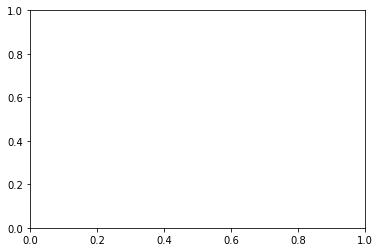

In [223]:
import matplotlib.pyplot as plt
import mapclassify

# Plot using 9 classes and classify the values using "Fisher Jenks" classification
join_df.plot(column="count_commerce", scheme="Fisher_Jenks", k=34, cmap="RdYlBu", linewidth=0);

# Use tight layour
plt.tight_layout()

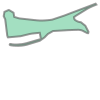

In [160]:
p0=Polygon(iris_poly_dict['061230102'])
p0

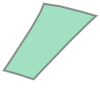

In [161]:
p1=Polygon(list(iris_poly_dict.values())[1])
p1

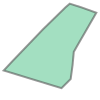

In [162]:
p2=Polygon(list(iris_poly_dict.values())[2])
p2

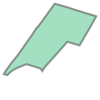

In [163]:
p3=Polygon(list(iris_poly_dict.values())[3])
p3

In [229]:

for i in iris_list[:3]:
    print(type(Polygon(iris_poly_dict[i])))

<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>


In [164]:
df.head(3)

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE,dots
0,061230102,H,0,1,2018,7.178602,43.658636,0,1,0,...,0,0,0,0,0.0,1.0,0.0,Électricien,Services a,POINT (7.178601702949741 43.6586357455608)
1,061230102,H,0,1,2018,7.178602,43.658636,0,0,1,...,0,0,0,0,0.0,1.0,0.0,Agence immobilière,Services a,POINT (7.178601702949741 43.6586357455608)
2,061230102,H,0,1,2018,7.178602,43.658636,0,0,0,...,0,0,0,0,0.0,1.0,0.0,Taxi,Transport,POINT (7.178601702949741 43.6586357455608)


In [ ]:
data_proj = data.copy()

In [ ]:
data_proj = data_proj.to_crs(epsg=3035)

import matplotlib.pyplot as plt

# Plot the WGS84
data.plot(facecolor='gray');

# Add title
plt.title("WGS84 projection");

# Remove empty white space around the plot
plt.tight_layout()

# Plot the one with ETRS-LAEA projection
data_proj.plot(facecolor='blue');

# Add title
plt.title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

In [ ]:
# Convert DataFrame into a GeoDataFrame
geo = gpd.GeoDataFrame(data, geometry='geometry', crs=from_epsg(4326))

>>> type(geo)
geopandas.geodataframe.GeoDataFrame

>>> geo.crs
{'init': 'epsg:4326', 'no_defs': True}

In [258]:
!pwd

/home/mchistya/code/eangelid/trampact/notebooks


In [259]:
from trampact.iris_coord import Iris

ModuleNotFoundError: No module named 'trampact'